#Kaggle configurations to download dataset
Upload the `kaggle.json` API and run the following code.

In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Download the dataset

In [2]:
!kaggle datasets download -d sudalairajkumar/novel-corona-virus-2019-dataset -f covid_19_data.csv

  0% 0.00/5.44M [00:00<?, ?B/s]
100% 5.44M/5.44M [00:00<00:00, 50.2MB/s]


Uzip the dataset

In [3]:
!unzip covid_19_data.csv.zip

Archive:  covid_19_data.csv.zip
  inflating: covid_19_data.csv       


#Importing libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from google.colab import files, data_table
data_table.enable_dataframe_formatter()
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,12)

#Importing Data

In [5]:
df = pd.read_csv('covid_19_data.csv')
df.tail()

SNo ObservationDate     Province/State  ... Confirmed  Deaths  Recovered
306424  306425      05/29/2021  Zaporizhia Oblast  ...  102641.0  2335.0    95289.0
306425  306426      05/29/2021            Zeeland  ...   29147.0   245.0        0.0
306426  306427      05/29/2021           Zhejiang  ...    1364.0     1.0     1324.0
306427  306428      05/29/2021    Zhytomyr Oblast  ...   87550.0  1738.0    83790.0
306428  306429      05/29/2021       Zuid-Holland  ...  391559.0  4252.0        0.0

[5 rows x 8 columns]

##Data Cleaning

In [6]:
df.drop(['SNo', 'Last Update'], axis=1, inplace=True)
df.rename(columns={'ObservationDate' : 'Date', \
                   'Province/State' : 'State', \
                   'Country/Region' : 'Country'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.tail()

Date              State  ...  Deaths  Recovered
306424 2021-05-29  Zaporizhia Oblast  ...  2335.0    95289.0
306425 2021-05-29            Zeeland  ...   245.0        0.0
306426 2021-05-29           Zhejiang  ...     1.0     1324.0
306427 2021-05-29    Zhytomyr Oblast  ...  1738.0    83790.0
306428 2021-05-29       Zuid-Holland  ...  4252.0        0.0

[5 rows x 6 columns]

##Exploratory Data Analysis

In [7]:
df.isnull().sum()

Date             0
State        78100
Country          0
Confirmed        0
Deaths           0
Recovered        0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       306429 non-null  datetime64[ns]
 1   State      228329 non-null  object        
 2   Country    306429 non-null  object        
 3   Confirmed  306429 non-null  float64       
 4   Deaths     306429 non-null  float64       
 5   Recovered  306429 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 14.0+ MB


##Imputing Missing Data

In [9]:
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
df2.tail()

Date              State         Country Confirmed Deaths Recovered
306424 2021-05-29  Zaporizhia Oblast         Ukraine    102641   2335     95289
306425 2021-05-29            Zeeland     Netherlands     29147    245         0
306426 2021-05-29           Zhejiang  Mainland China      1364      1      1324
306427 2021-05-29    Zhytomyr Oblast         Ukraine     87550   1738     83790
306428 2021-05-29       Zuid-Holland     Netherlands    391559   4252         0

In [10]:
df2.isnull().sum()

Date         0
State        0
Country      0
Confirmed    0
Deaths       0
Recovered    0
dtype: int64

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       306429 non-null  datetime64[ns]
 1   State      306429 non-null  object        
 2   Country    306429 non-null  object        
 3   Confirmed  306429 non-null  object        
 4   Deaths     306429 non-null  object        
 5   Recovered  306429 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 14.0+ MB


In [12]:
df3 = df2.groupby(['Country','Date'])[['Confirmed','Deaths','Recovered']].sum().reset_index()
df3.tail()

Country       Date  Confirmed  Deaths  Recovered
87276  occupied Palestinian territory 2020-03-12        0.0     0.0        0.0
87277  occupied Palestinian territory 2020-03-14        0.0     0.0        0.0
87278  occupied Palestinian territory 2020-03-15        0.0     0.0        0.0
87279  occupied Palestinian territory 2020-03-16        0.0     0.0        0.0
87280  occupied Palestinian territory 2020-03-17        0.0     0.0        0.0

In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87281 entries, 0 to 87280
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Country    87281 non-null  object        
 1   Date       87281 non-null  datetime64[ns]
 2   Confirmed  87281 non-null  float64       
 3   Deaths     87281 non-null  float64       
 4   Recovered  87281 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 3.3+ MB


In [14]:
countries = df3['Country'].unique()
len(countries)

229

In [15]:
df4 = df2.groupby(['Date'])[['Confirmed','Deaths','Recovered']].sum().reset_index()
df4.tail()

Date    Confirmed     Deaths    Recovered
489 2021-05-25  167848207.0  3485788.0  104824935.0
490 2021-05-26  168416423.0  3498544.0  105380748.0
491 2021-05-27  168970791.0  3511297.0  106078106.0
492 2021-05-28  169470725.0  3523117.0  106633069.0
493 2021-05-29  169951560.0  3533619.0  107140669.0

#Creating folder to save Data Visualizations

In [16]:
!mkdir plots

#Data Visualization

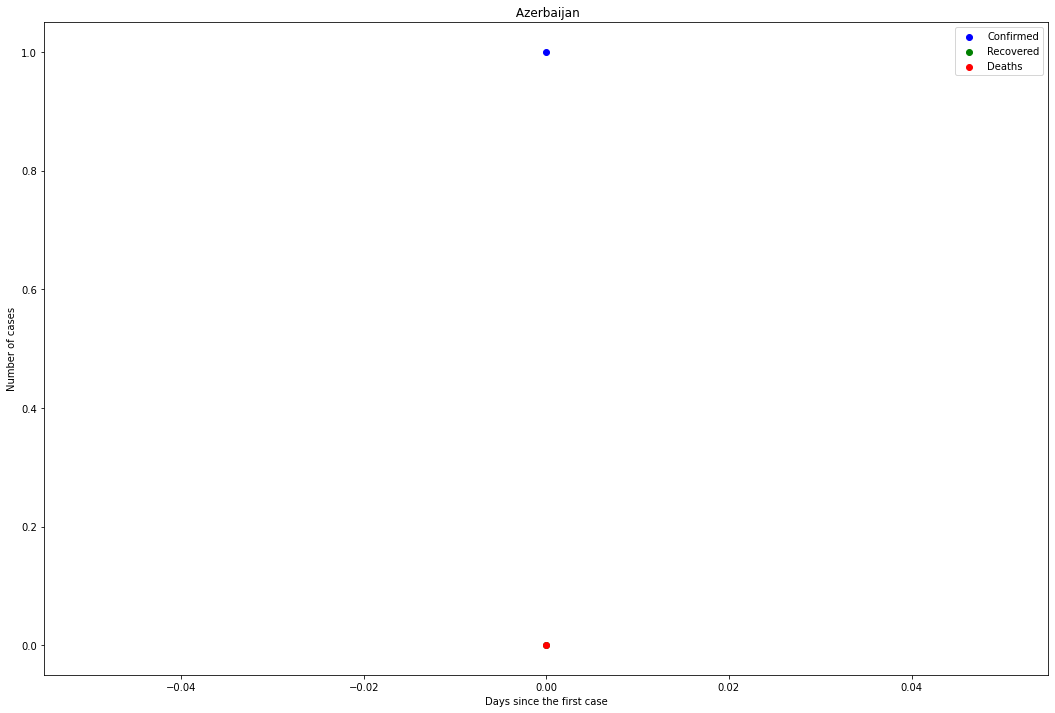

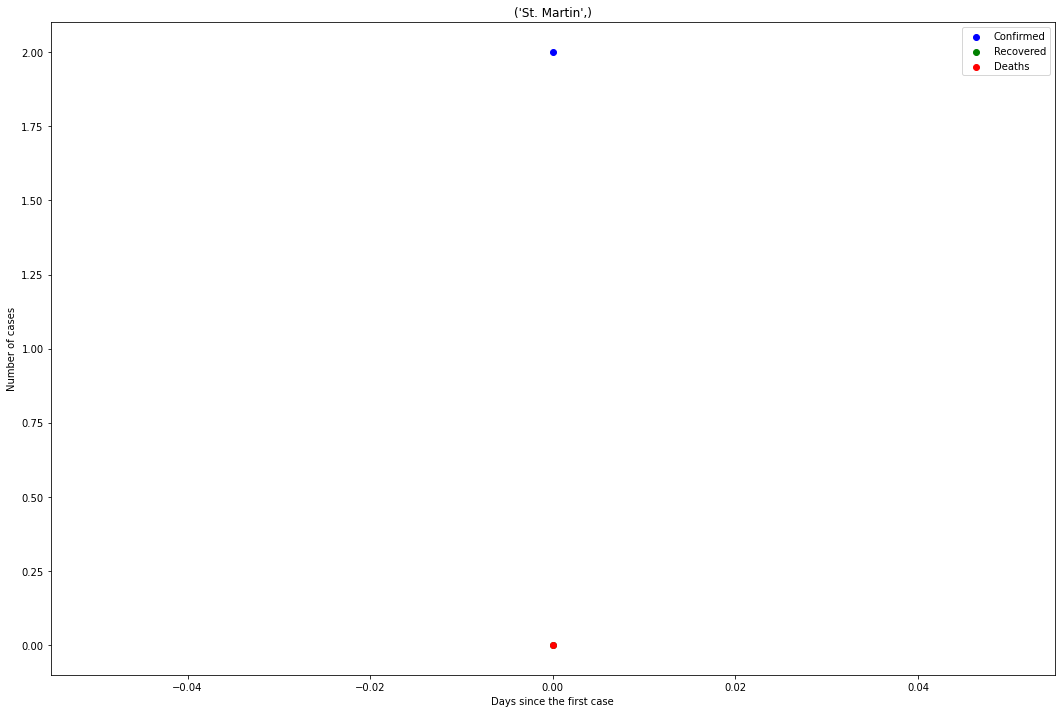

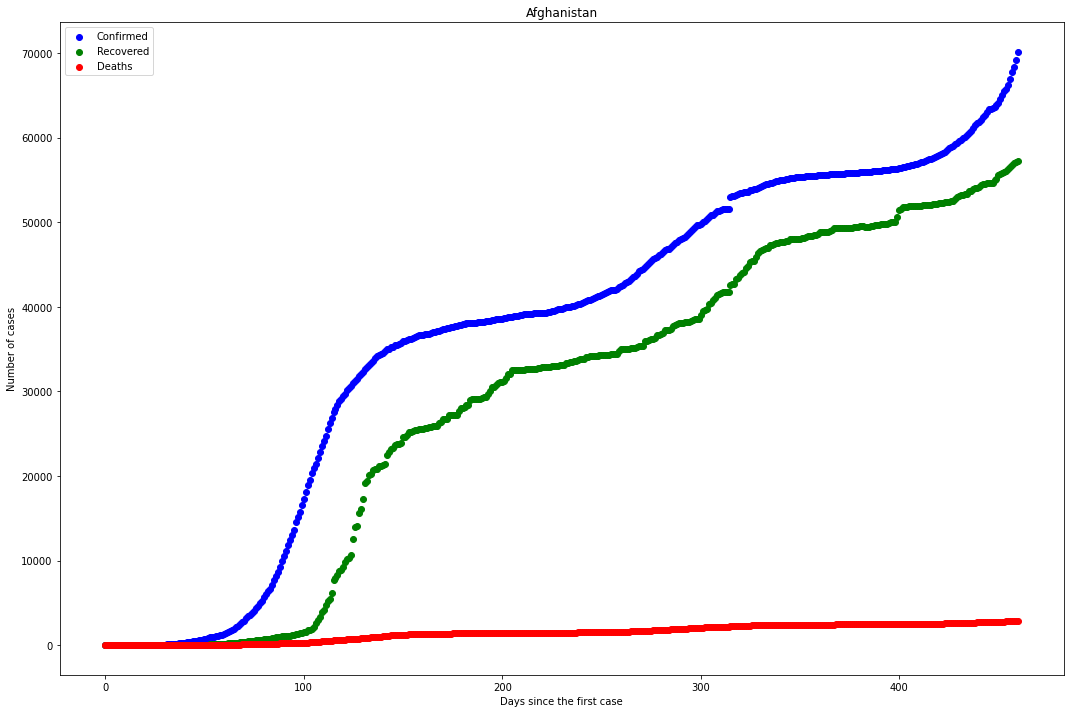

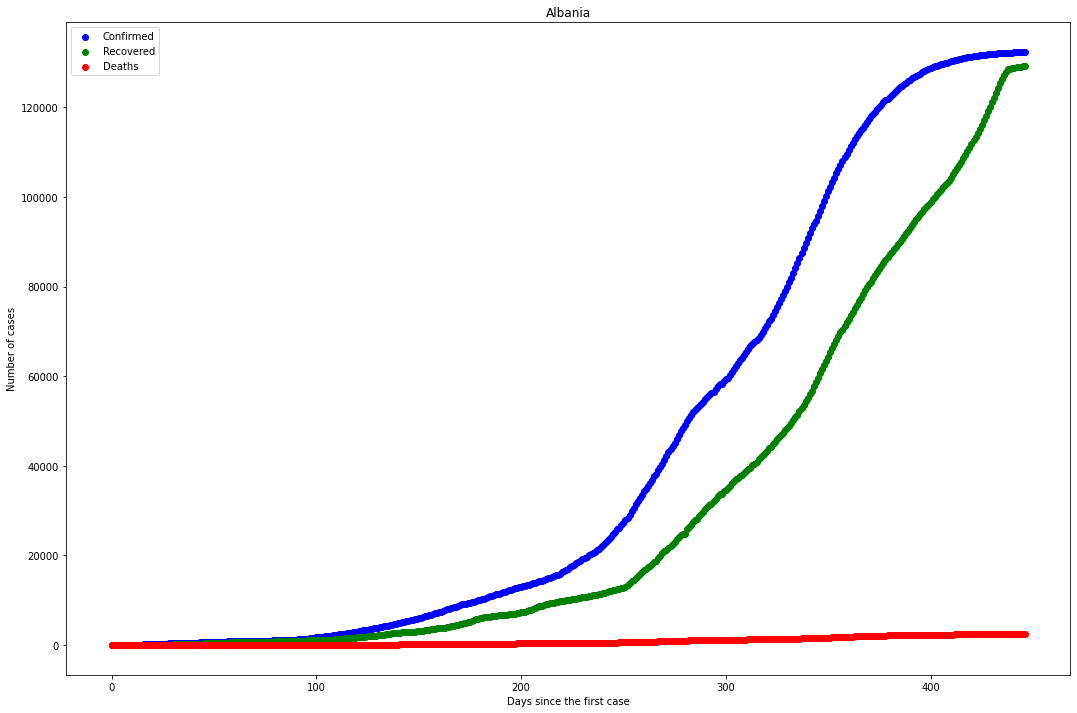

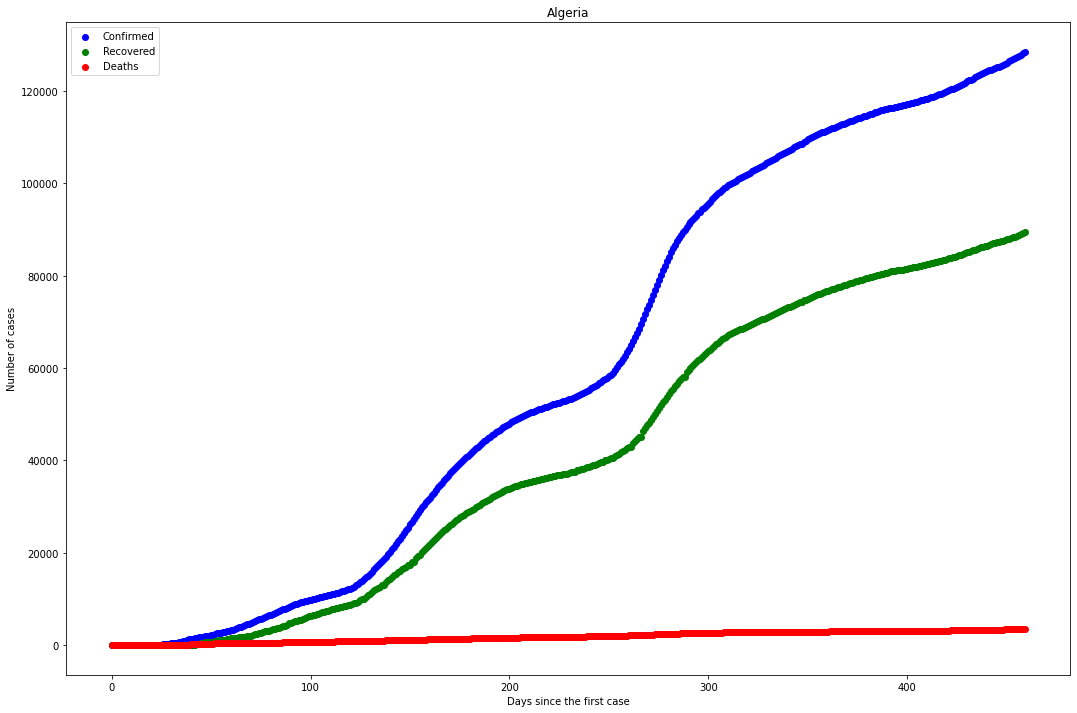

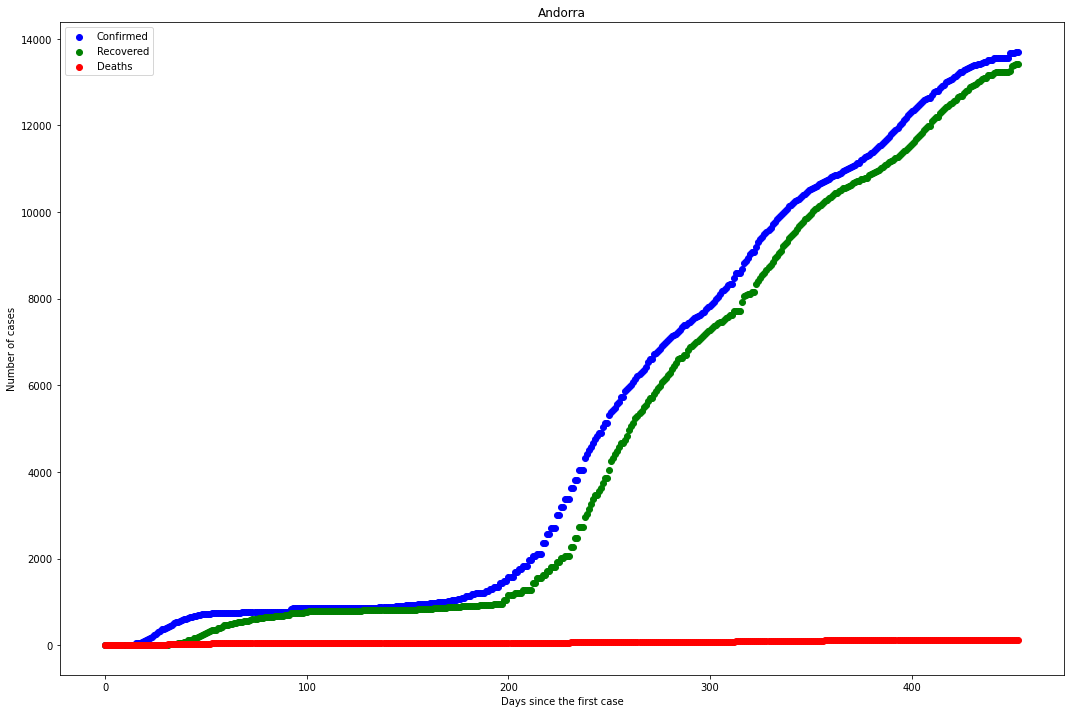

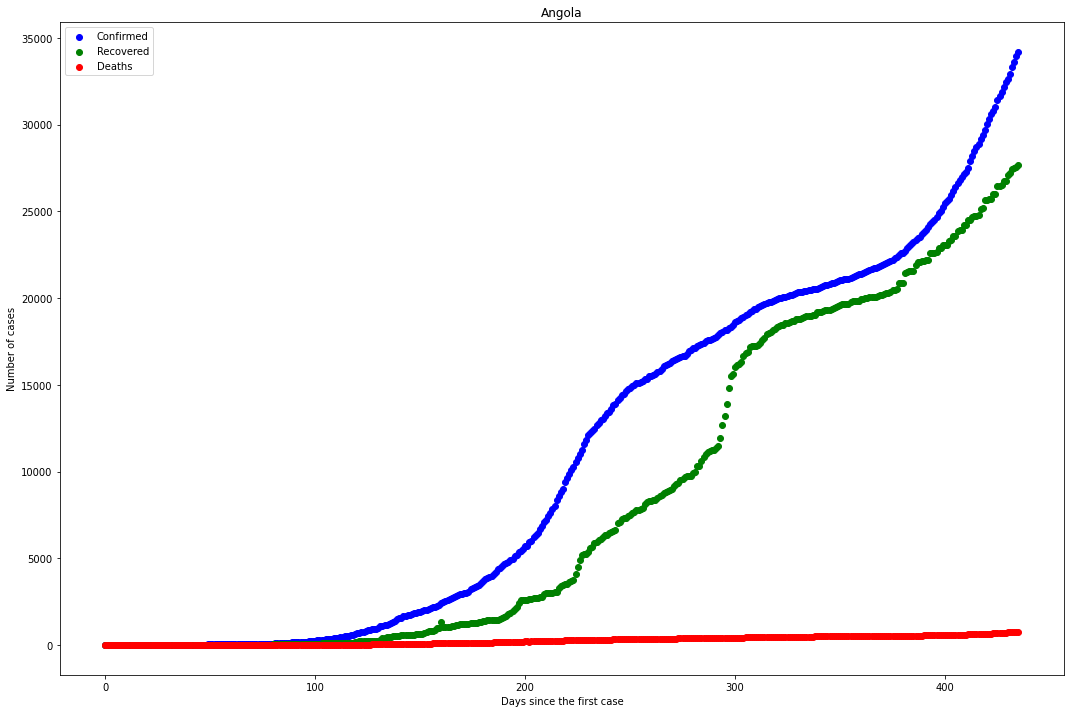

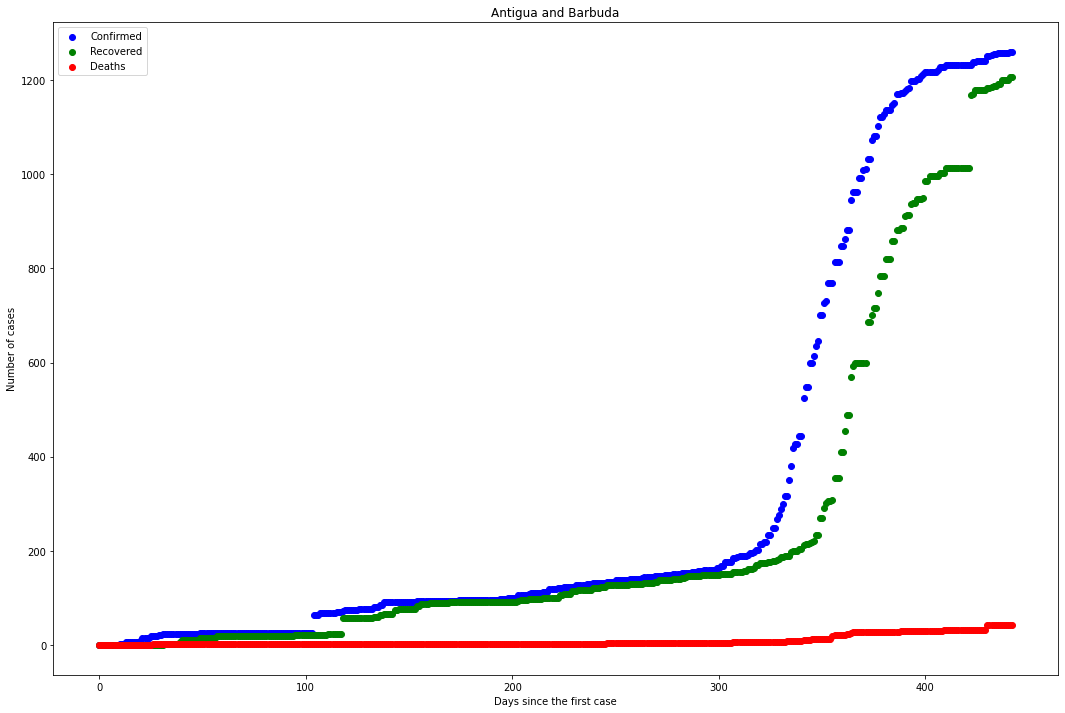

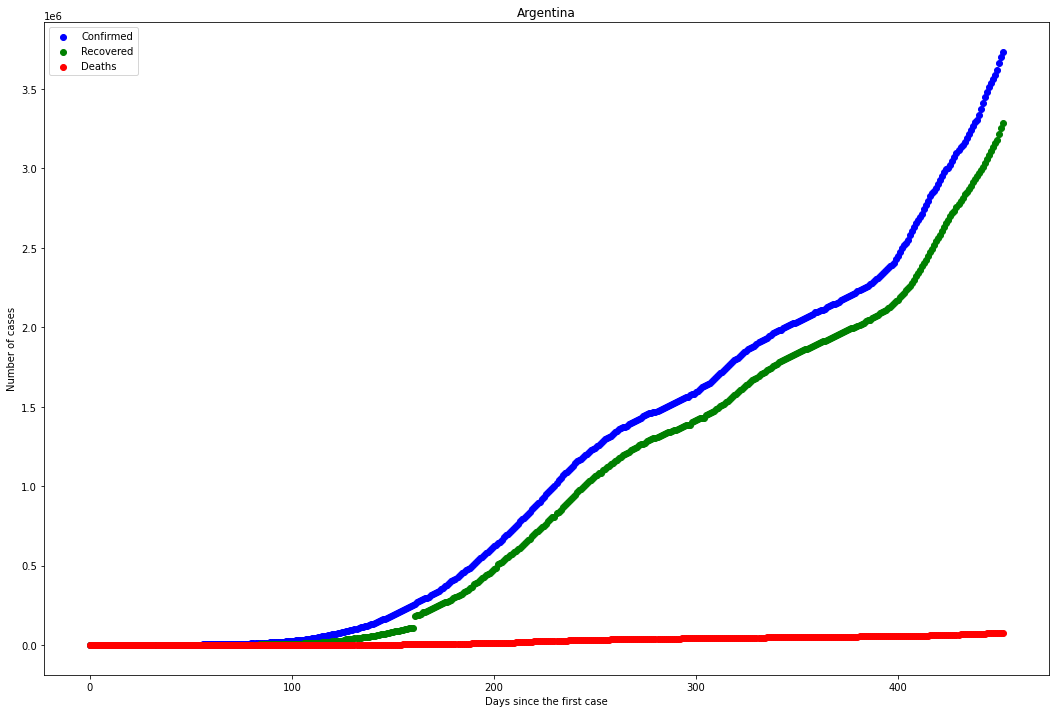

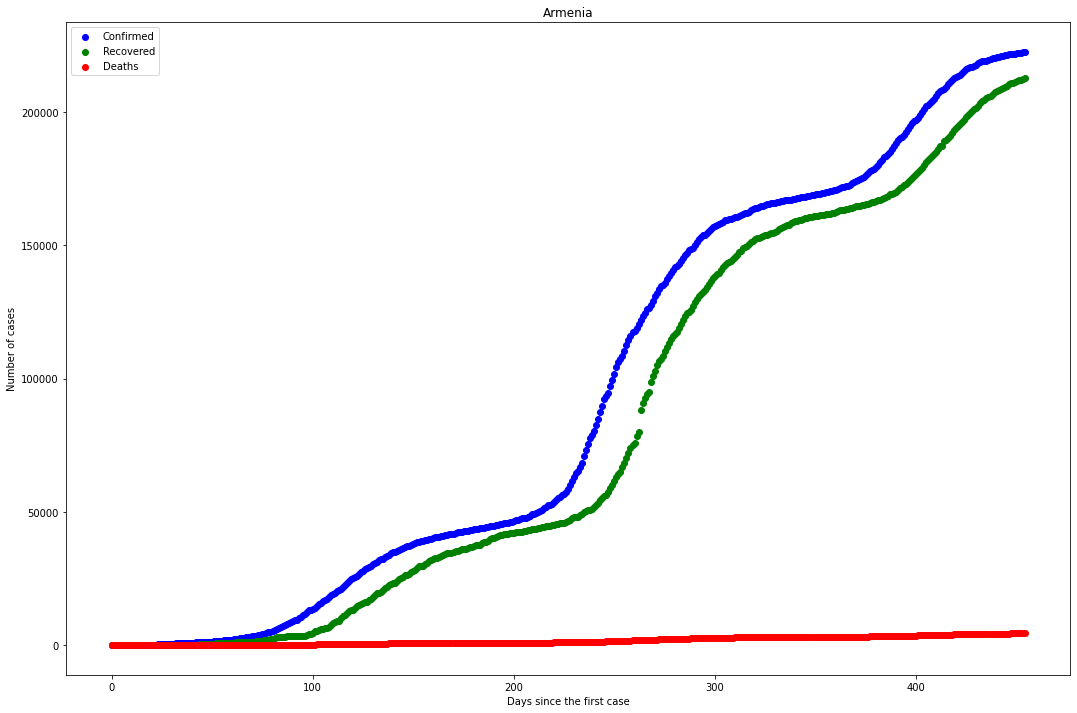

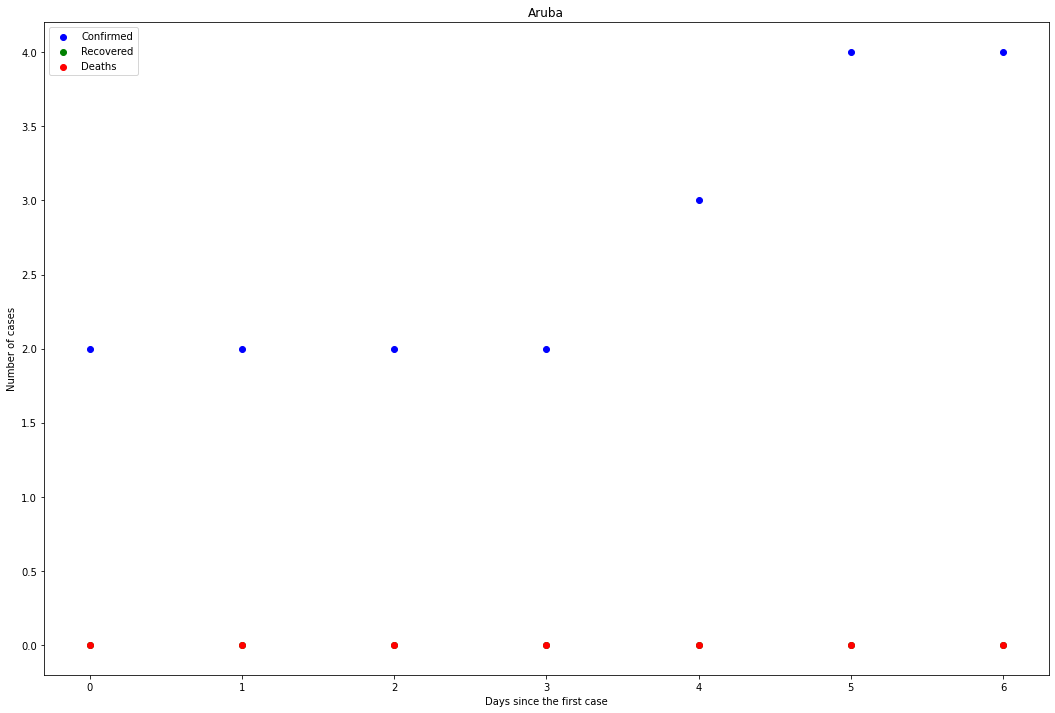

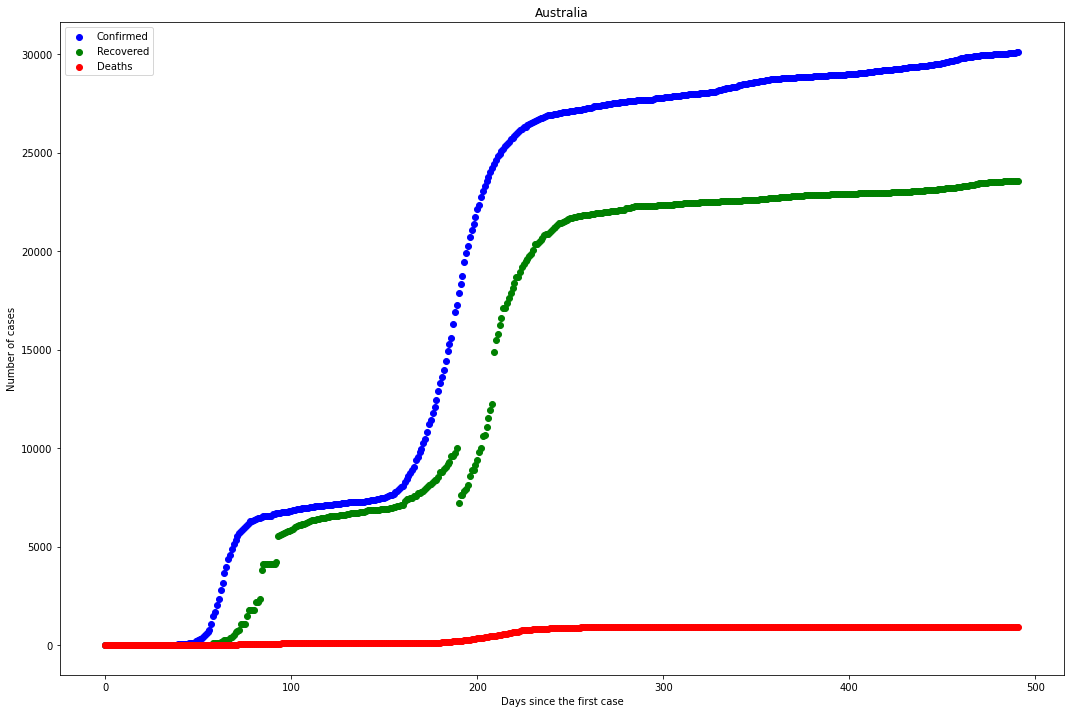

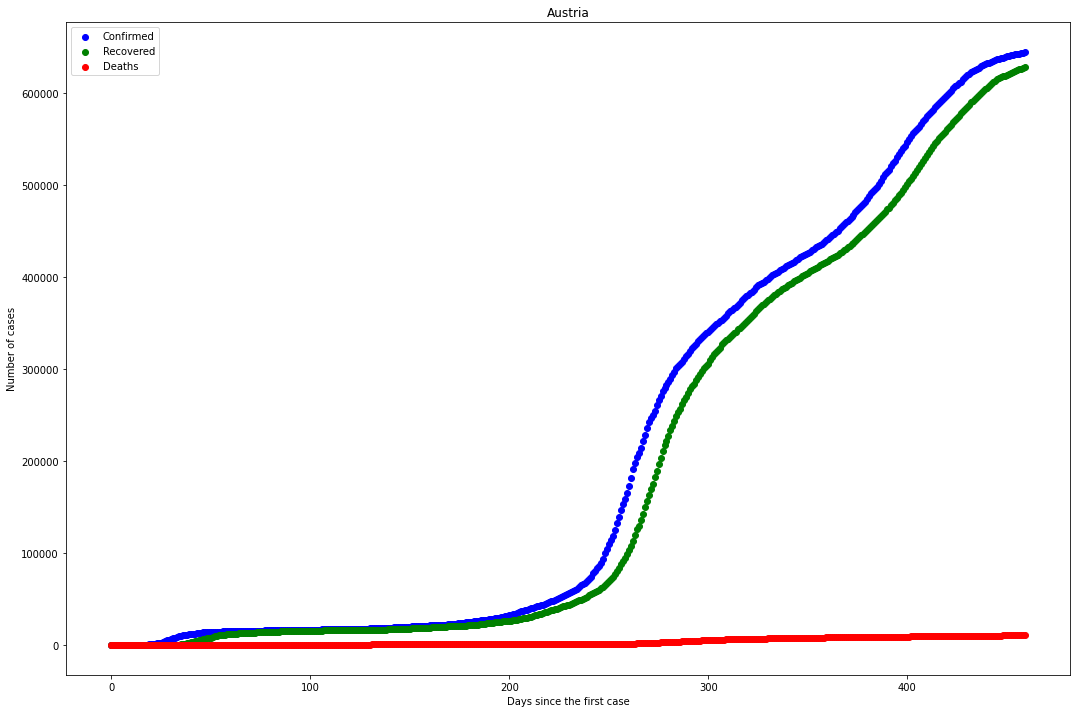

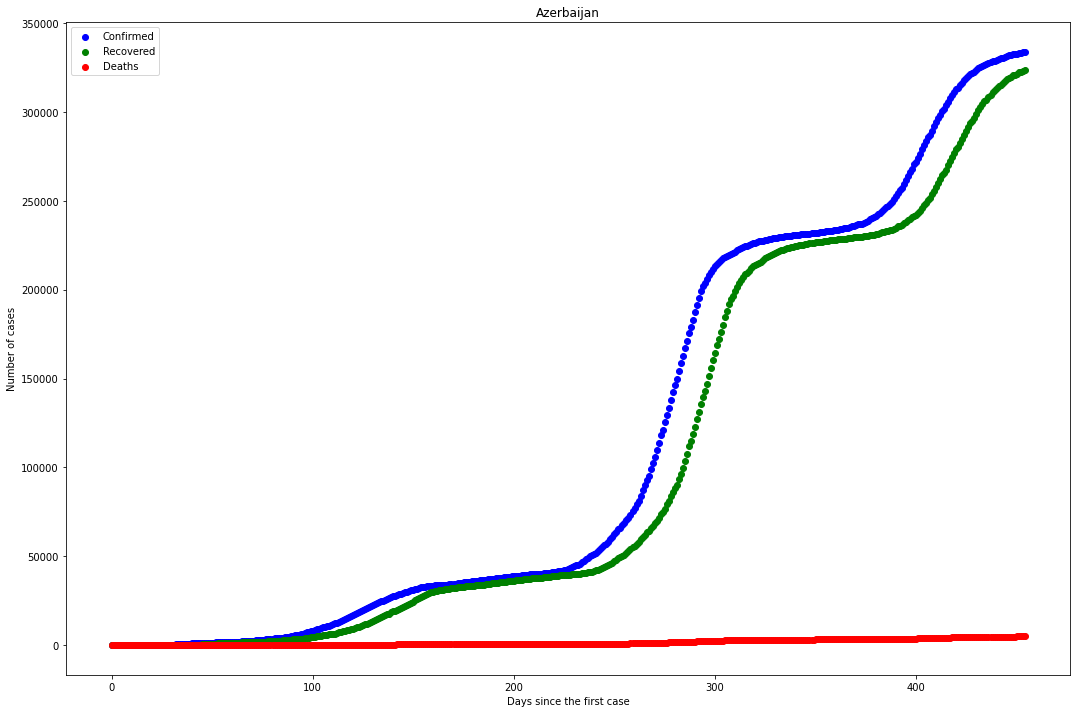

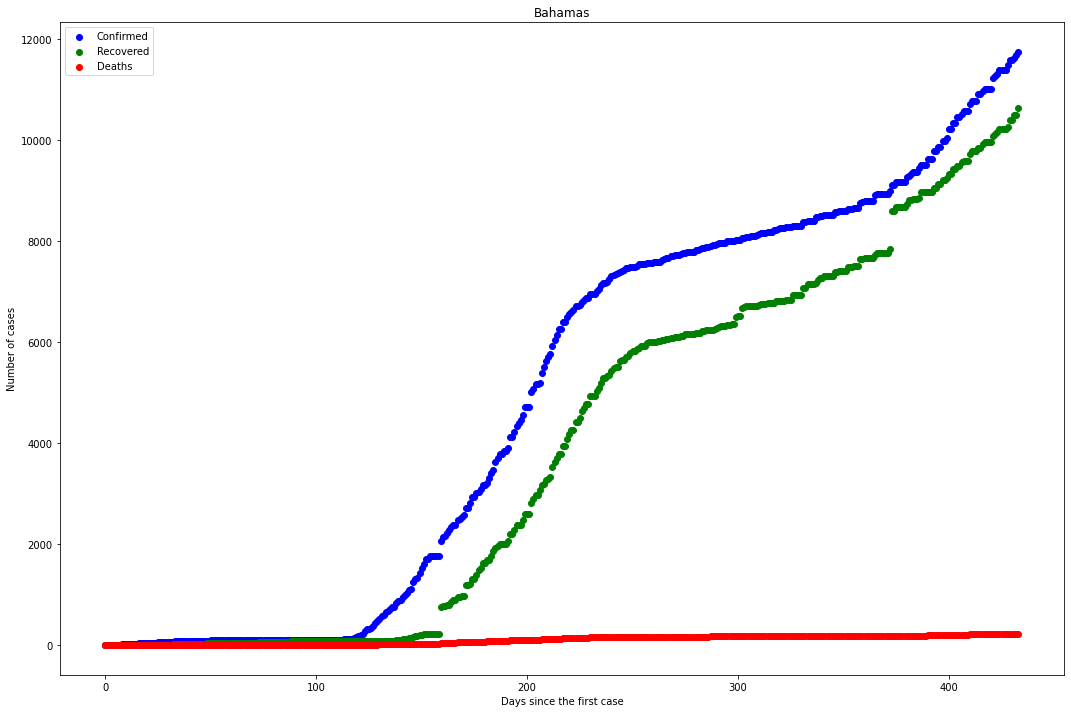

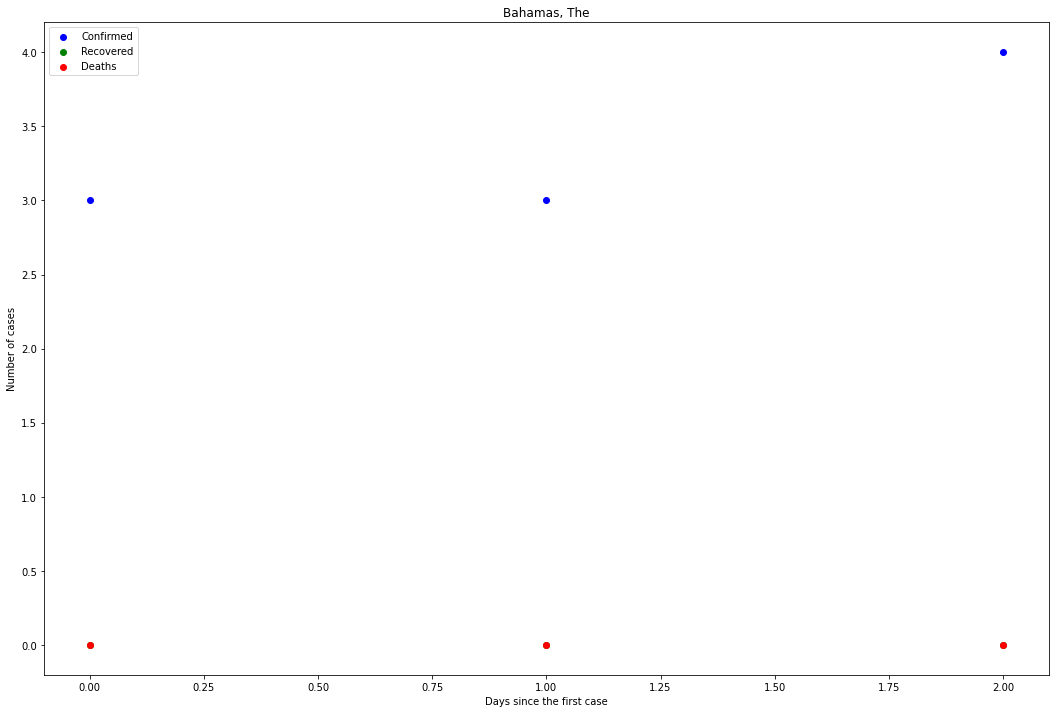

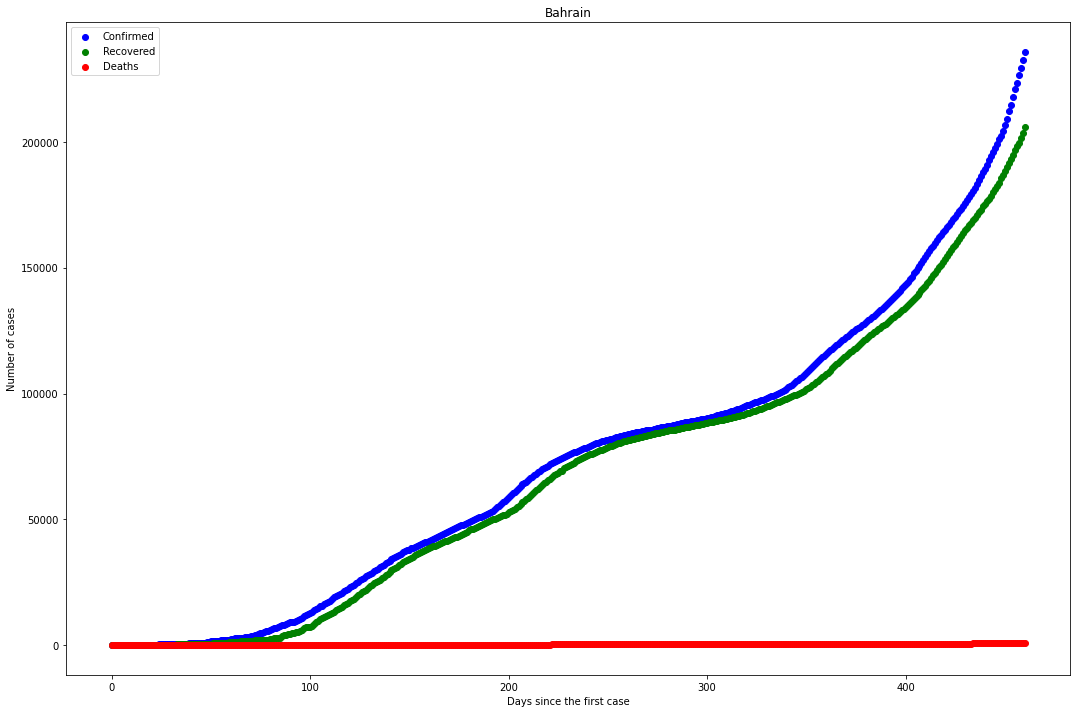

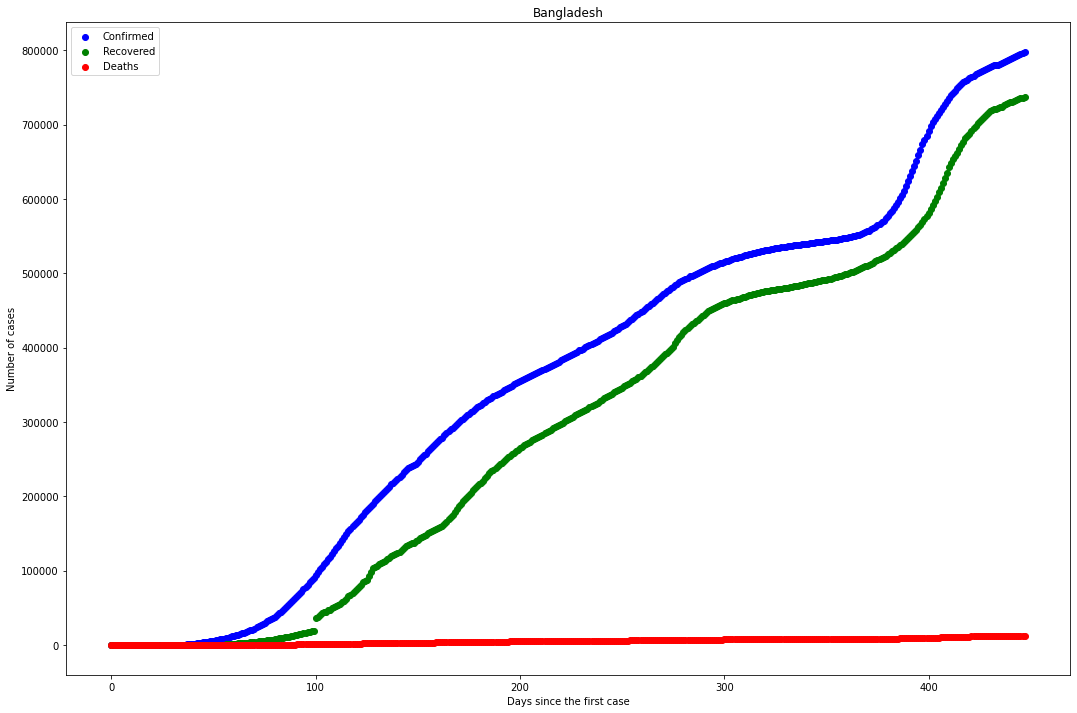

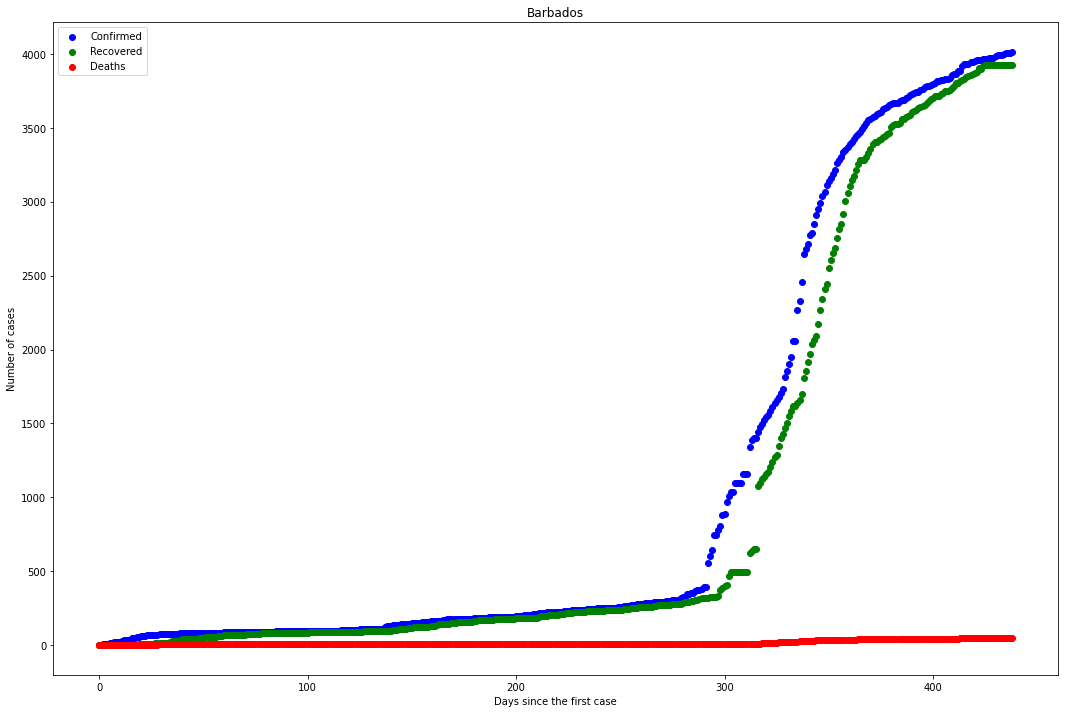

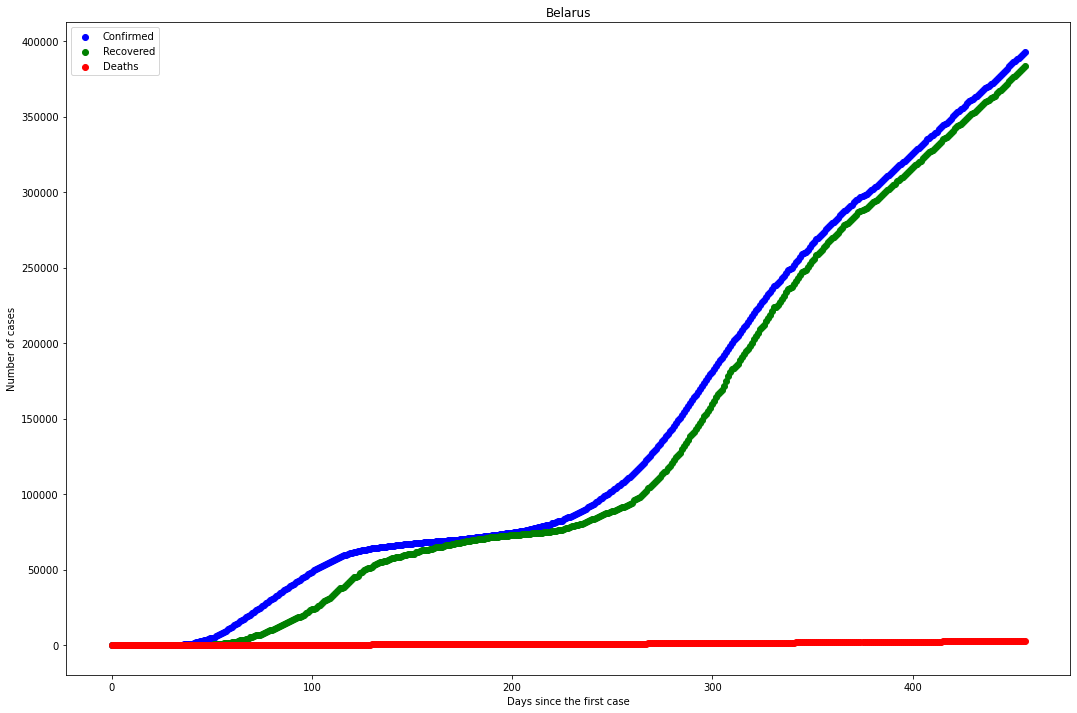

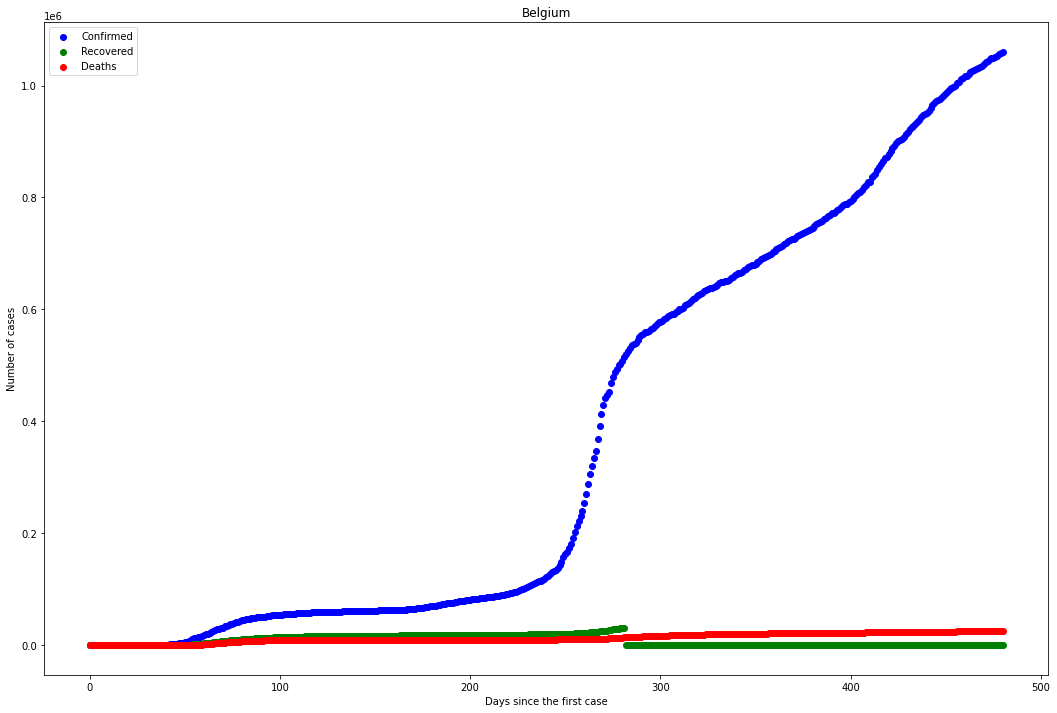

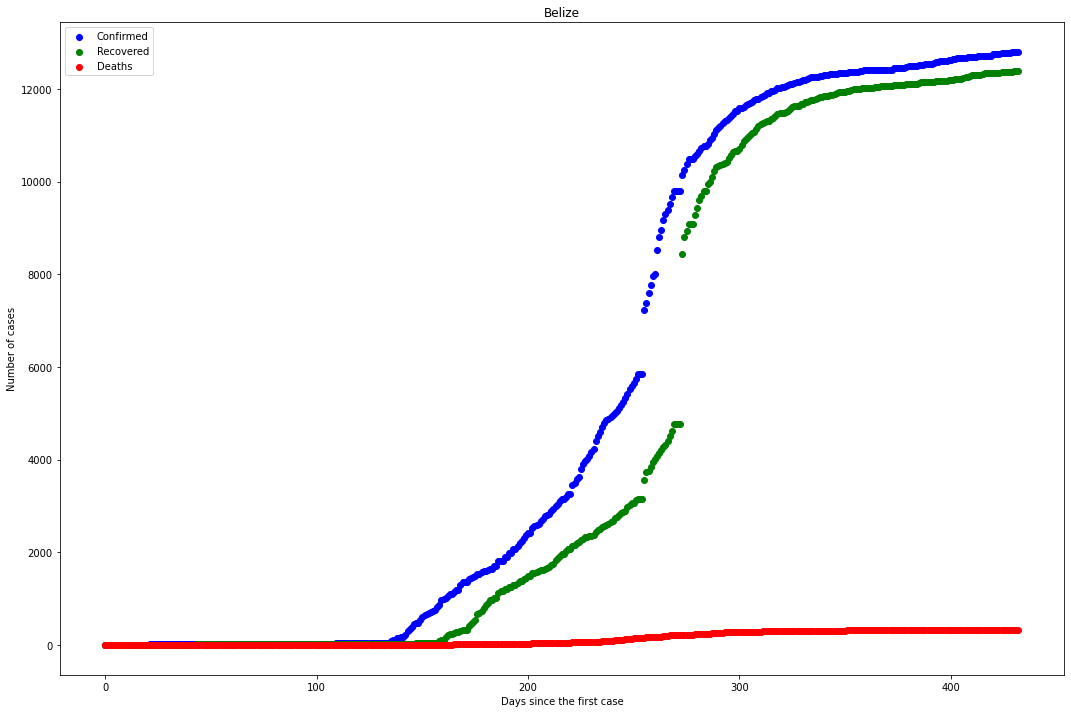

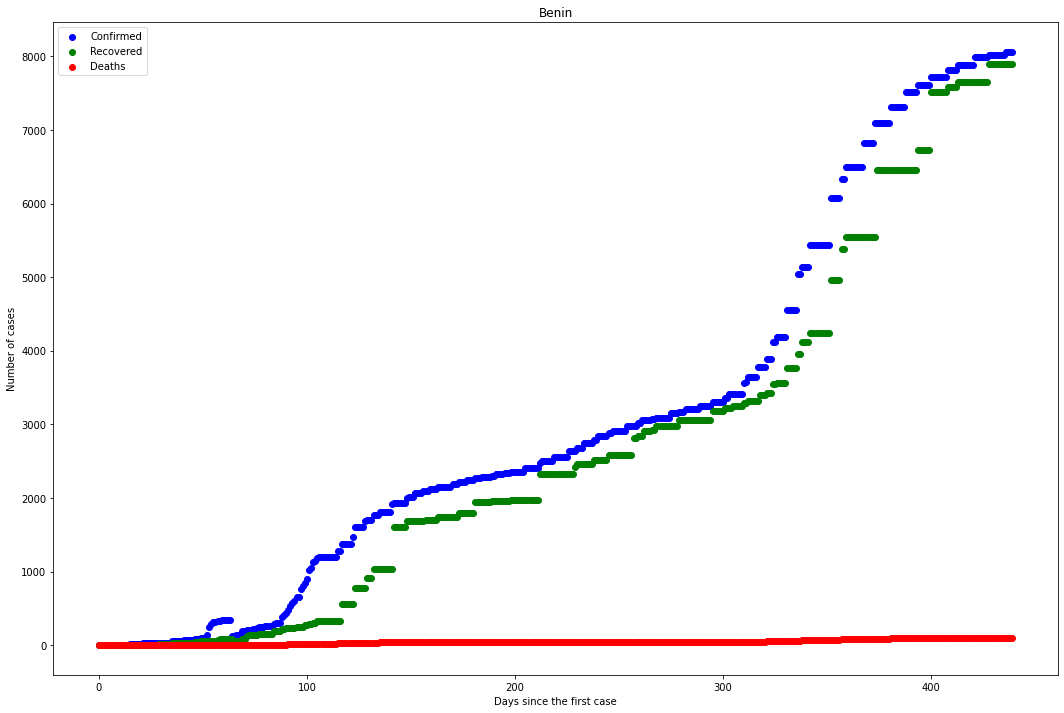

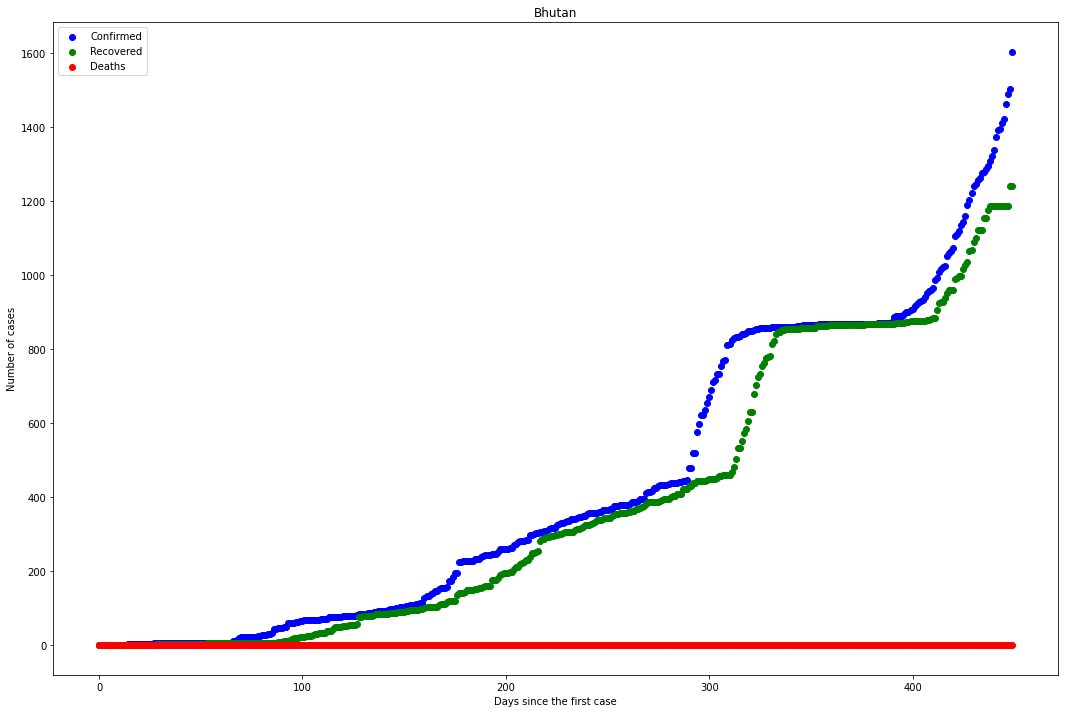

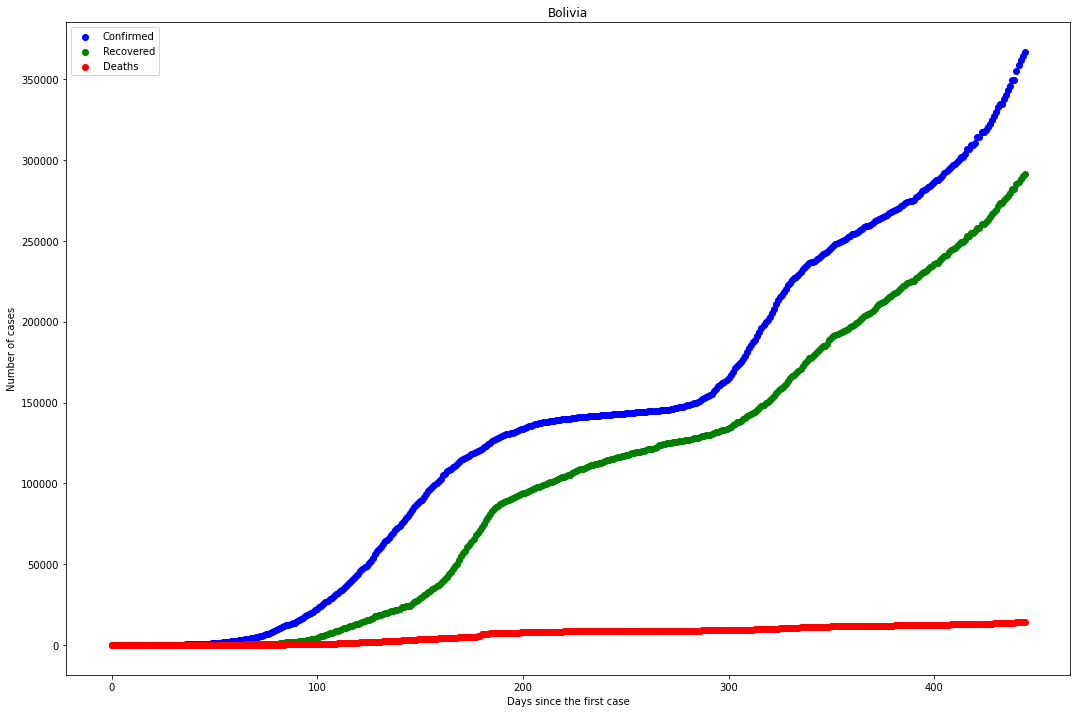

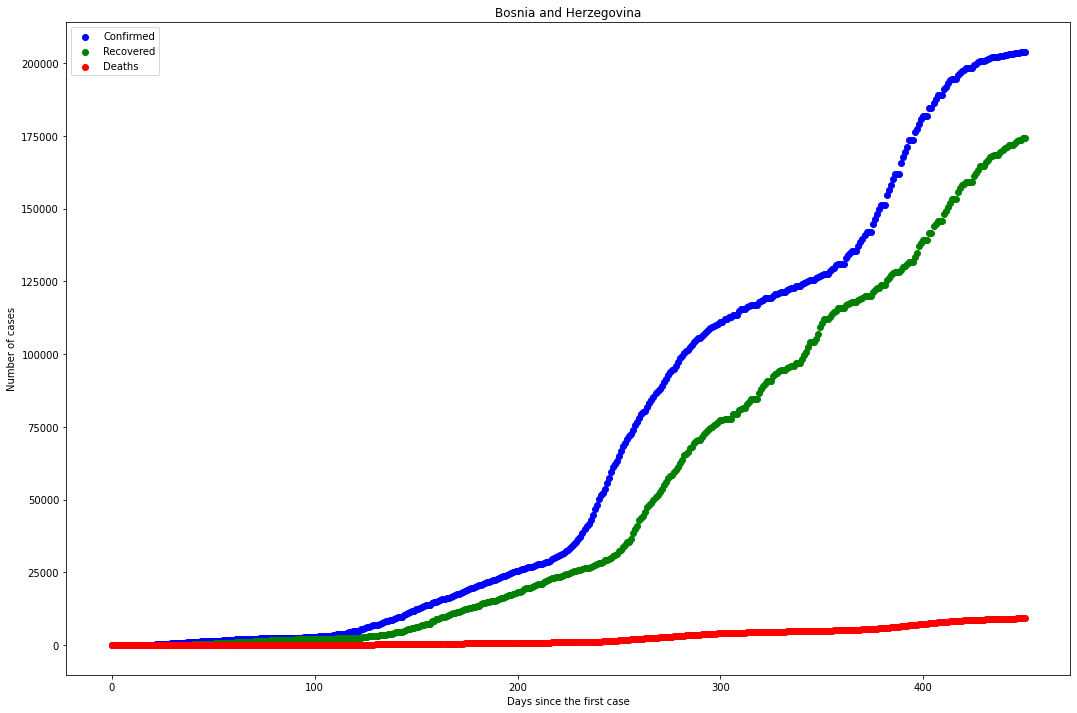

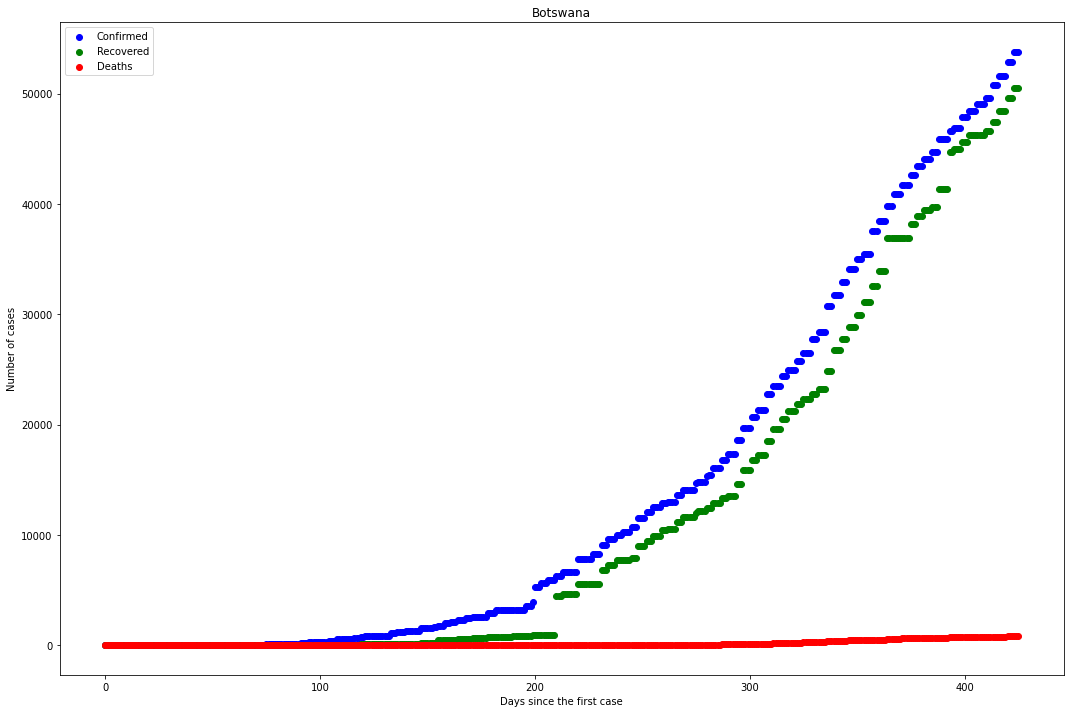

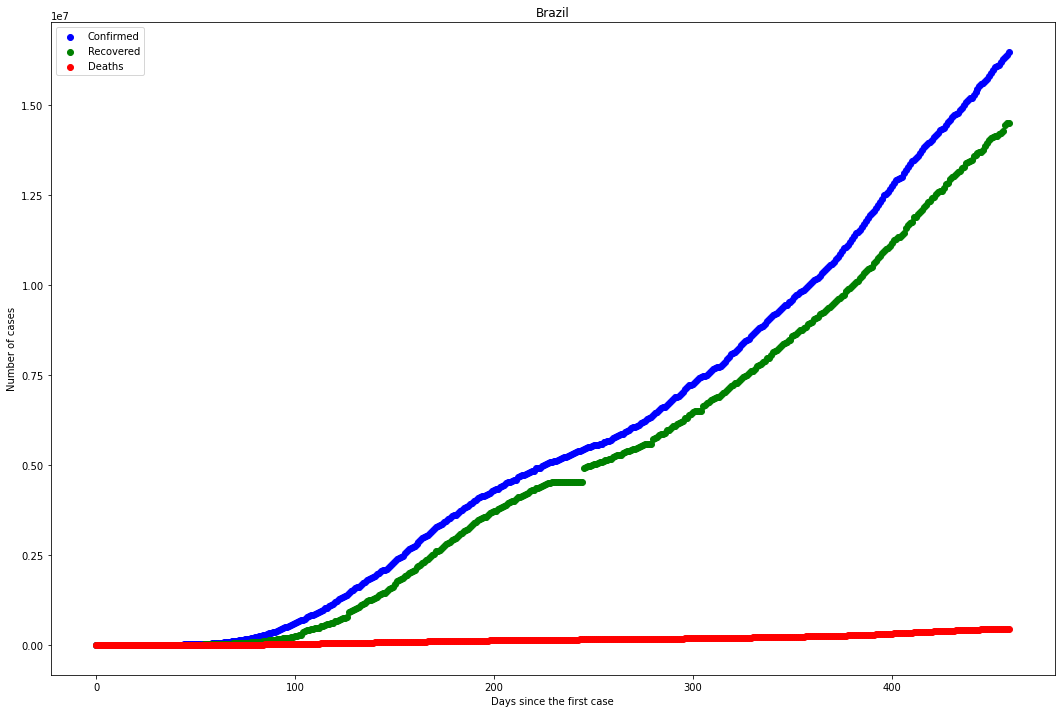

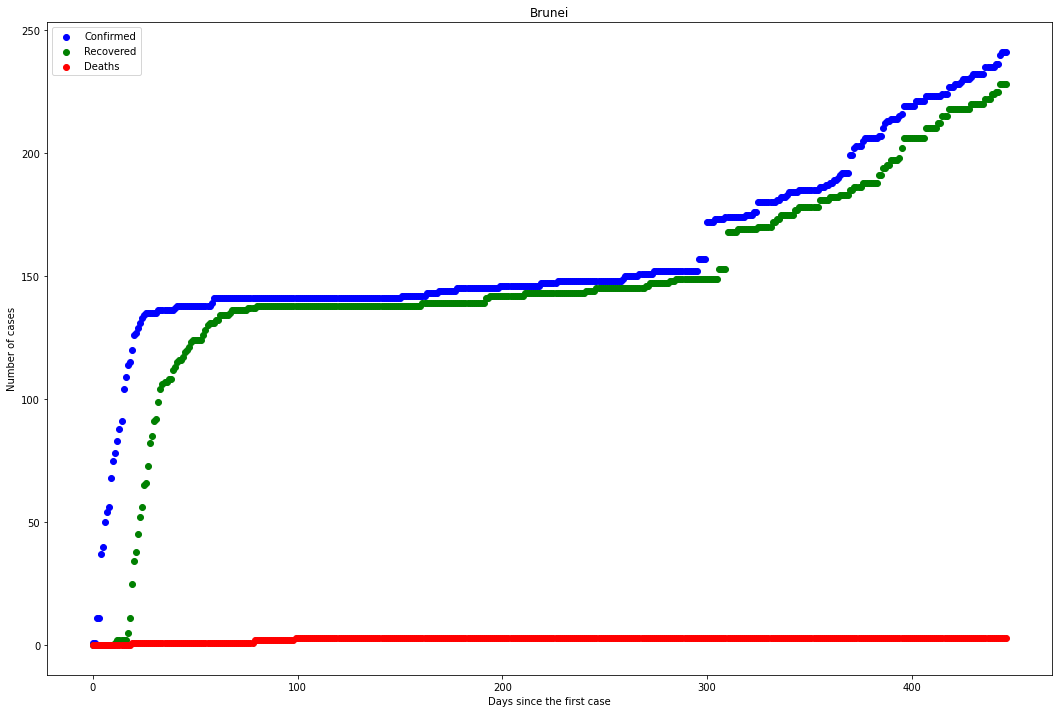

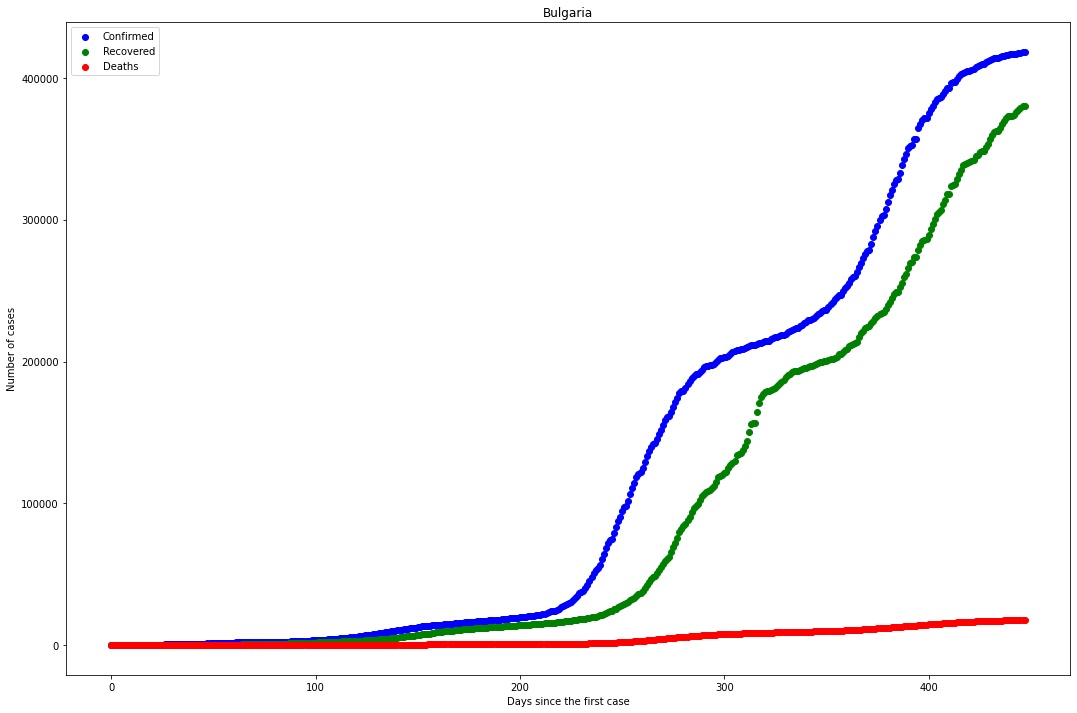

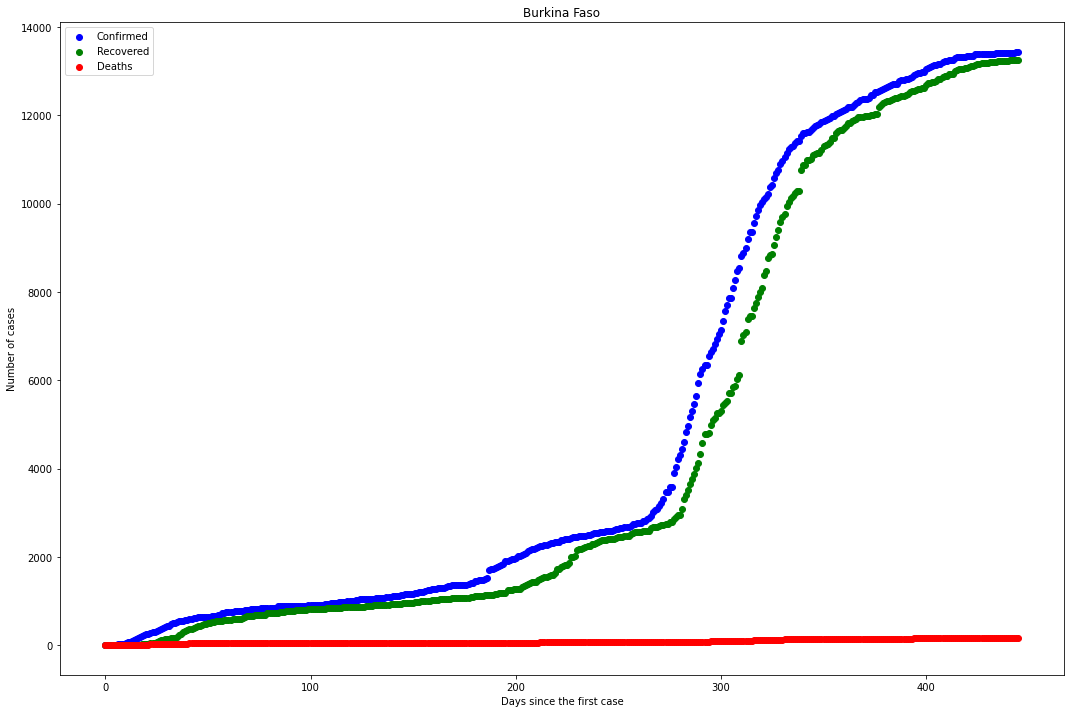

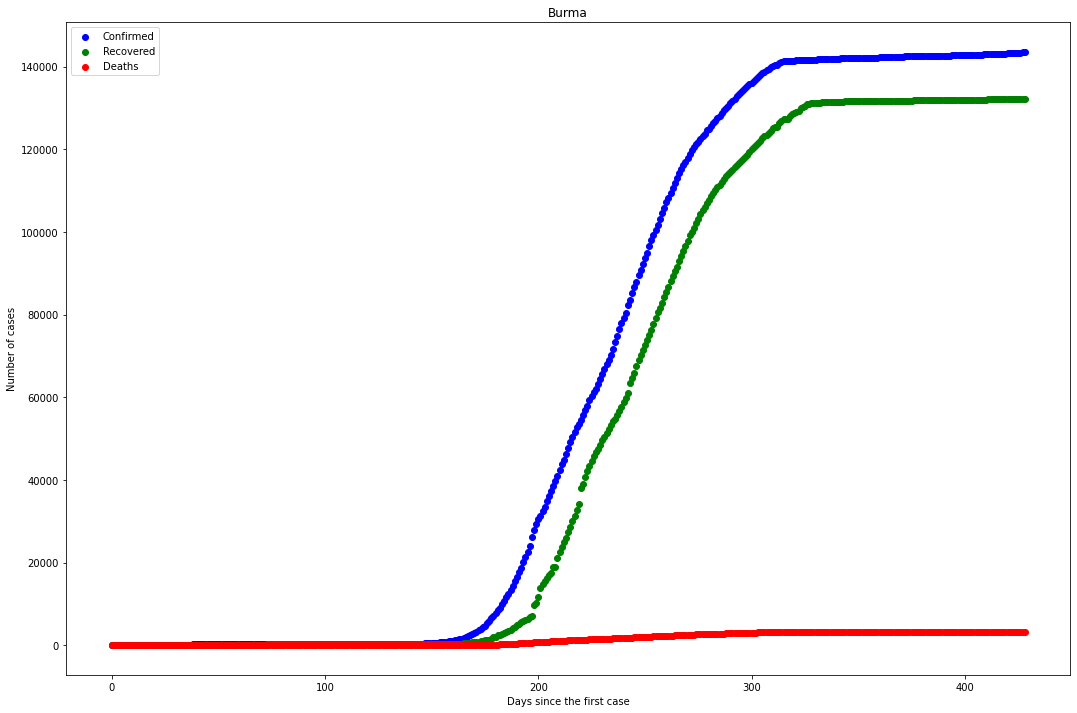

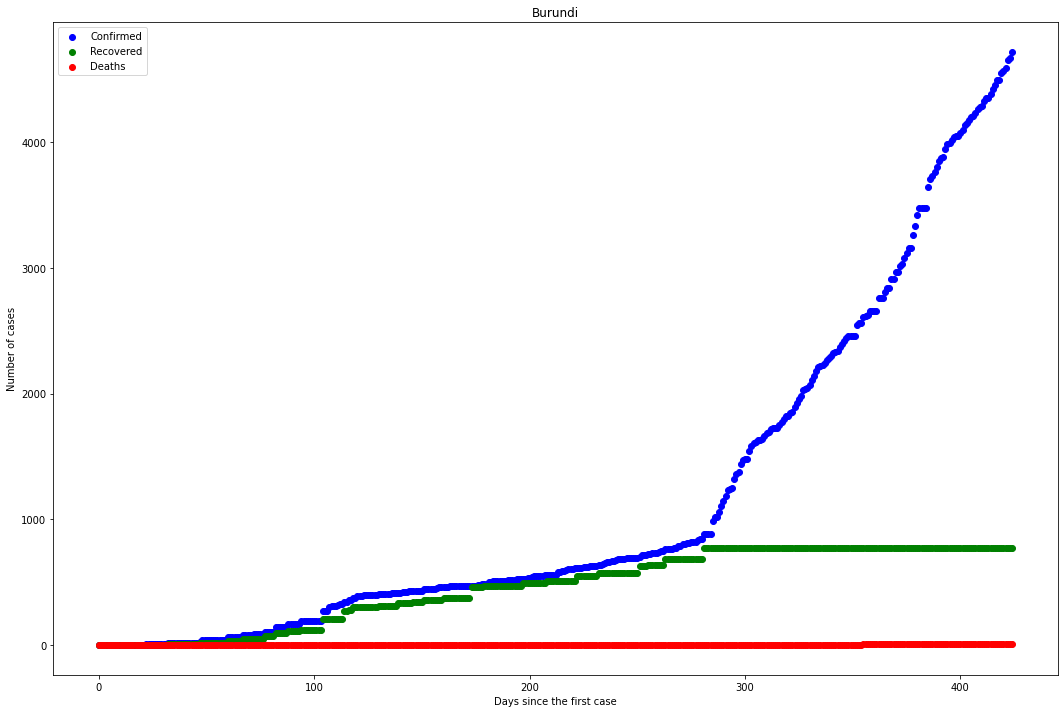

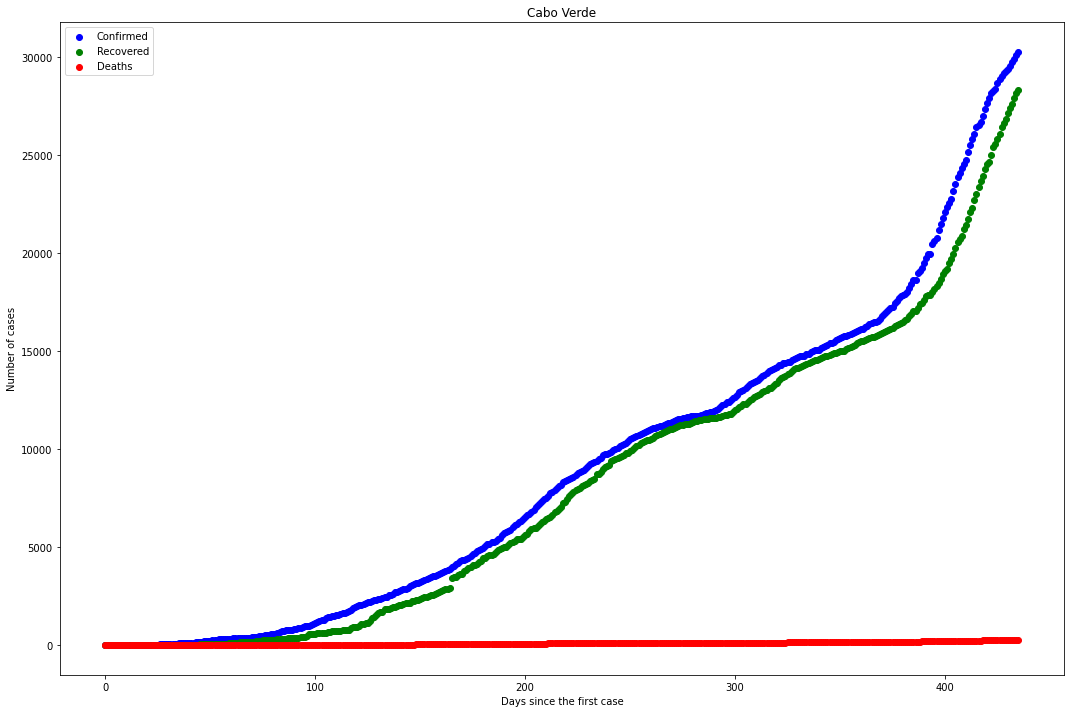

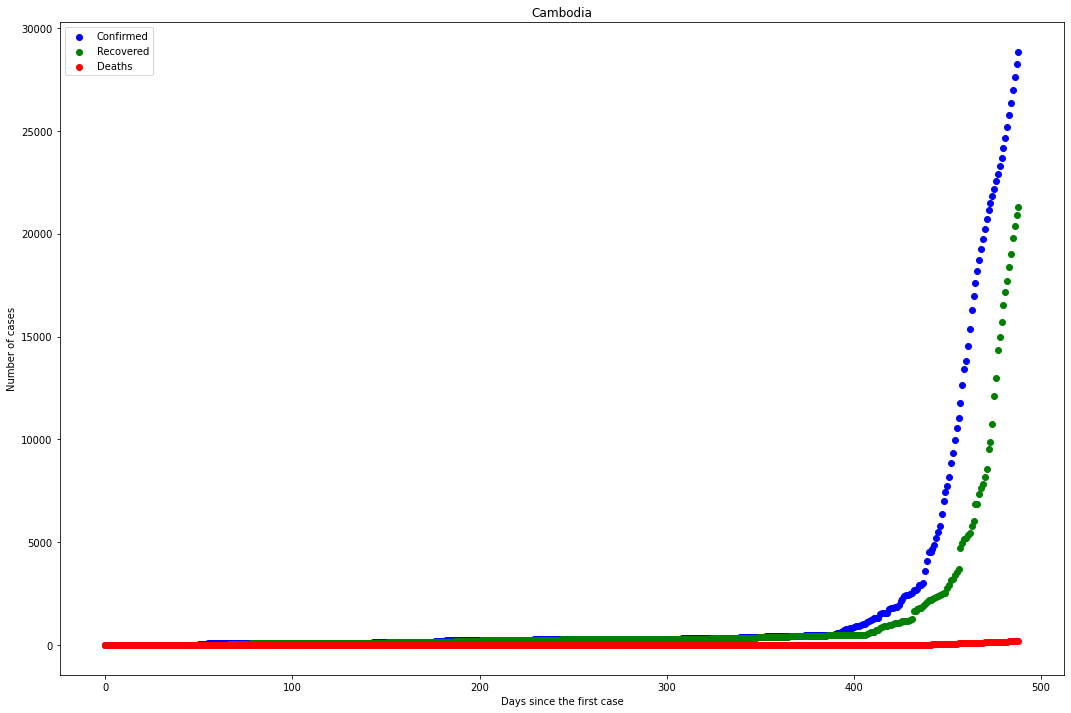

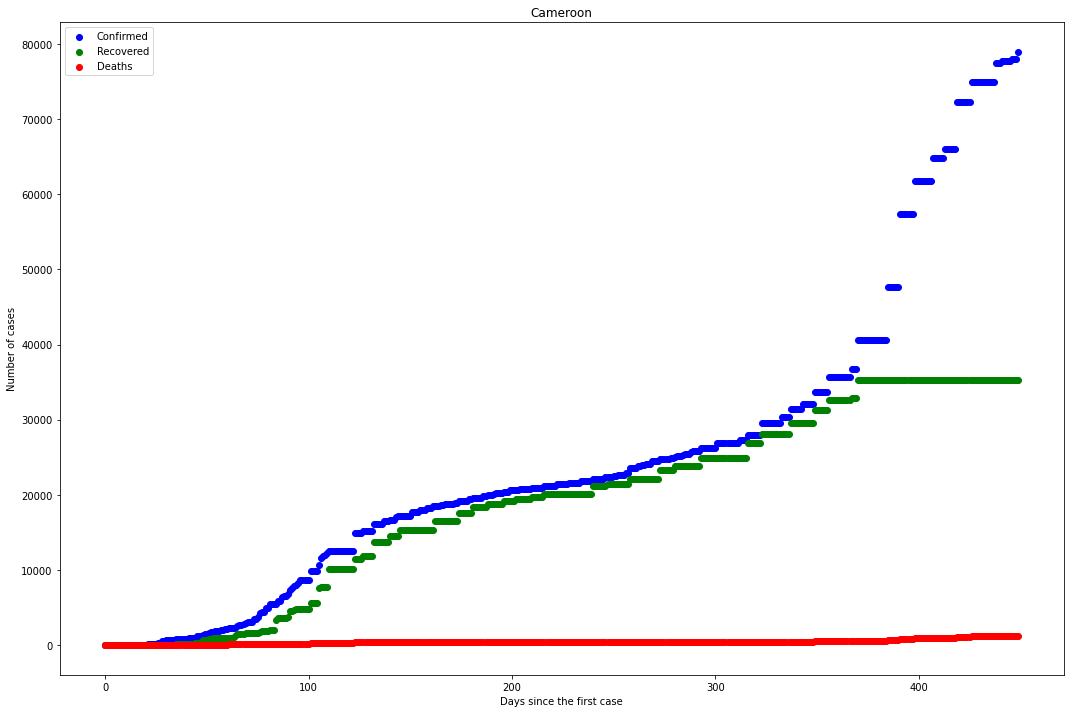

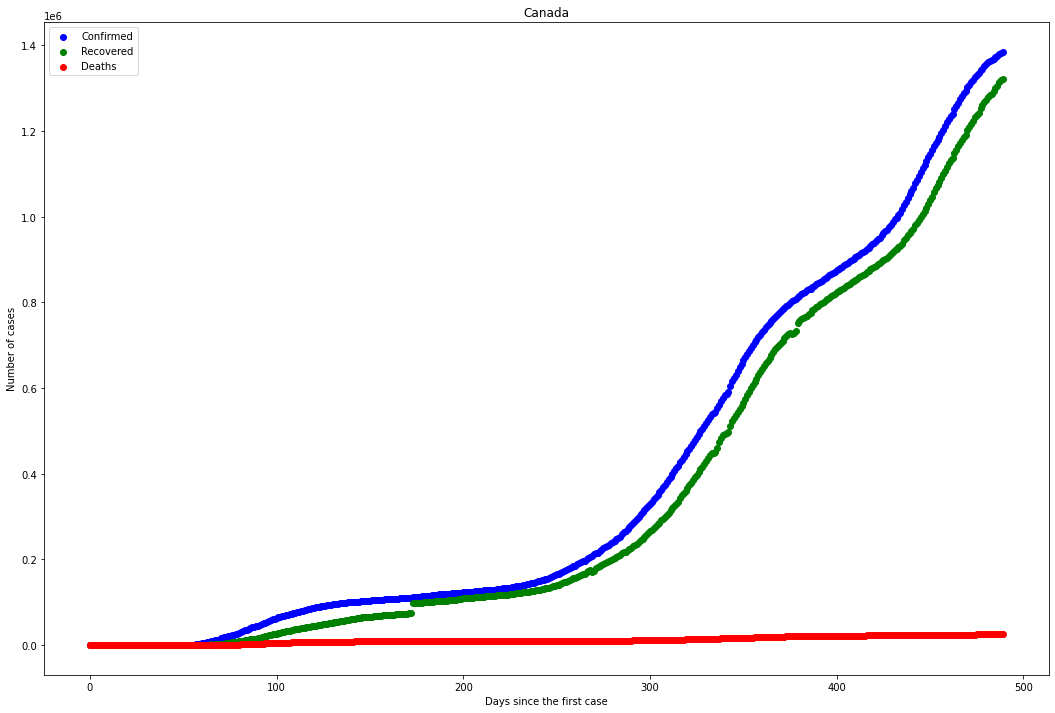

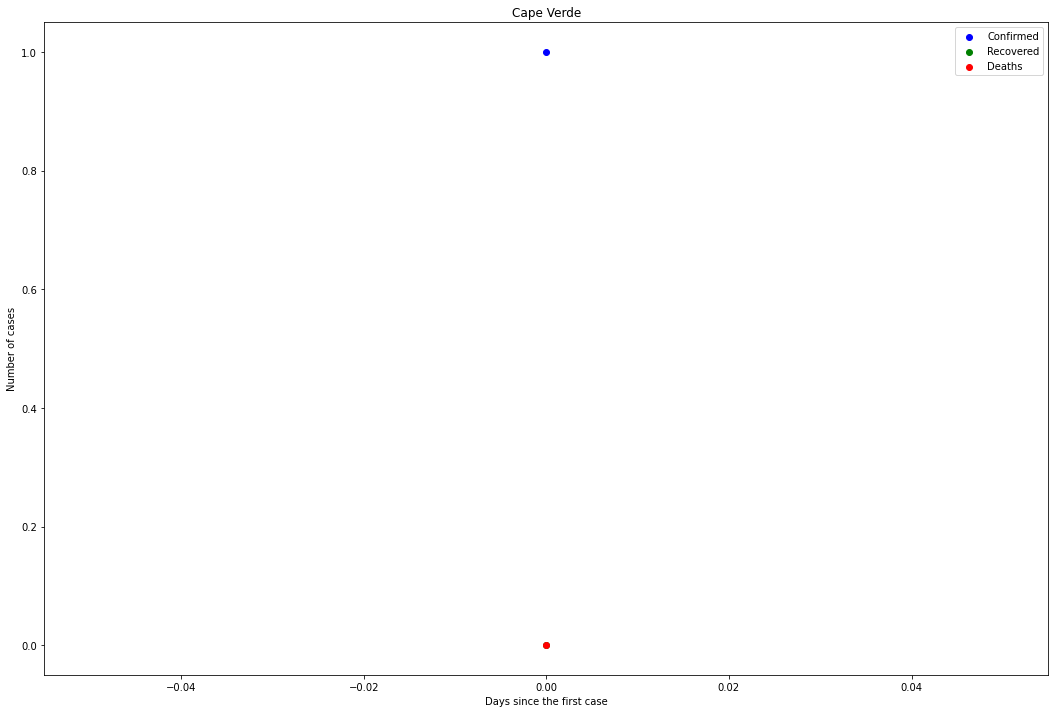

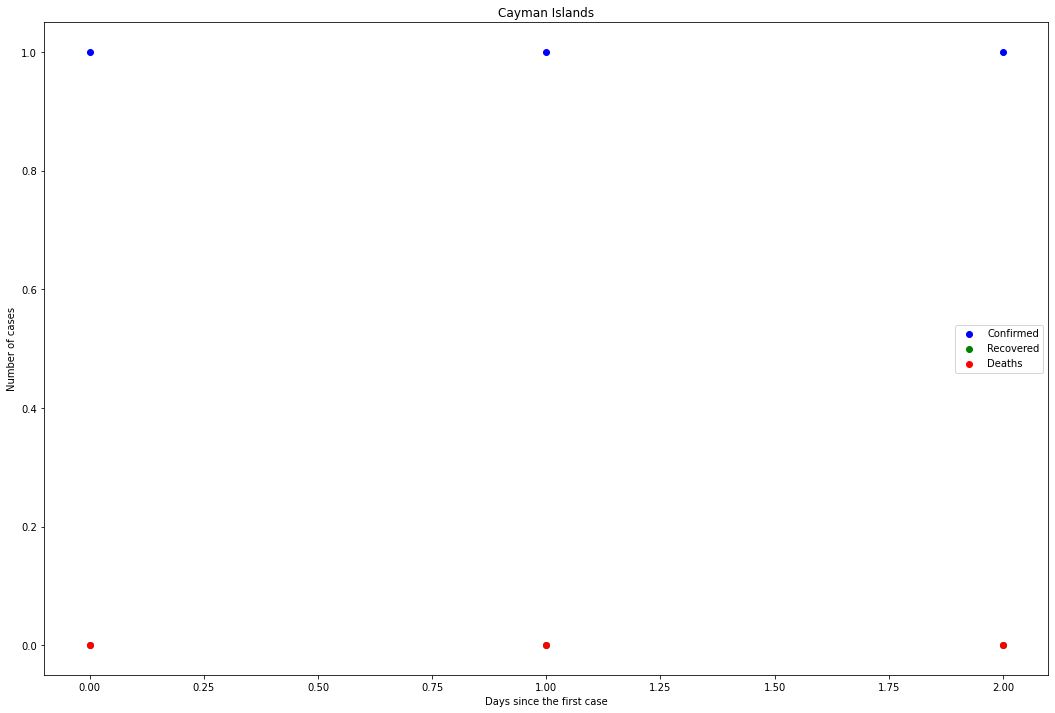

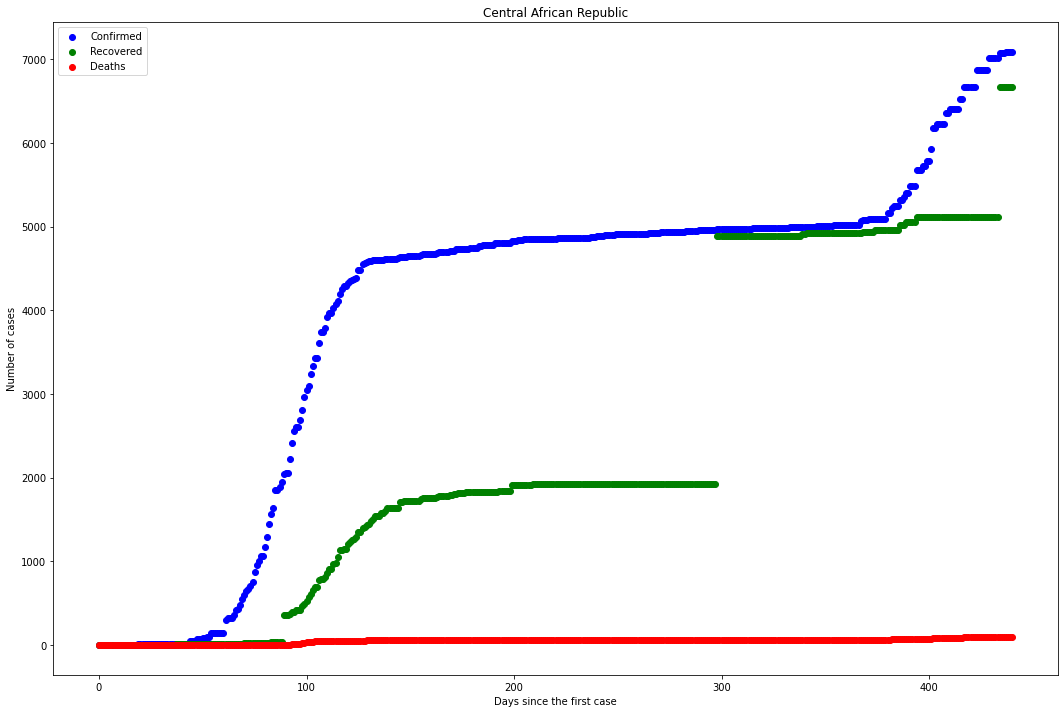

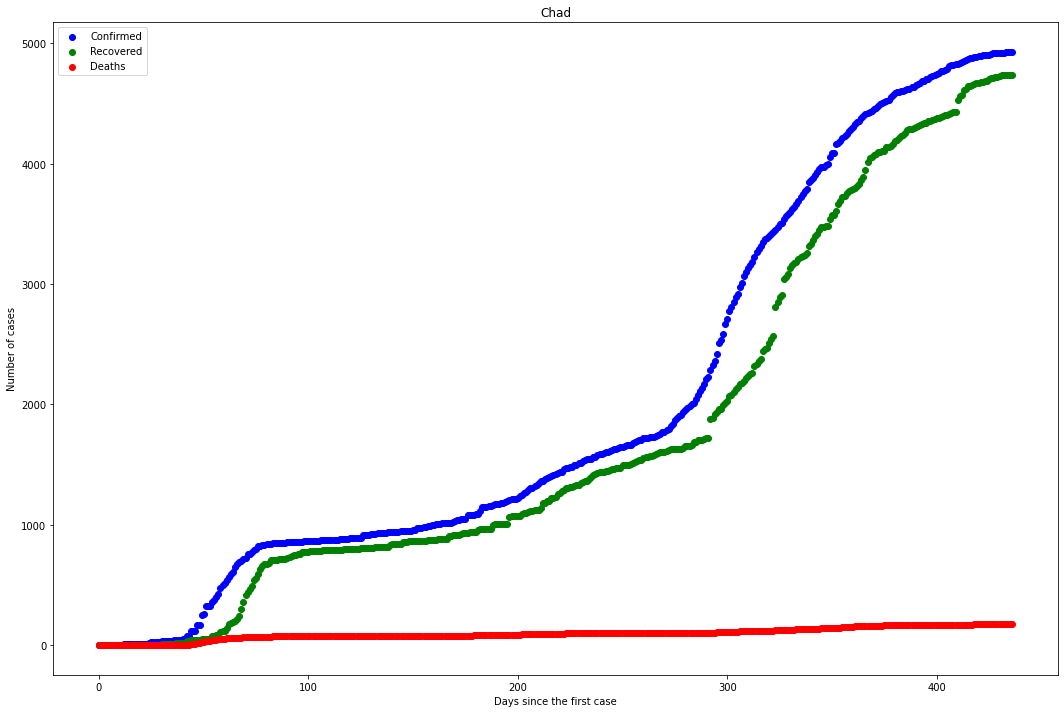

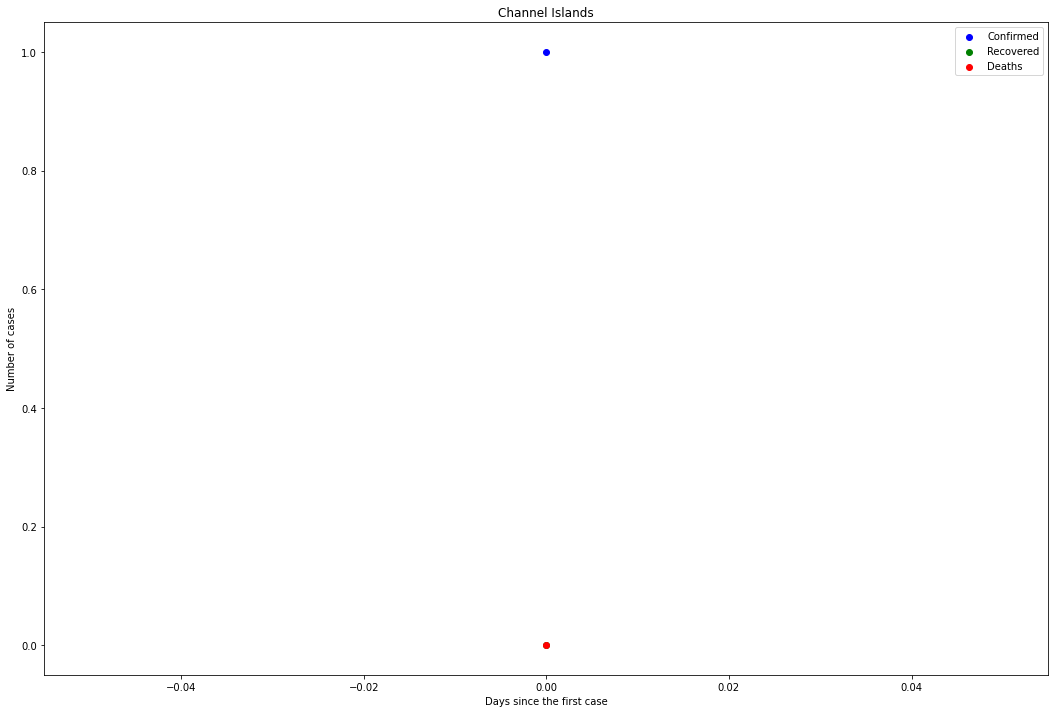

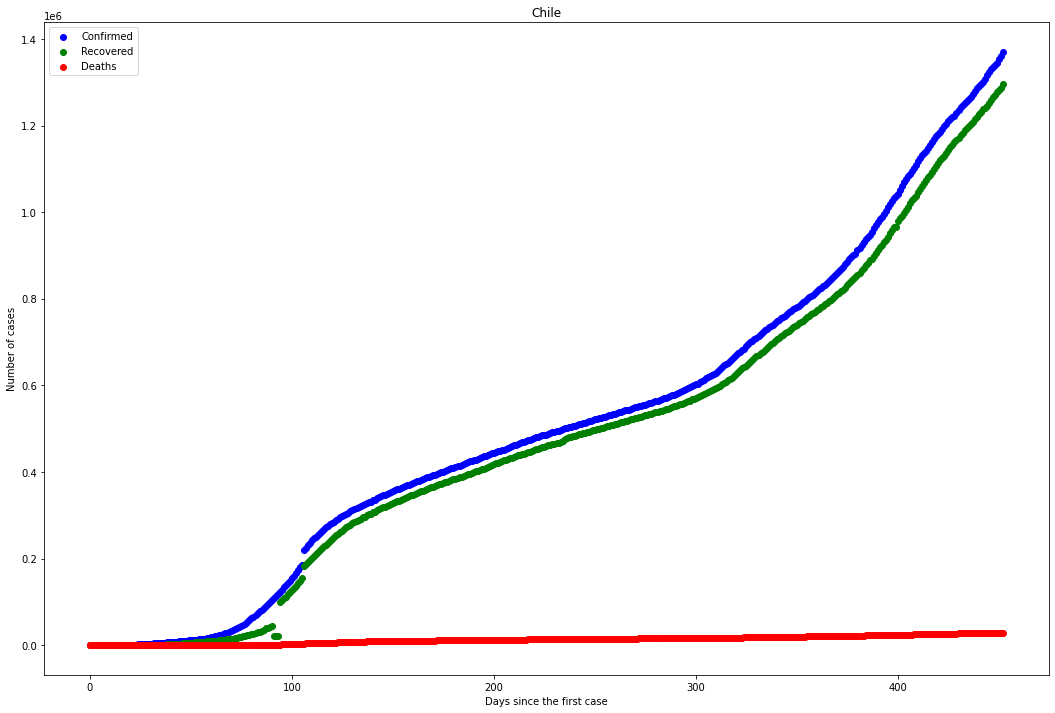

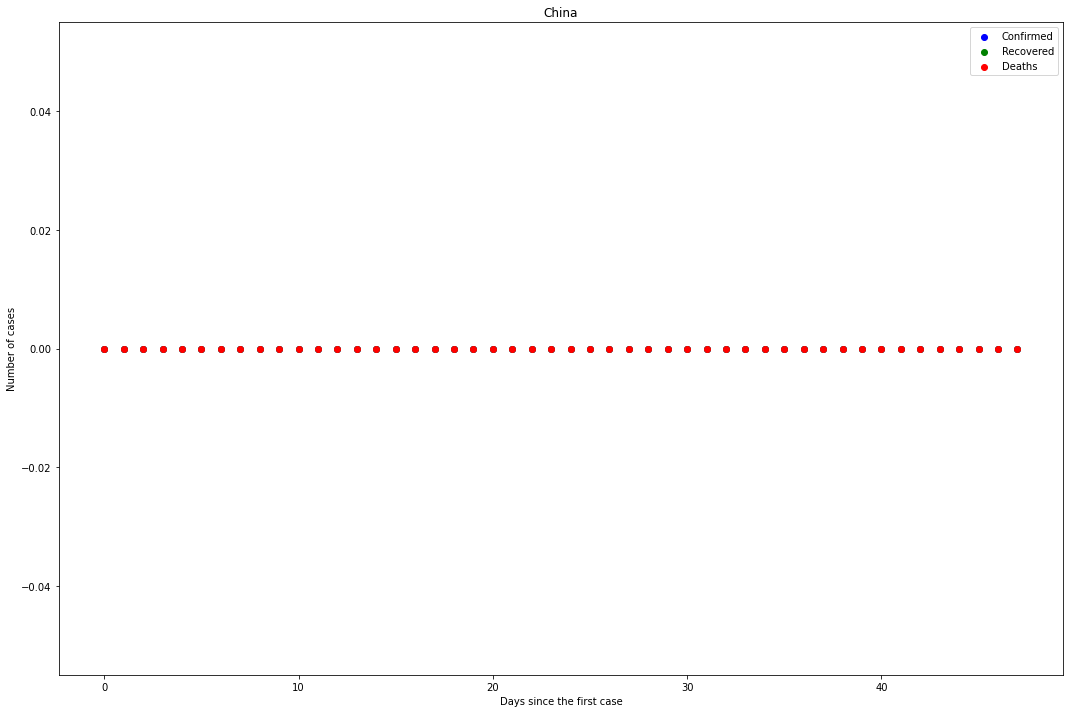

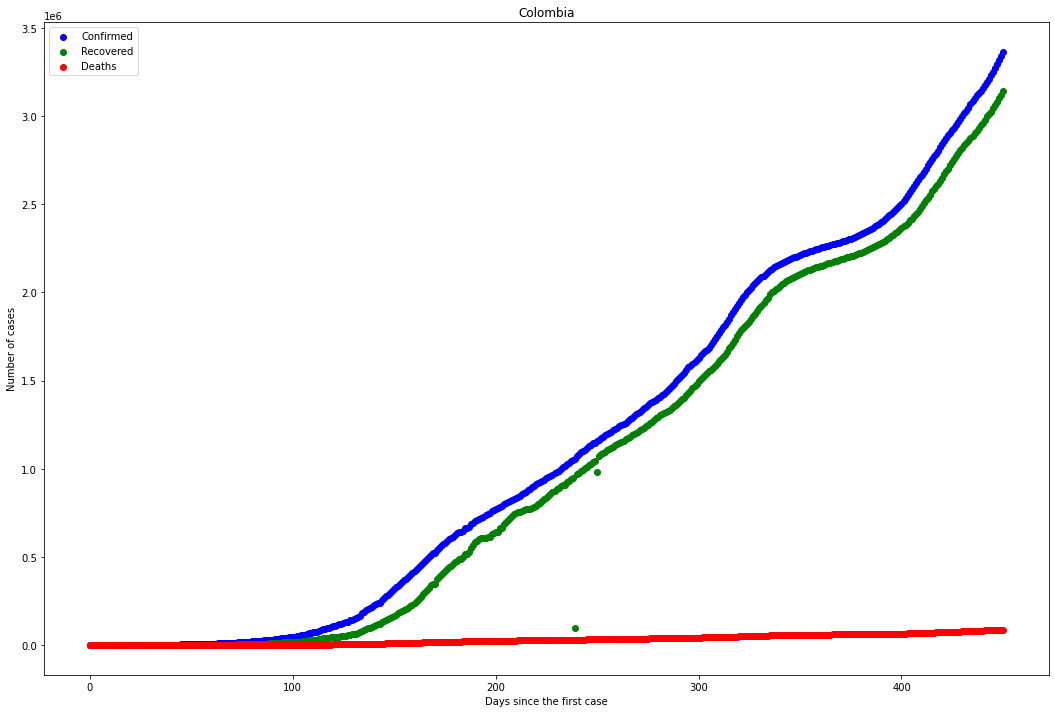

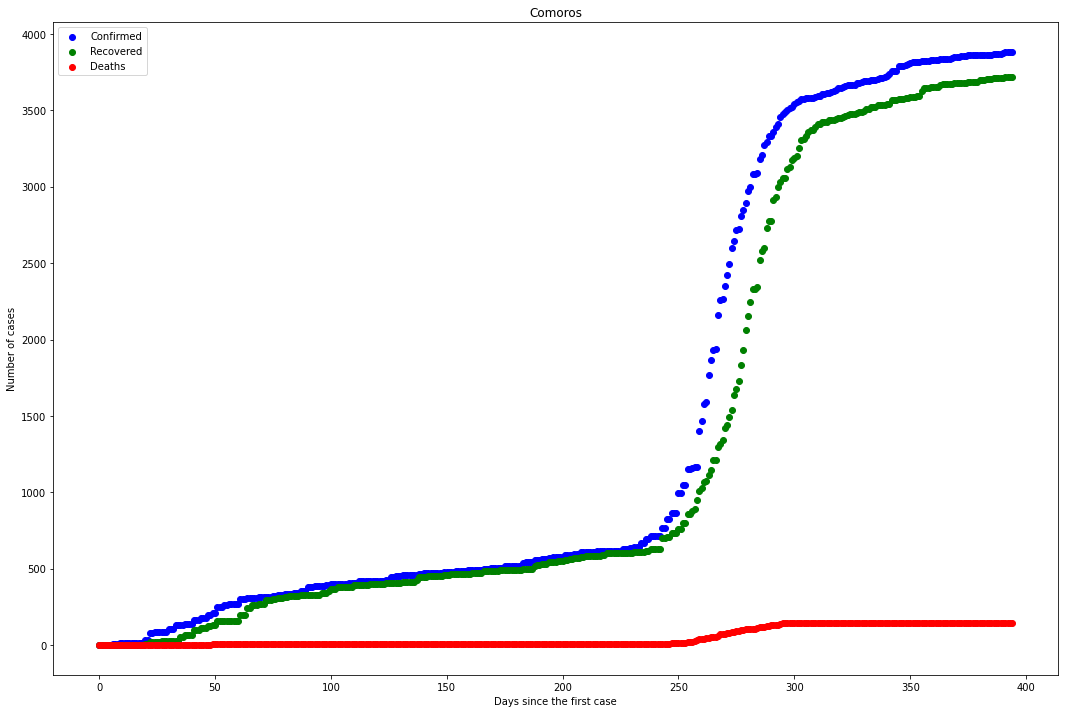

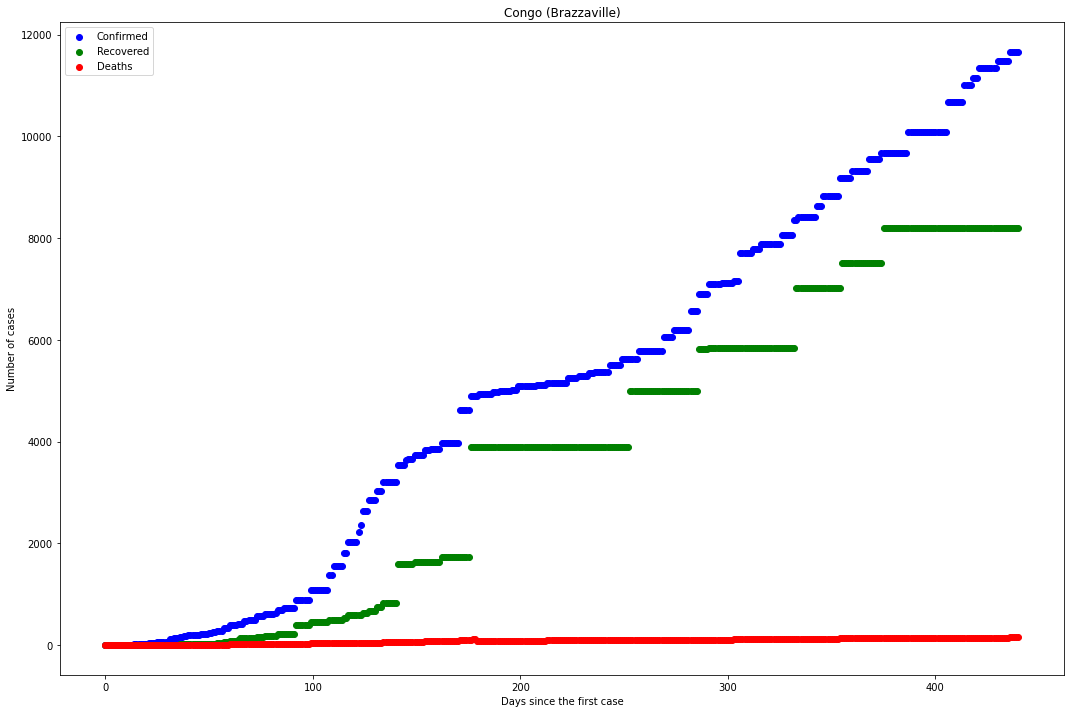

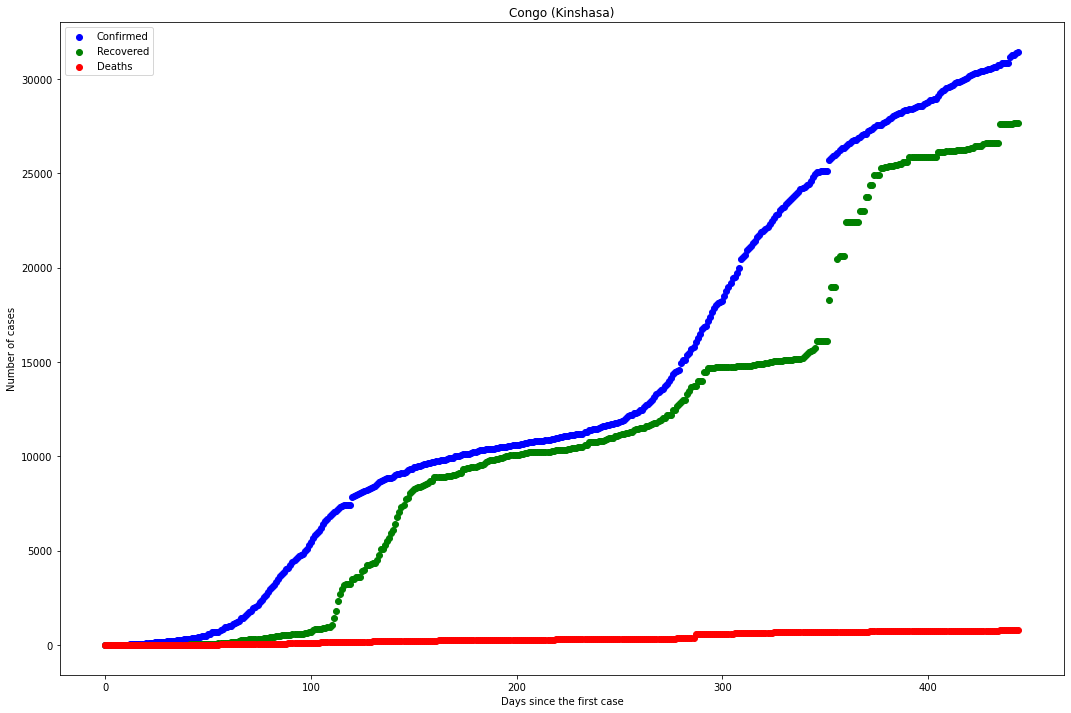

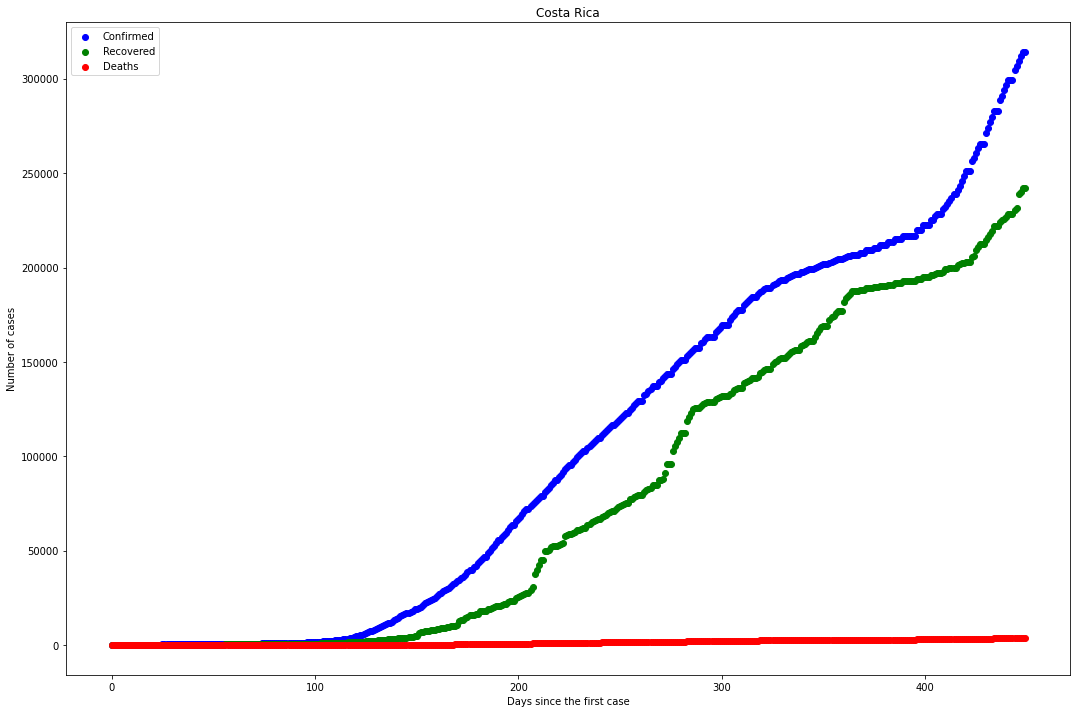

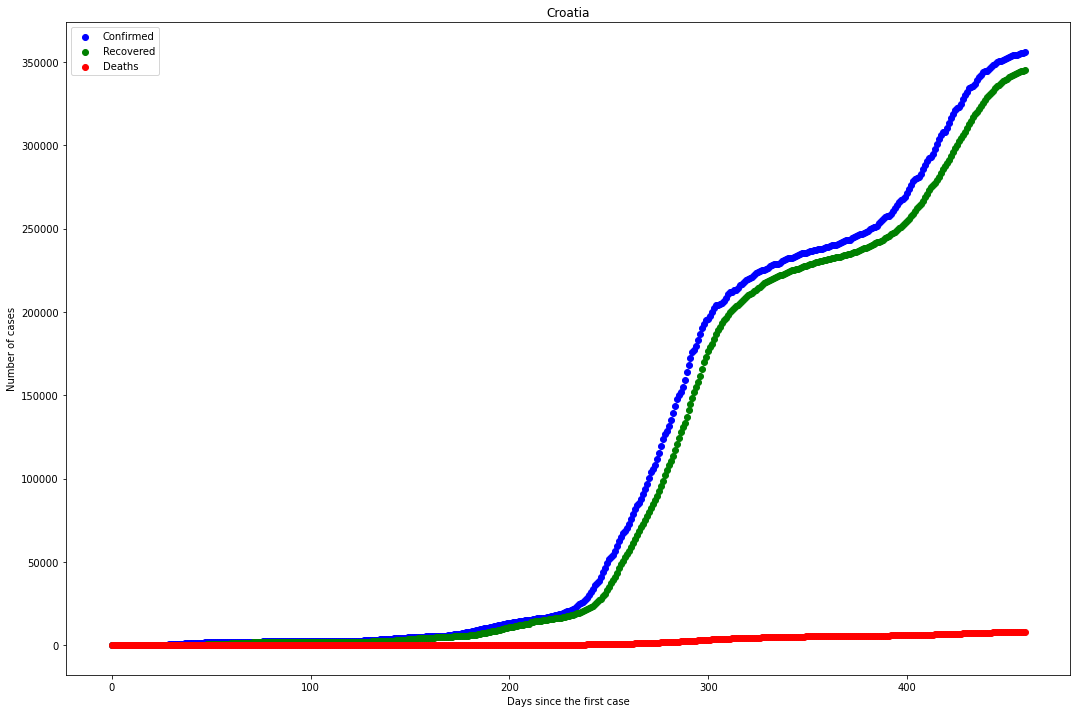

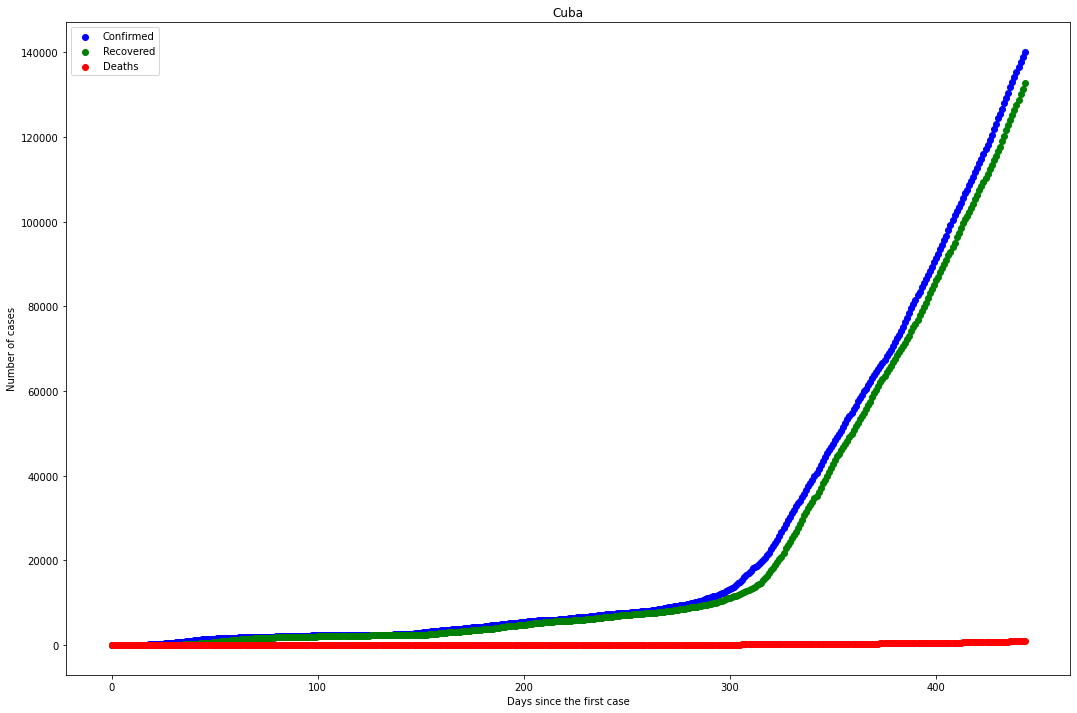

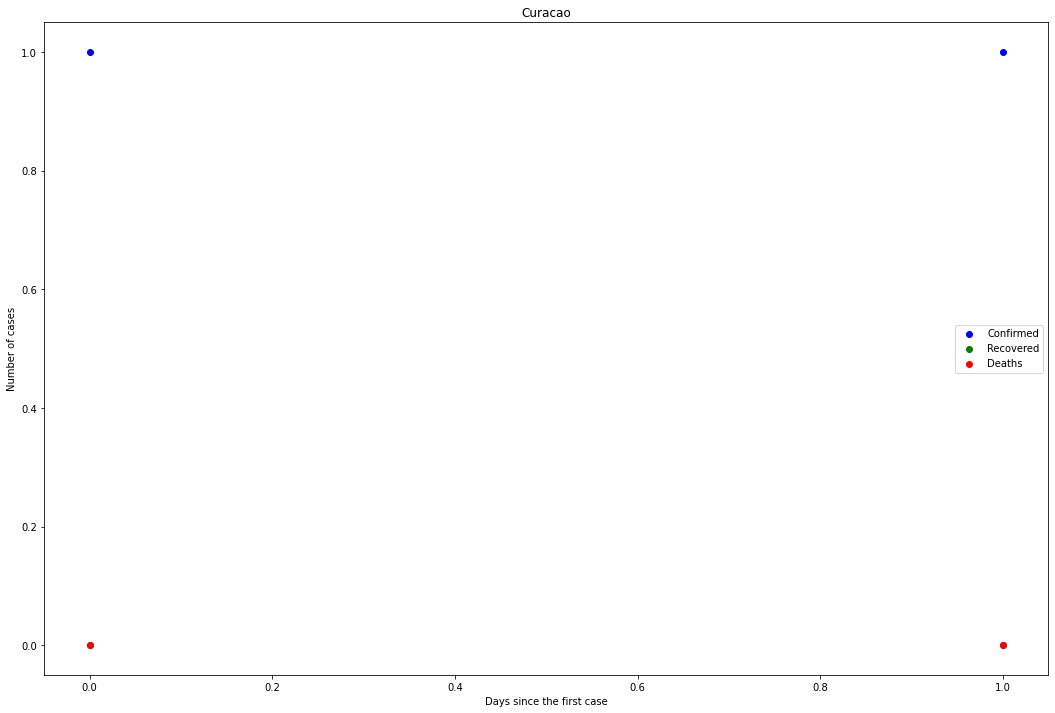

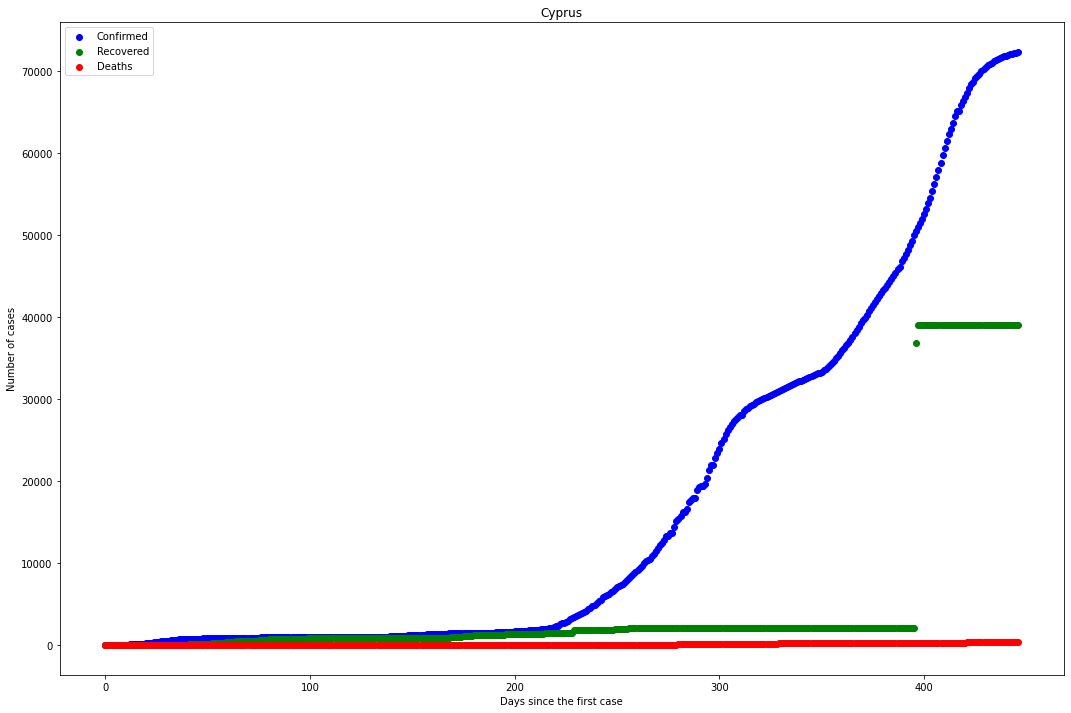

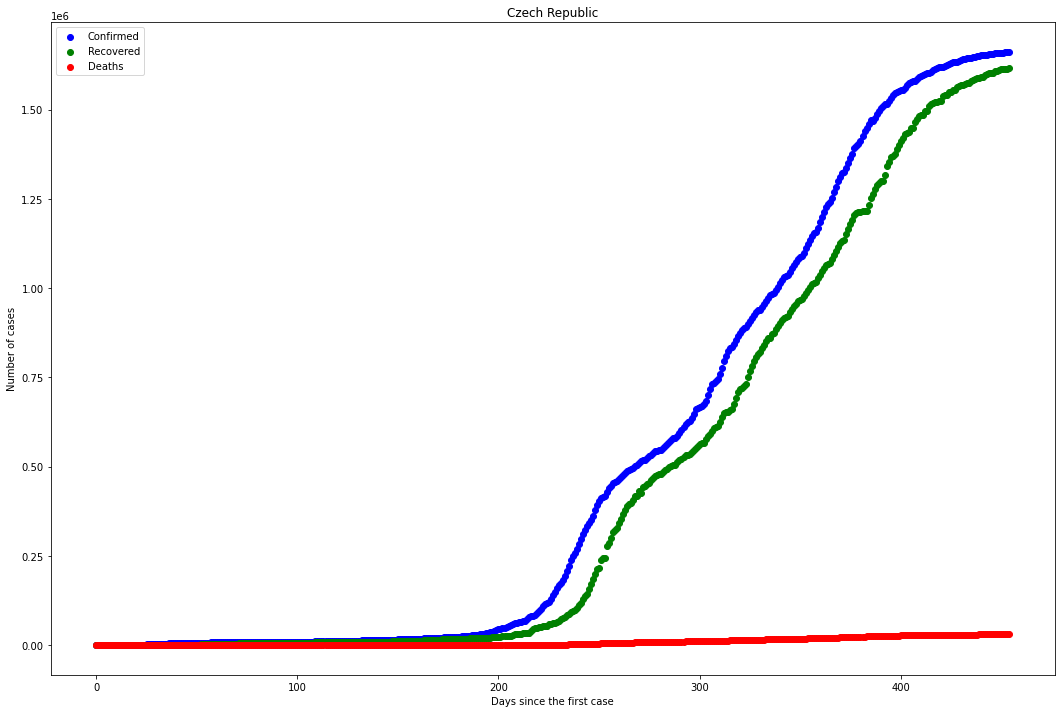

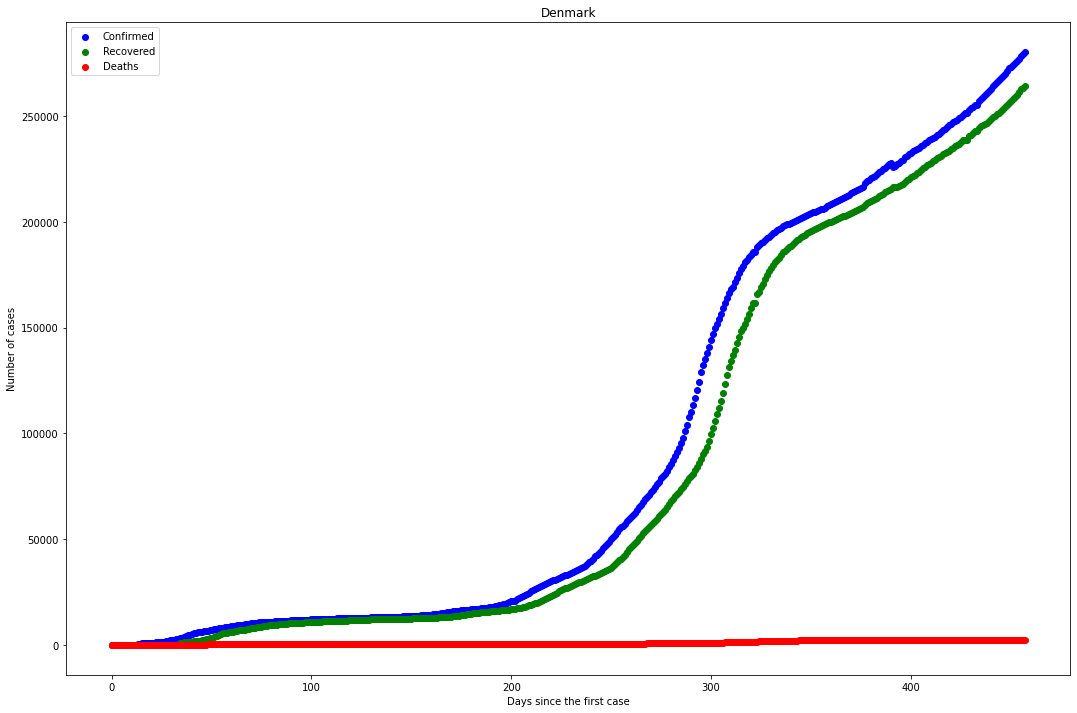

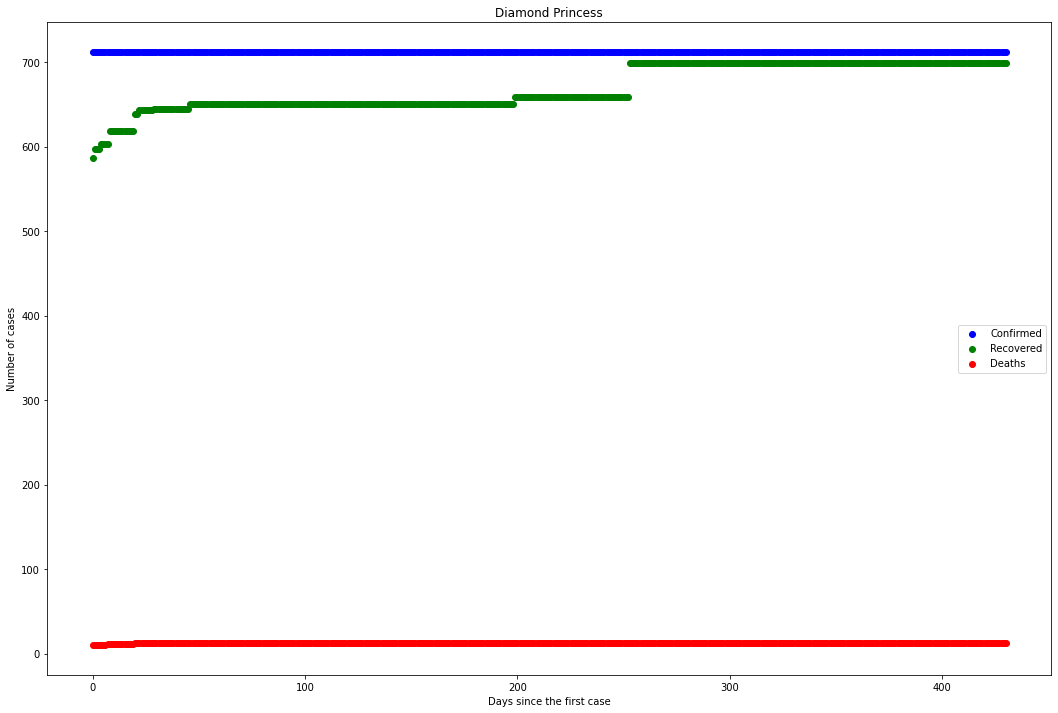

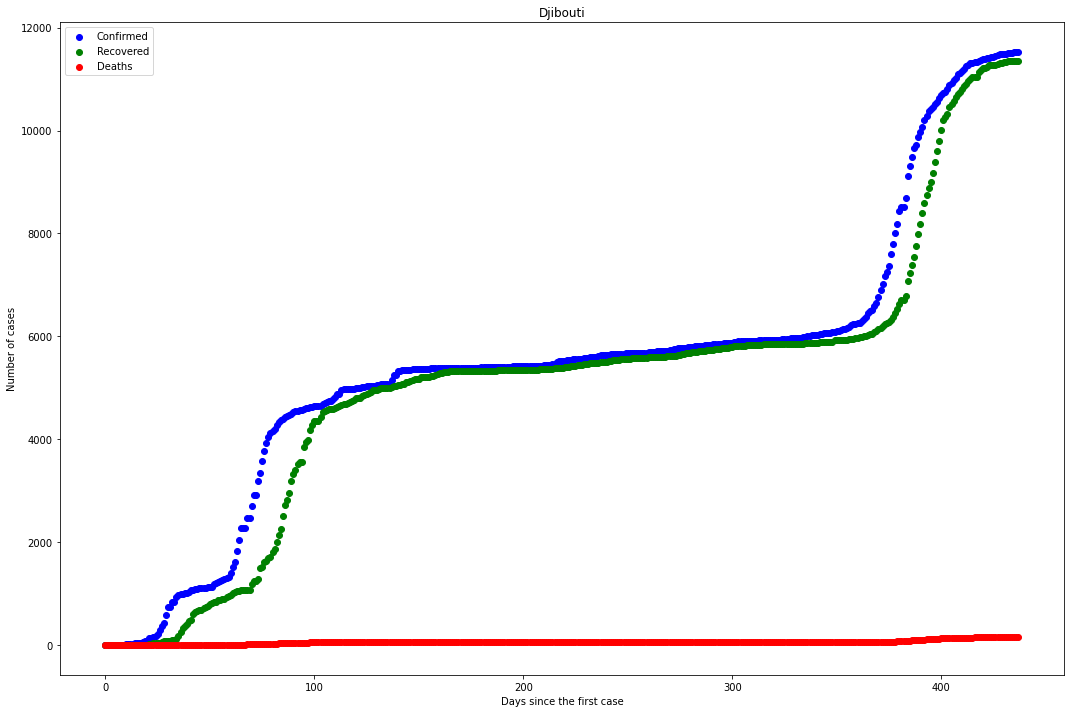

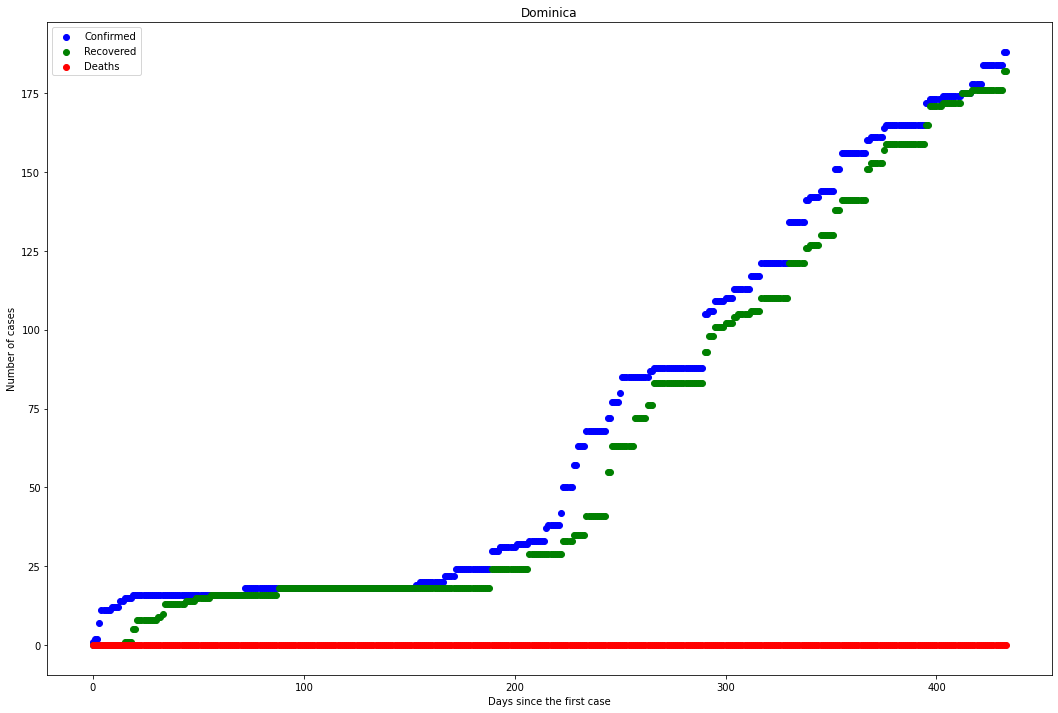

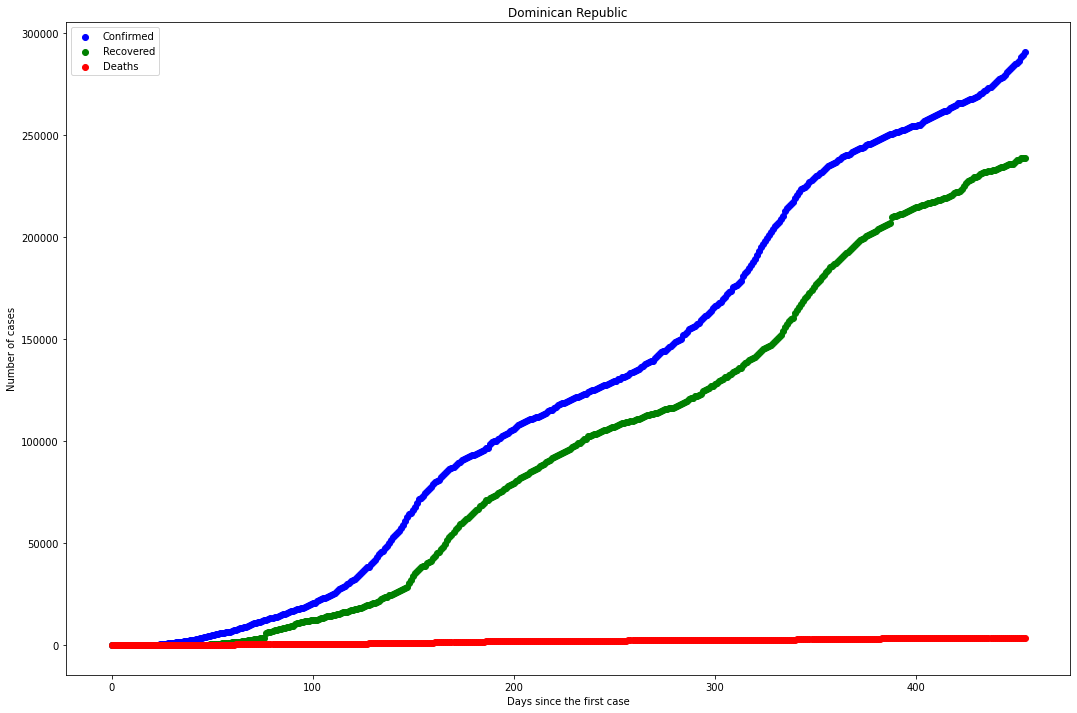

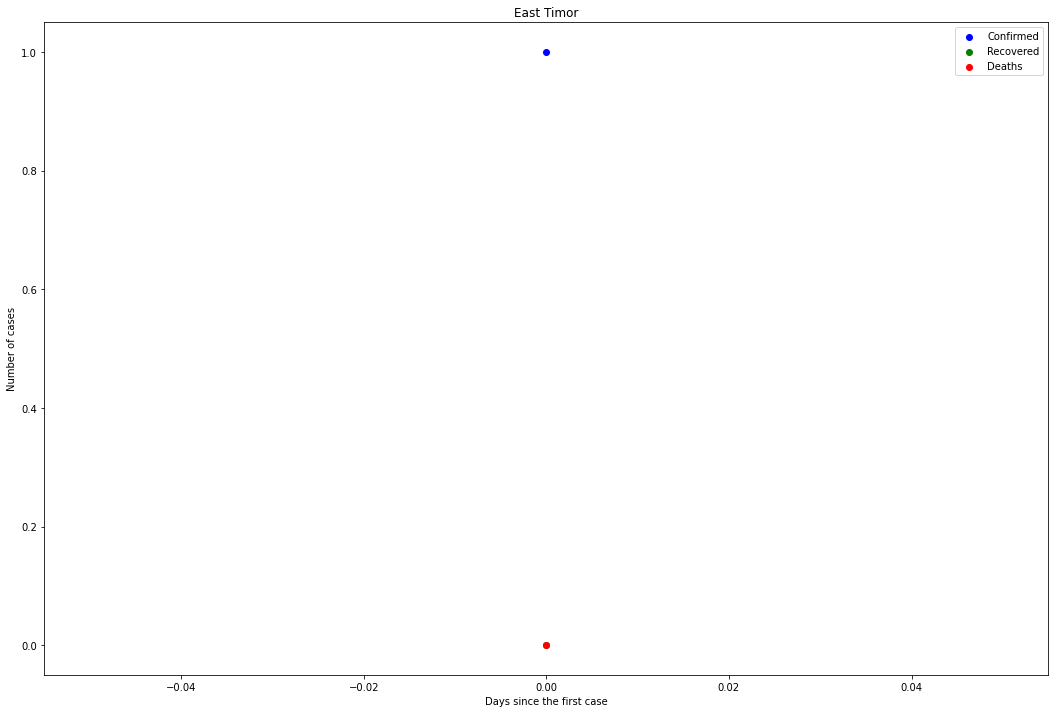

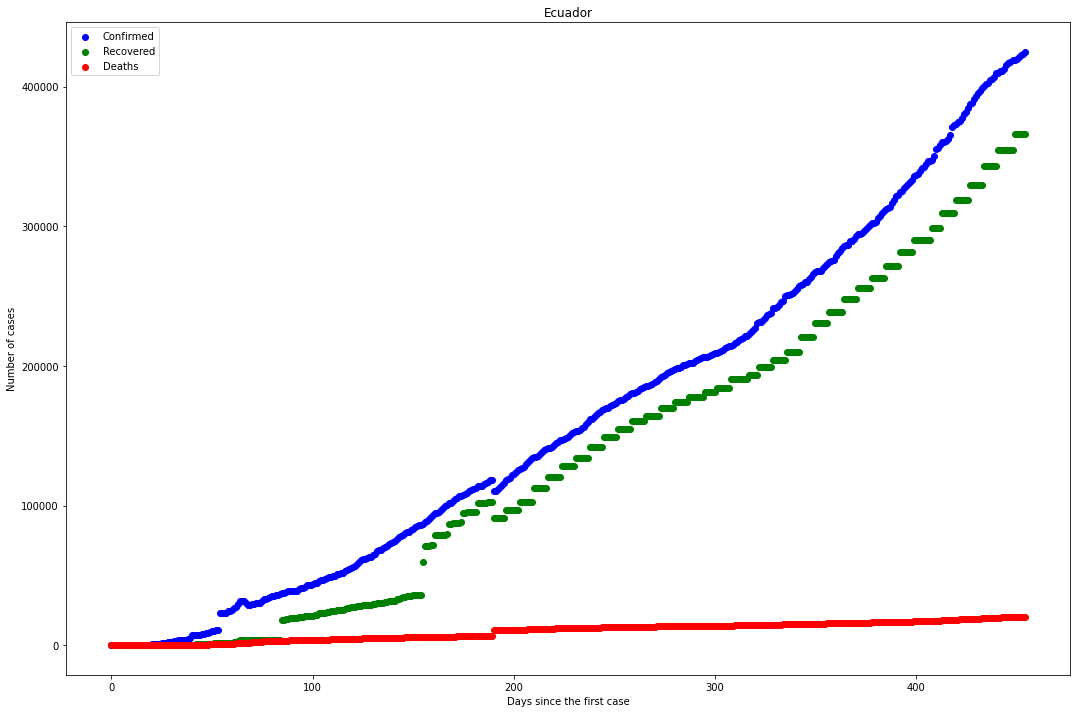

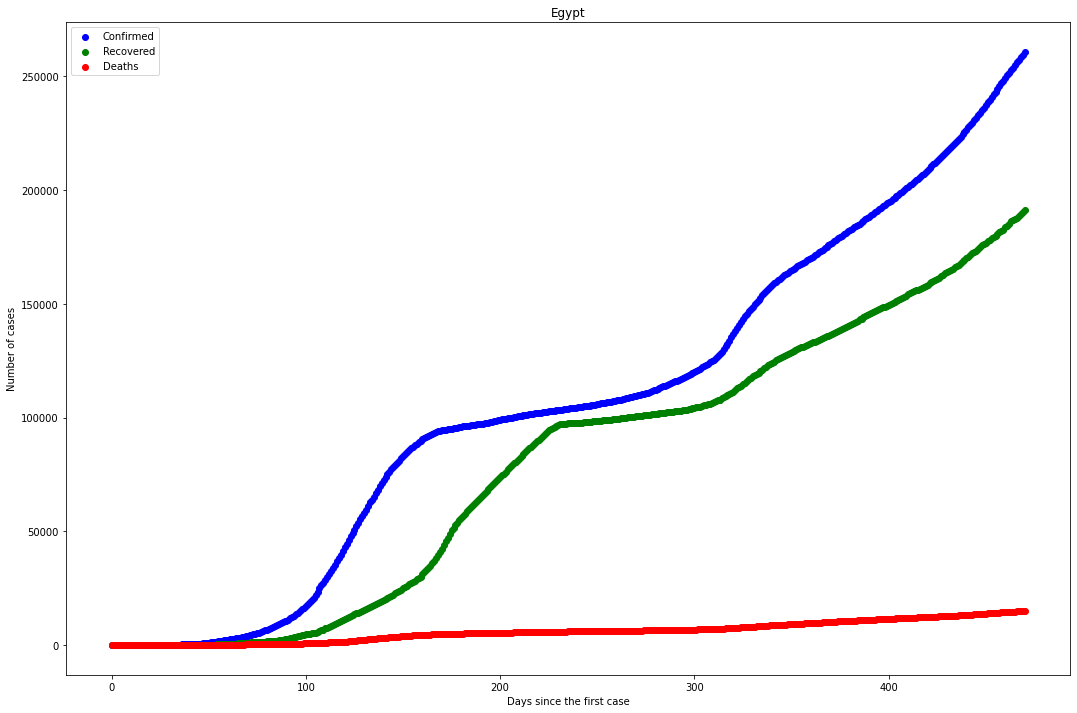

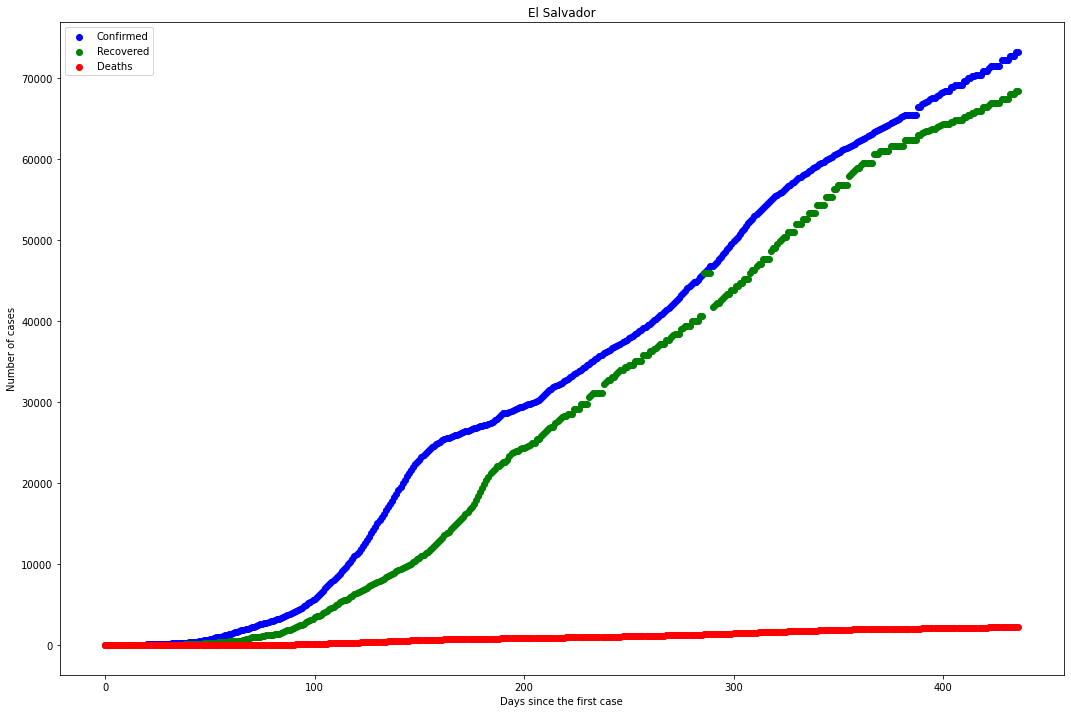

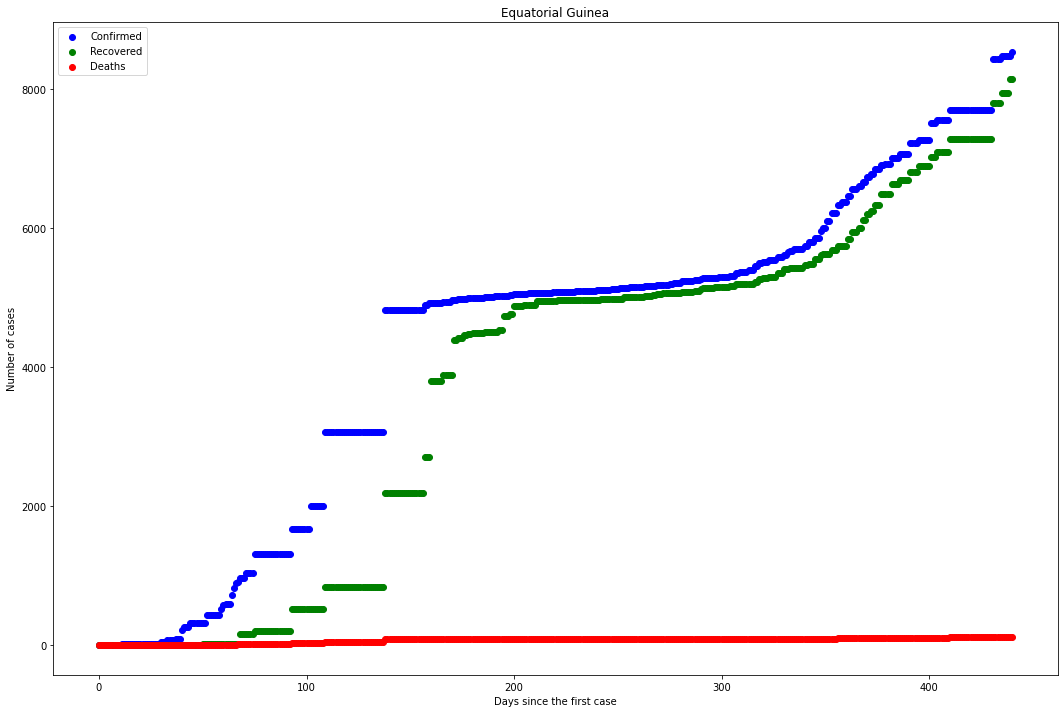

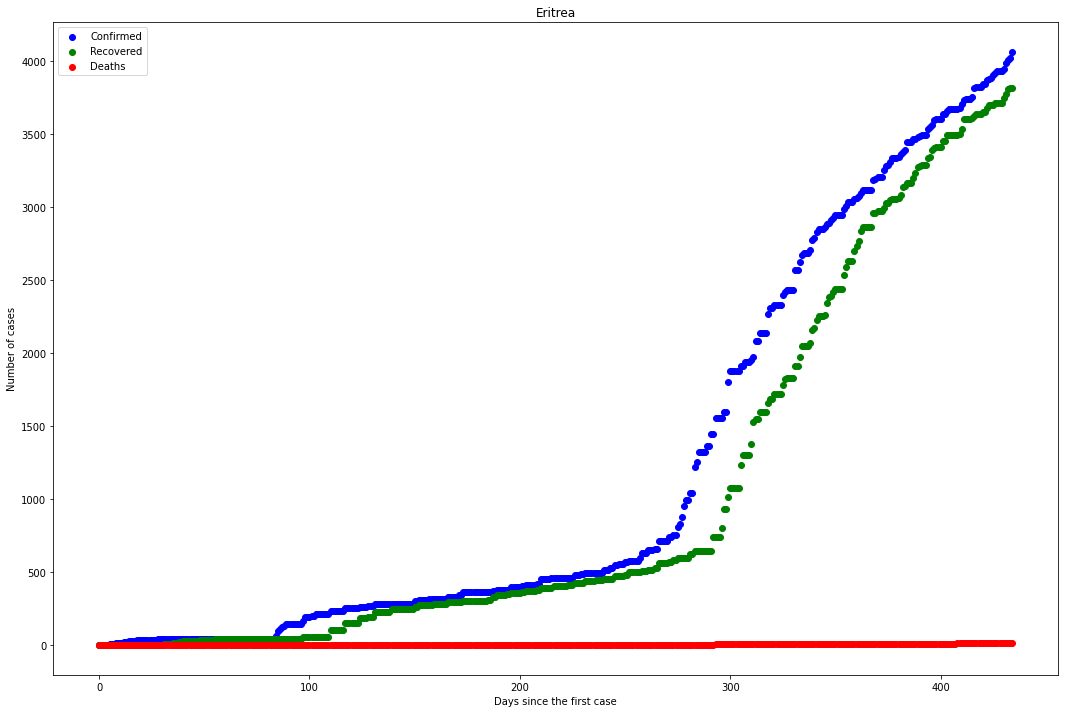

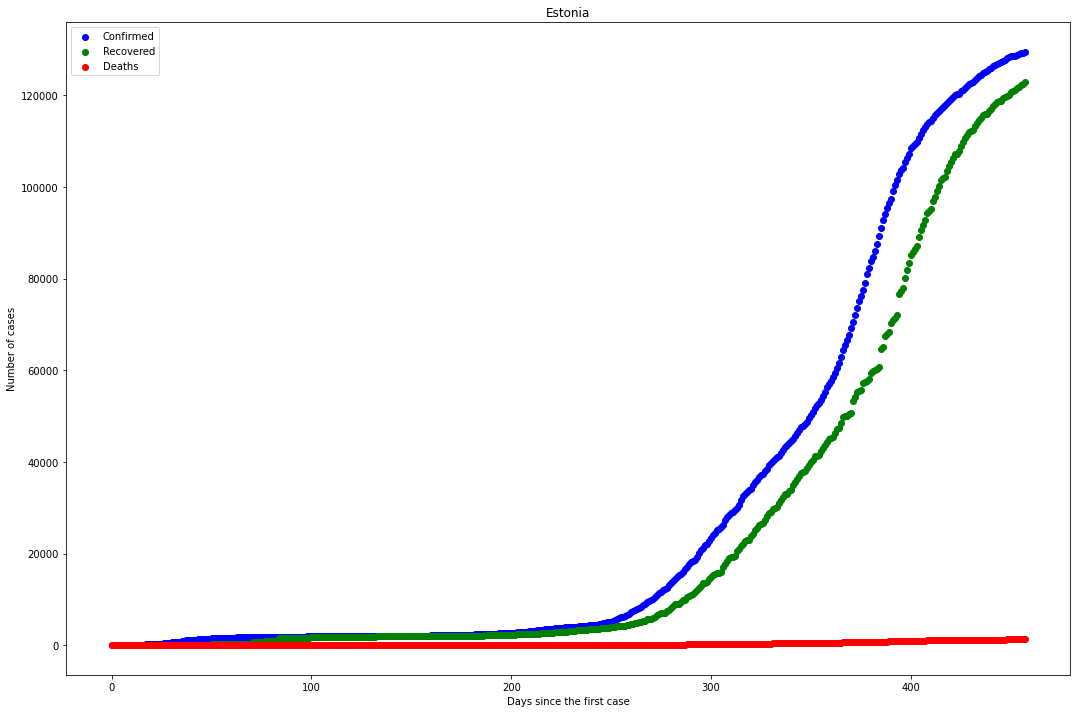

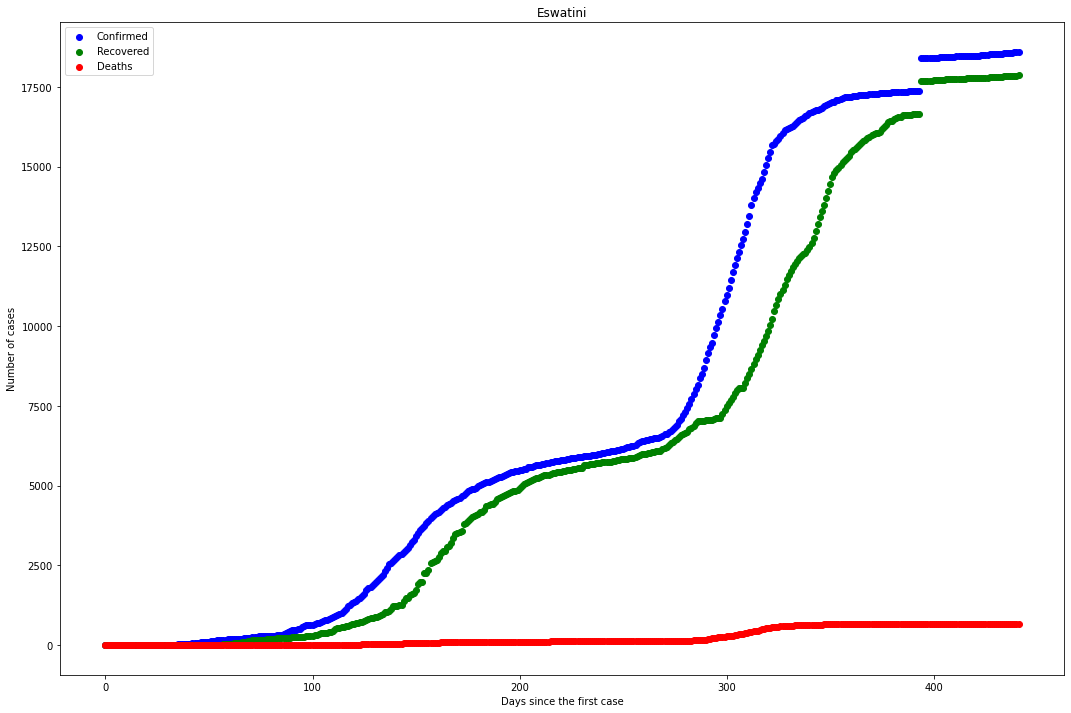

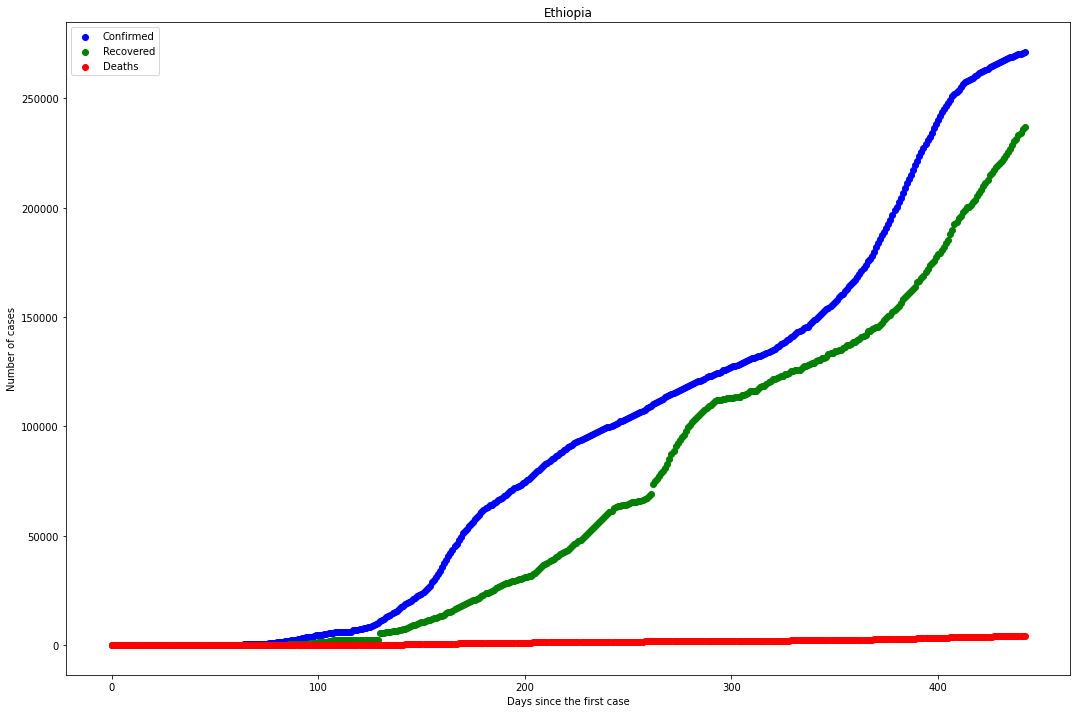

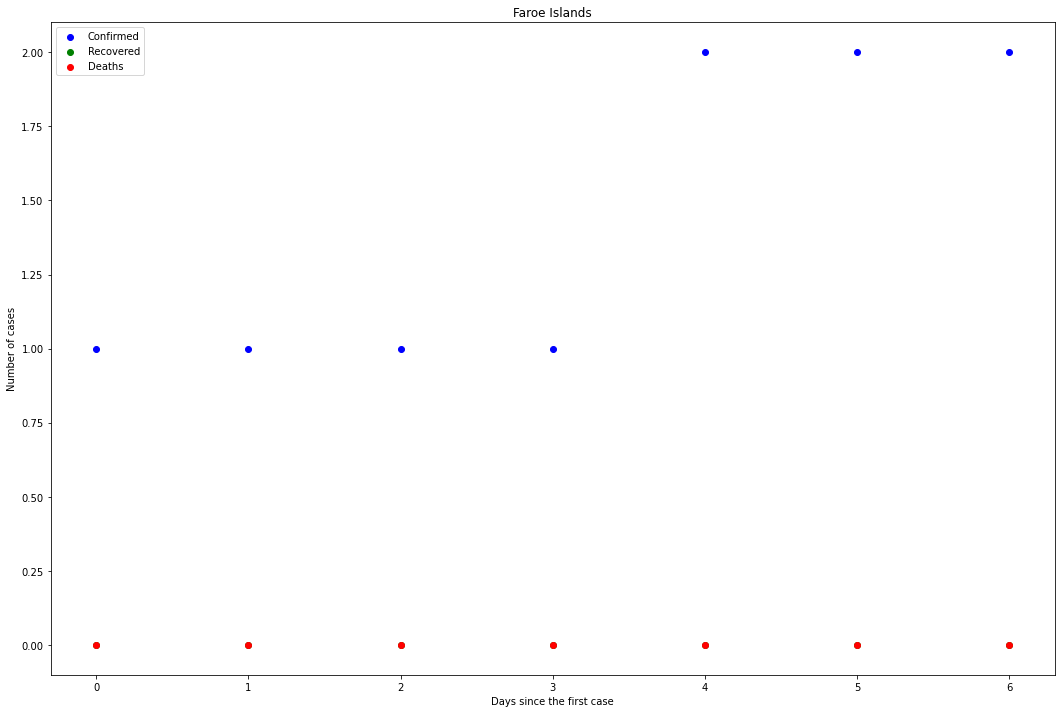

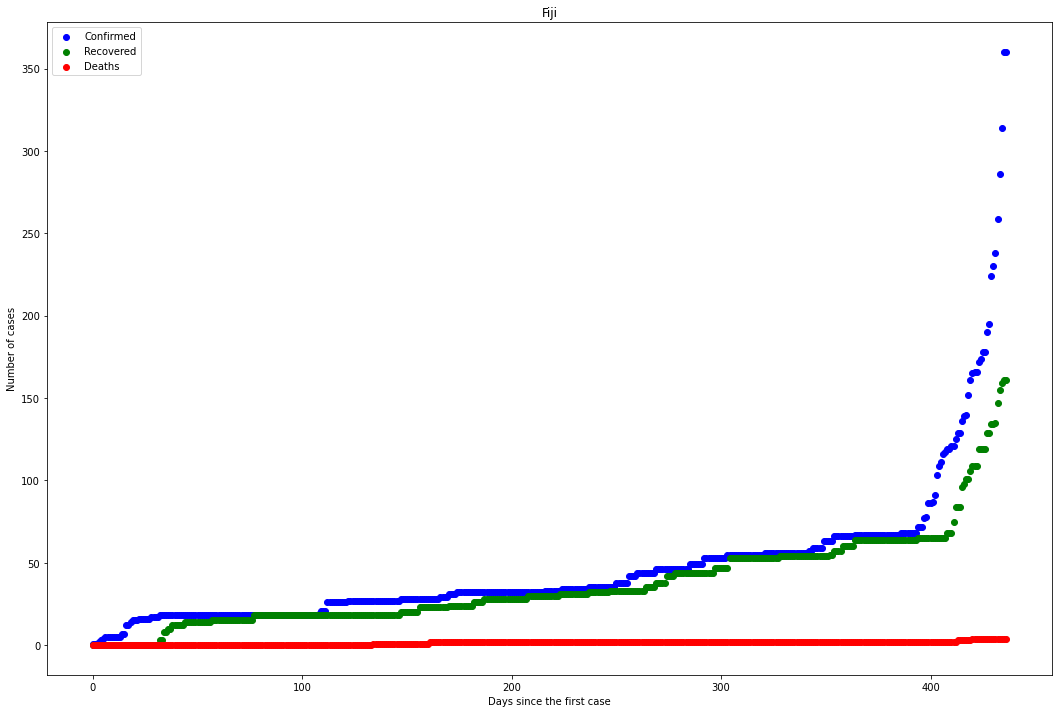

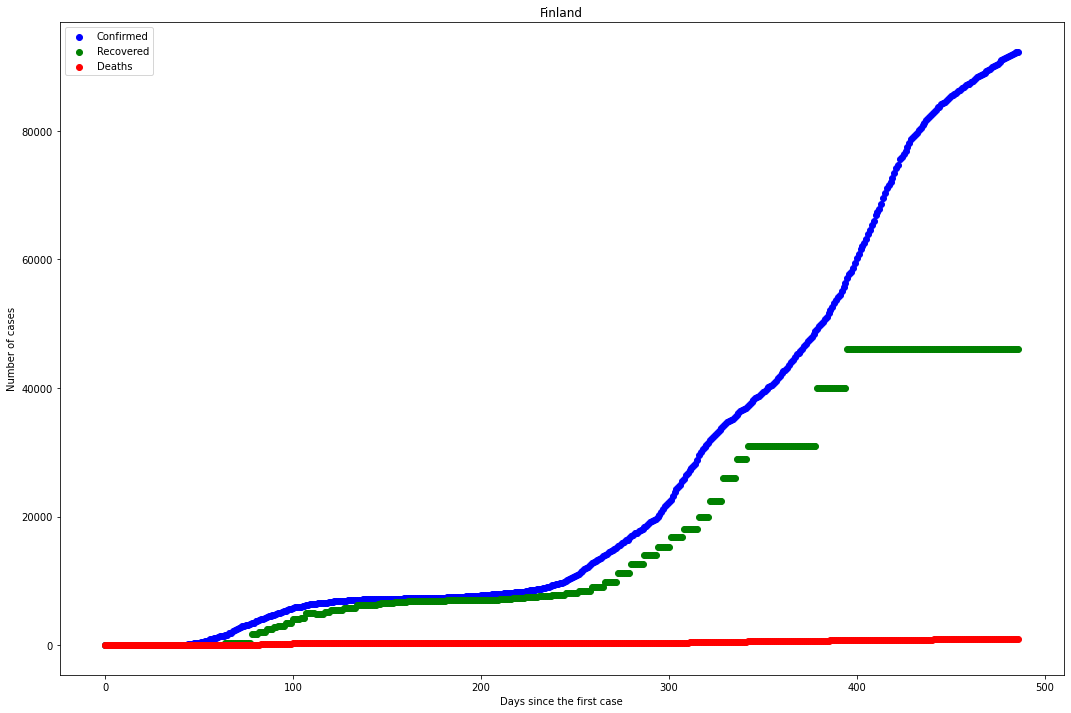

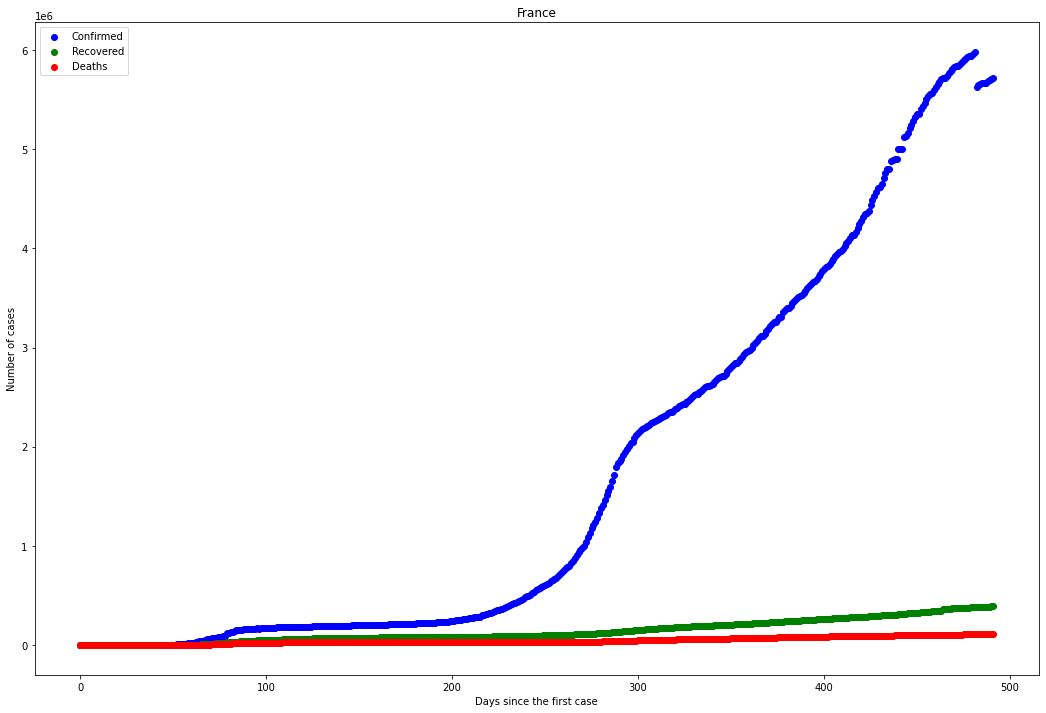

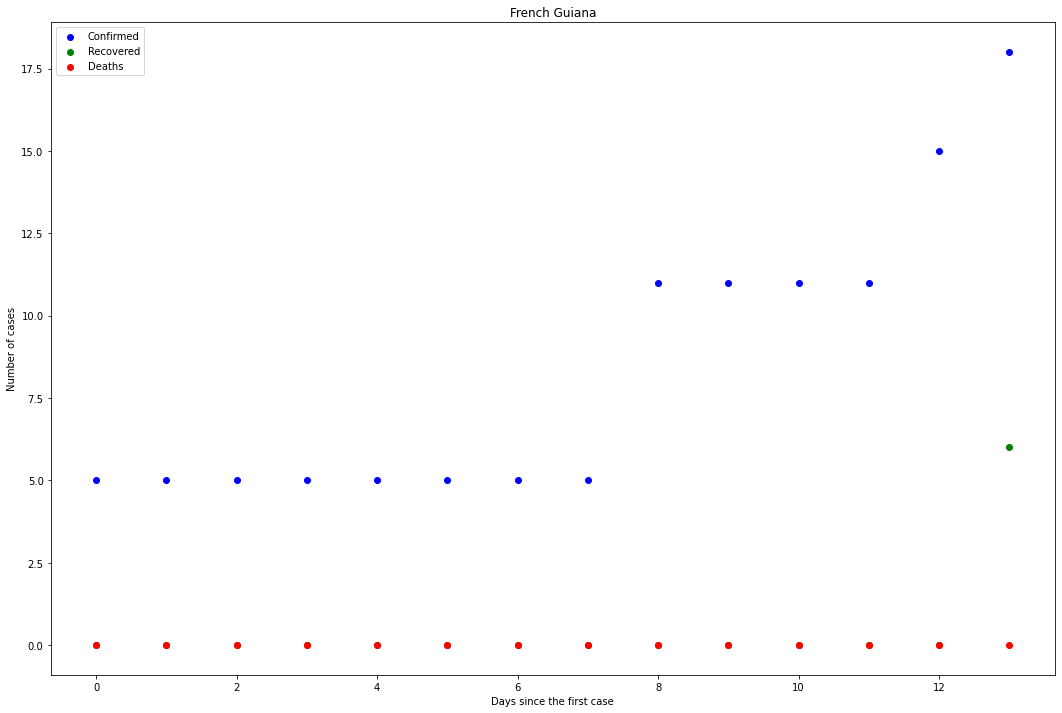

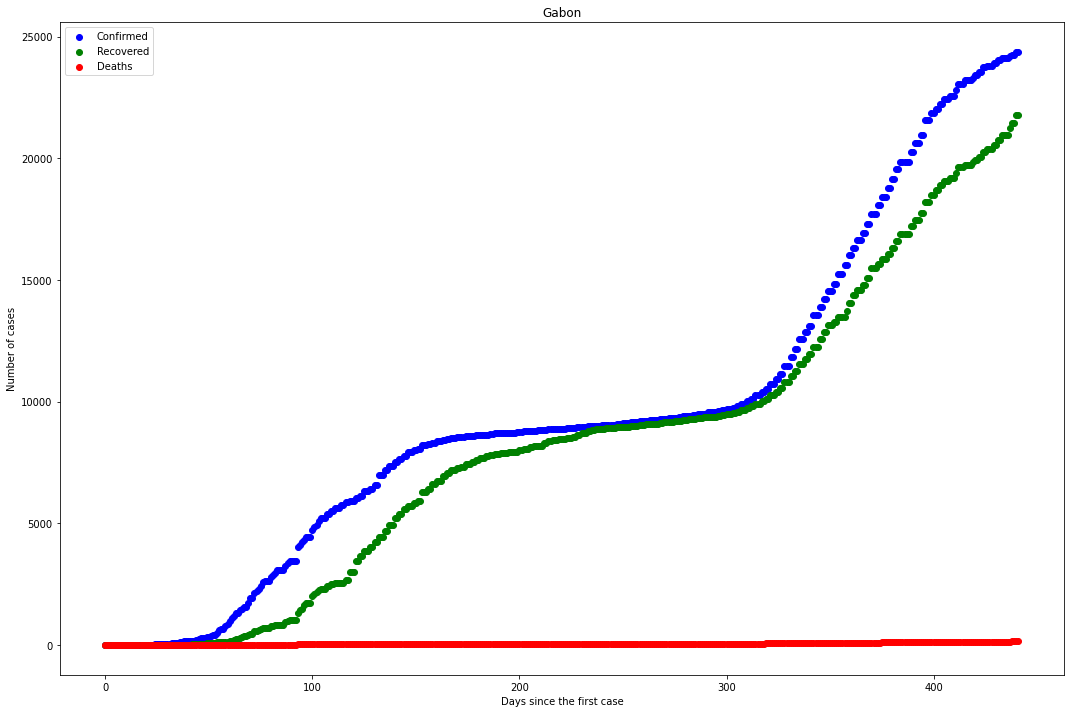

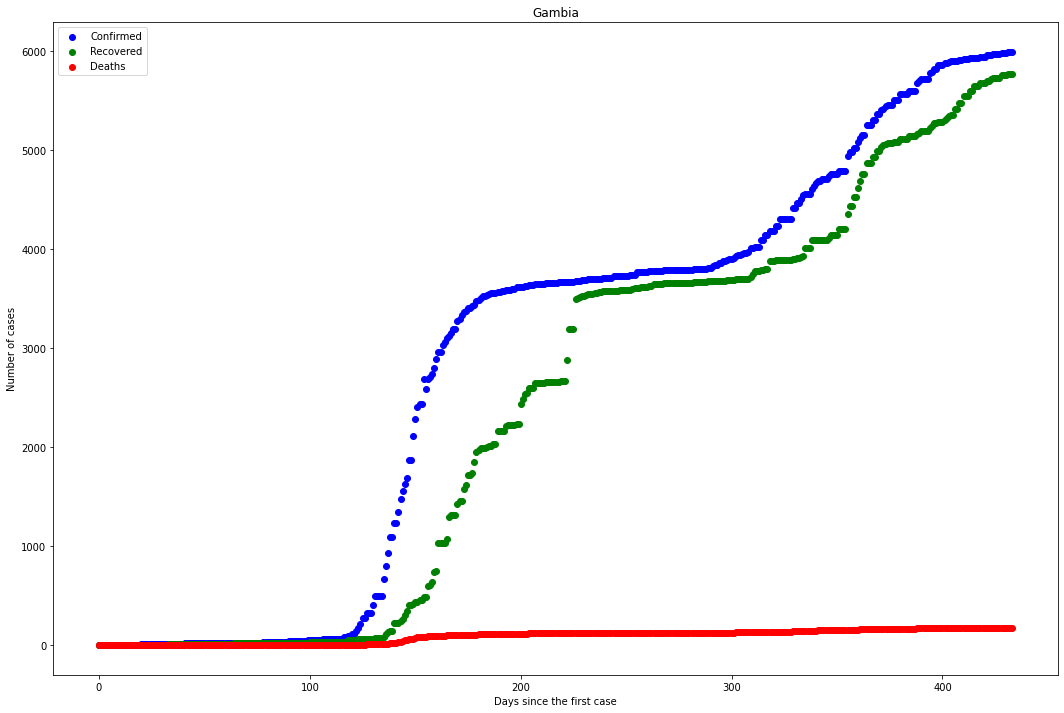

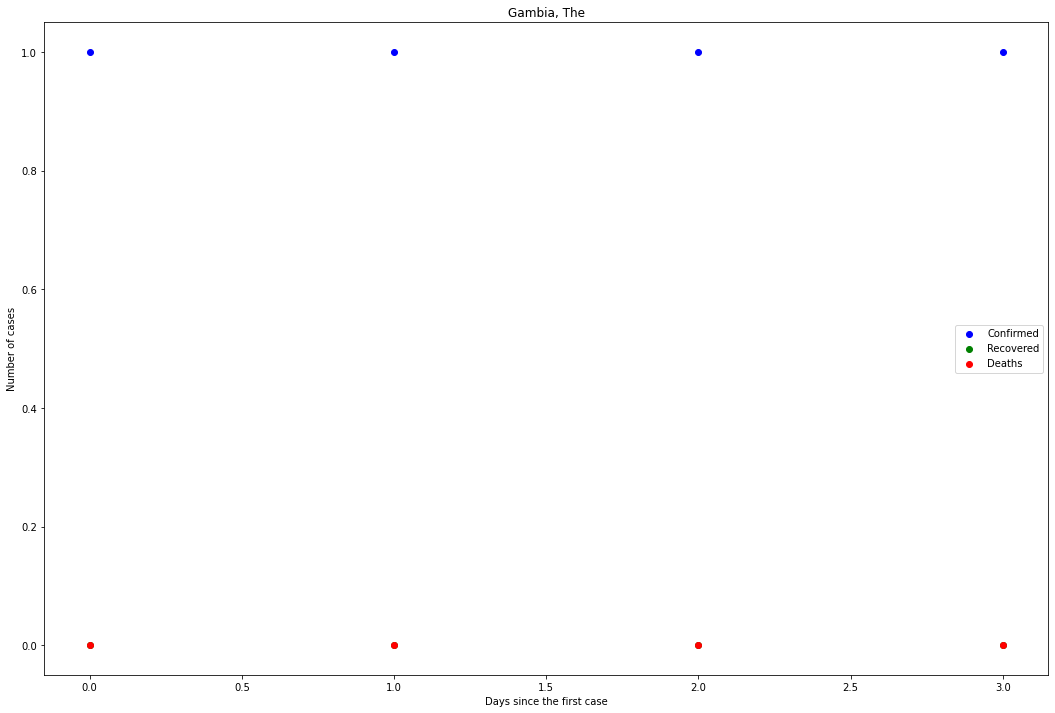

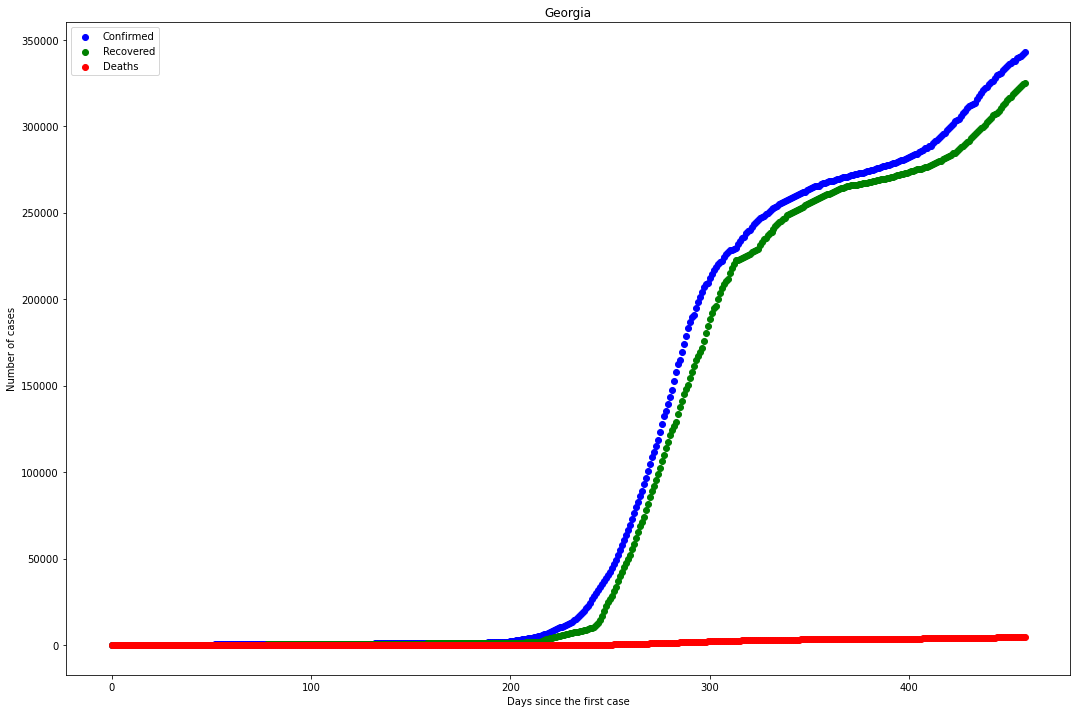

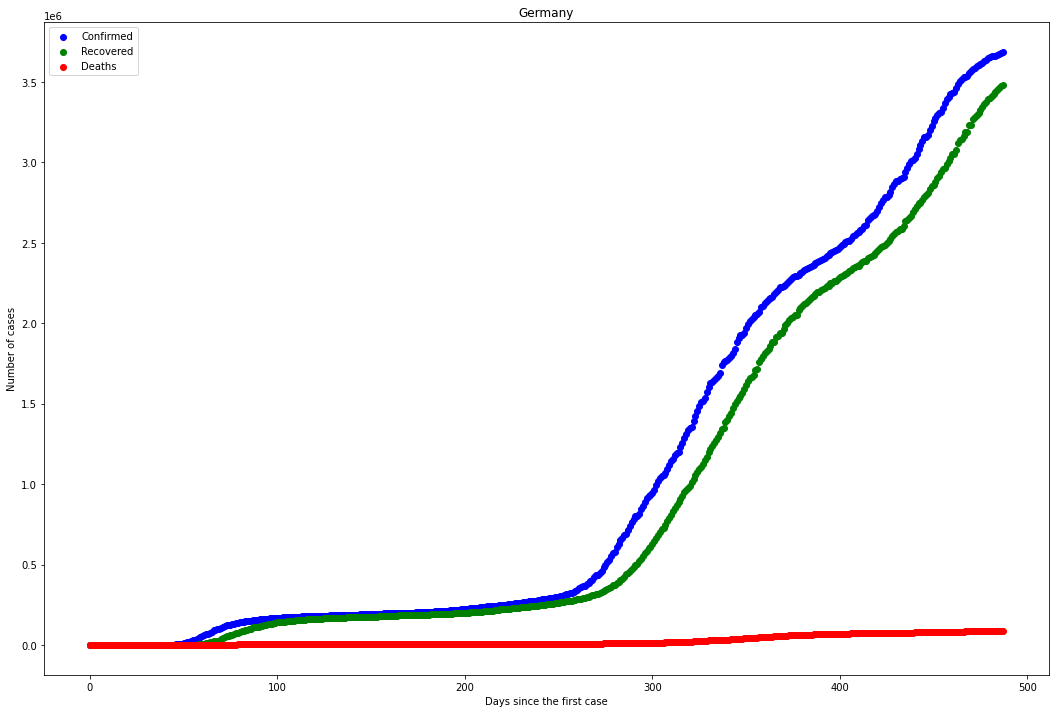

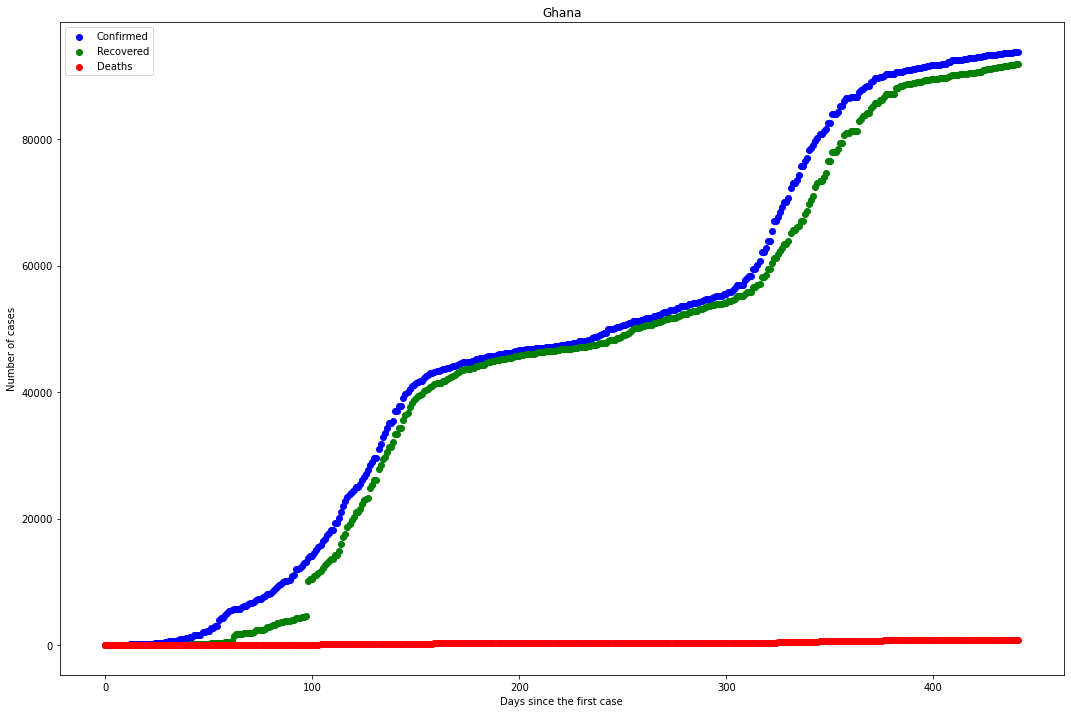

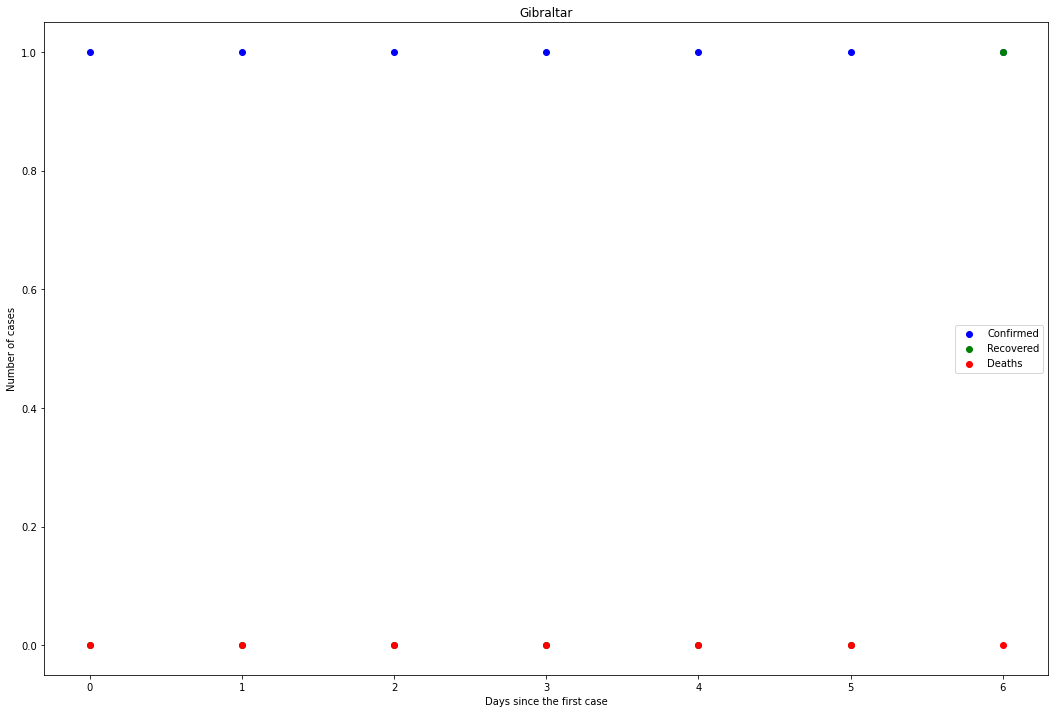

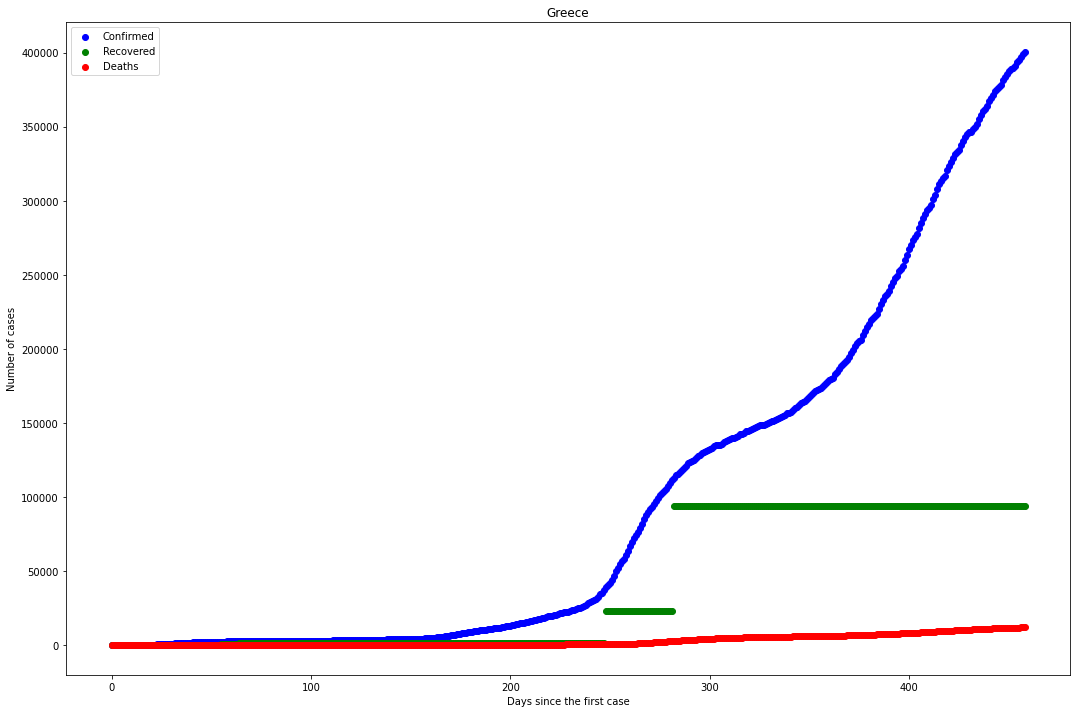

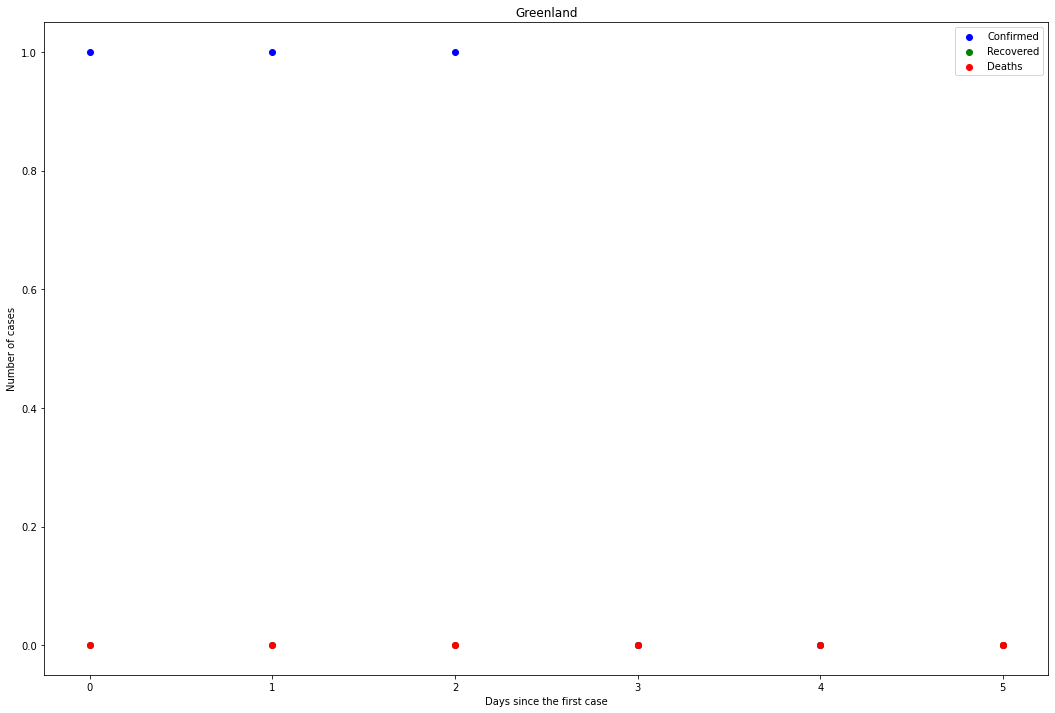

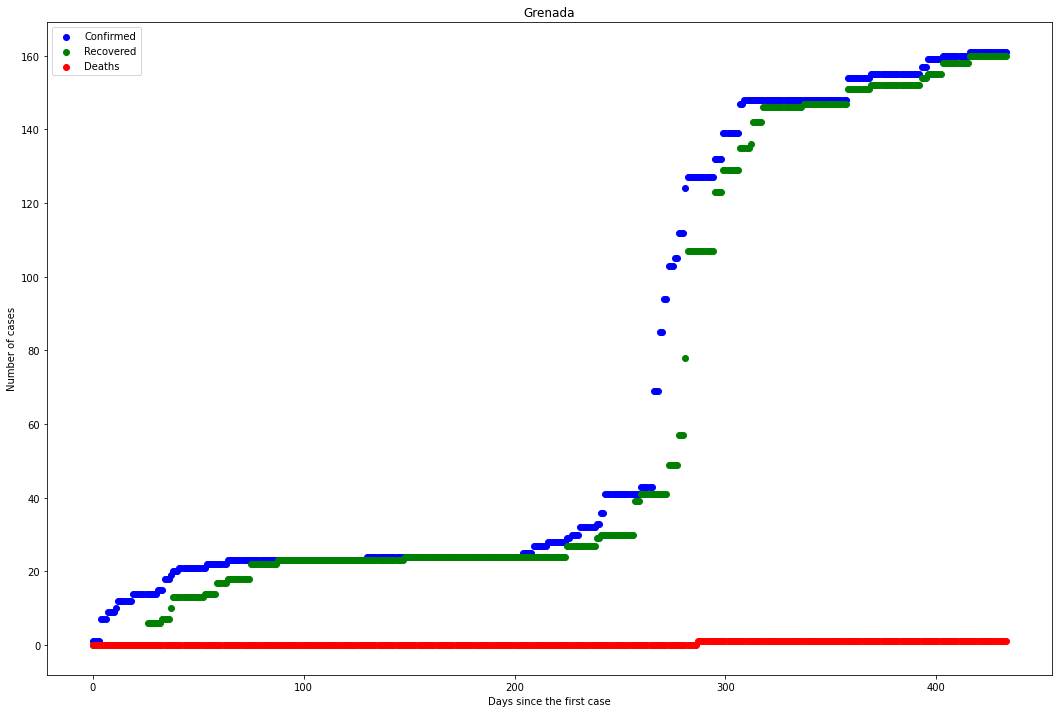

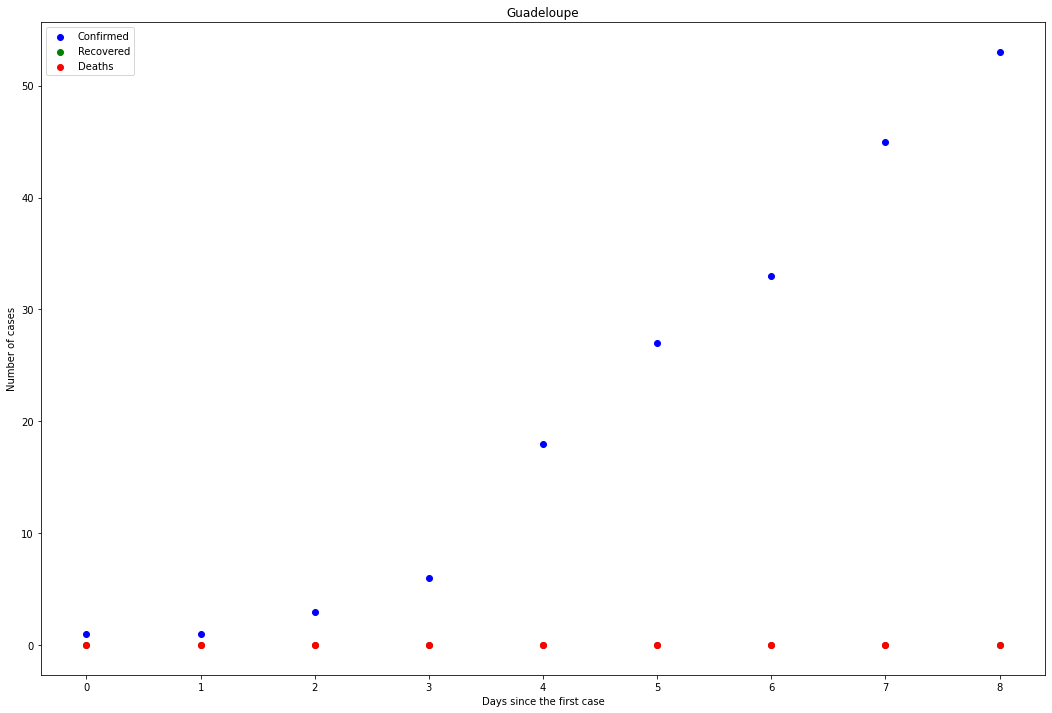

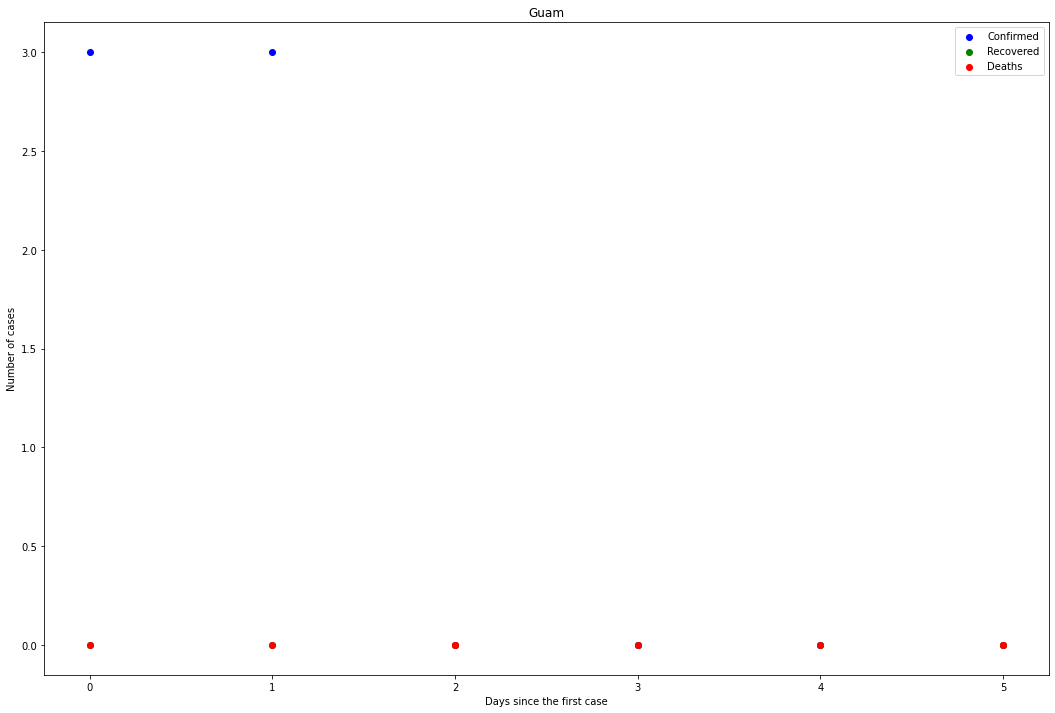

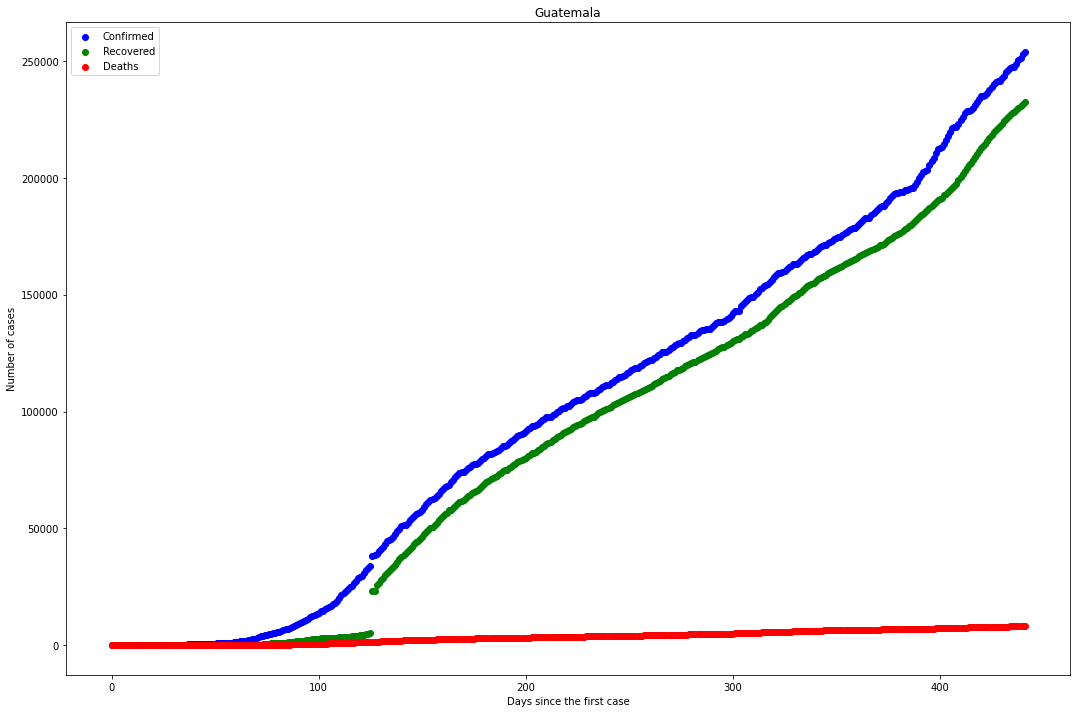

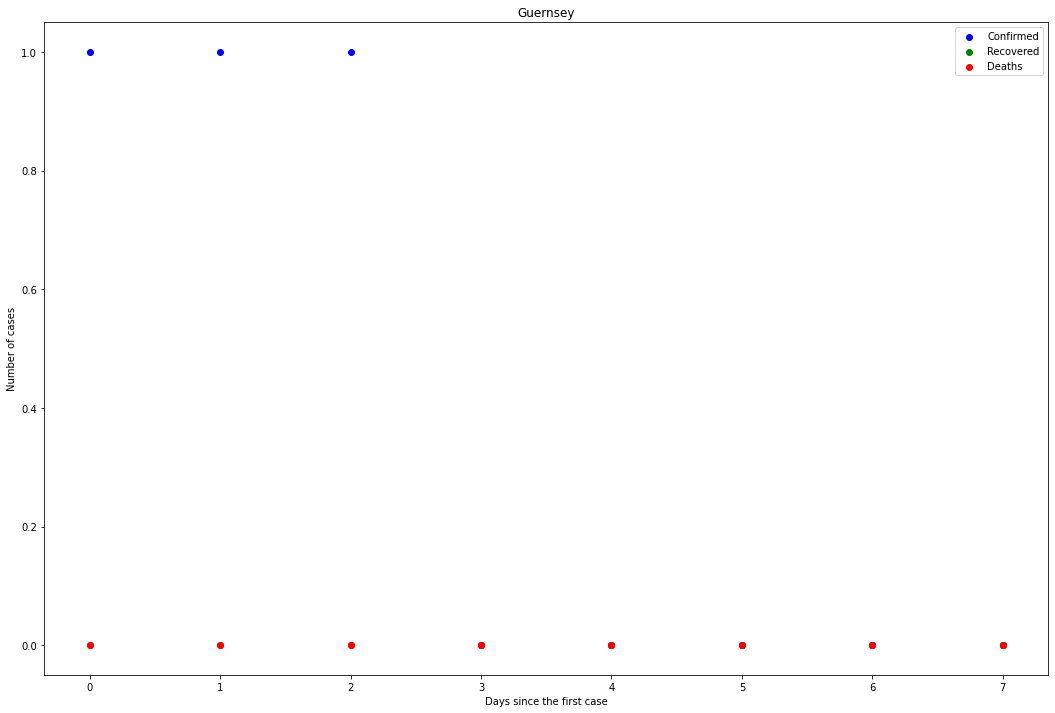

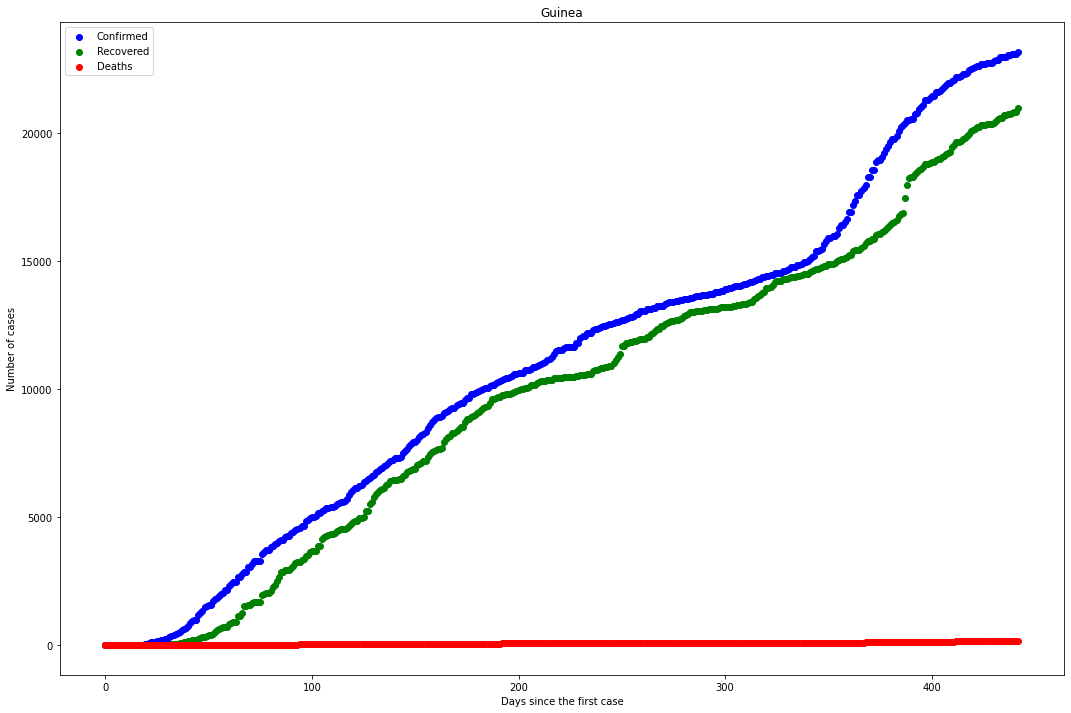

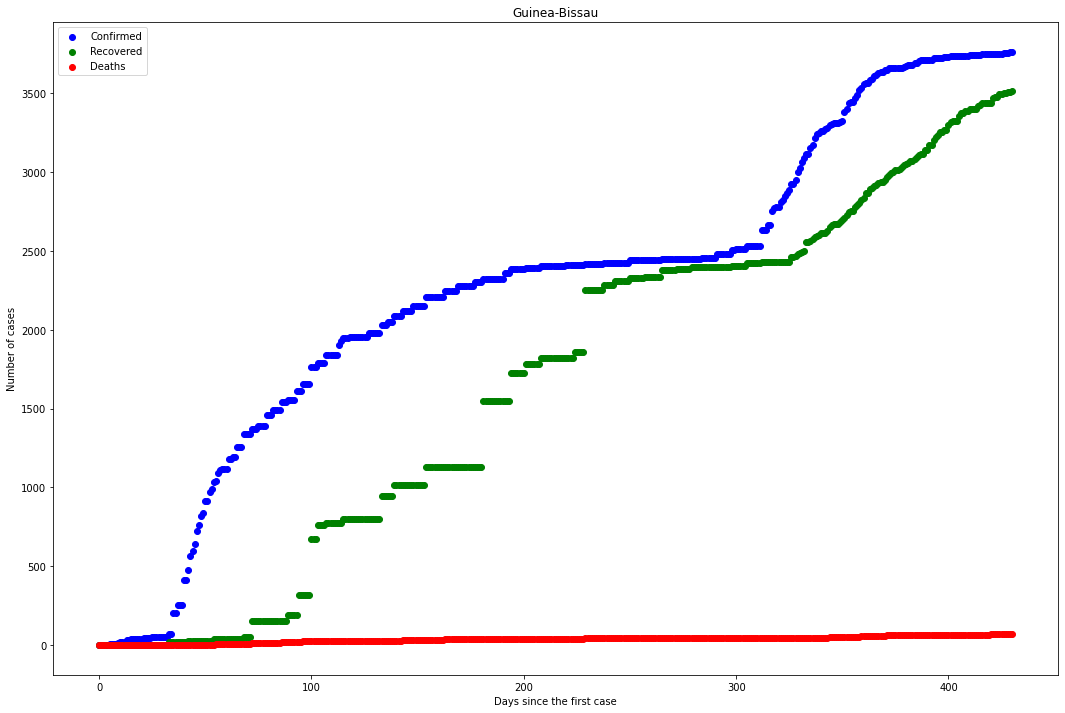

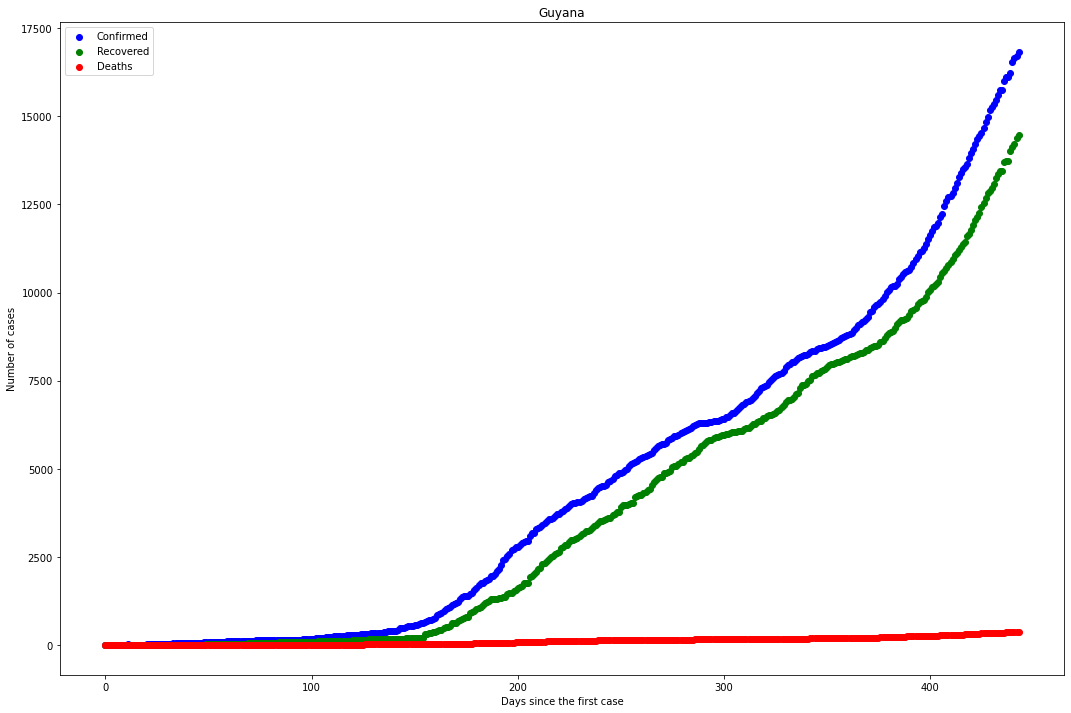

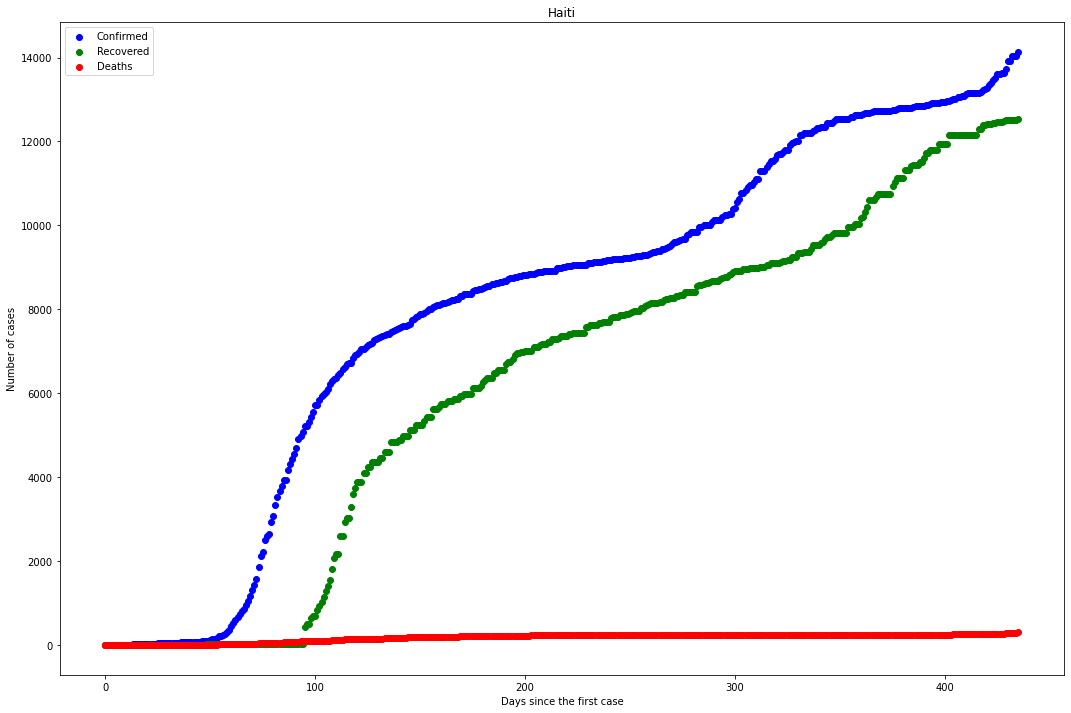

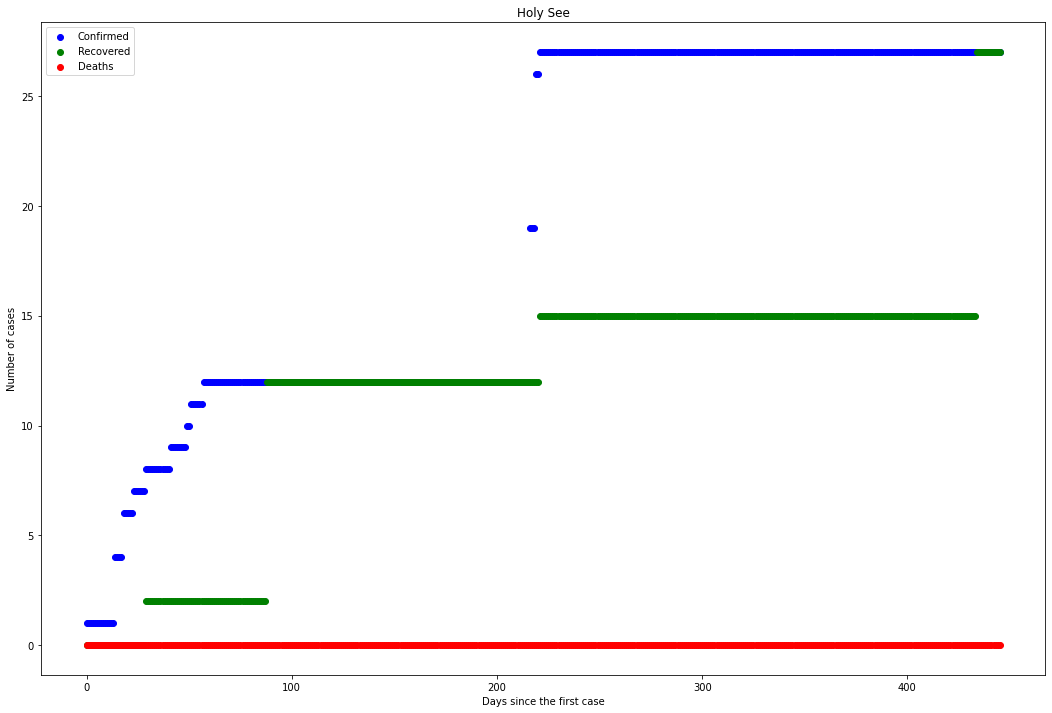

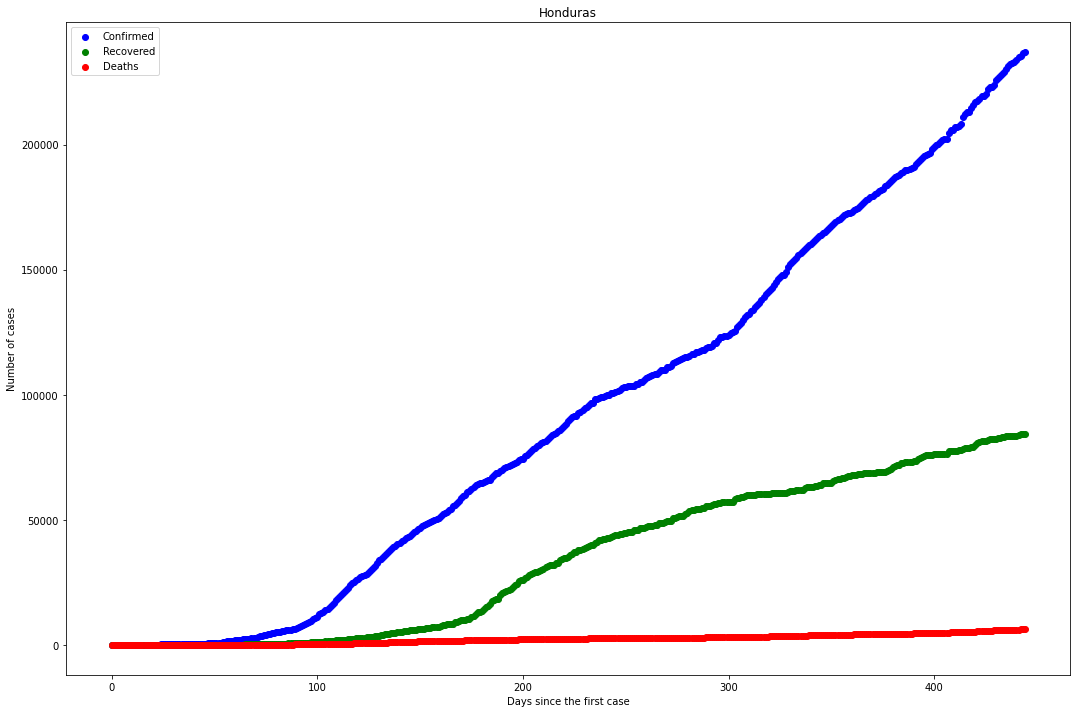

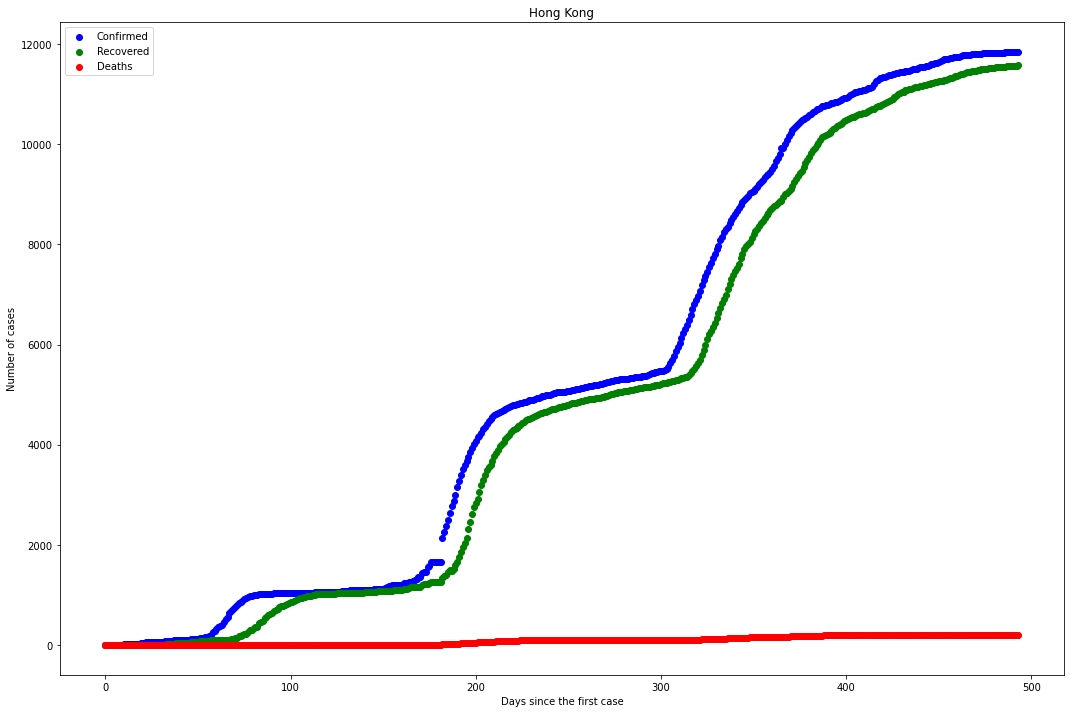

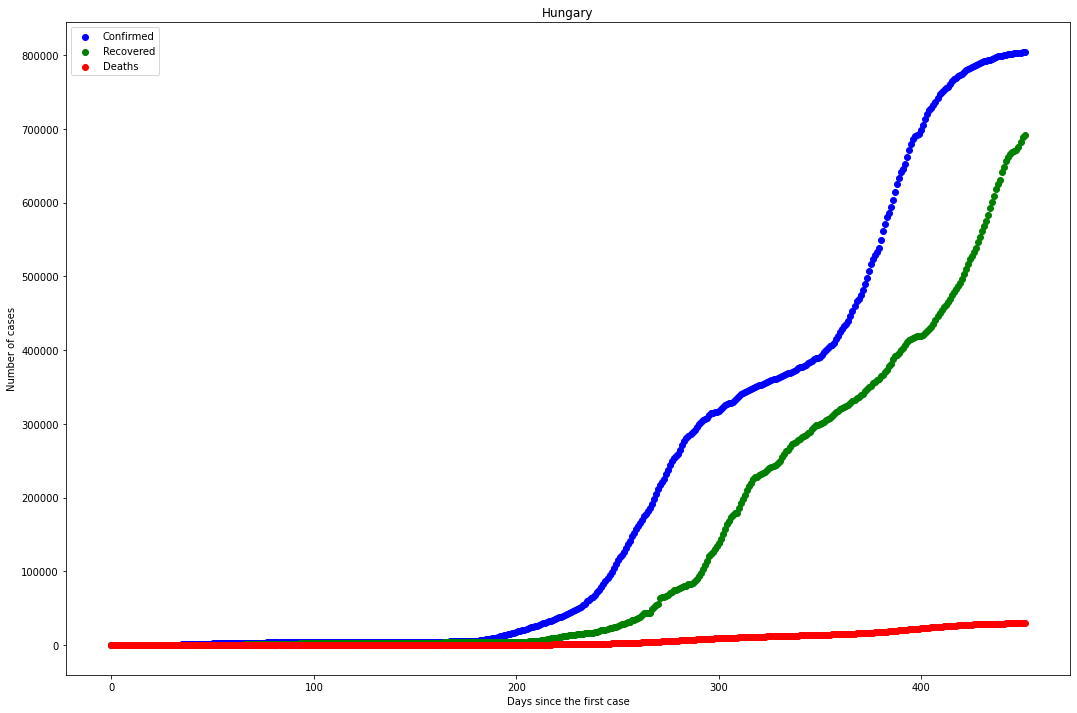

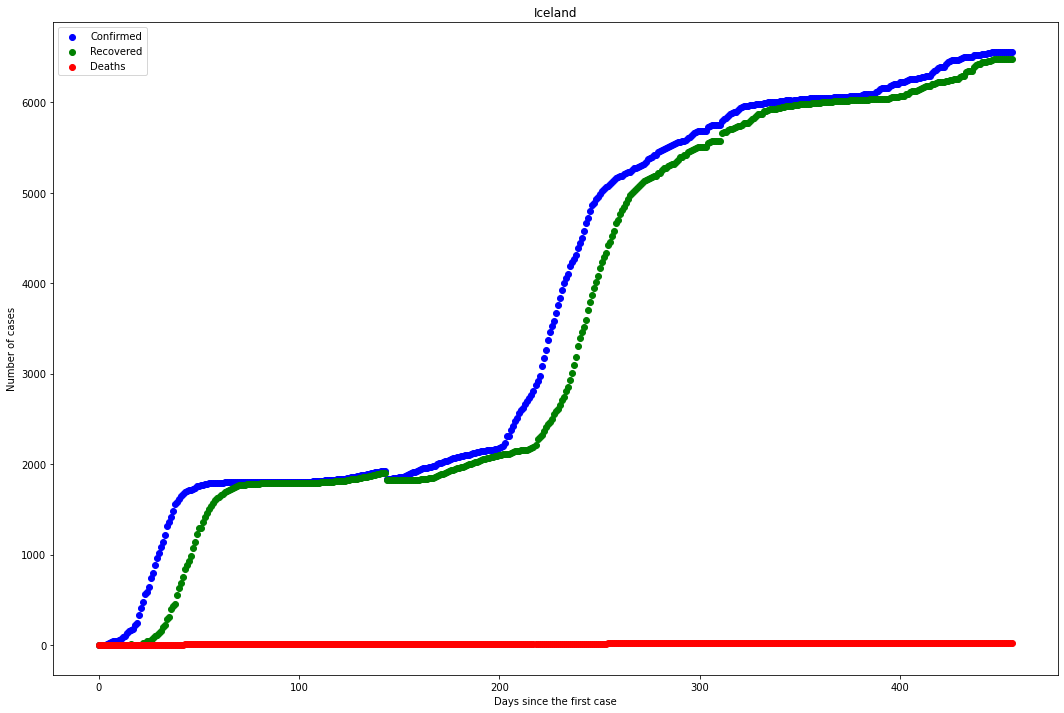

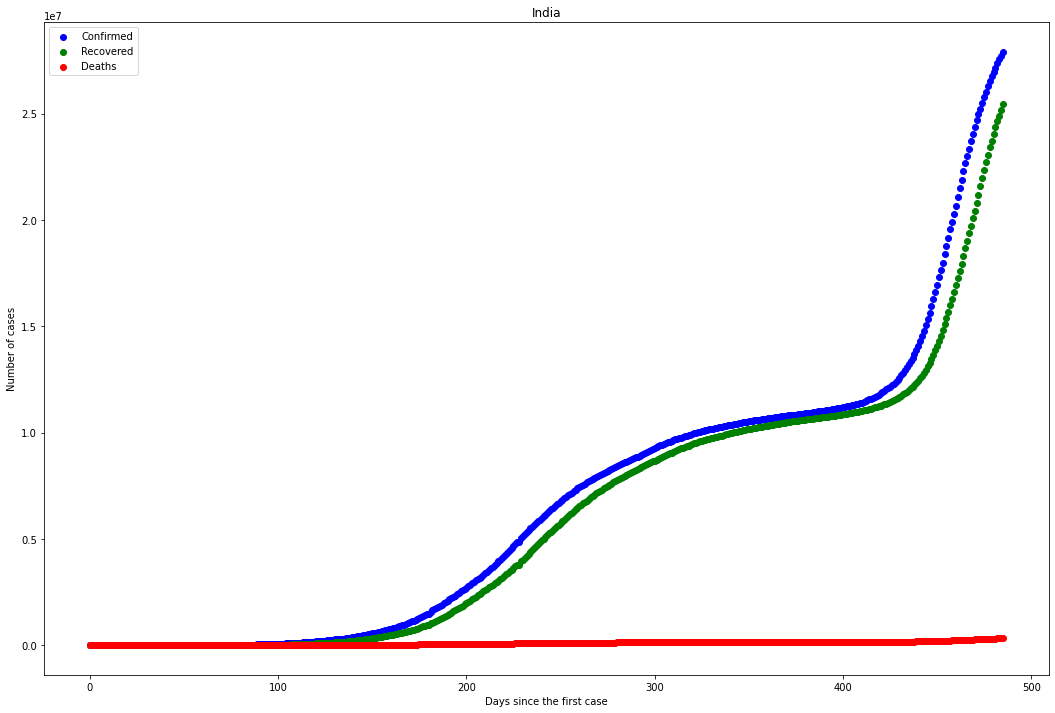

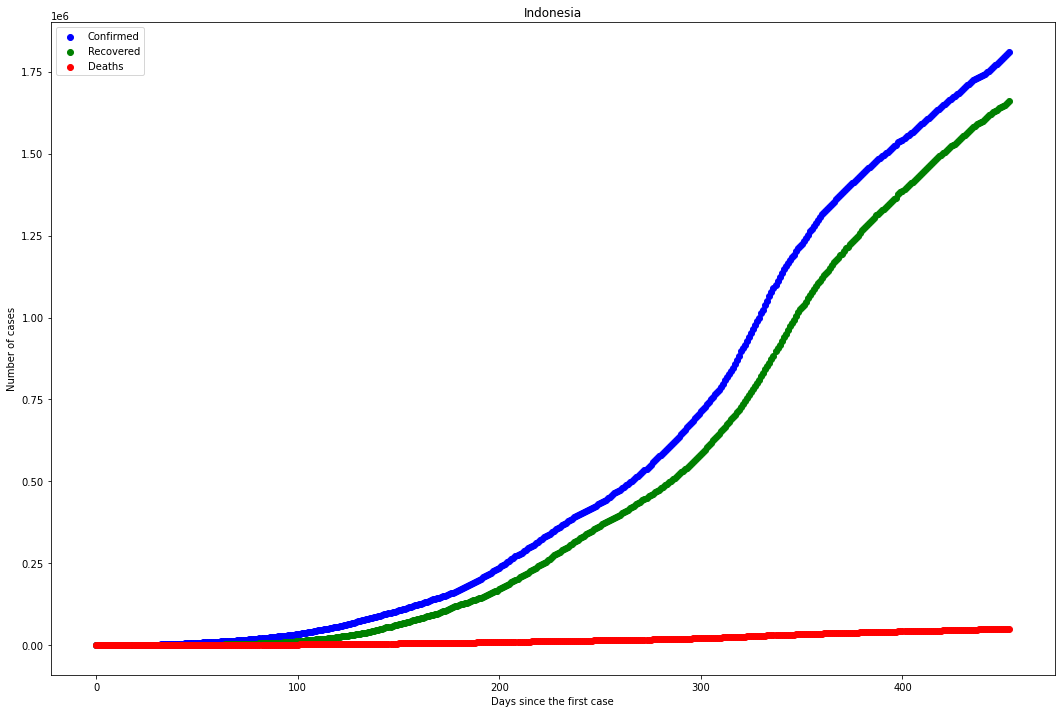

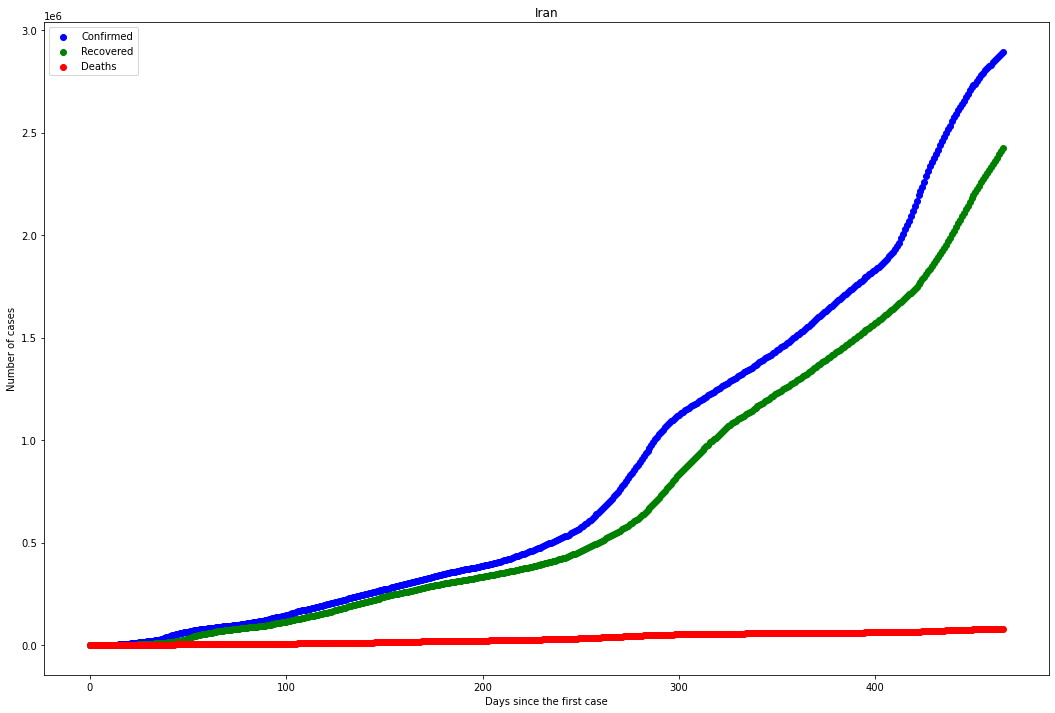

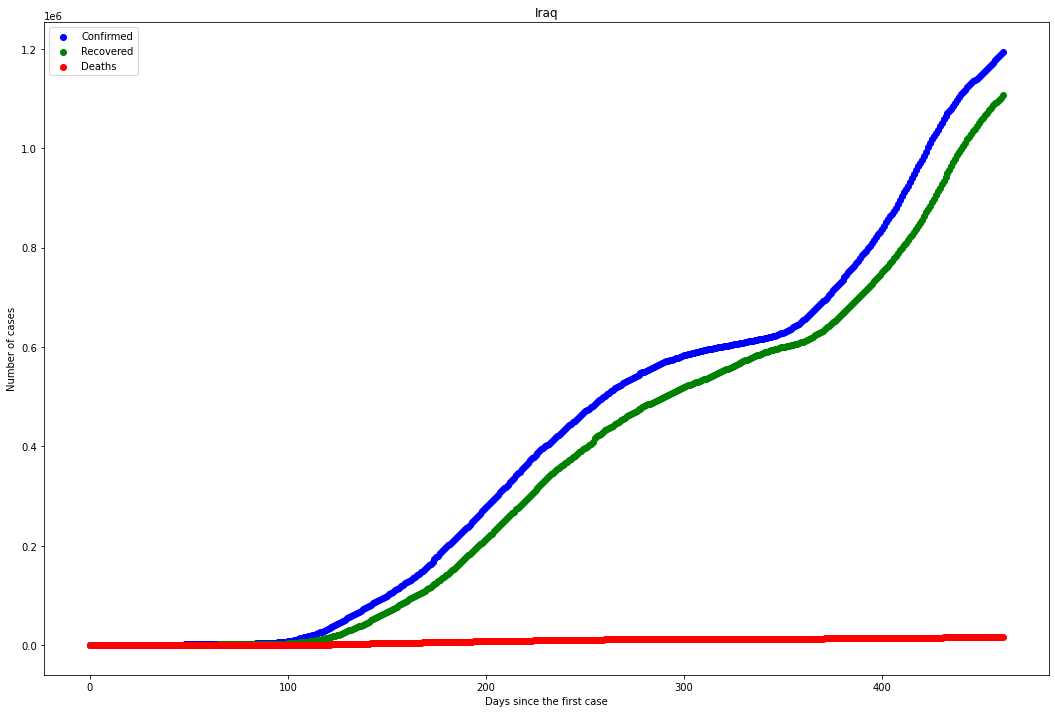

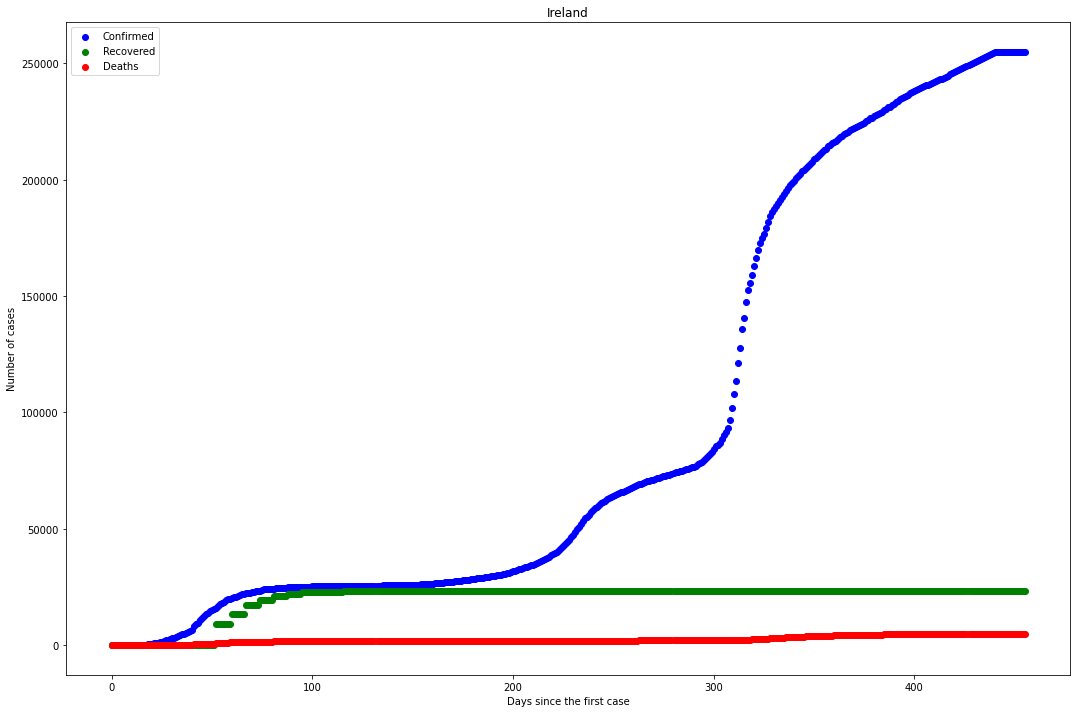

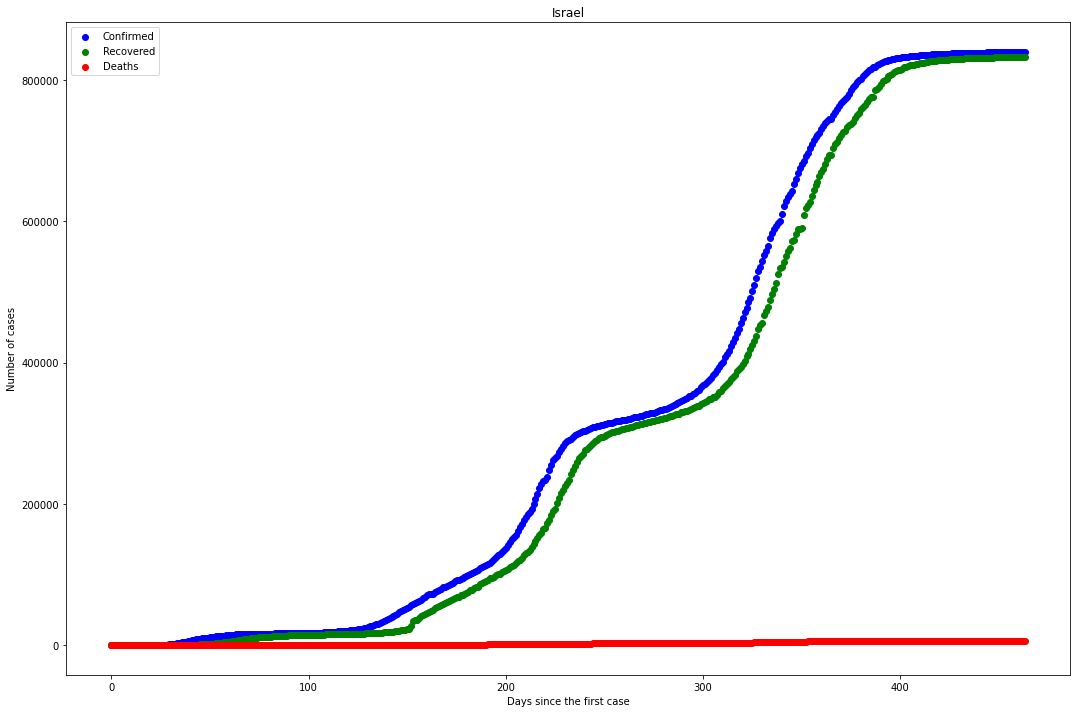

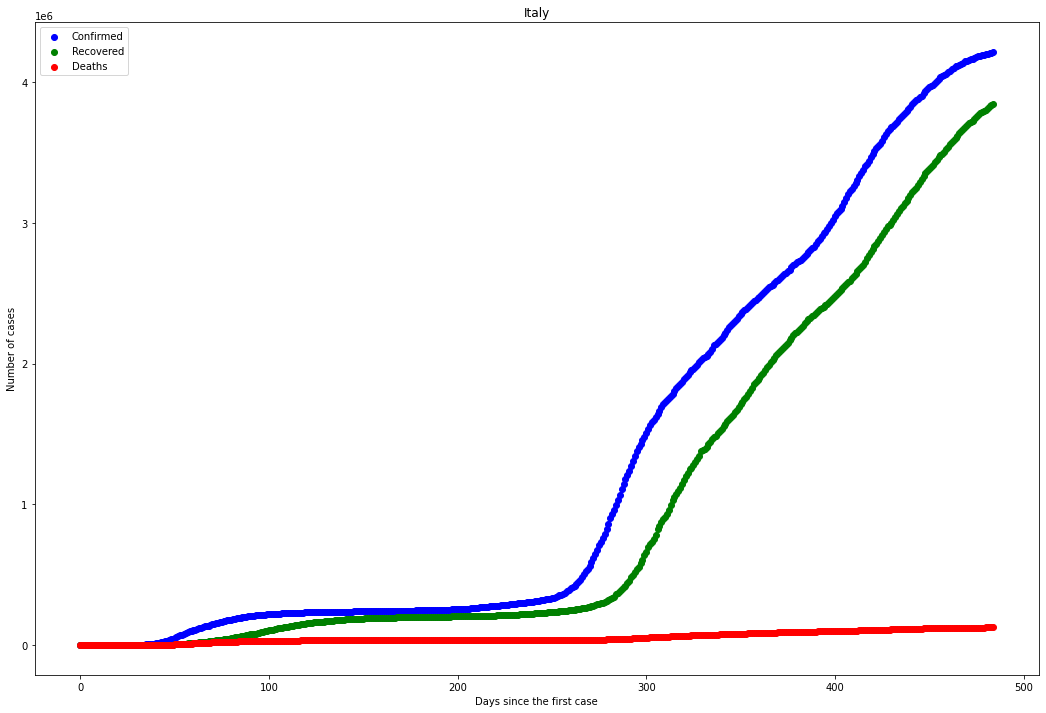

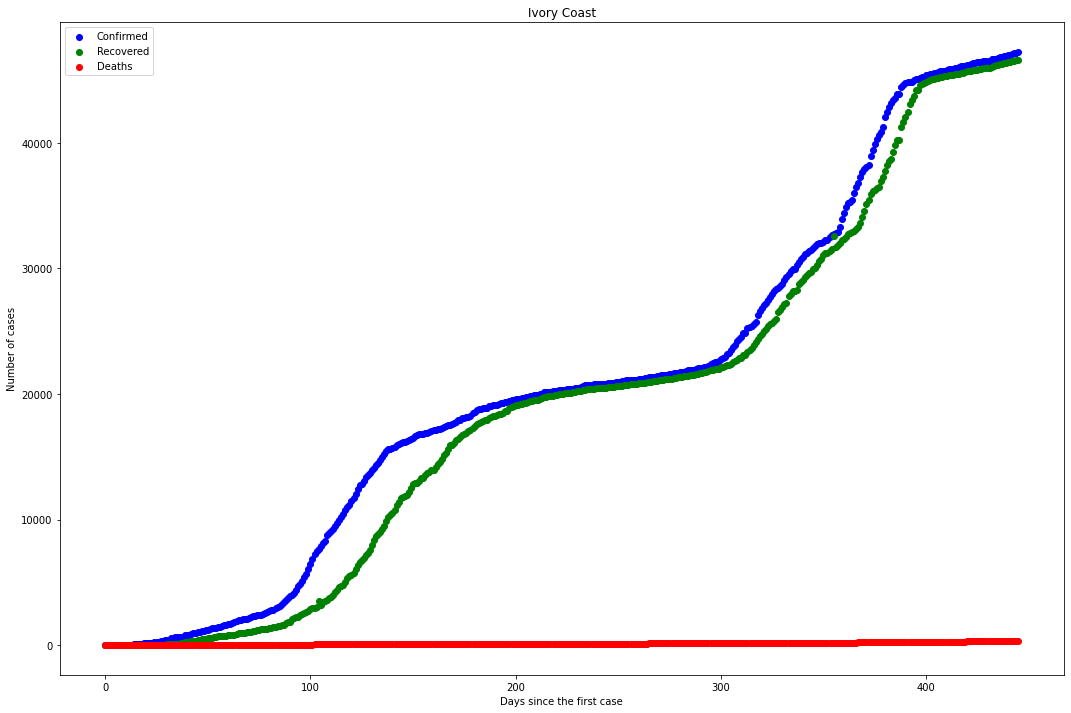

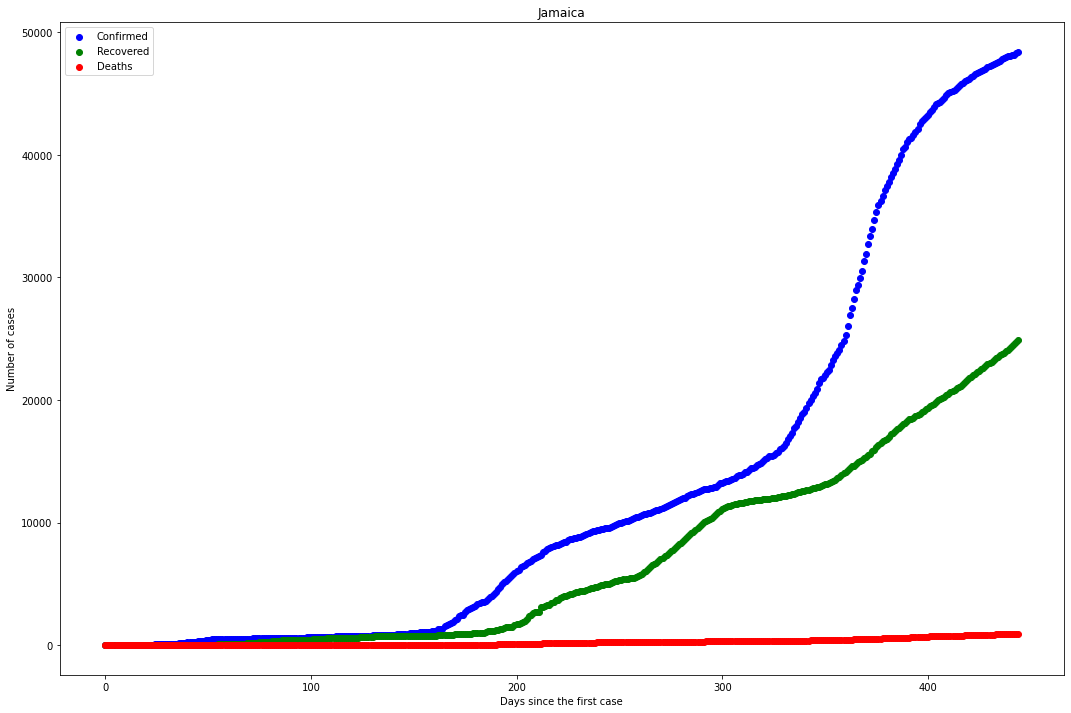

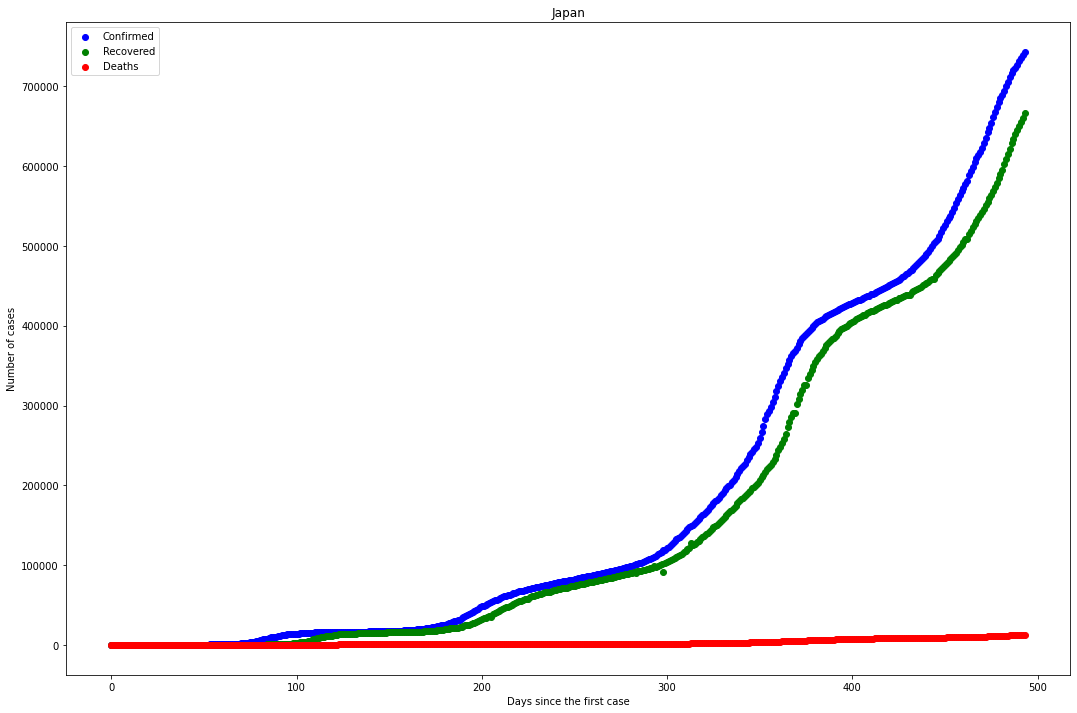

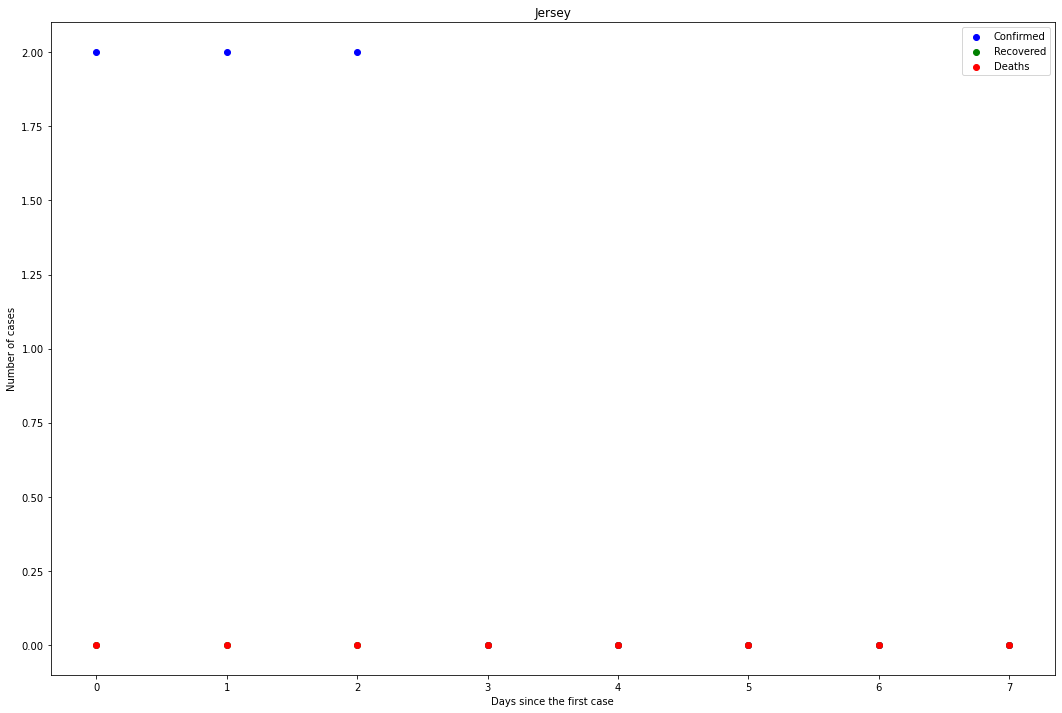

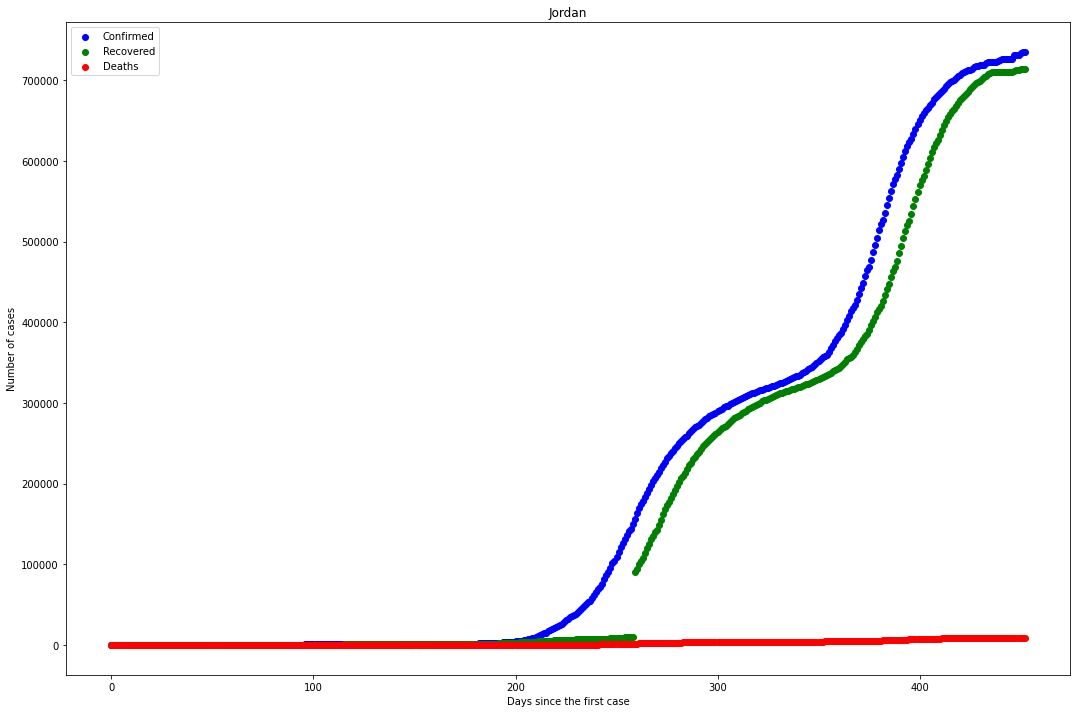

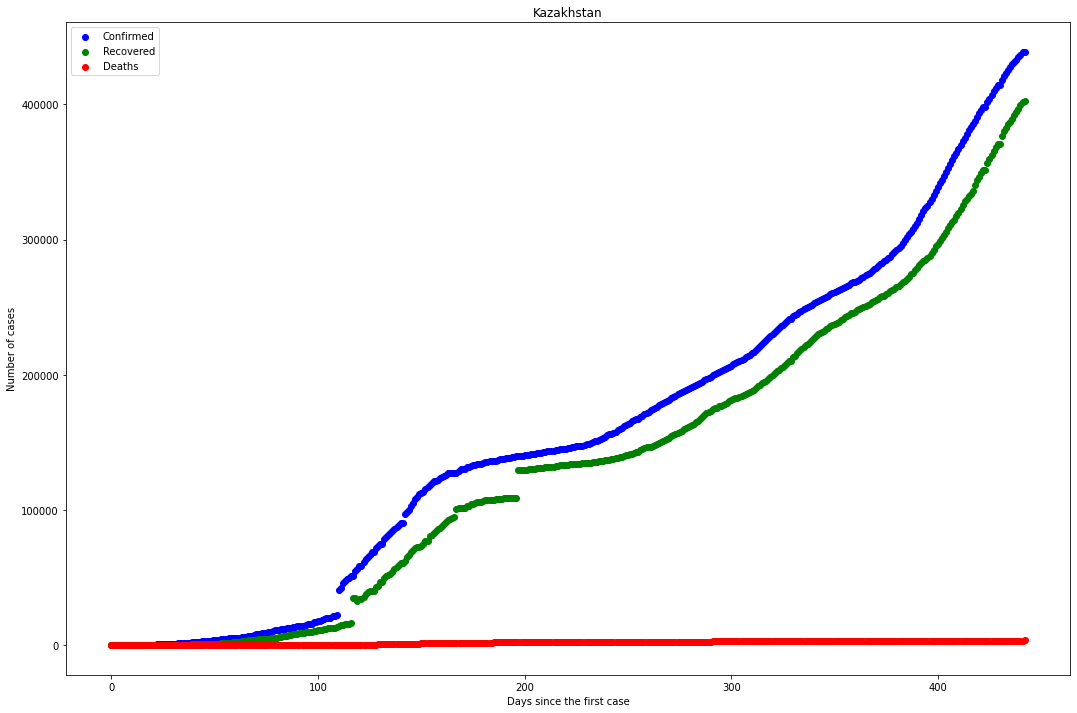

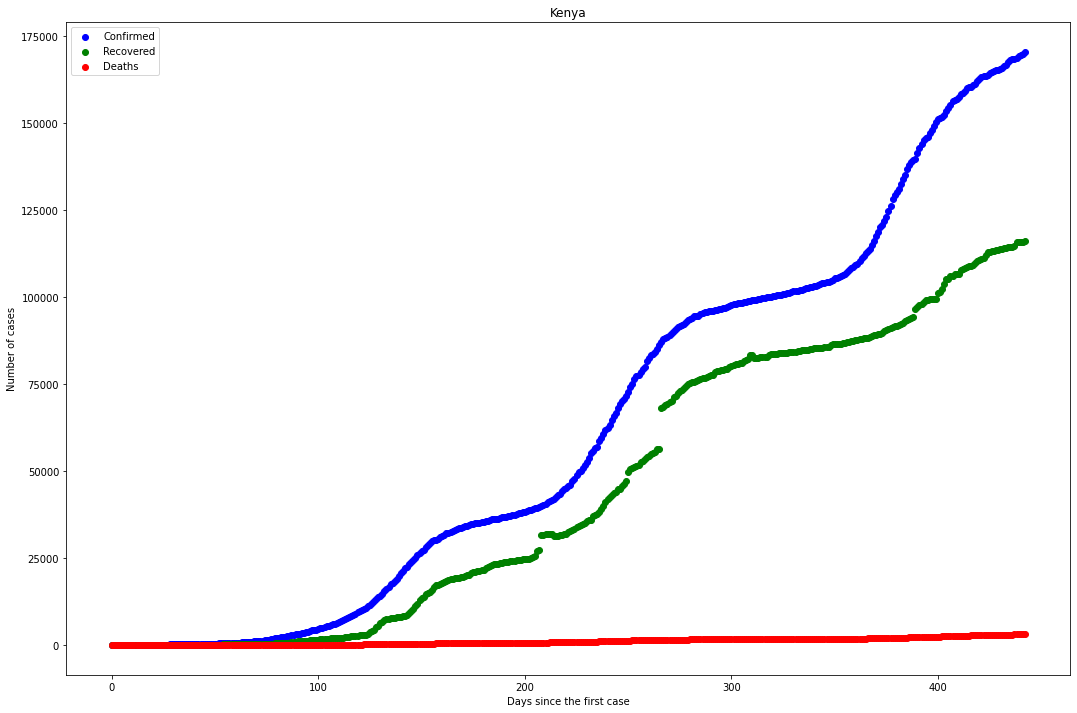

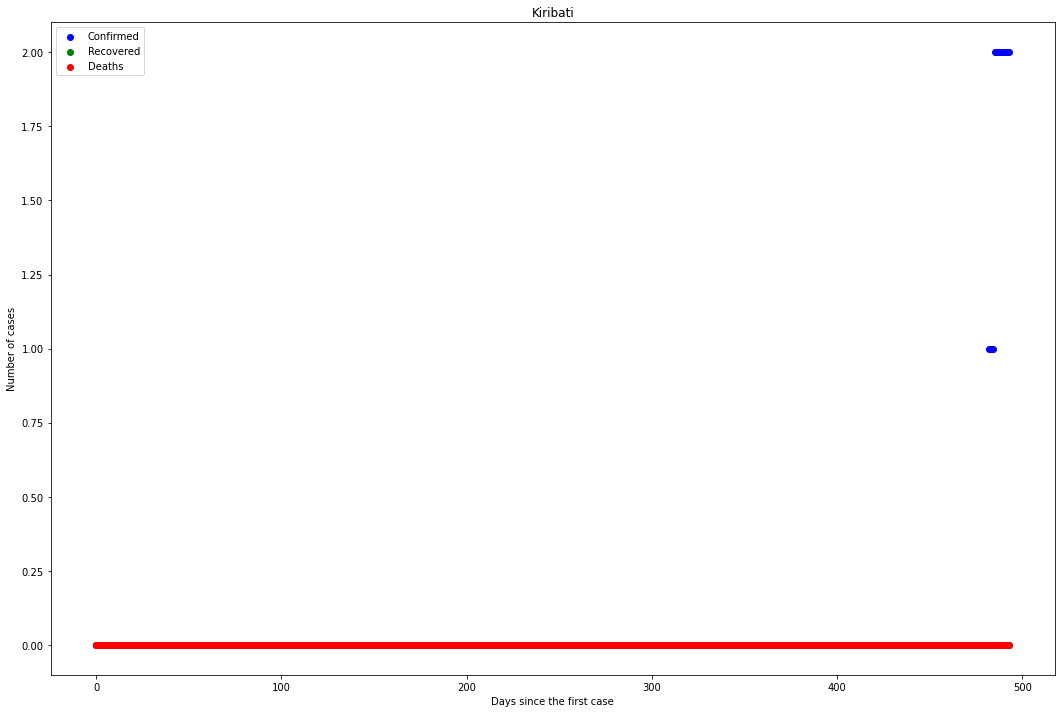

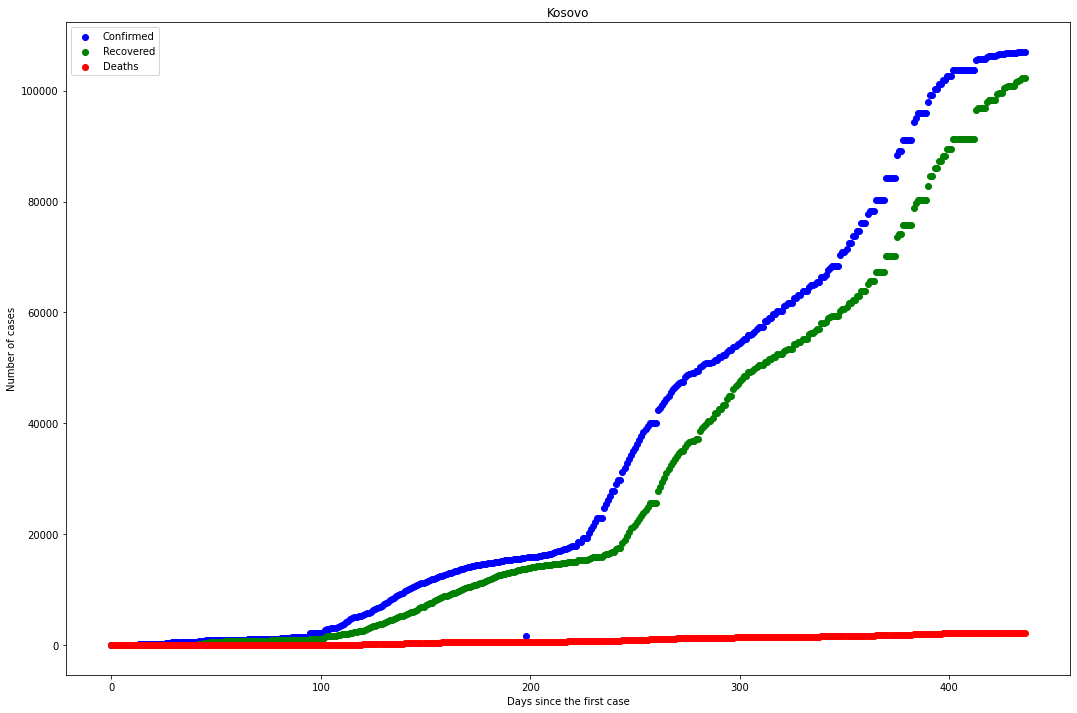

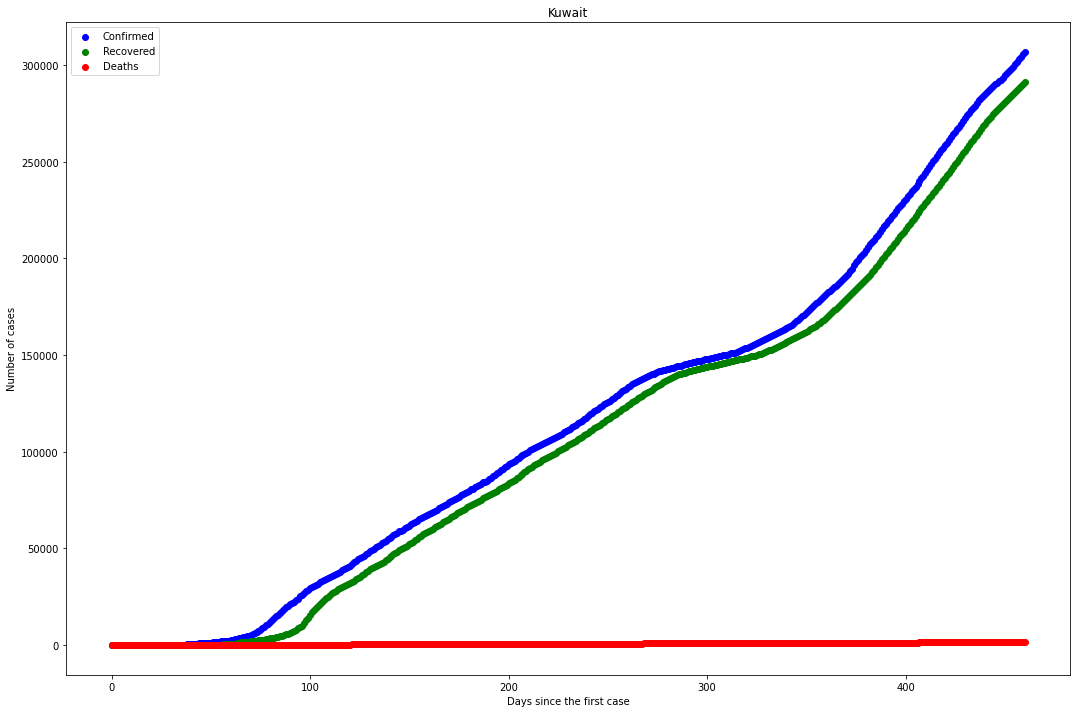

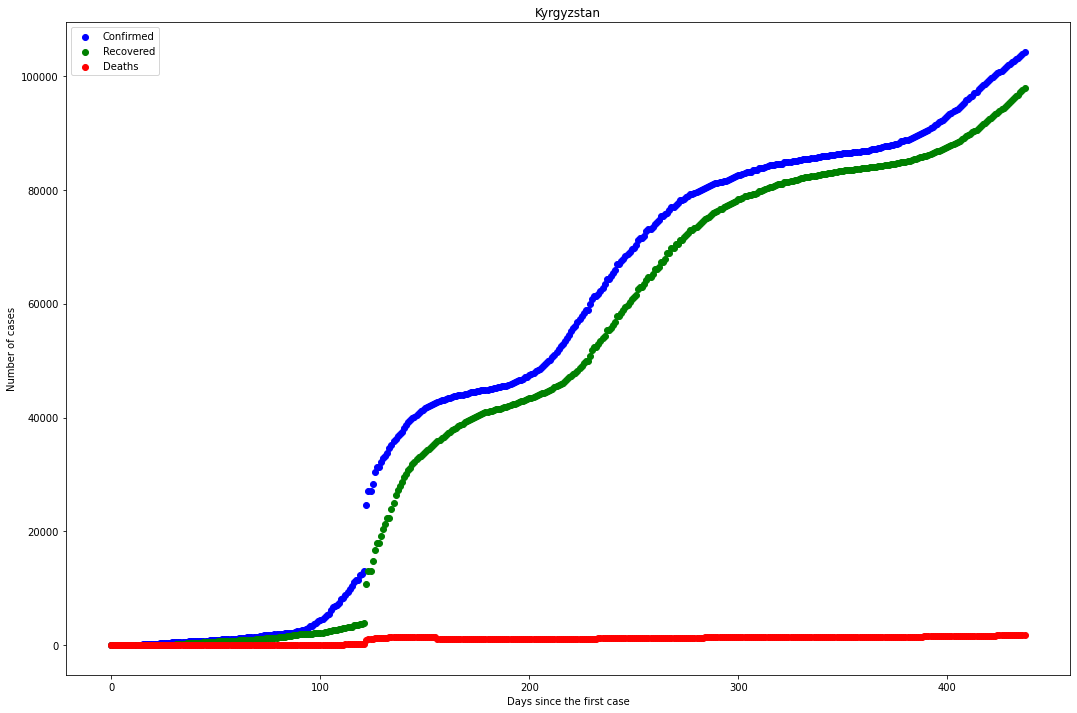

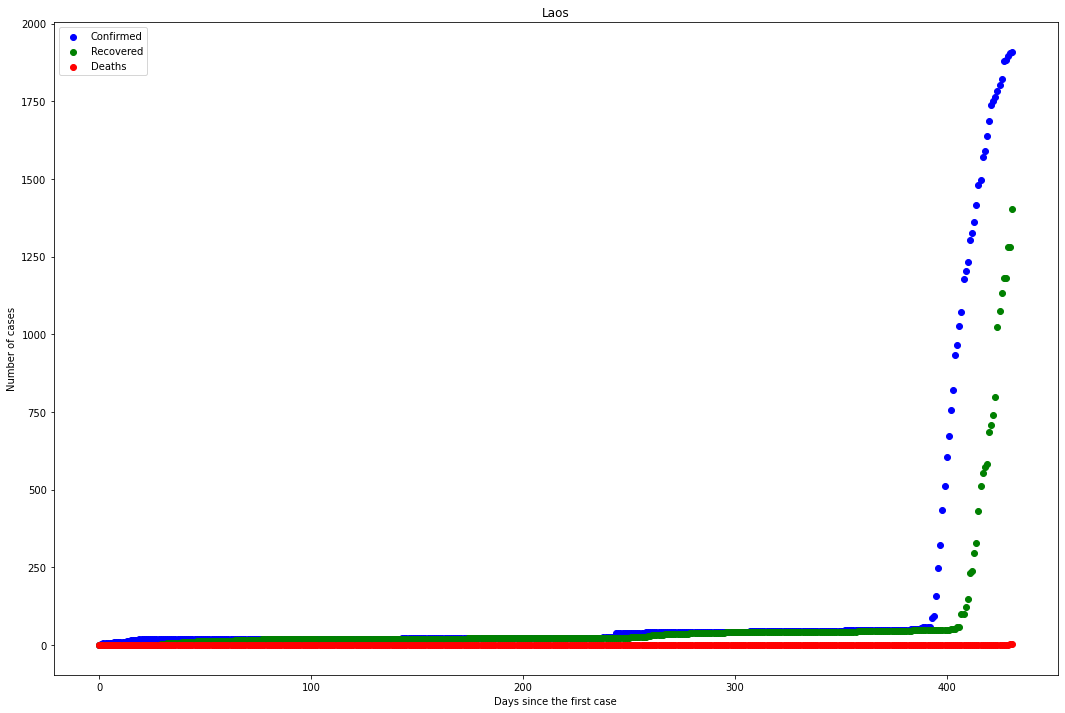

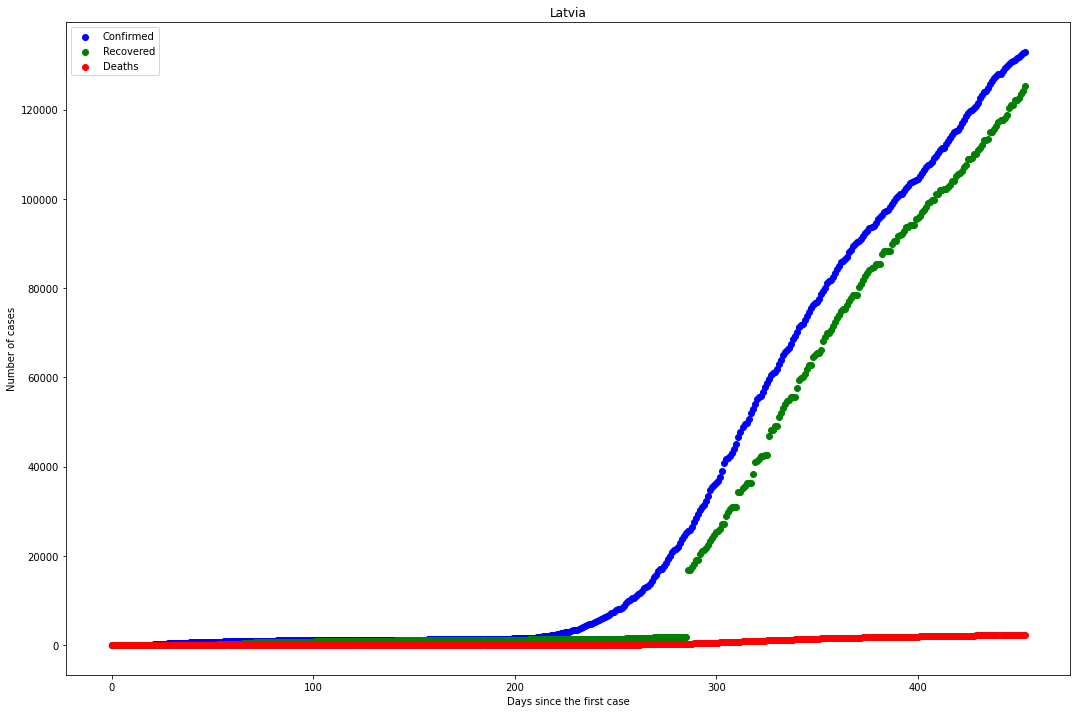

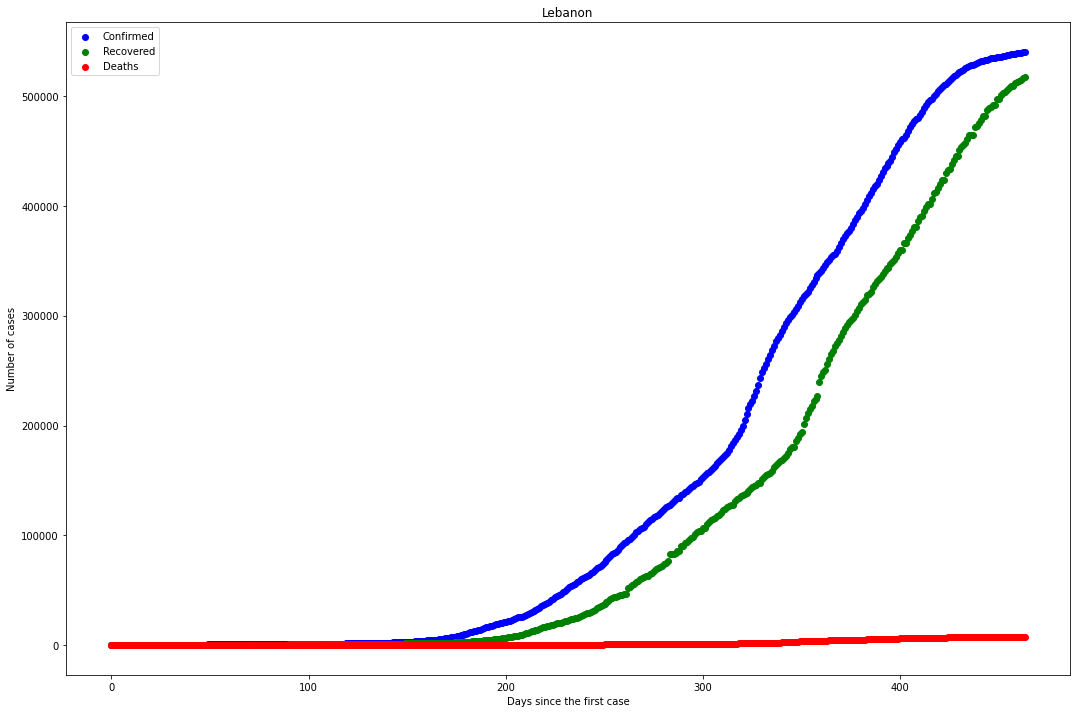

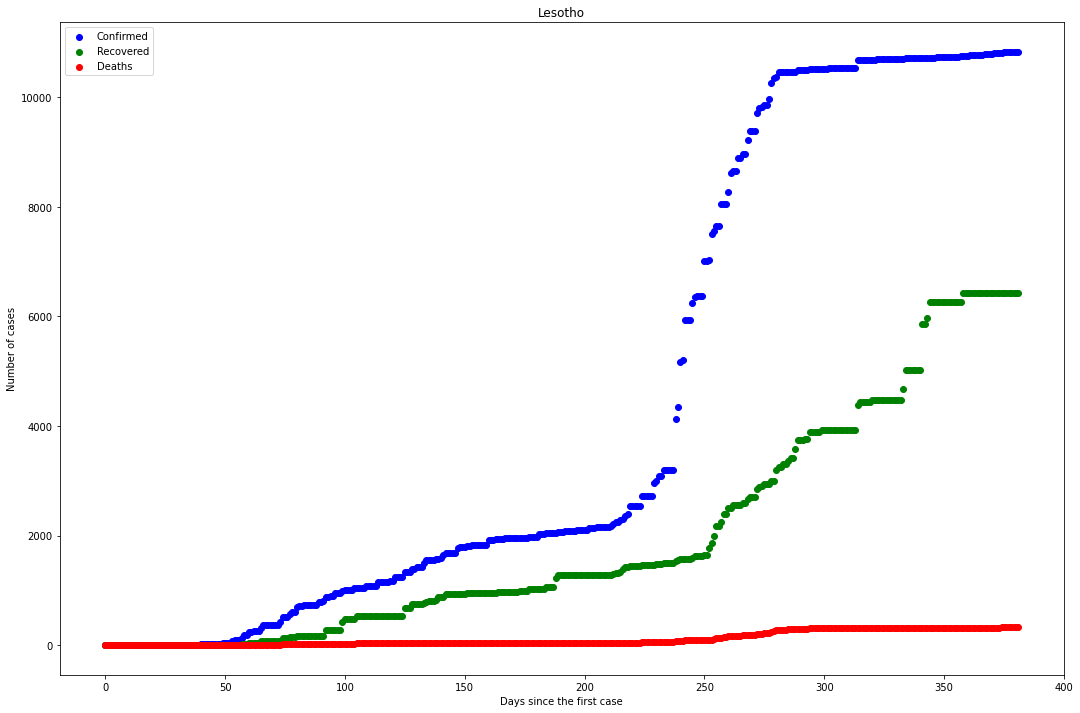

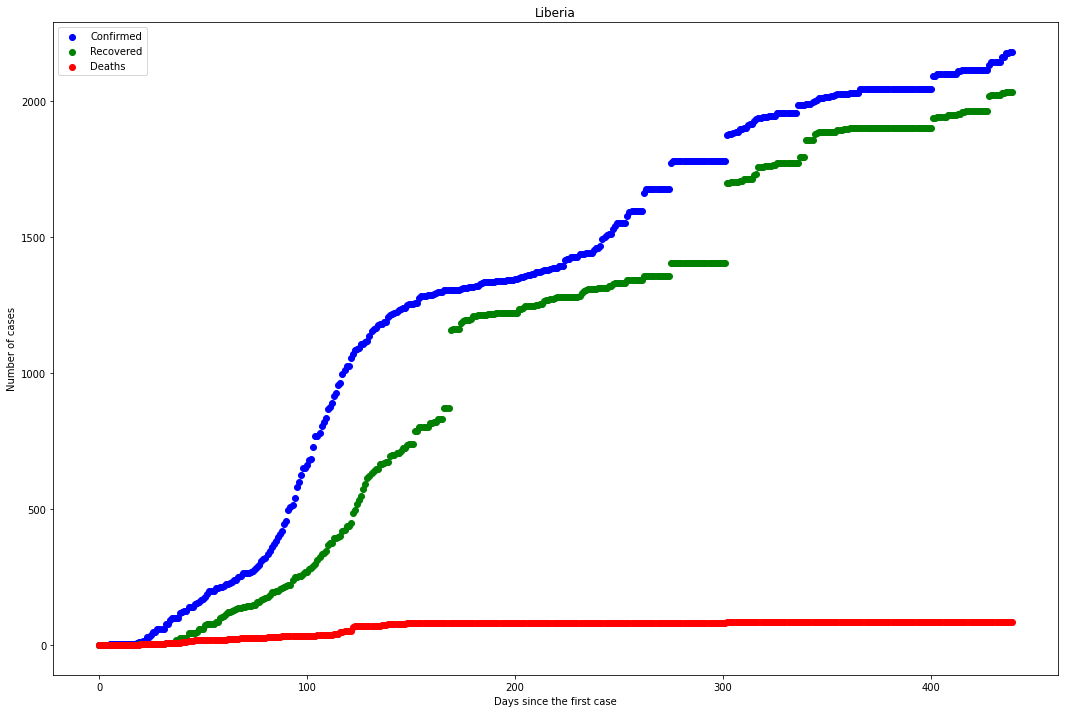

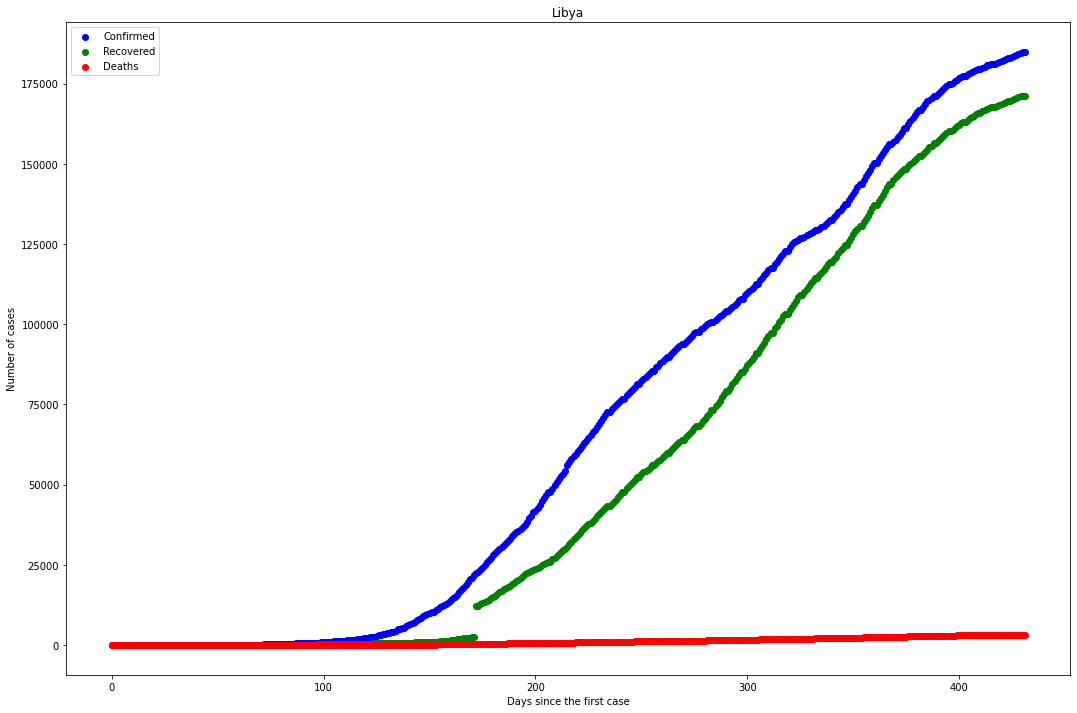

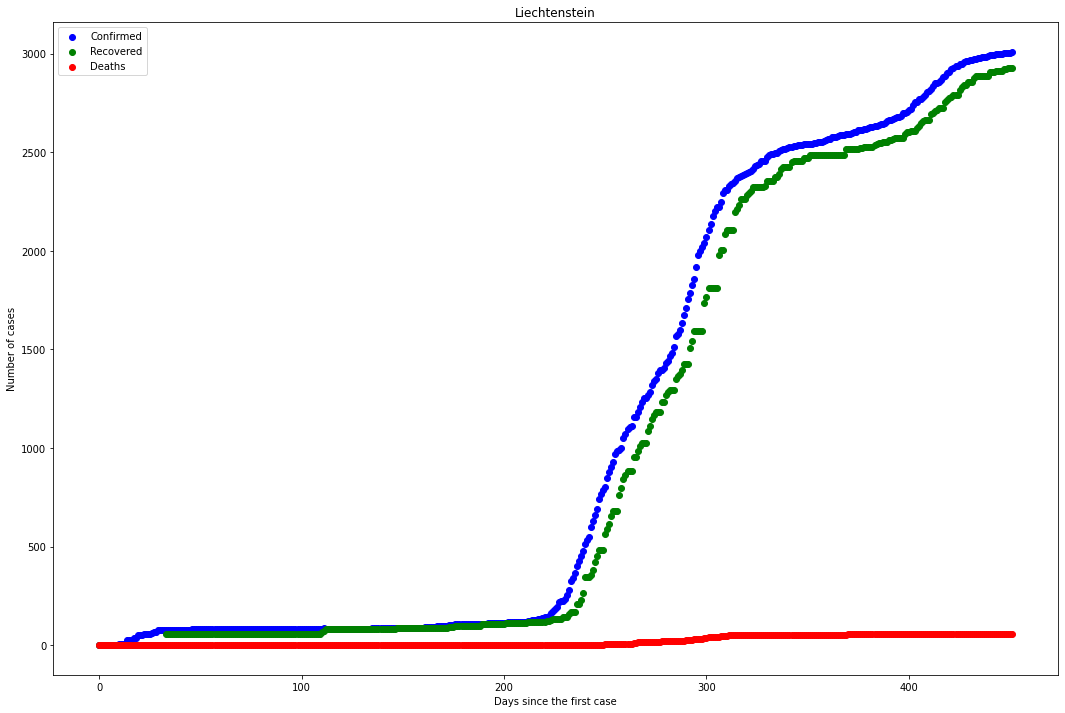

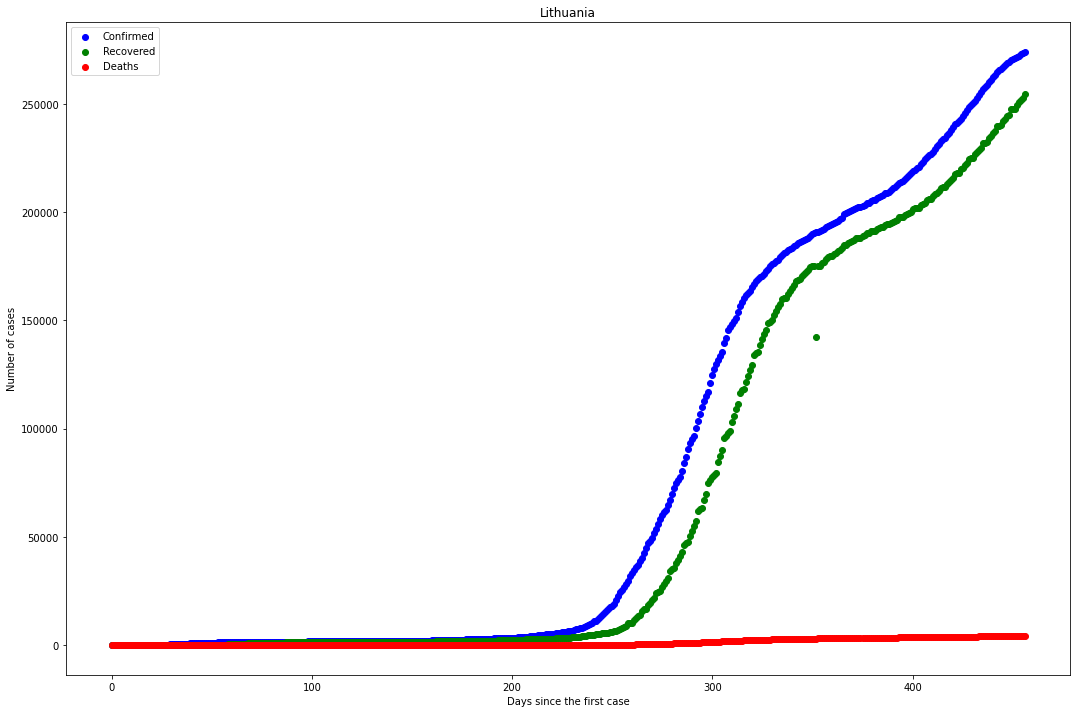

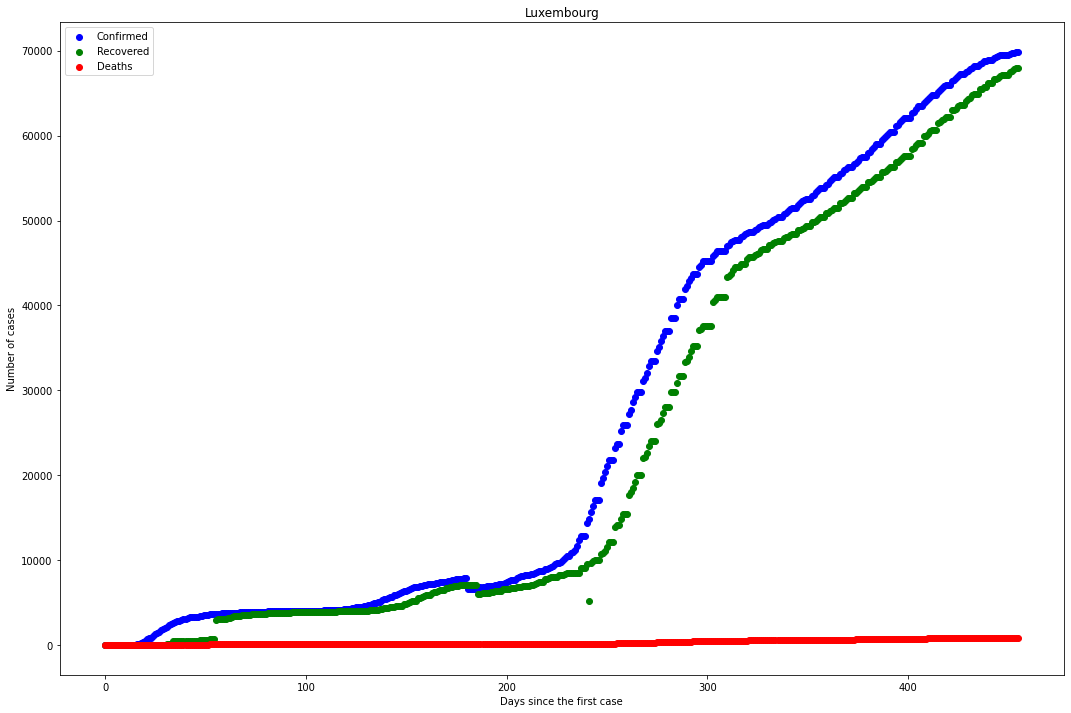

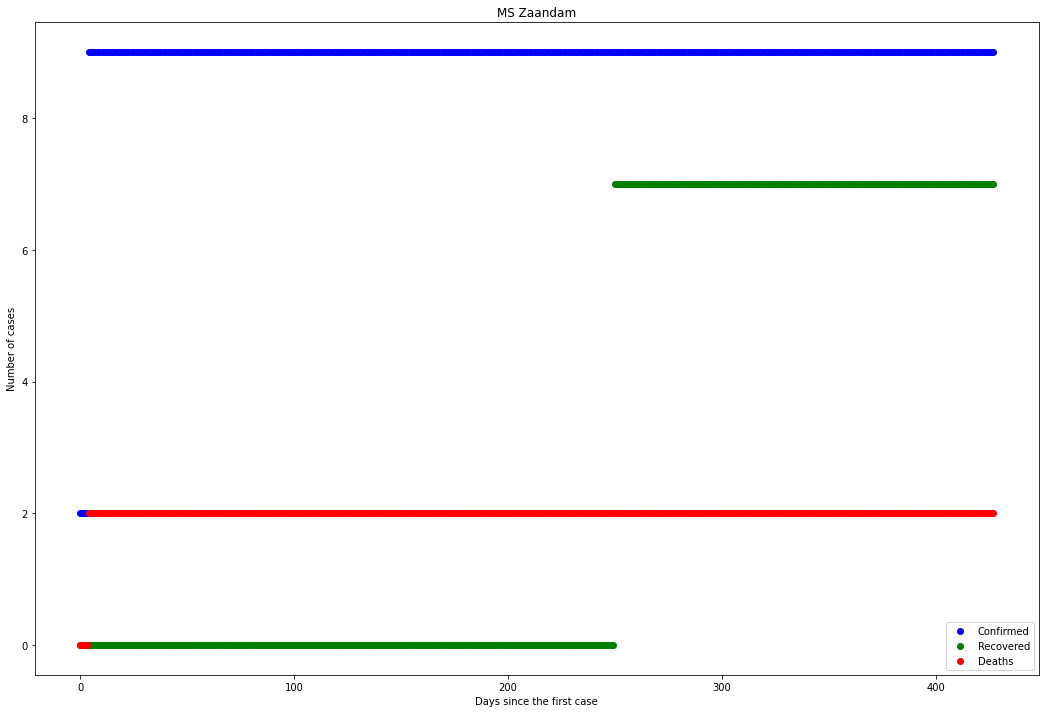

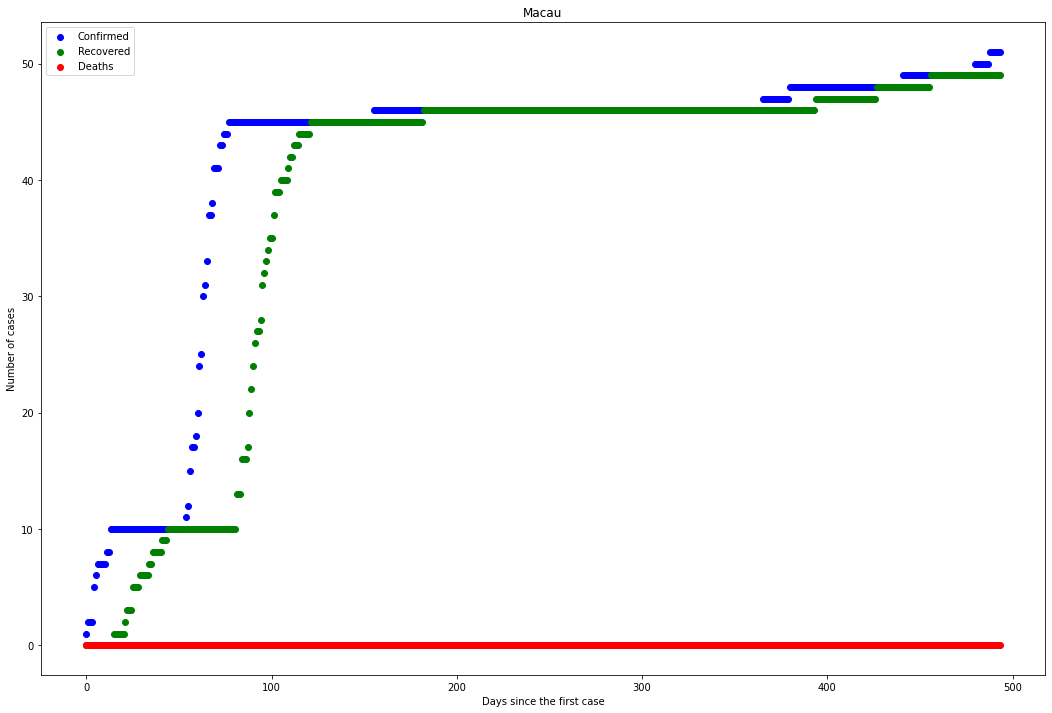

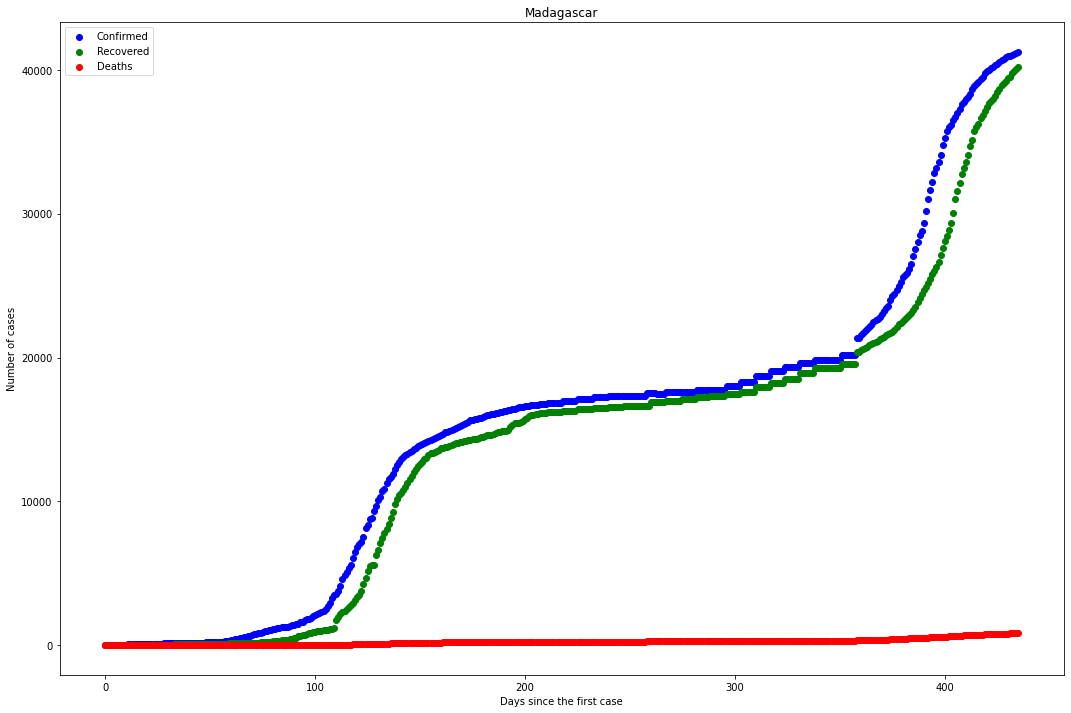

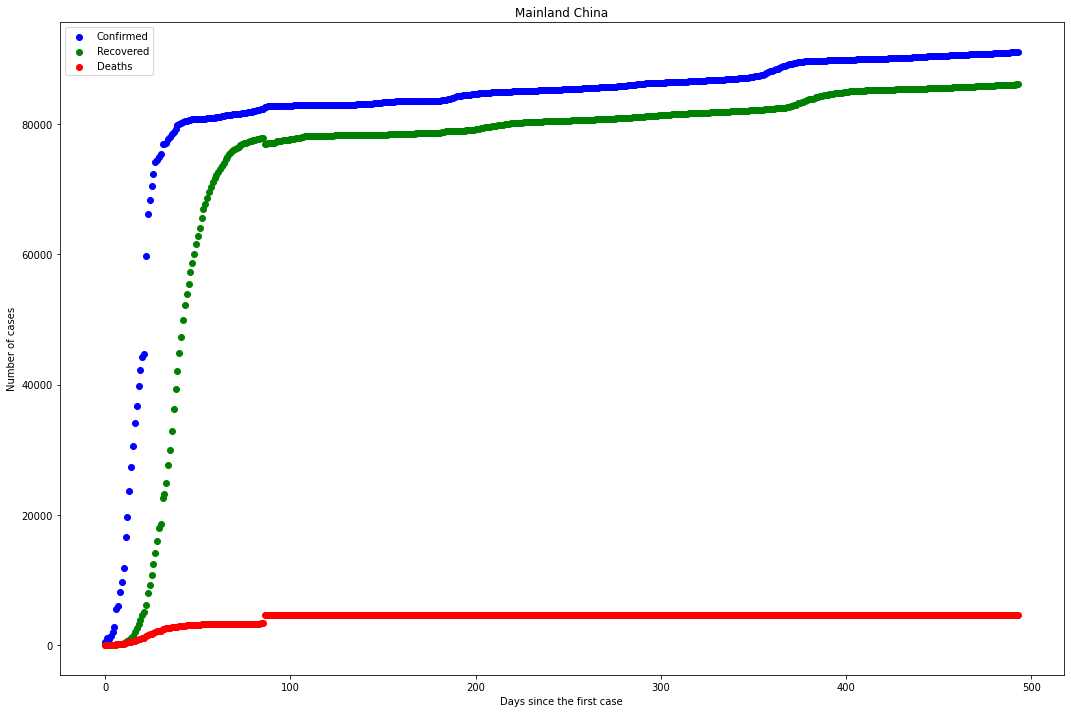

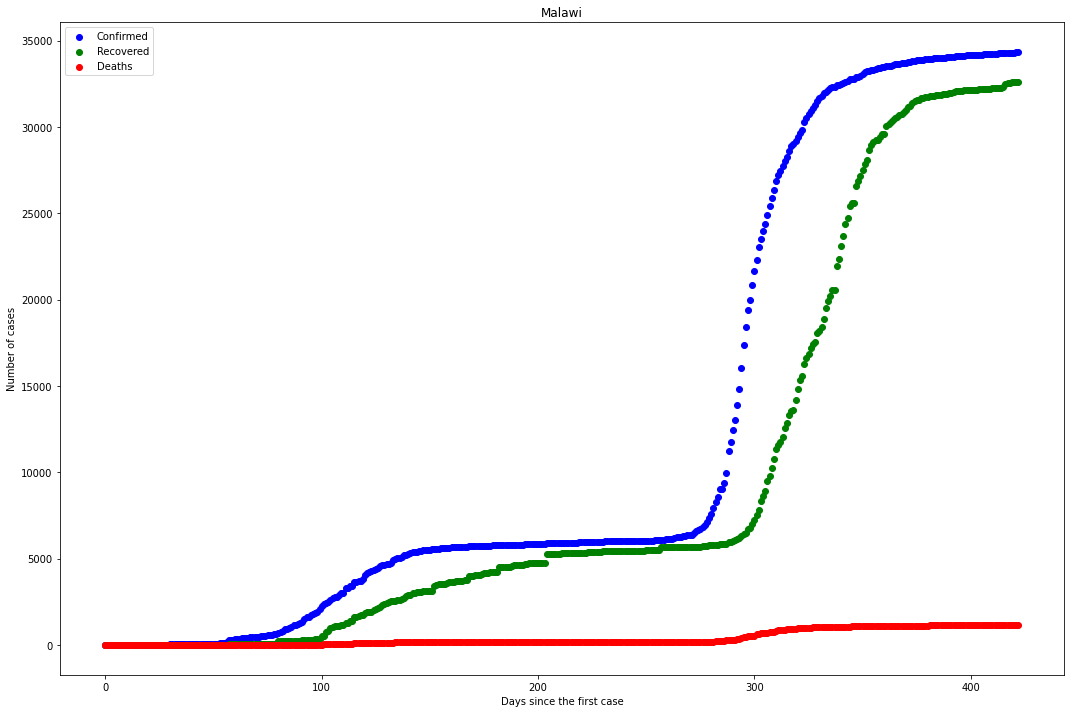

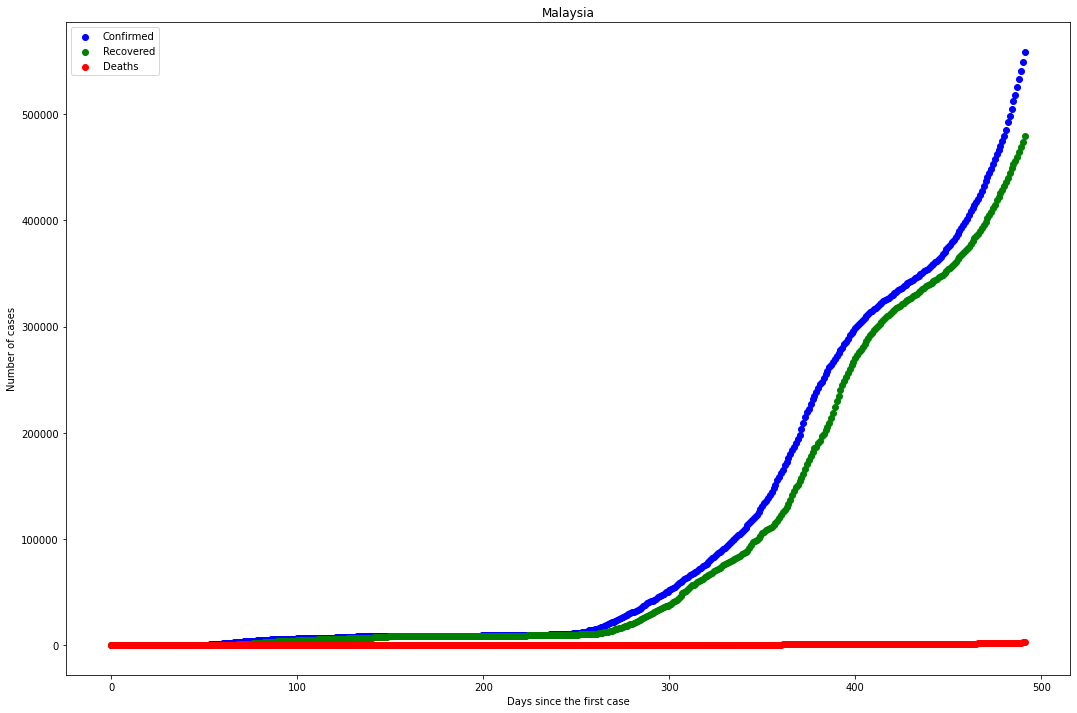

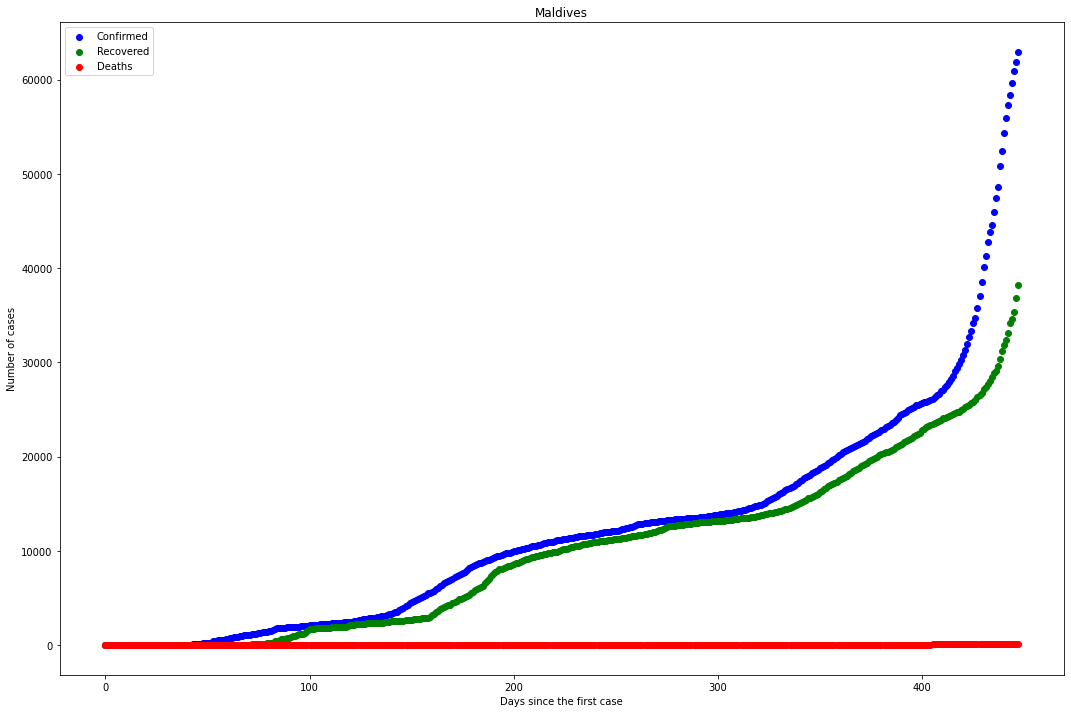

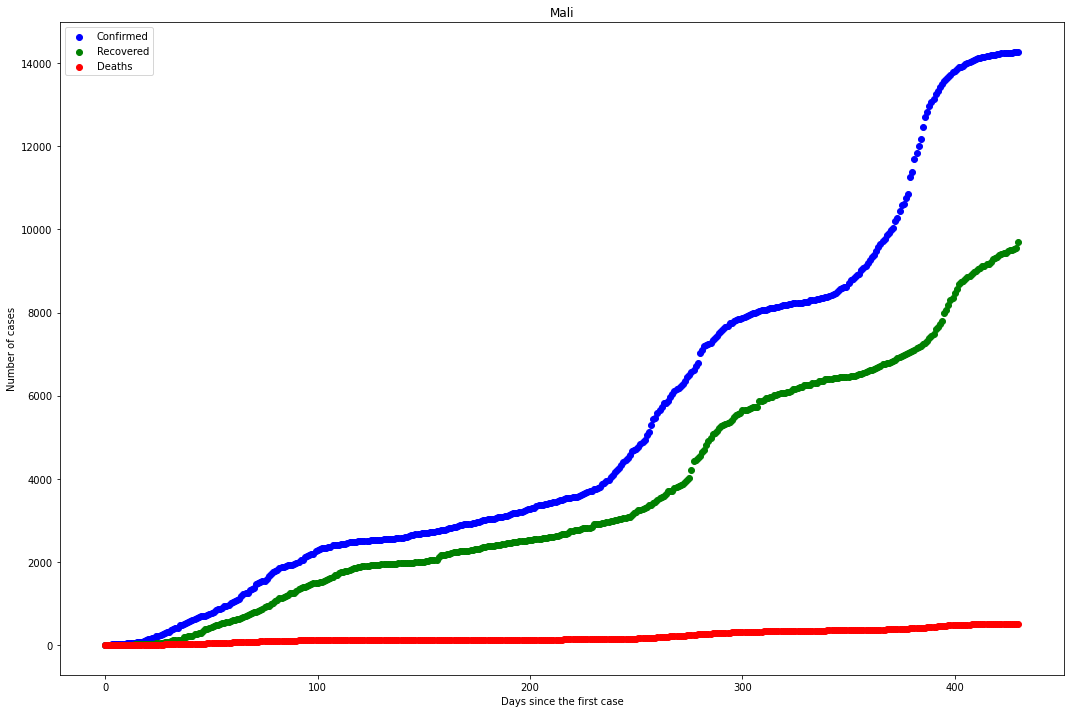

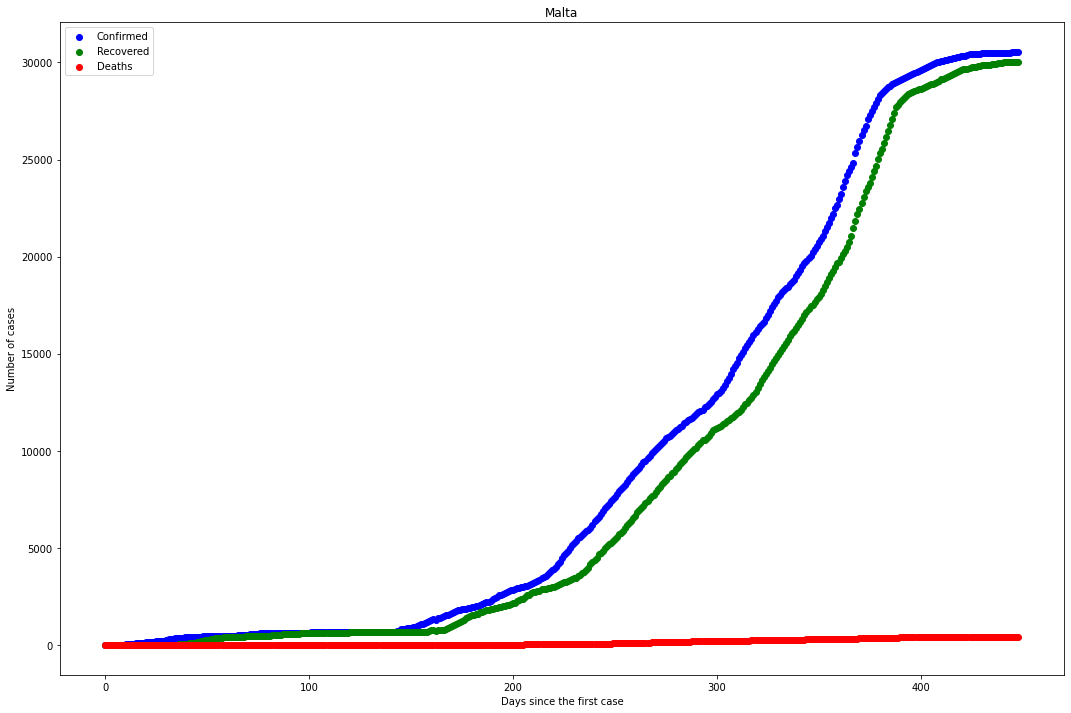

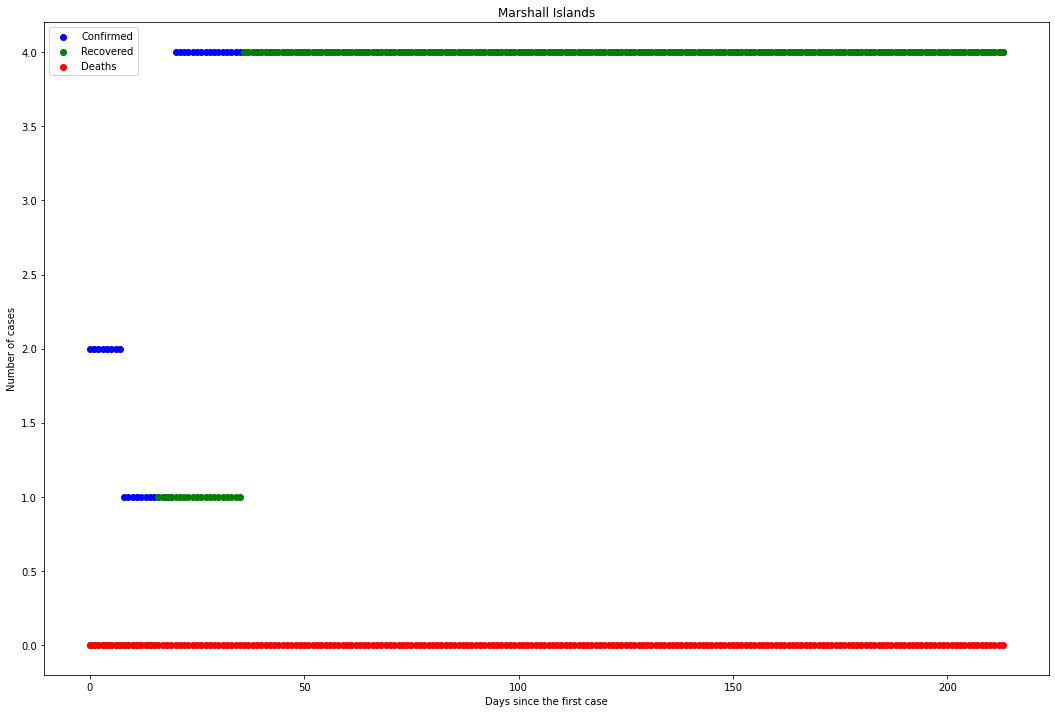

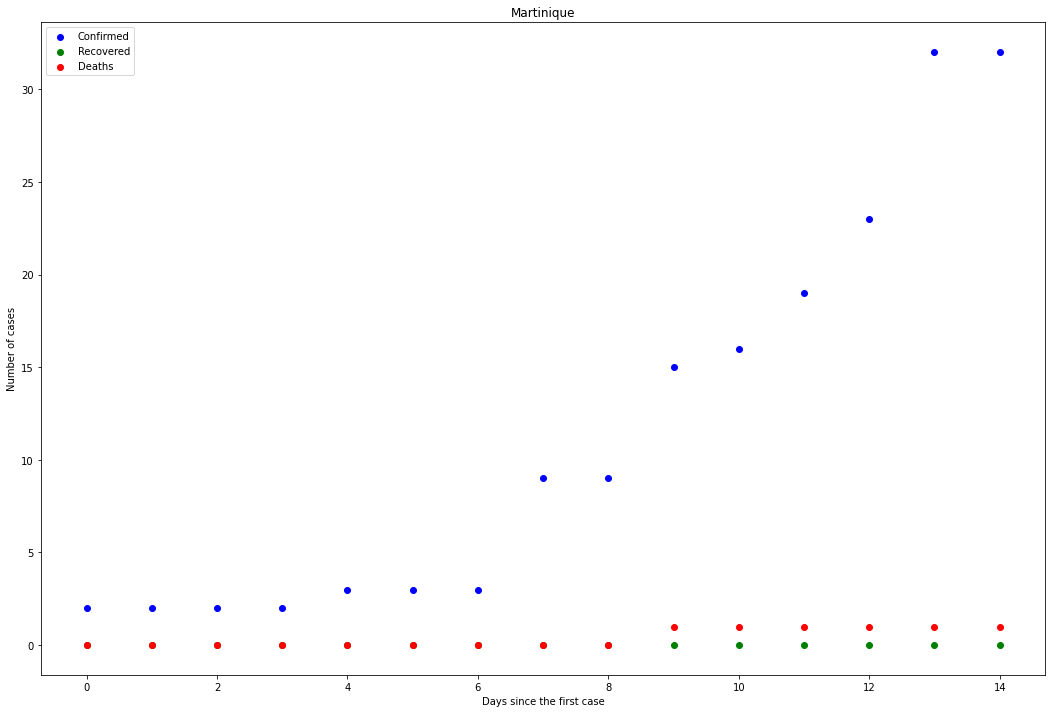

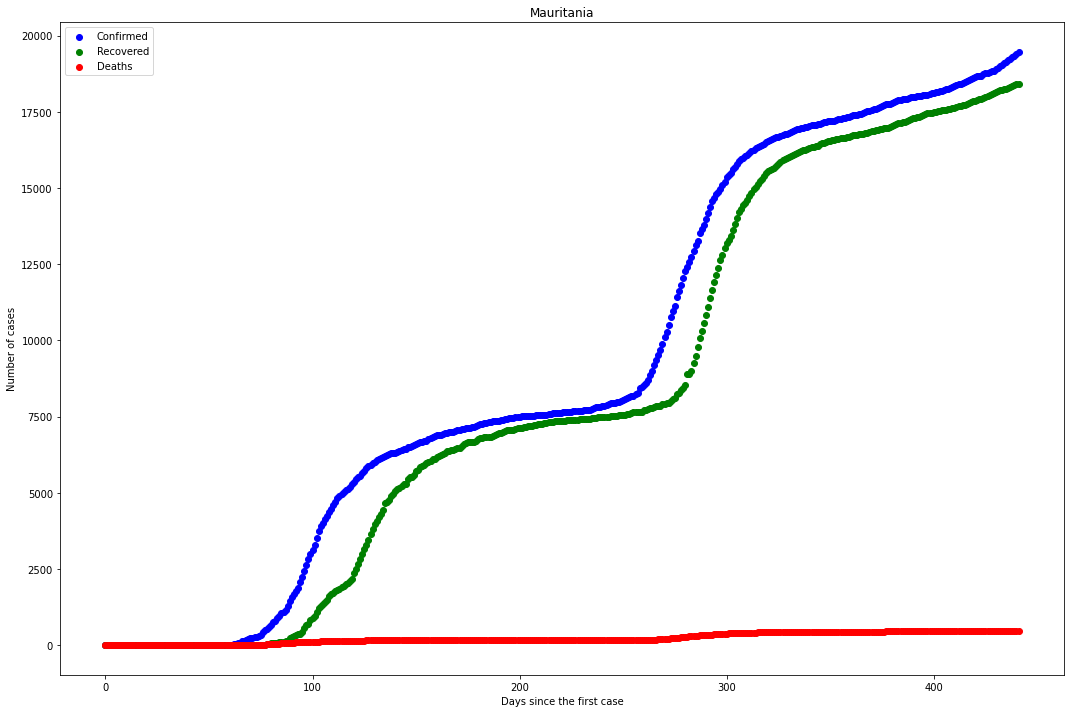

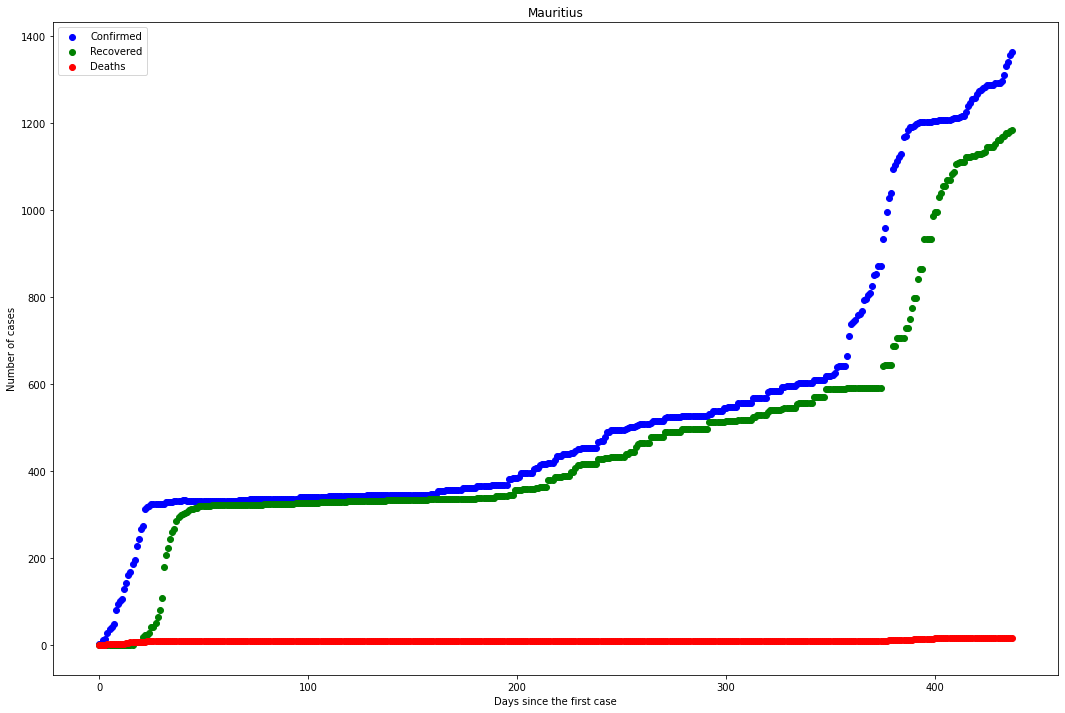

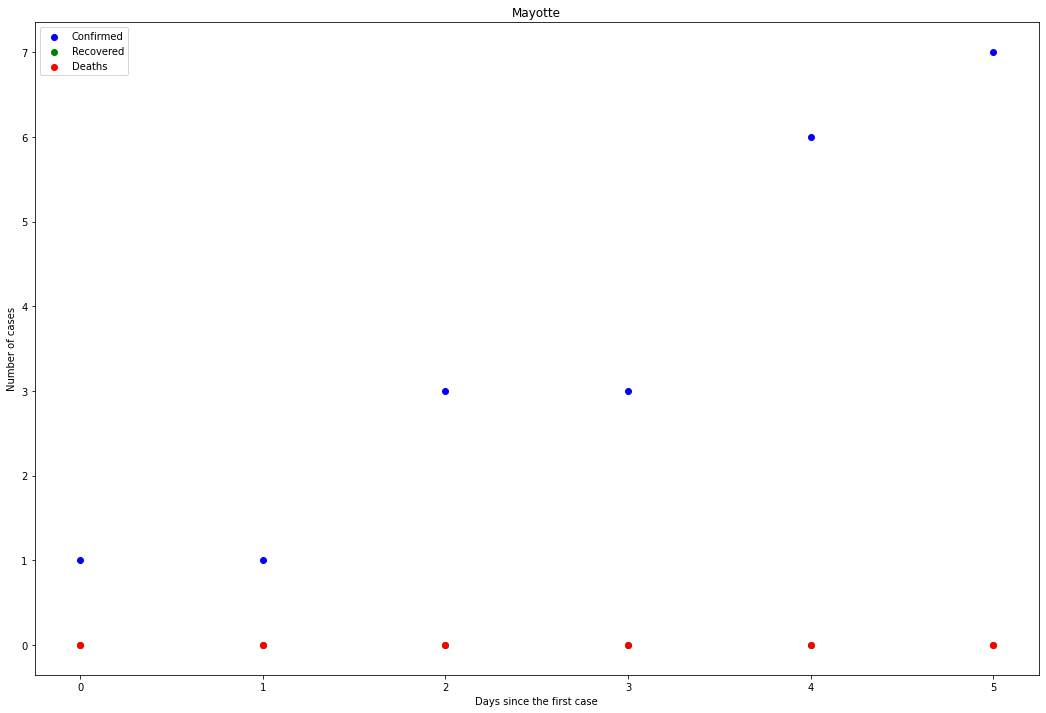

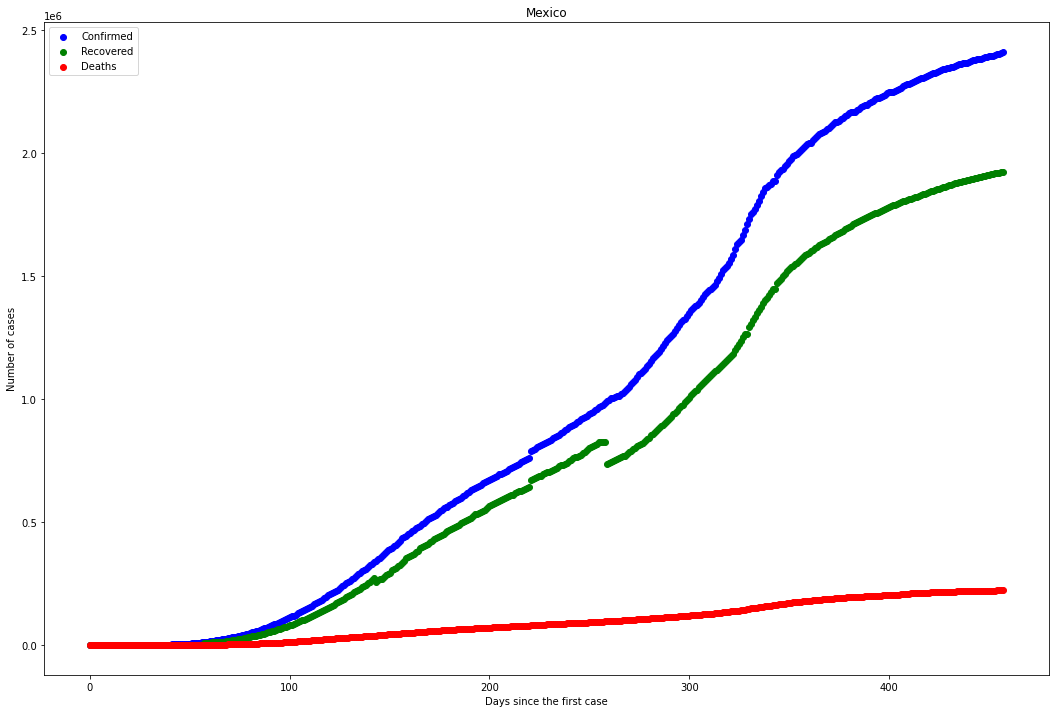

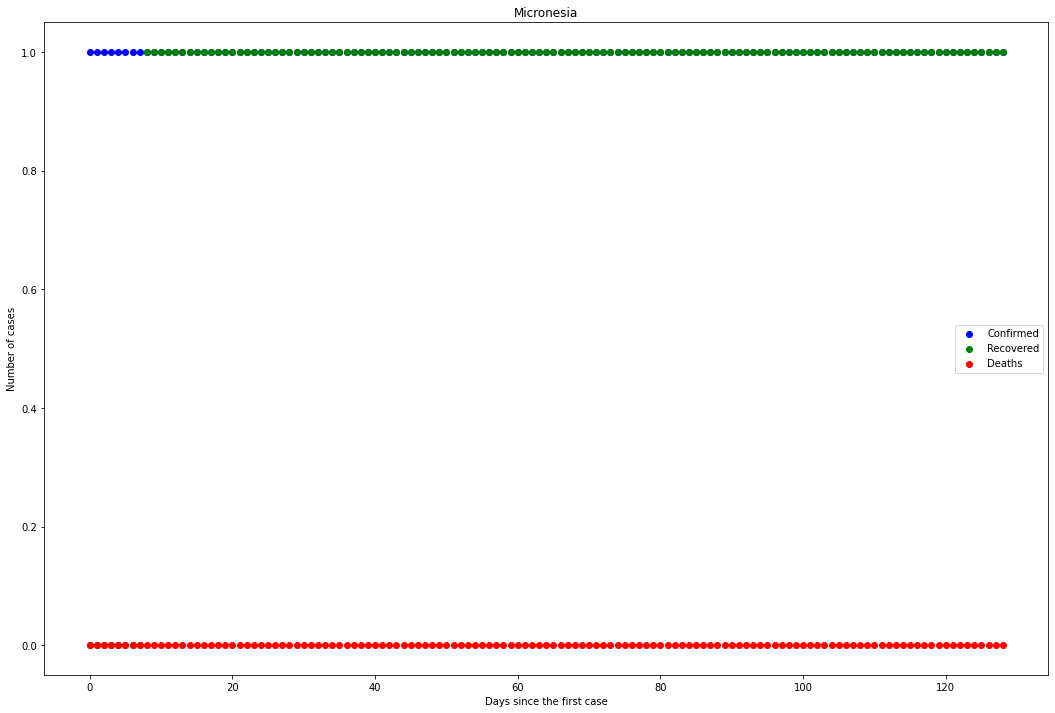

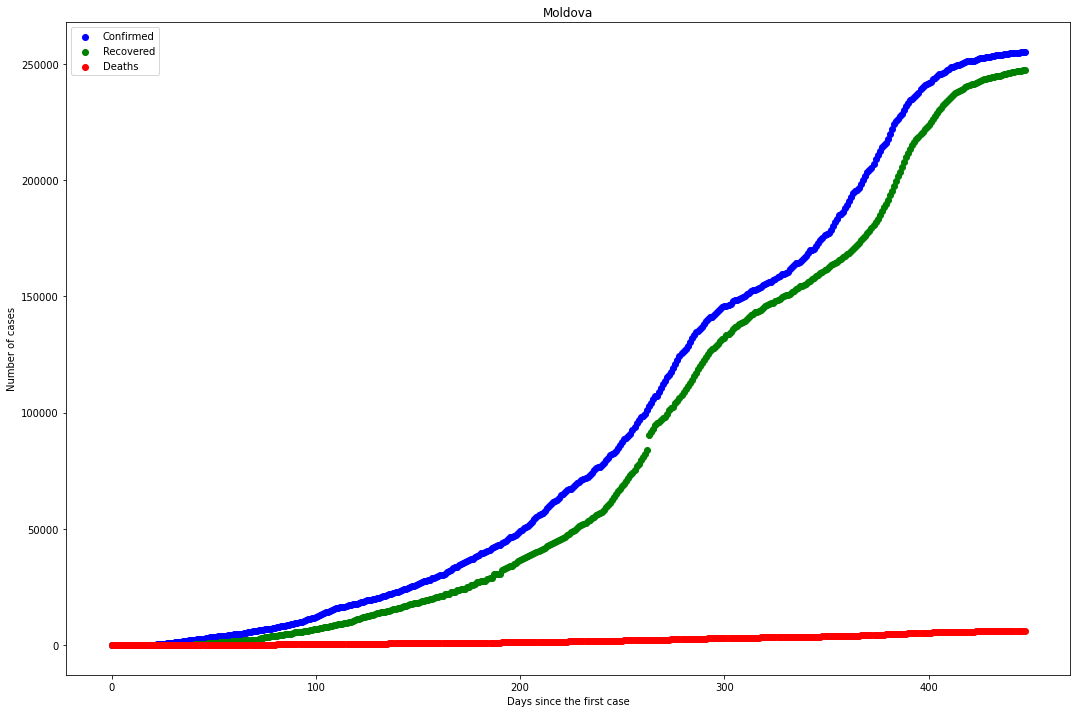

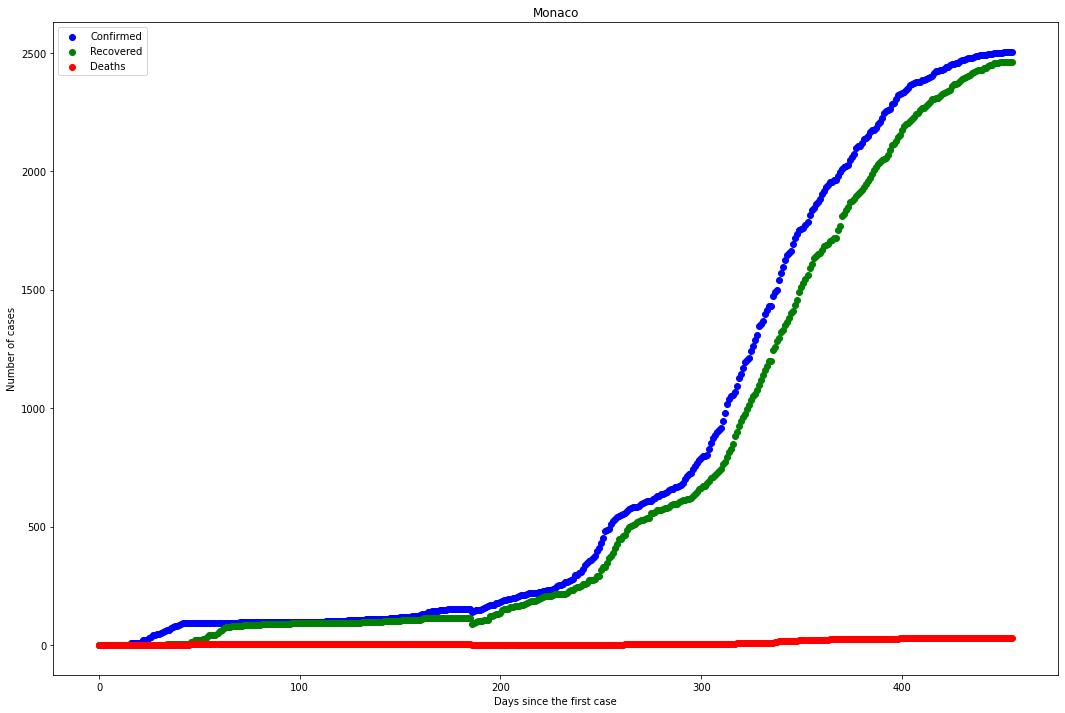

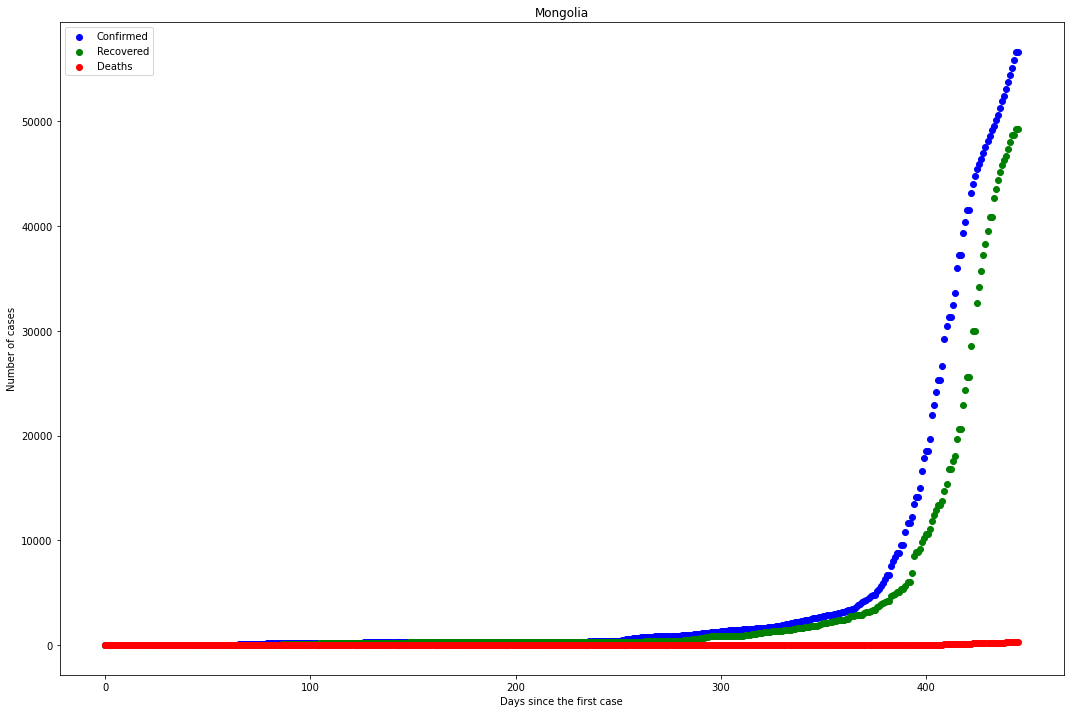

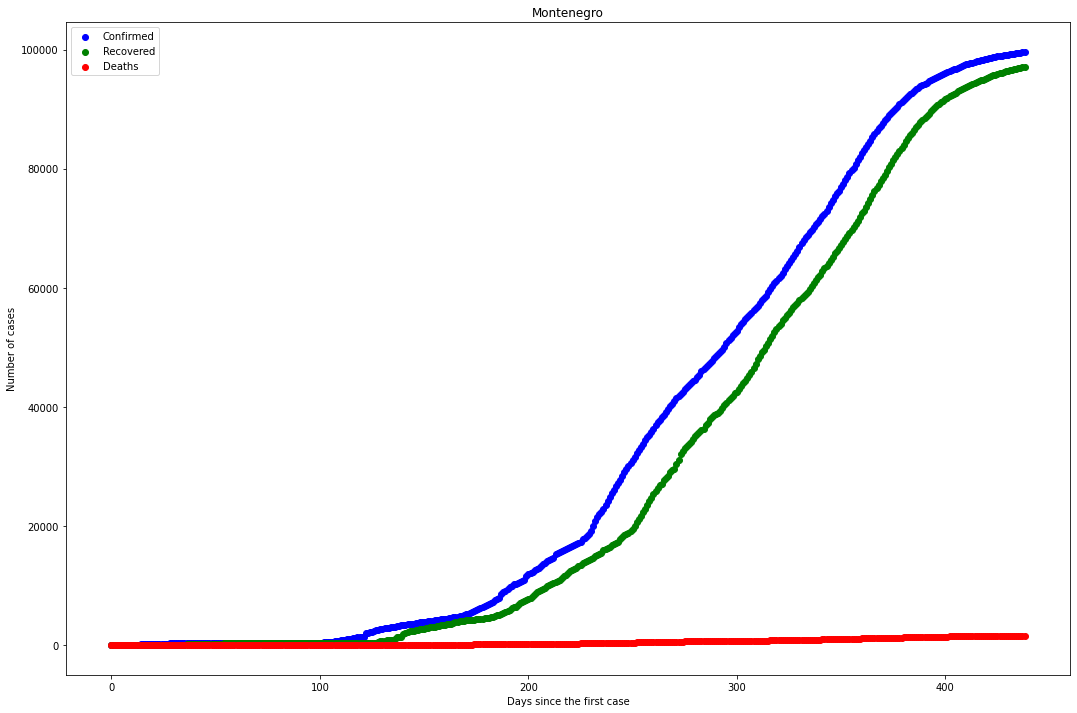

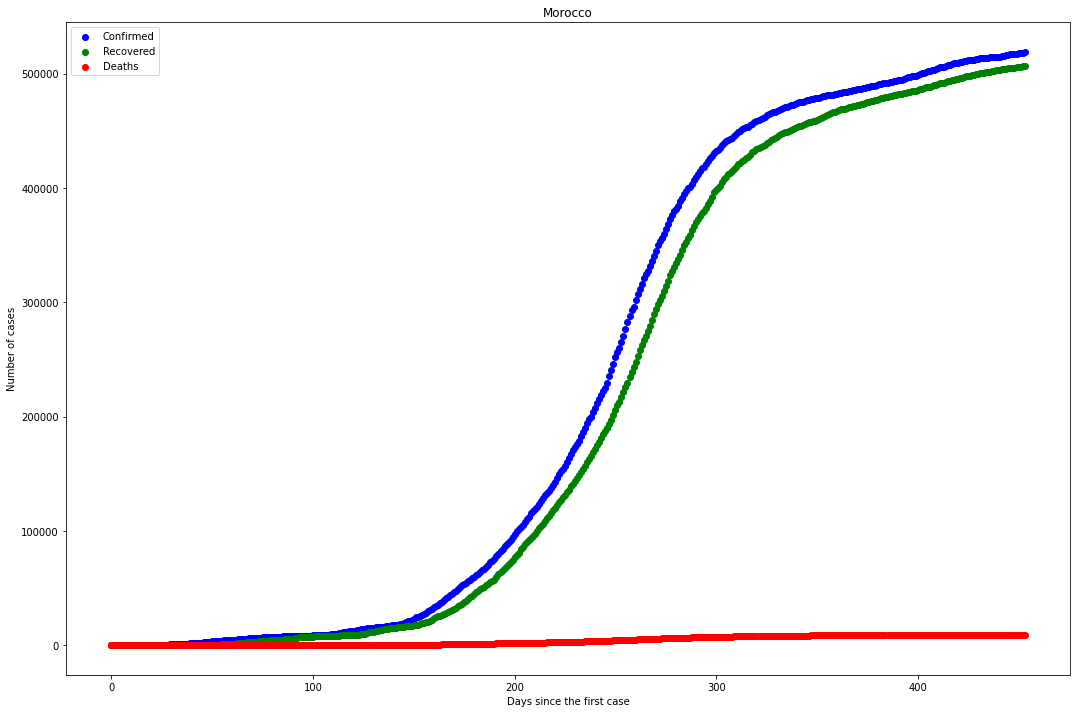

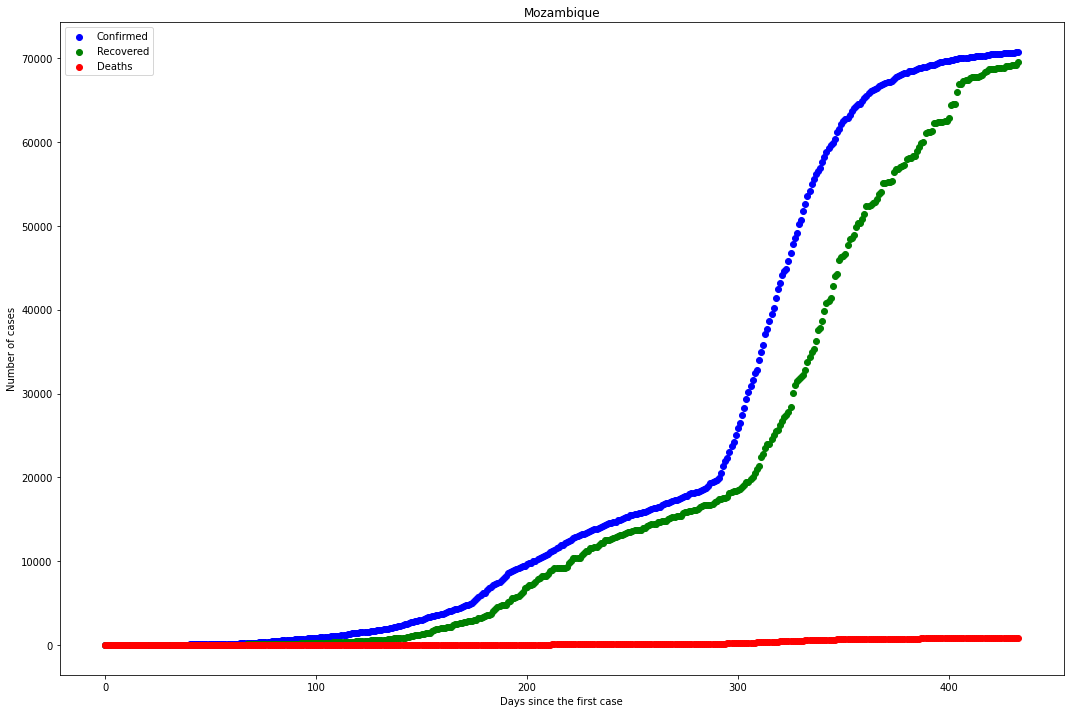

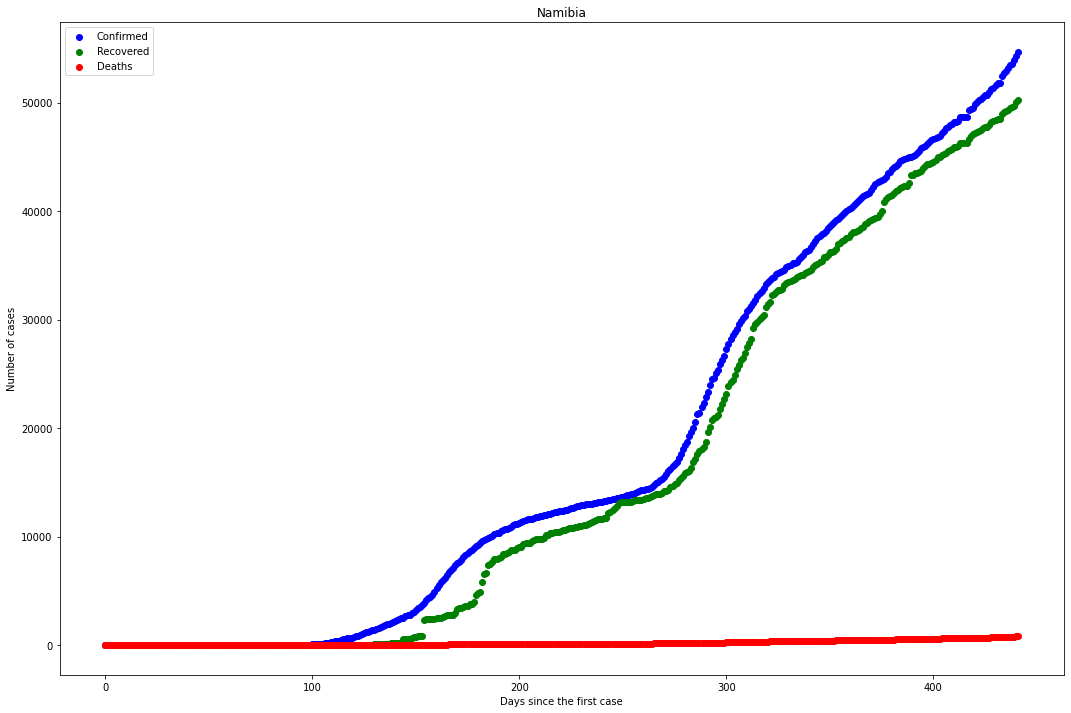

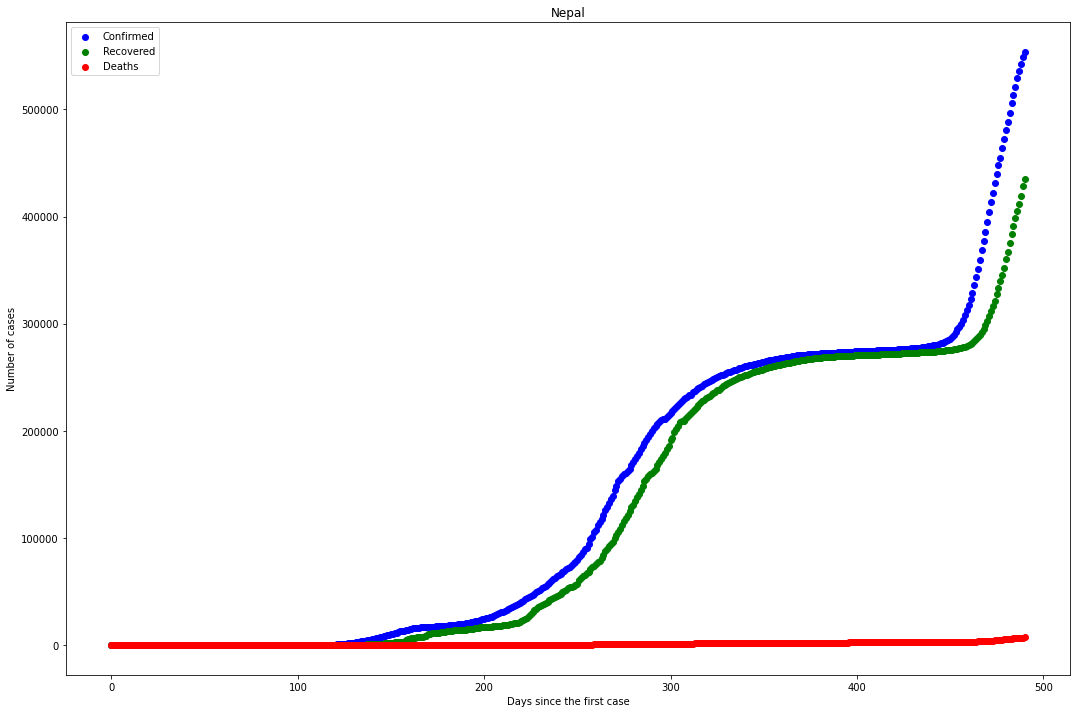

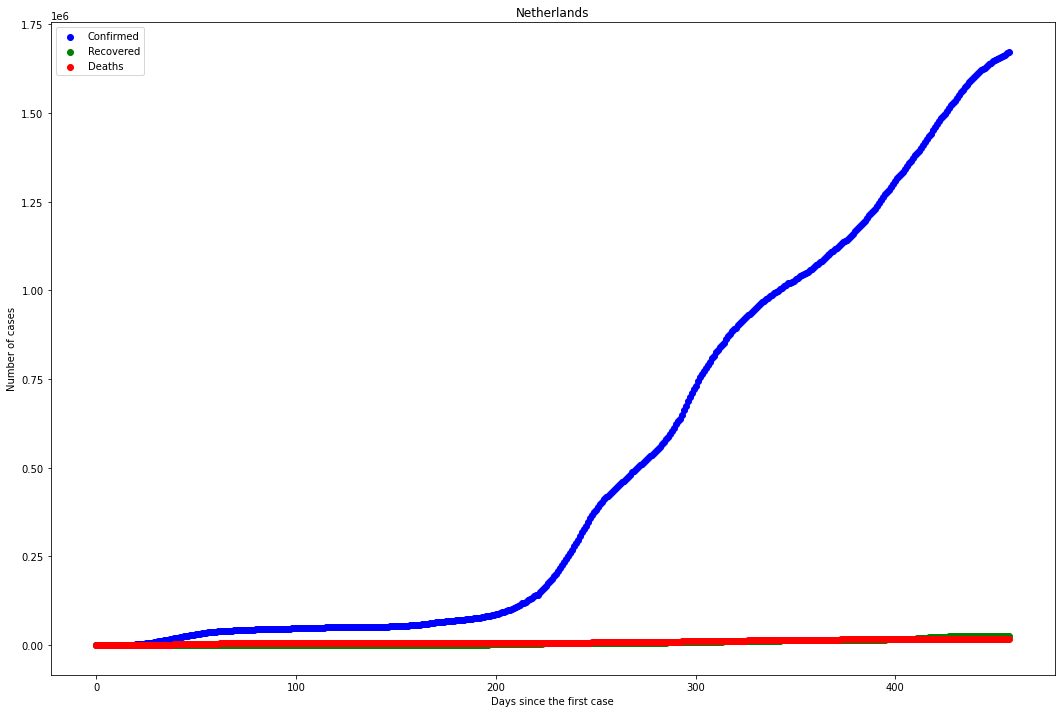

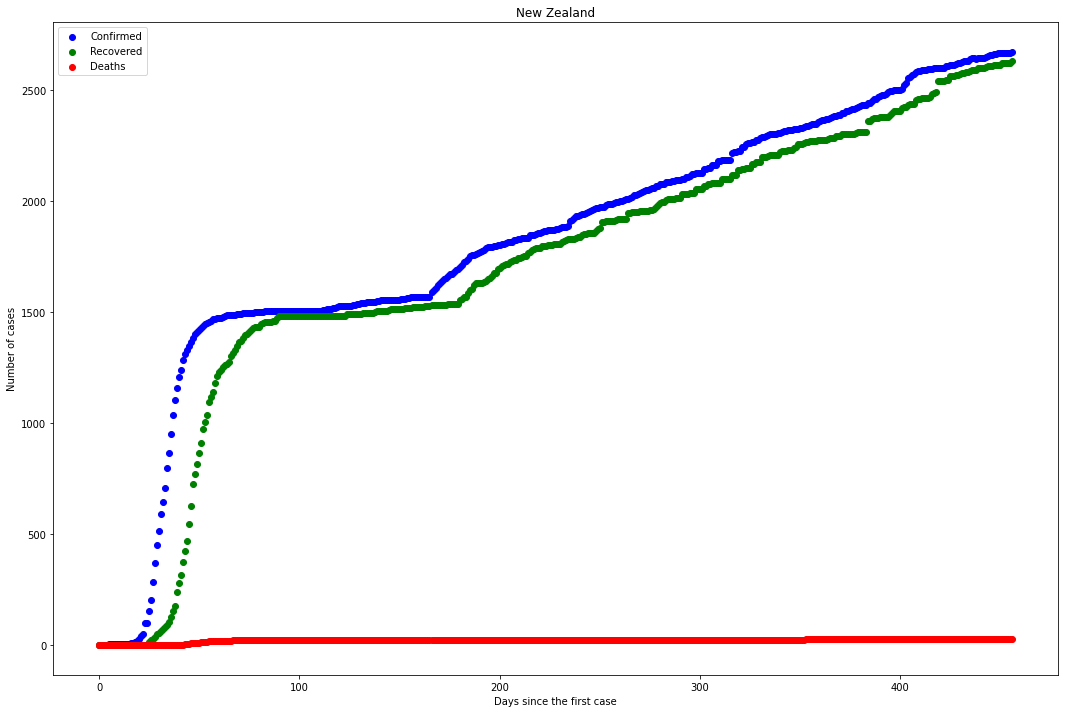

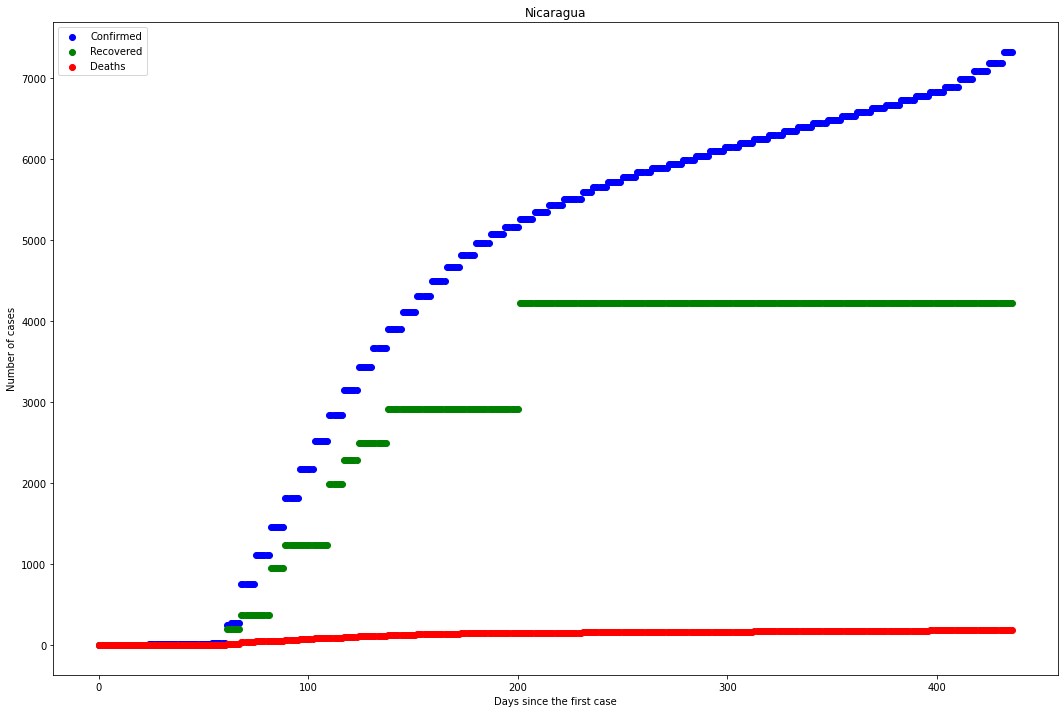

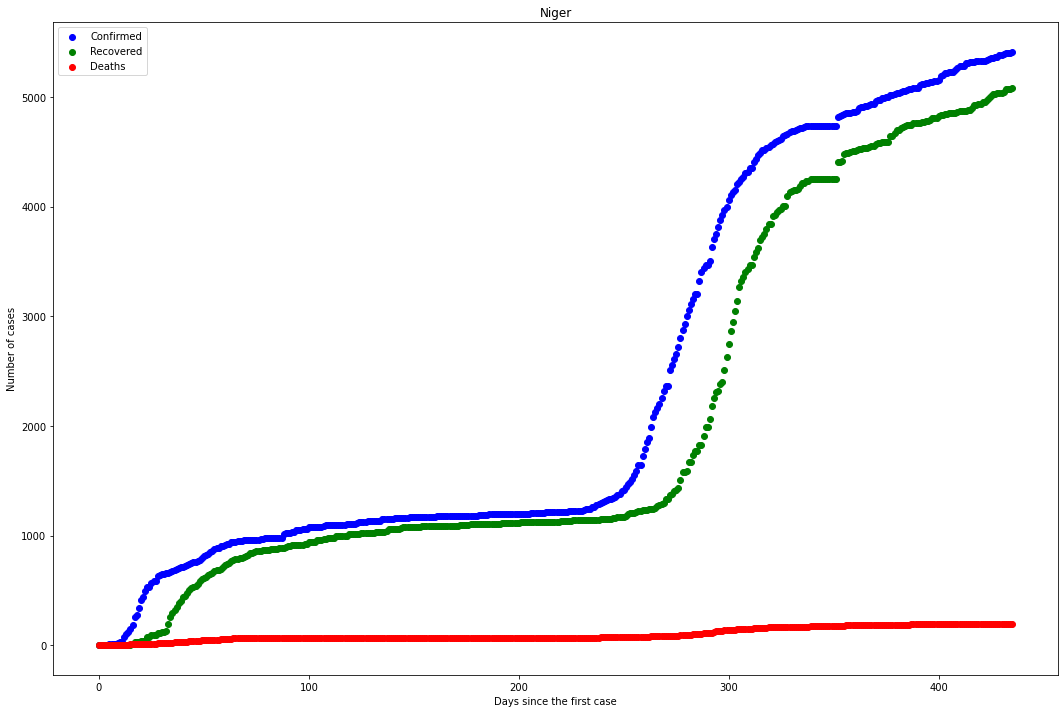

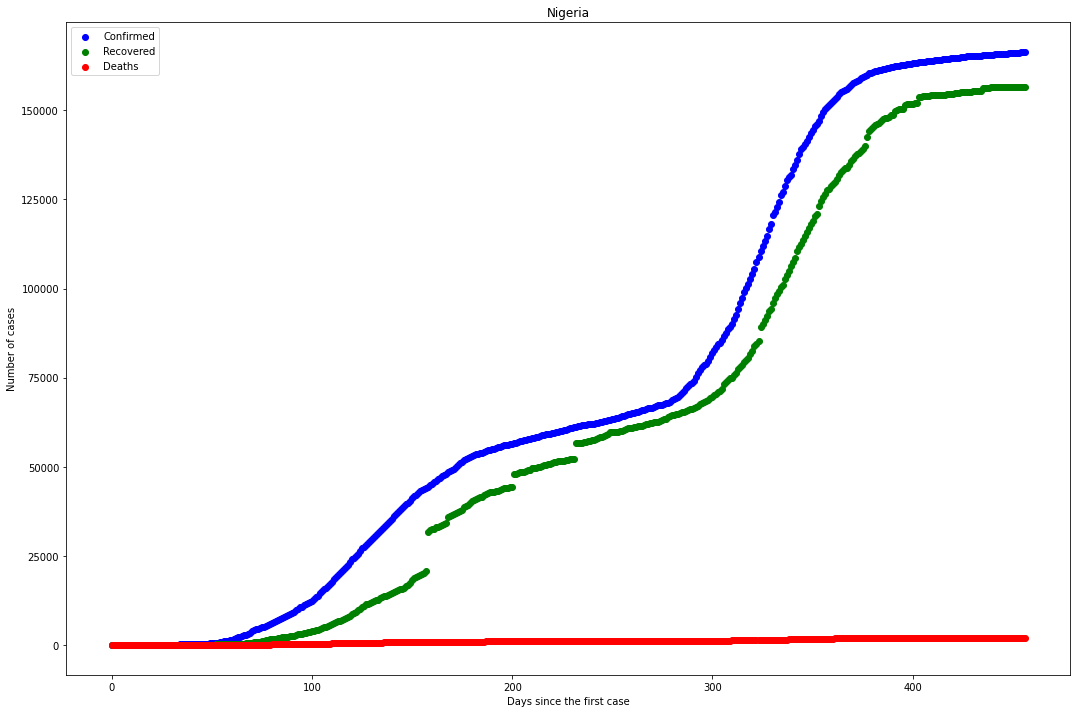

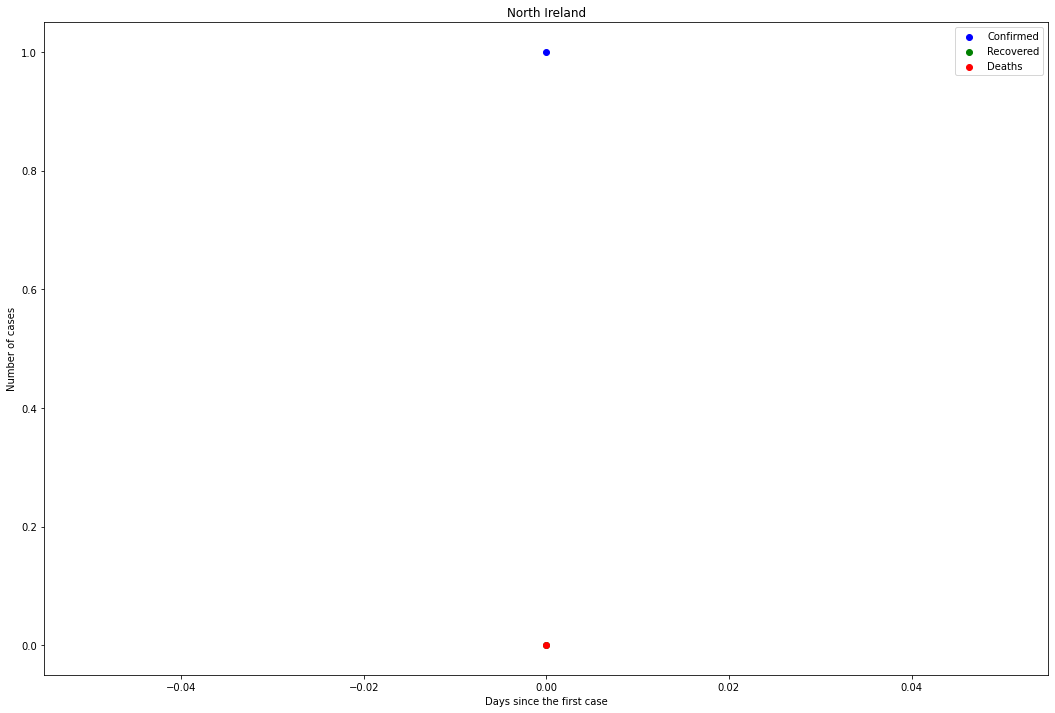

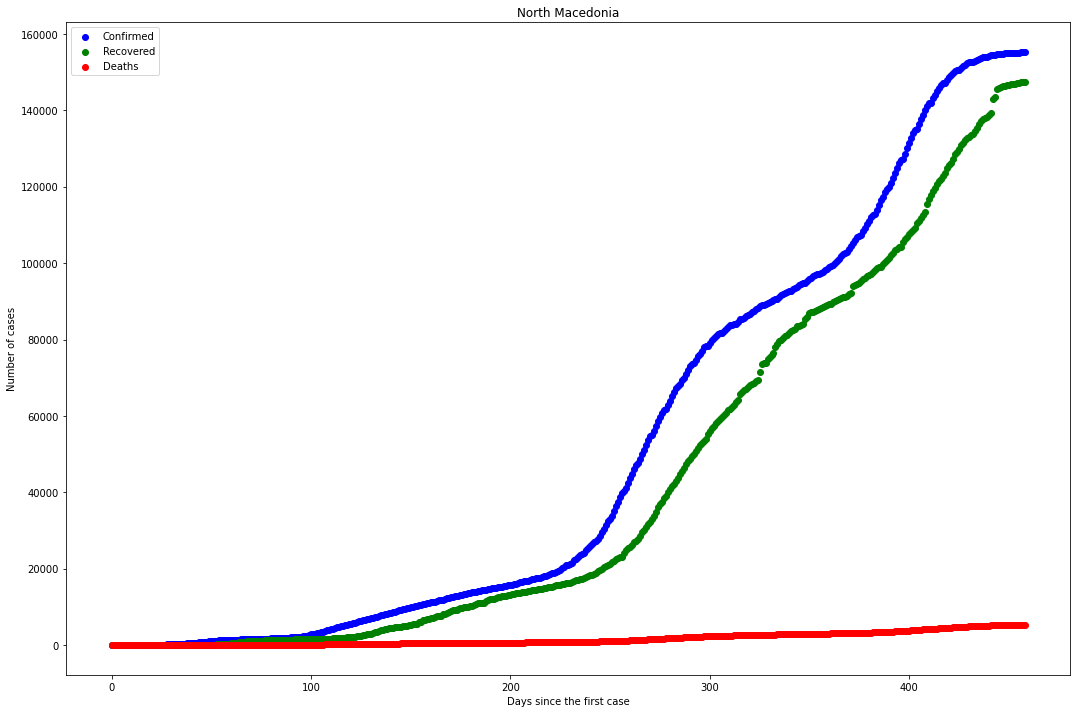

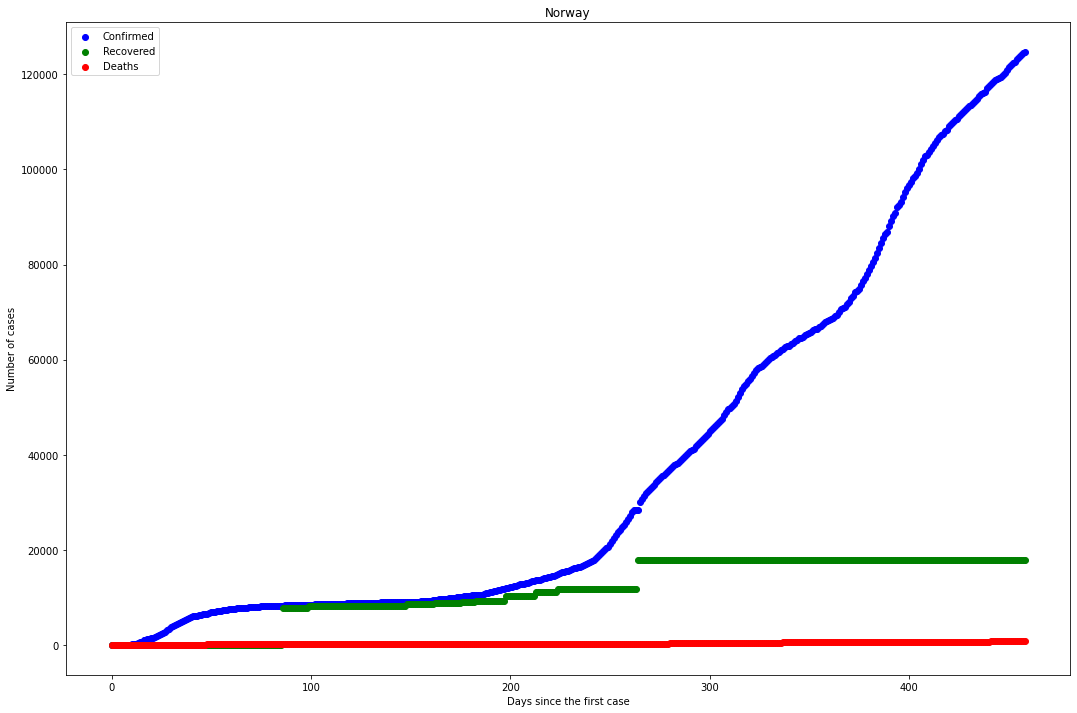

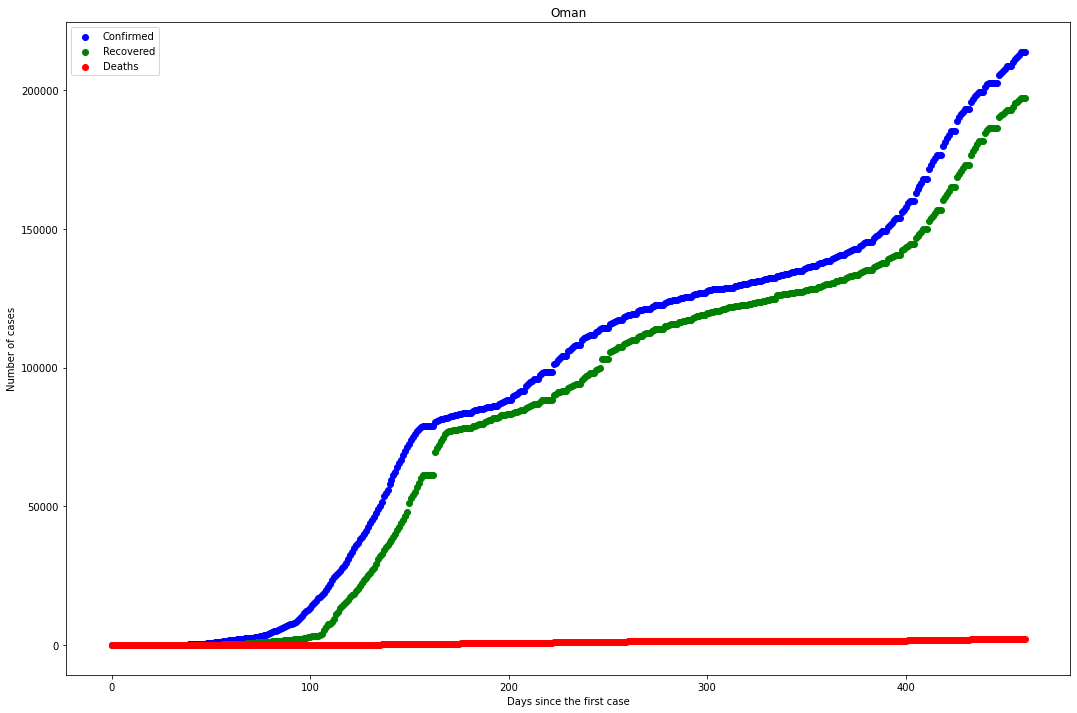

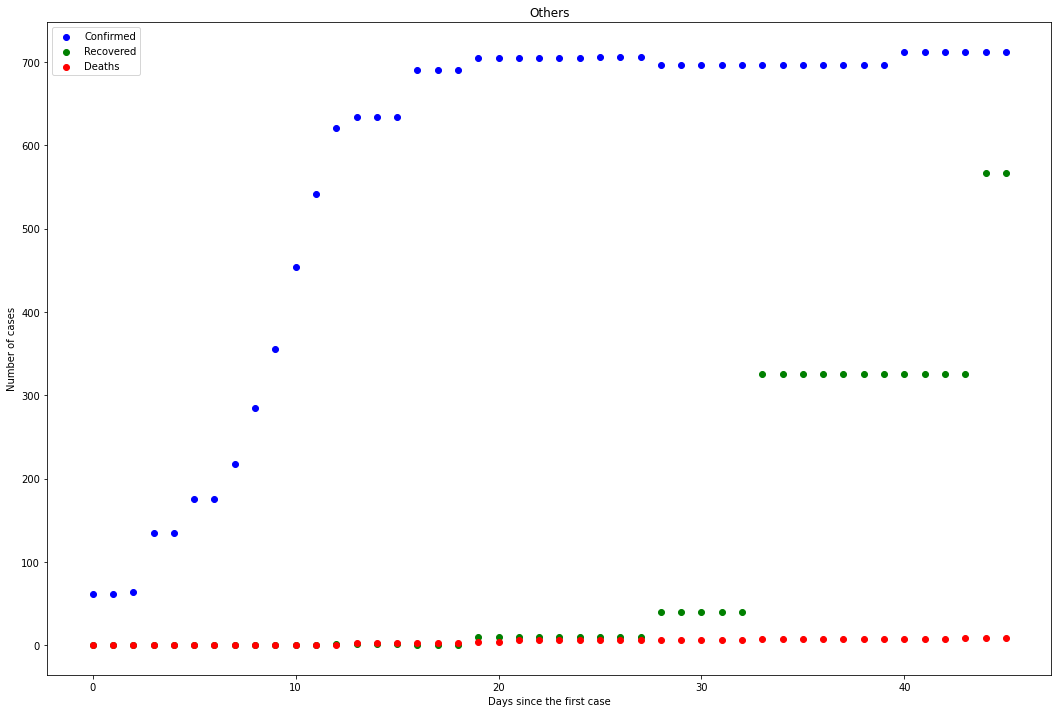

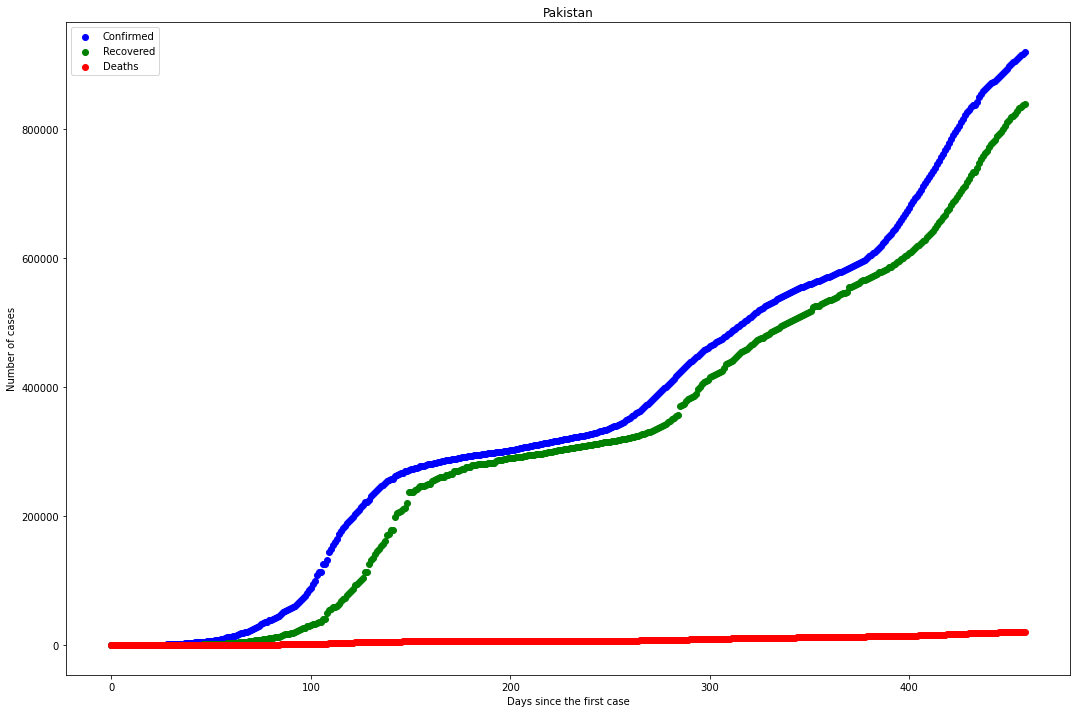

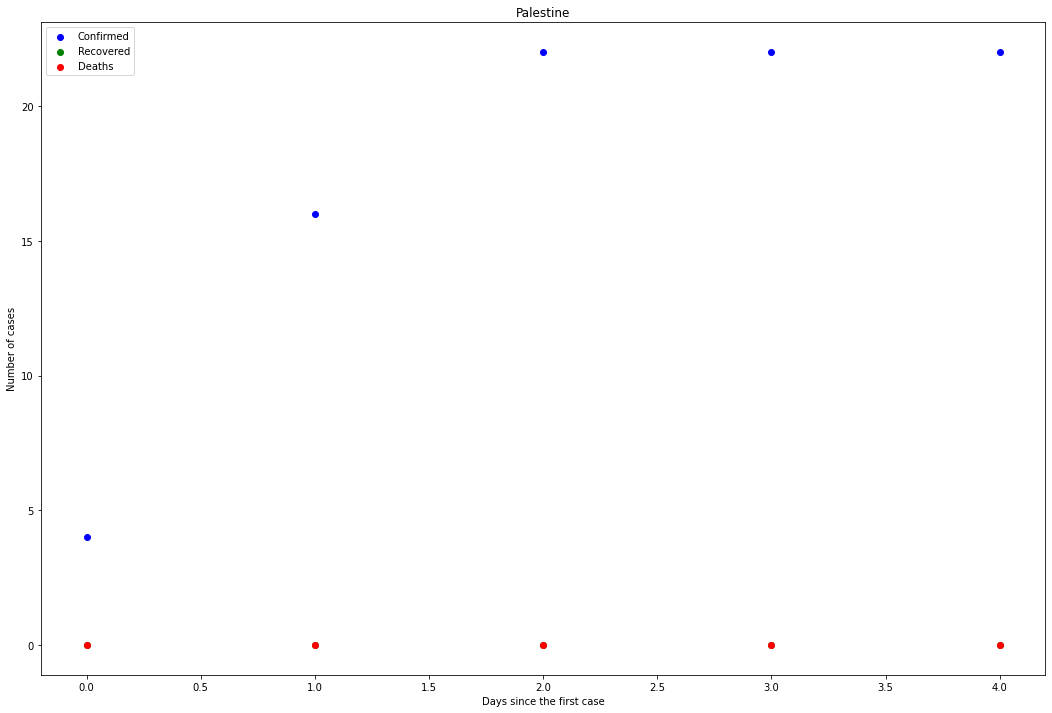

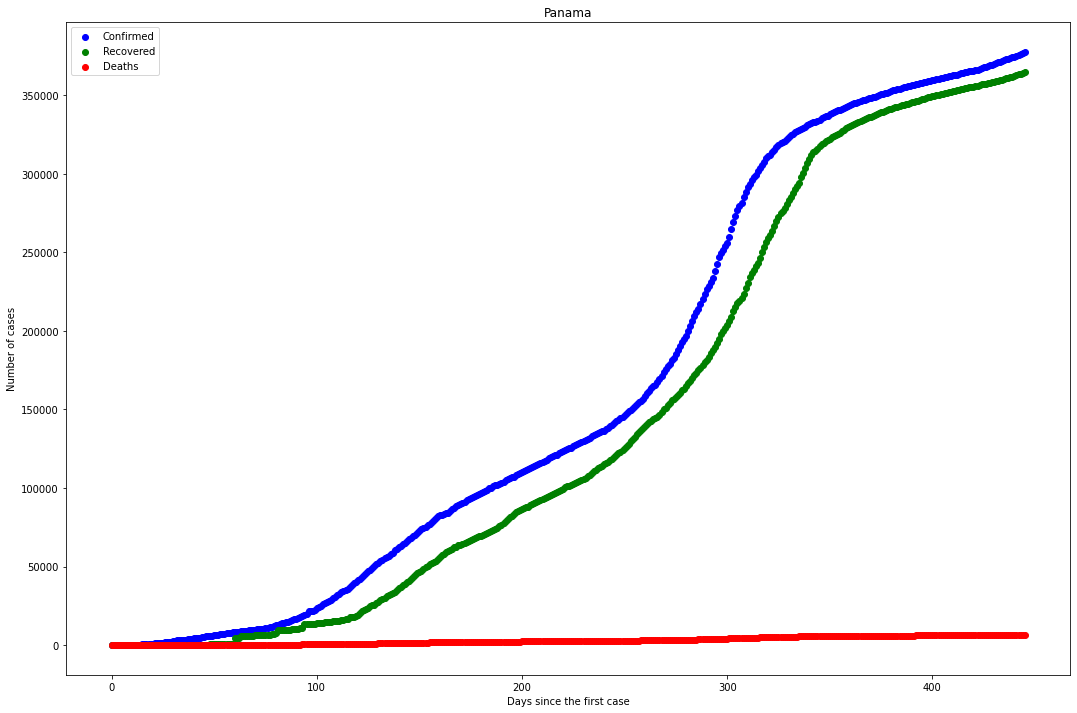

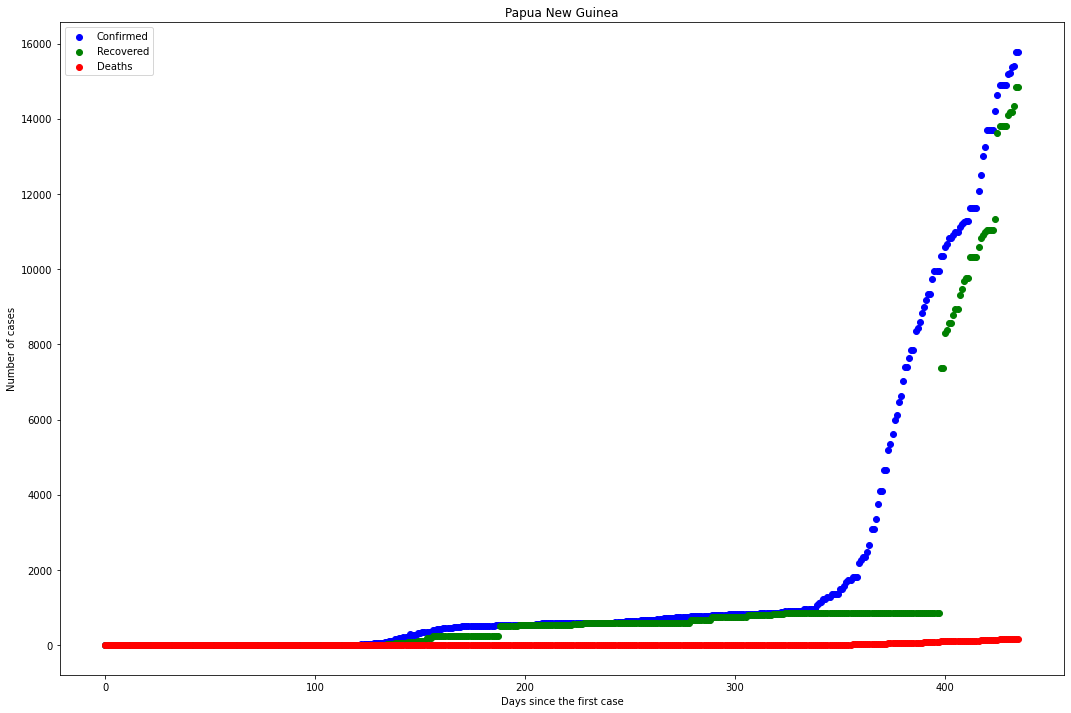

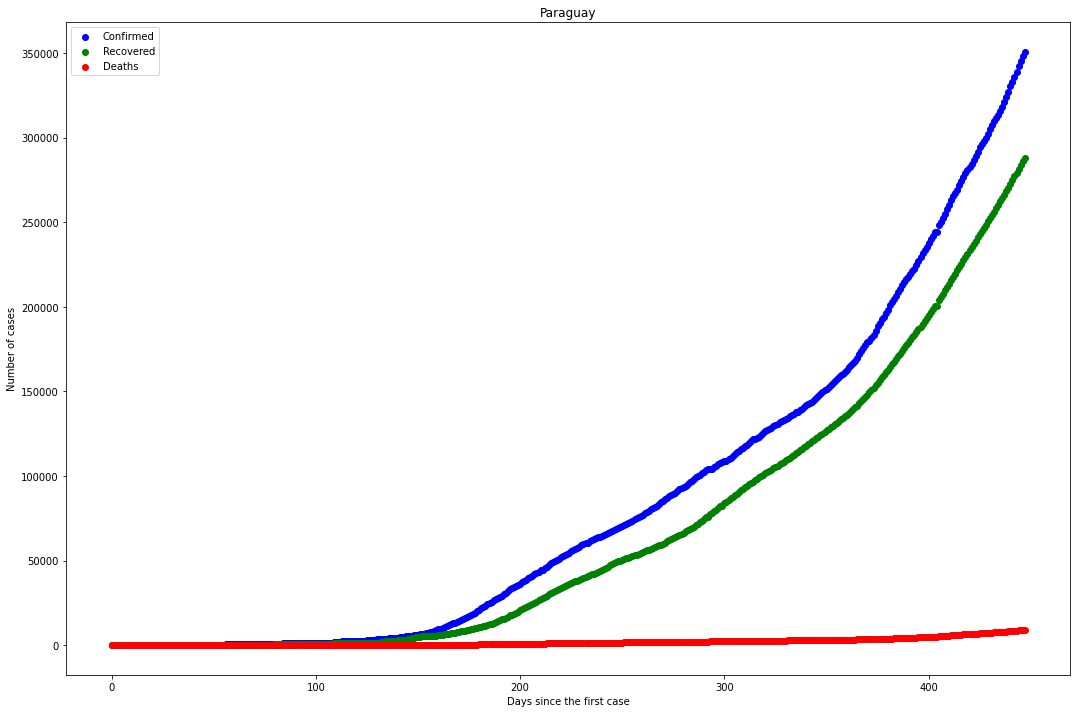

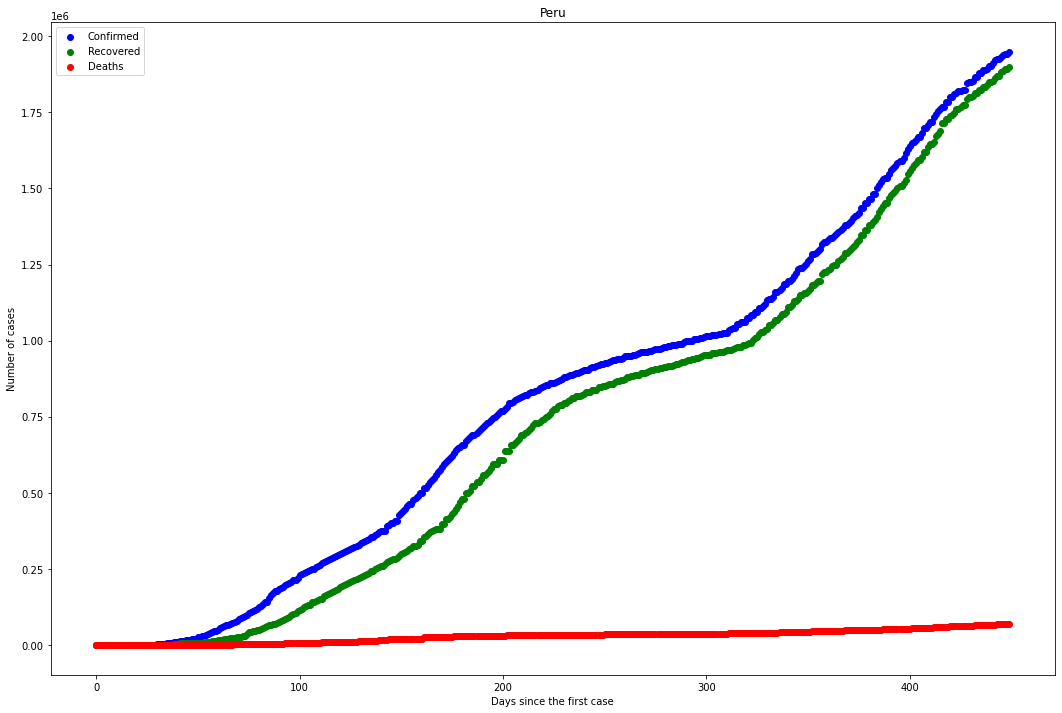

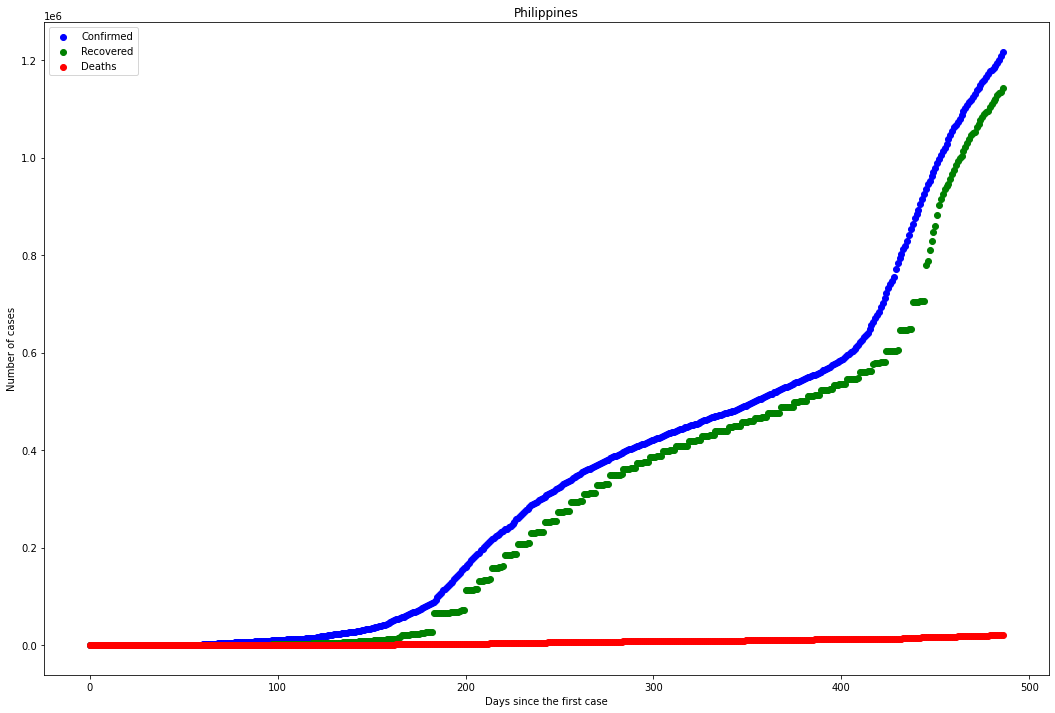

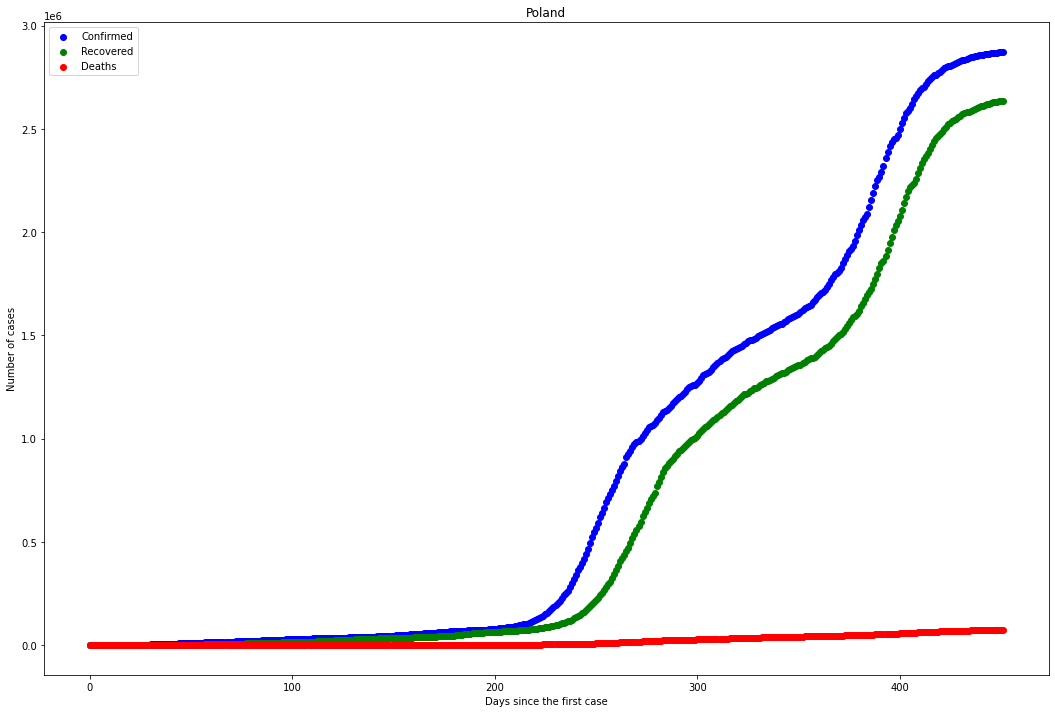

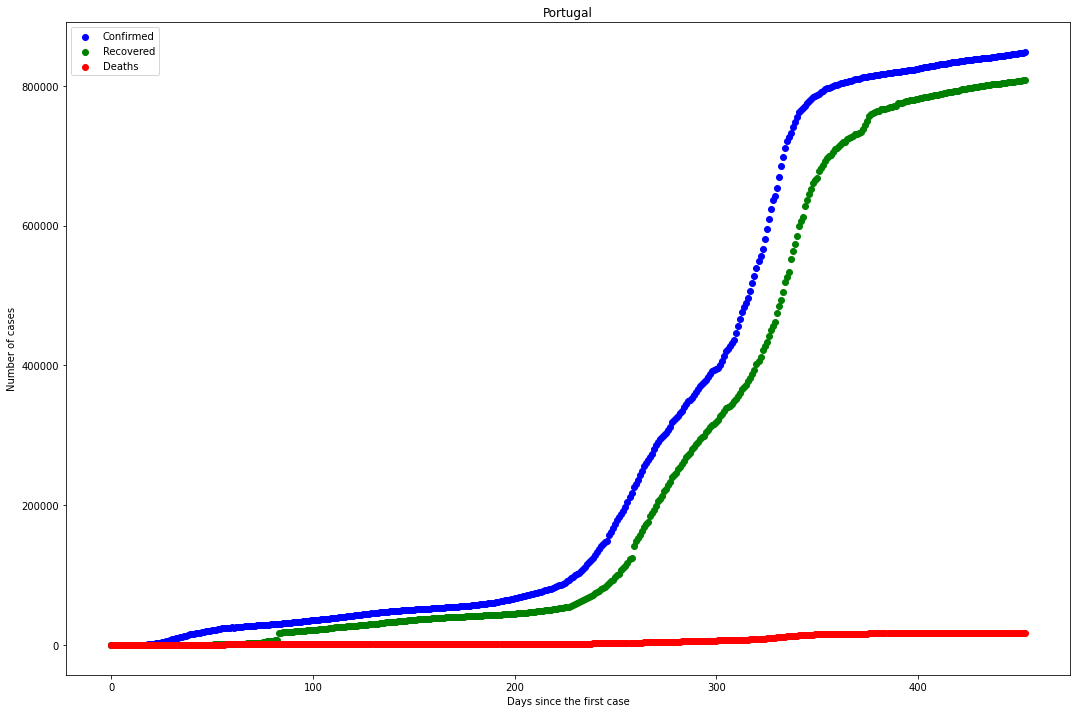

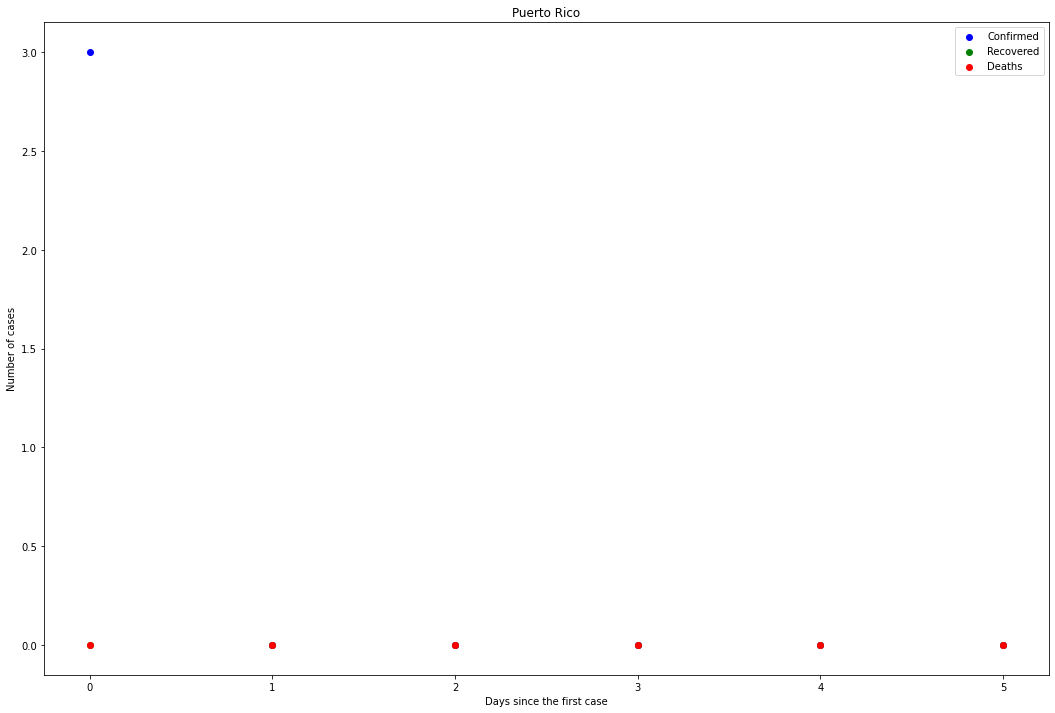

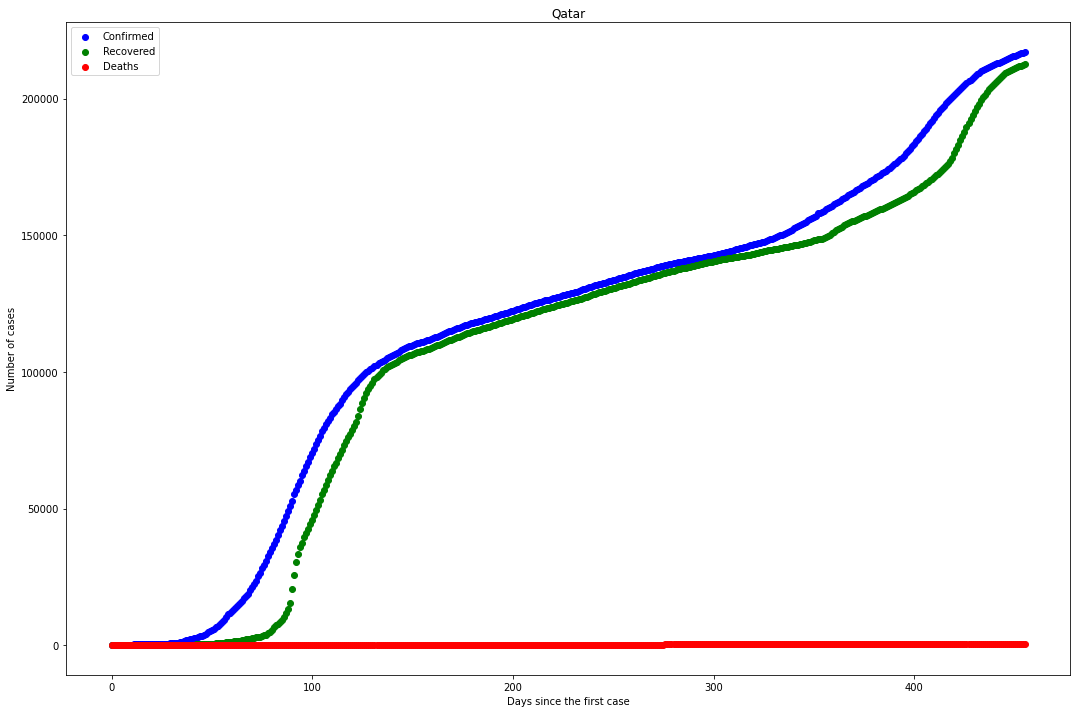

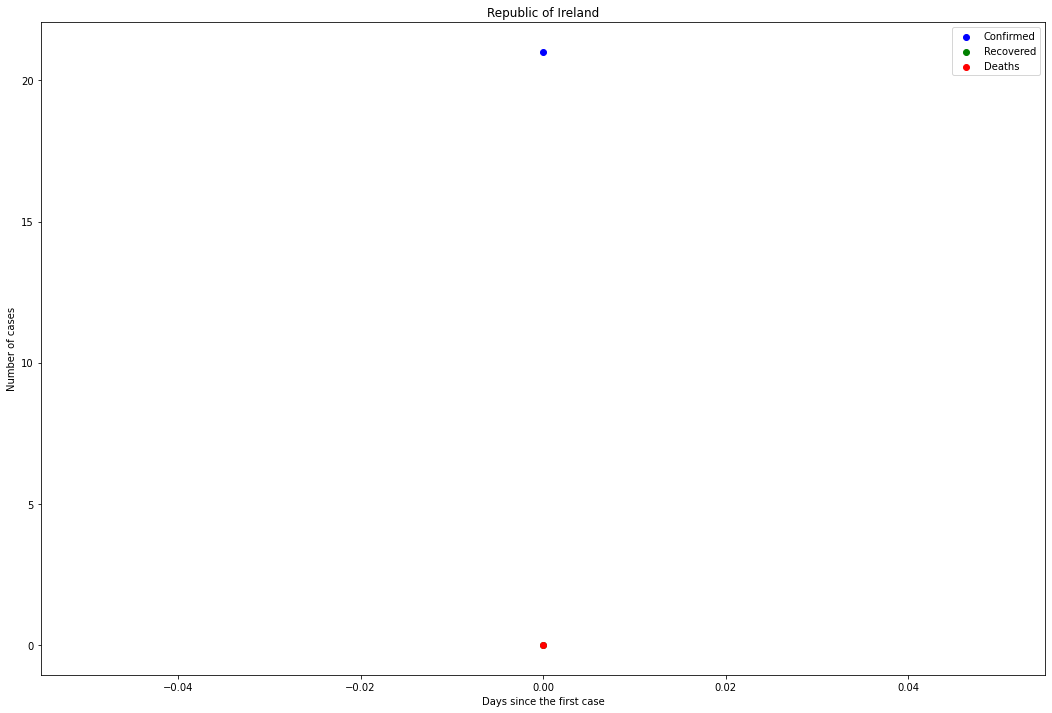

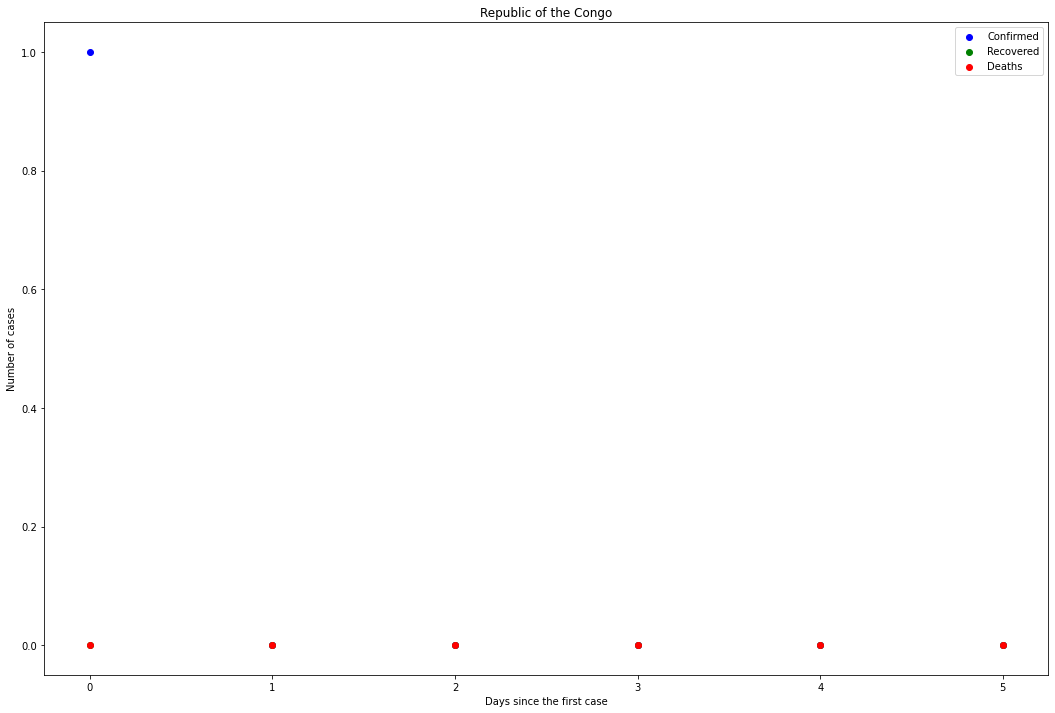

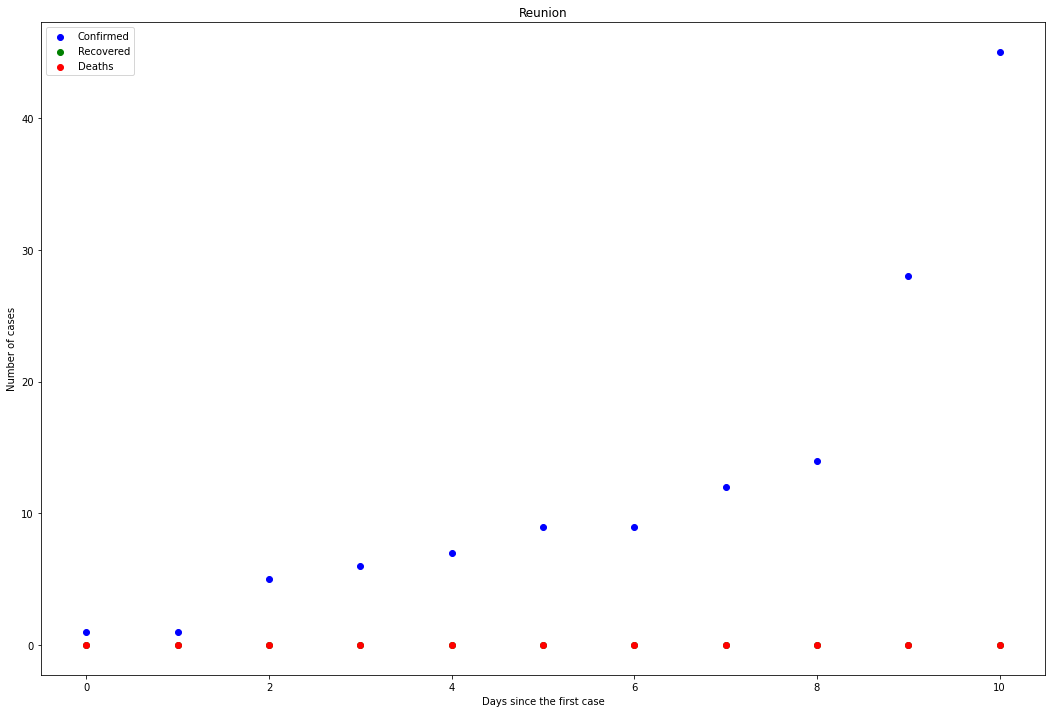

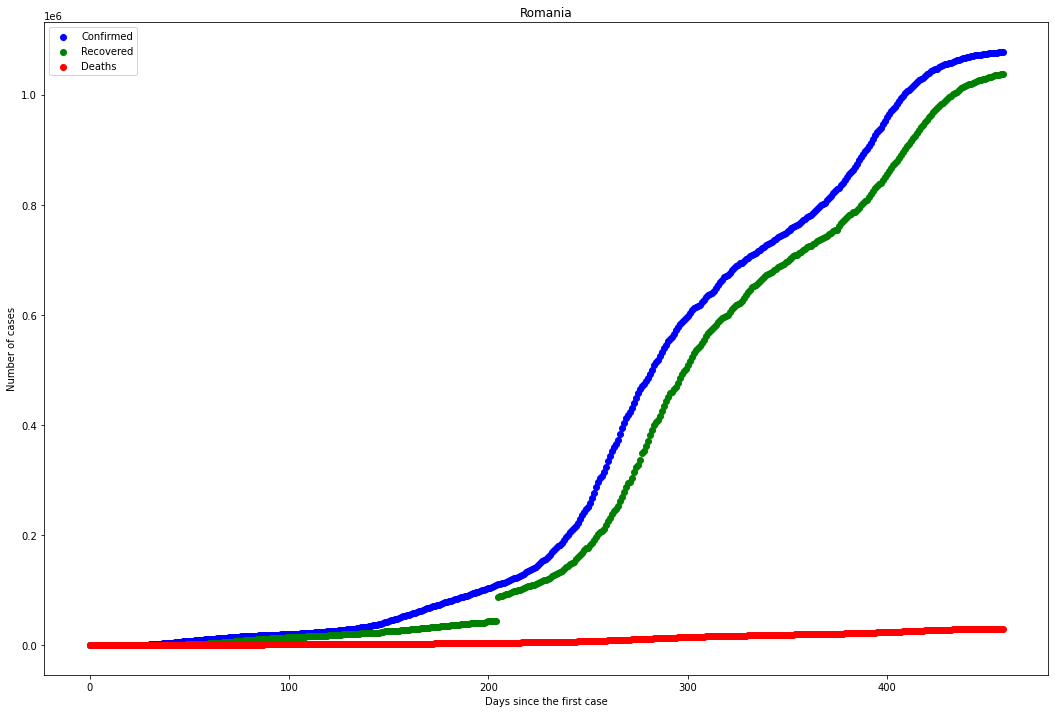

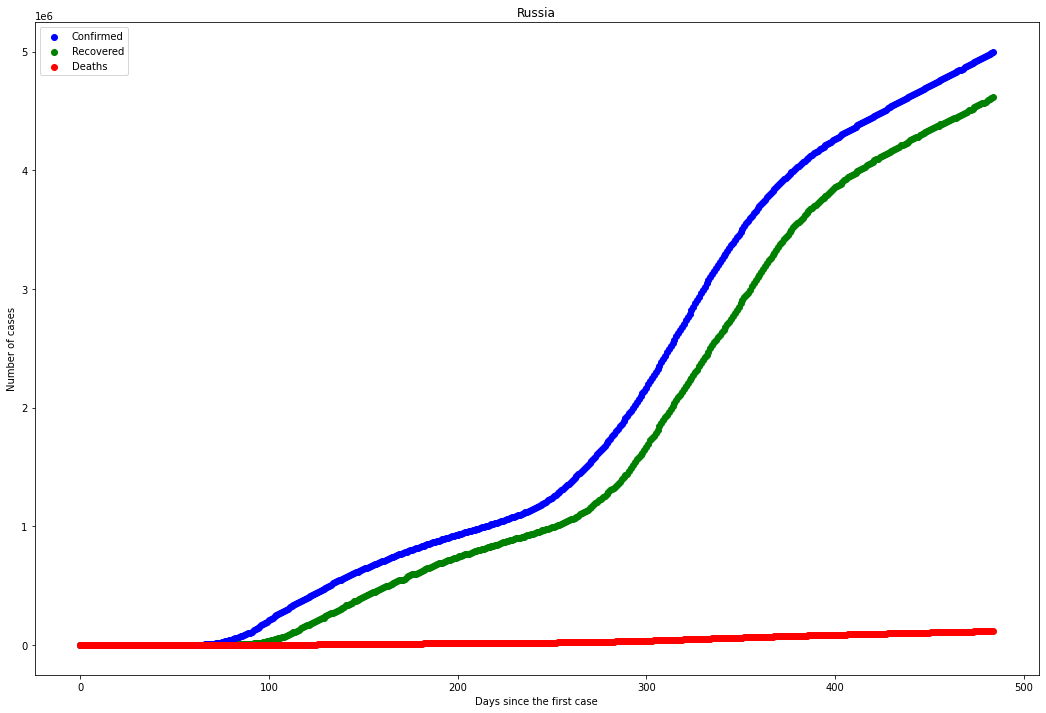

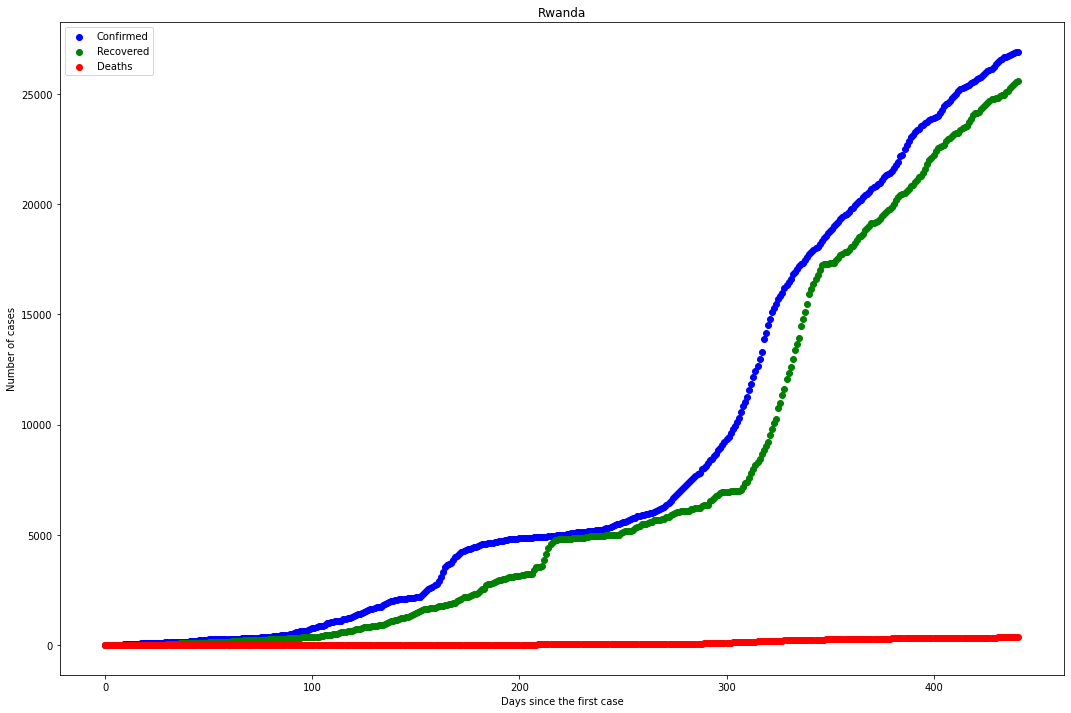

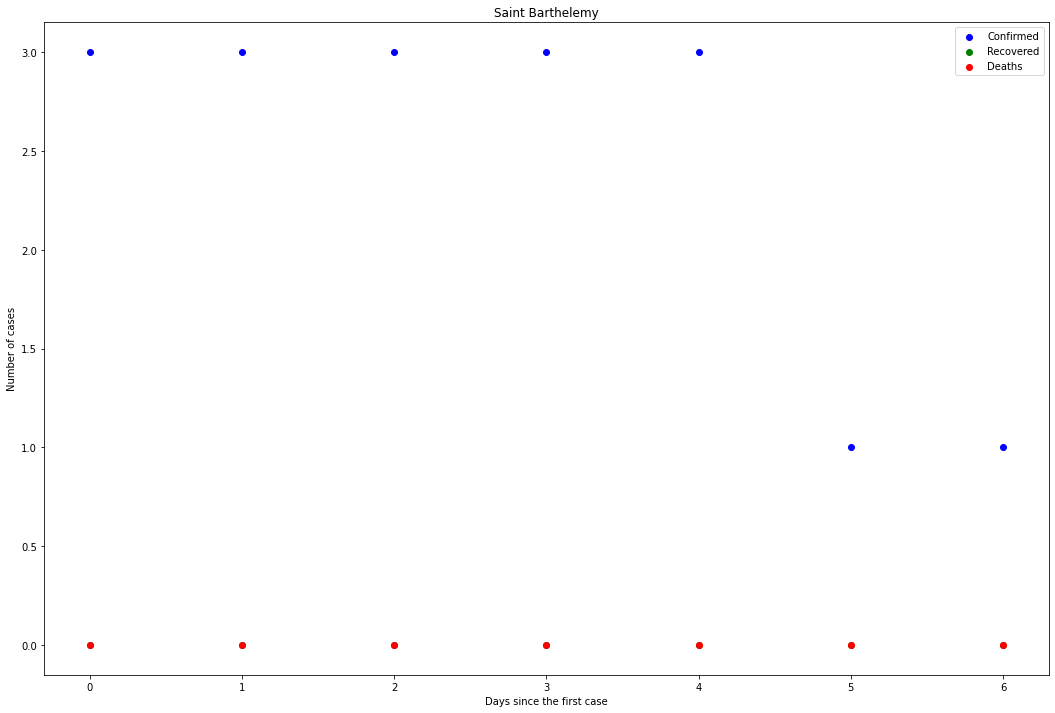

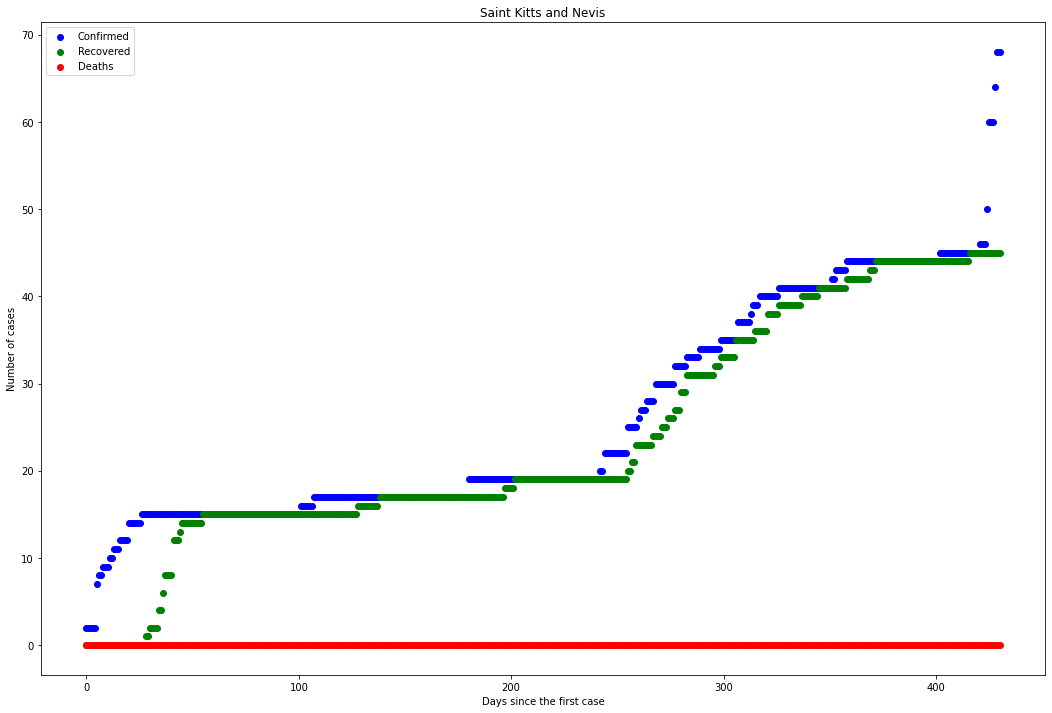

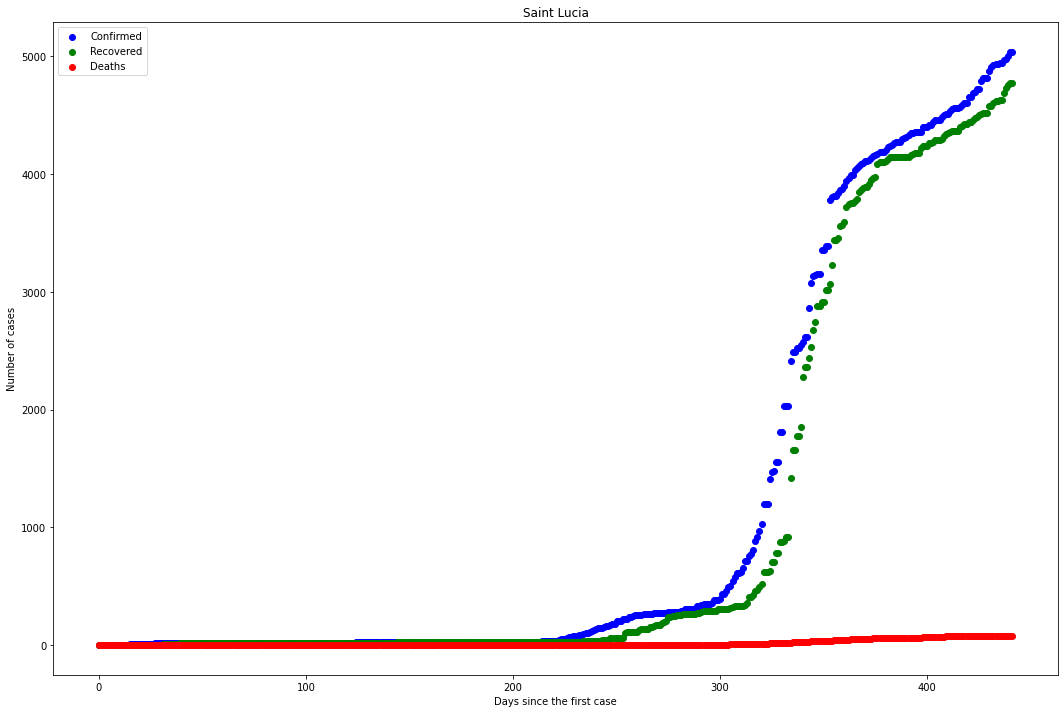

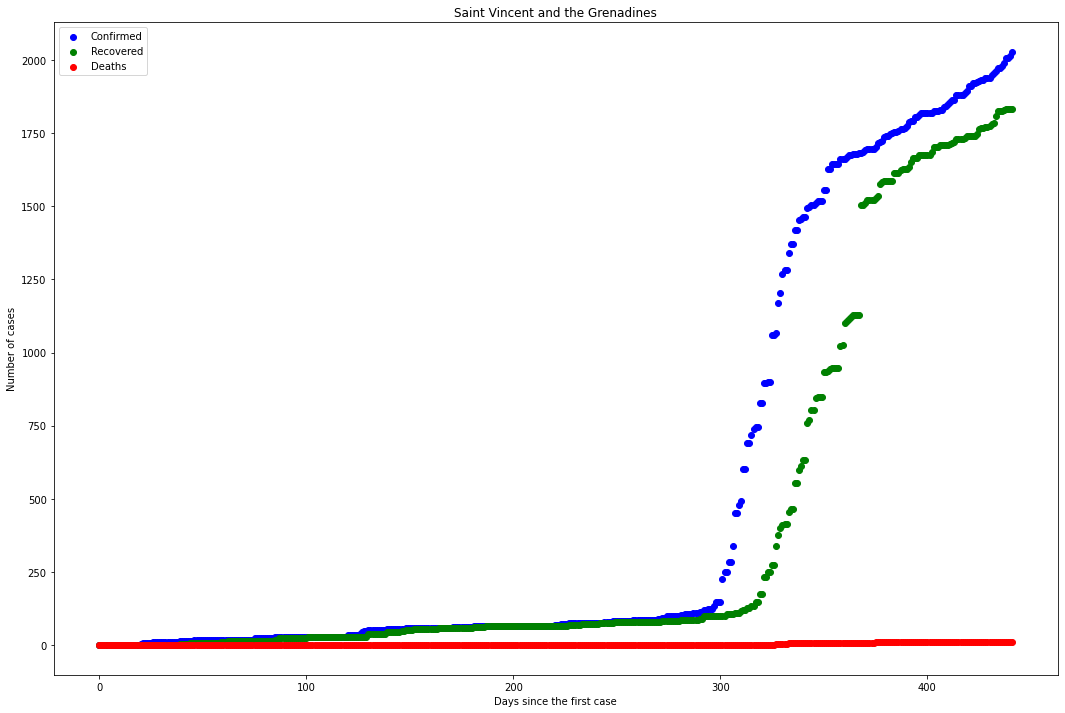

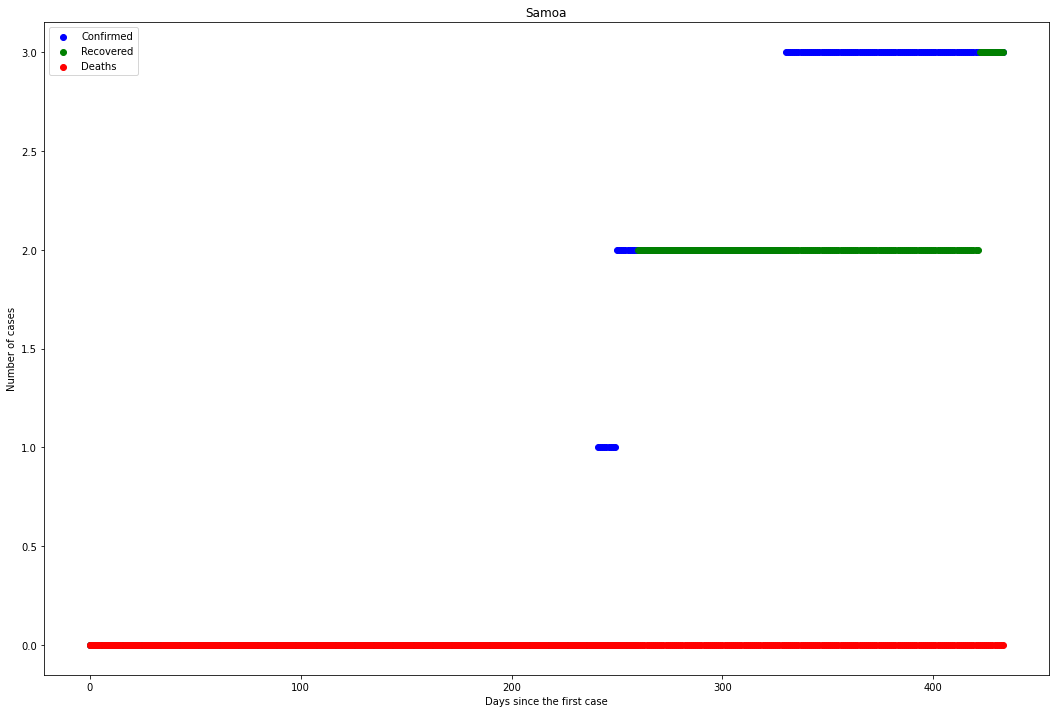

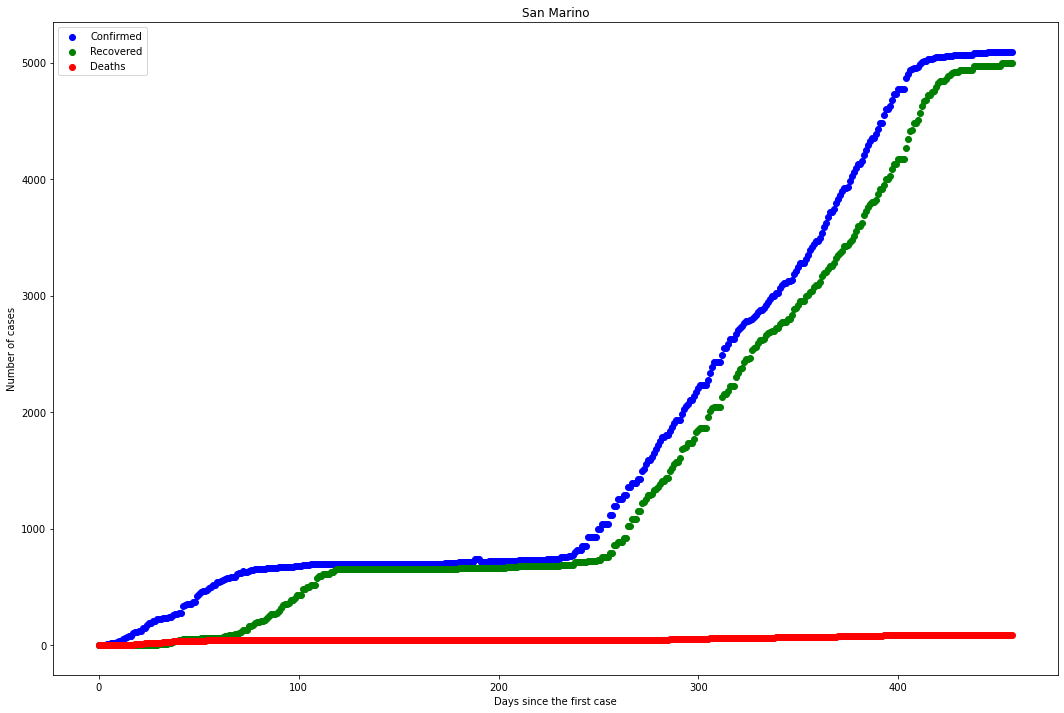

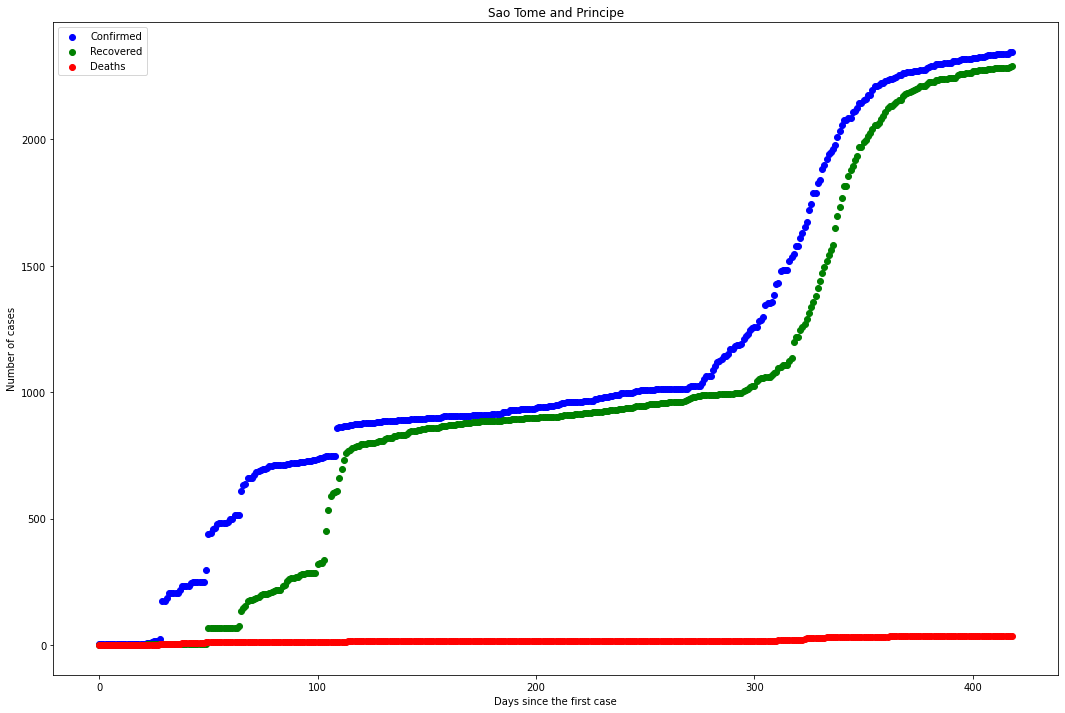

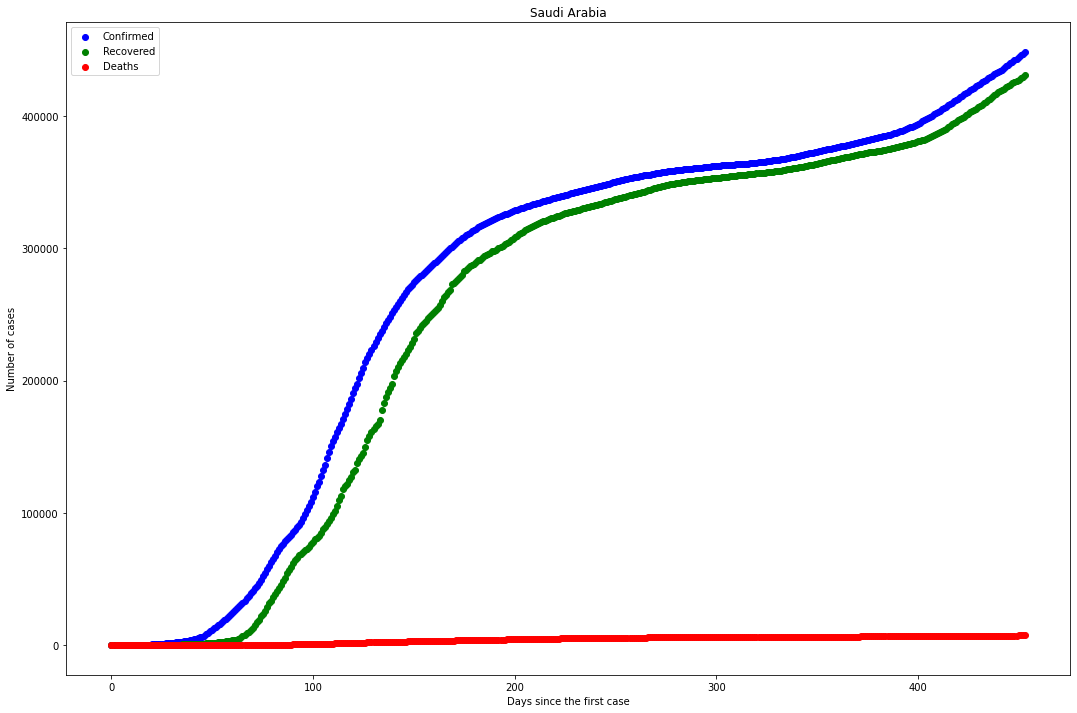

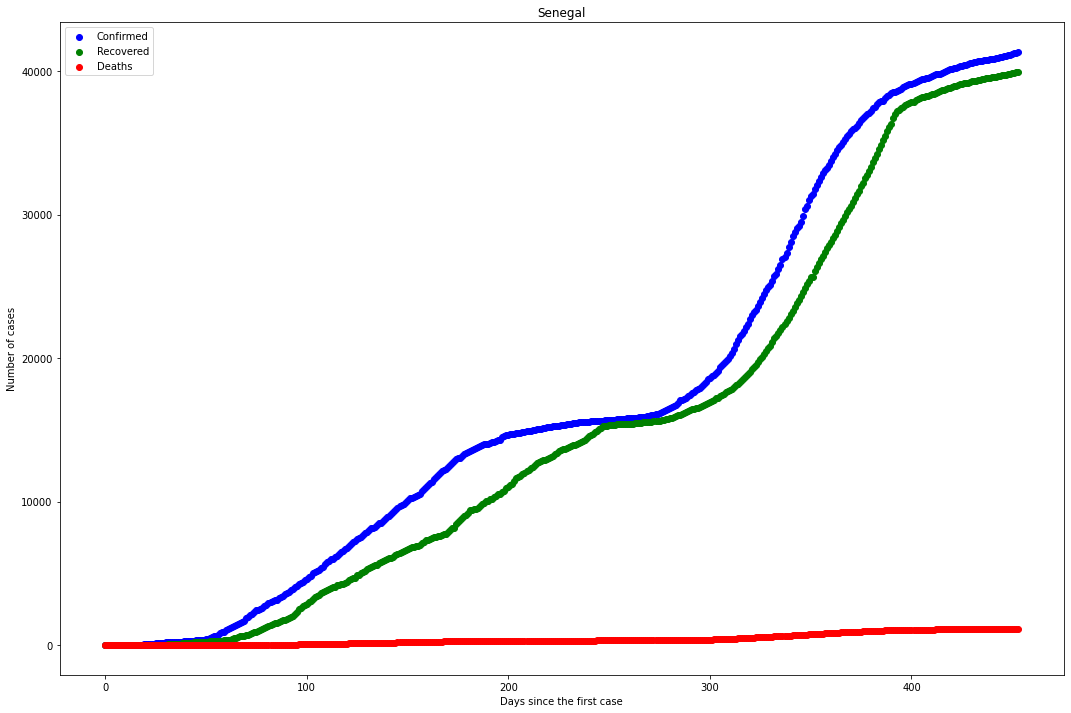

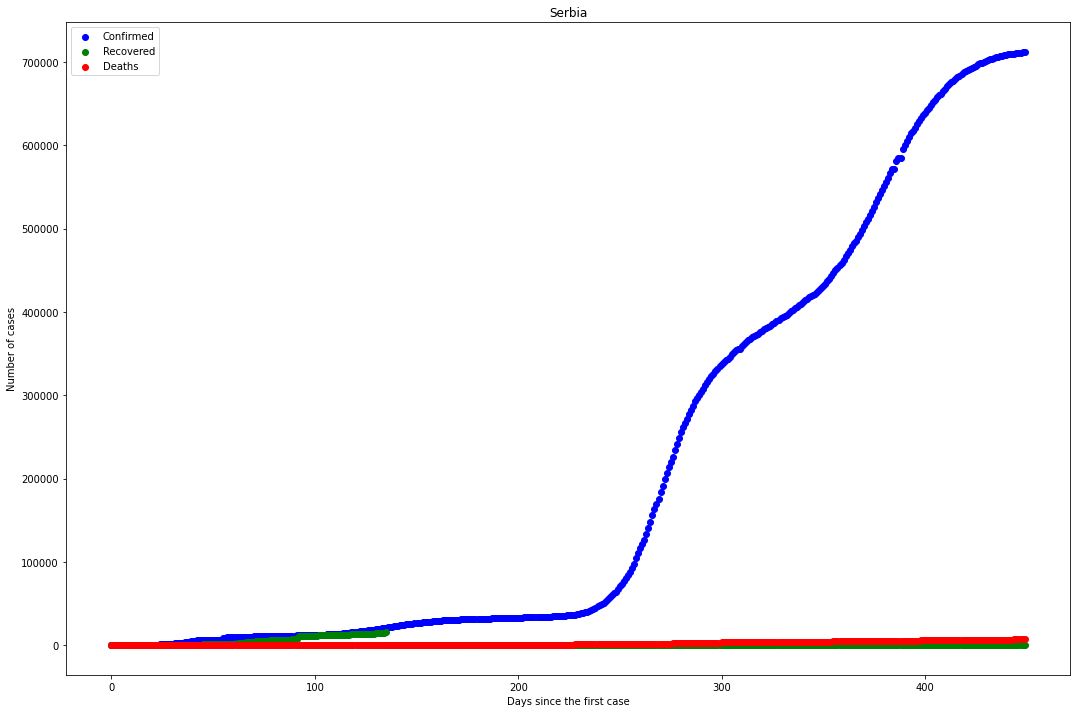

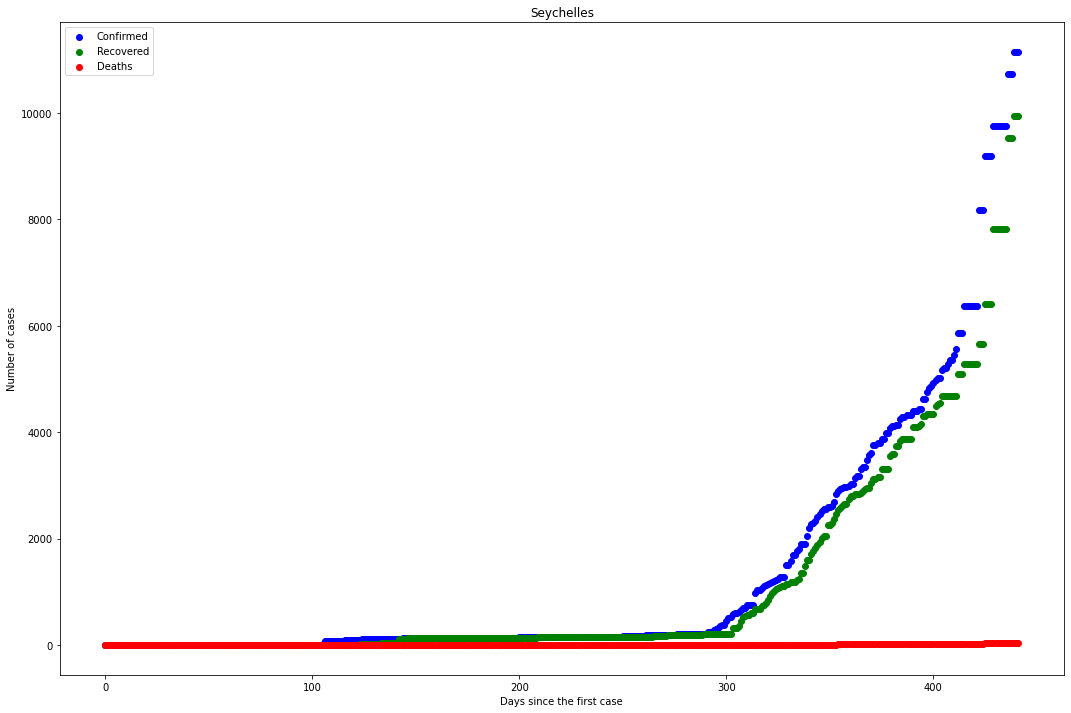

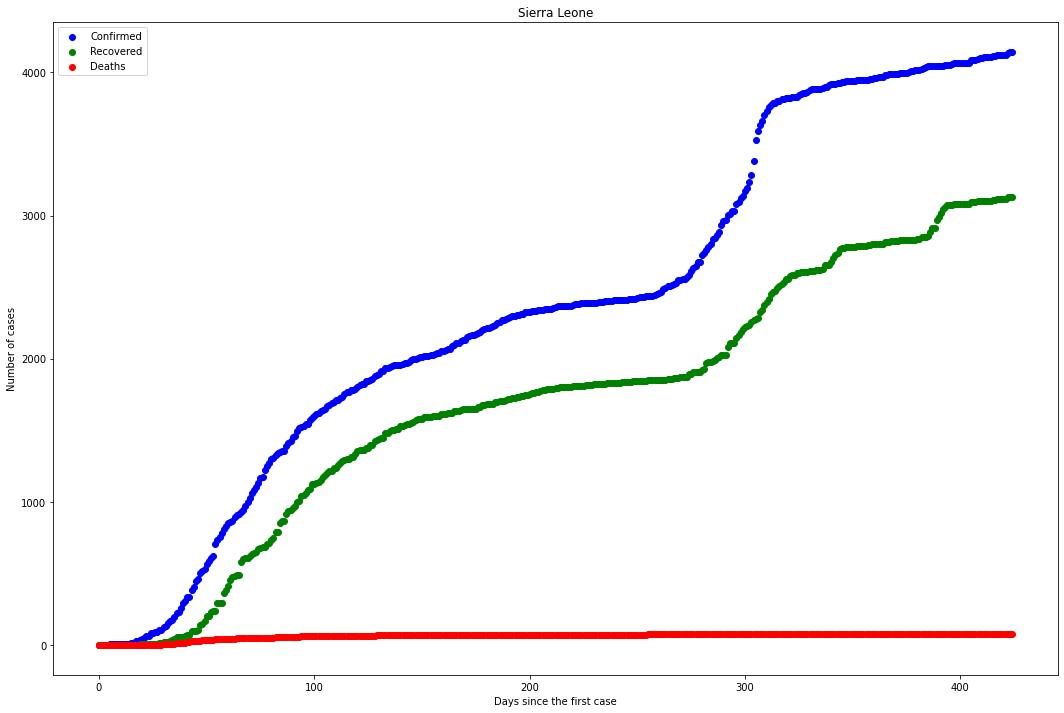

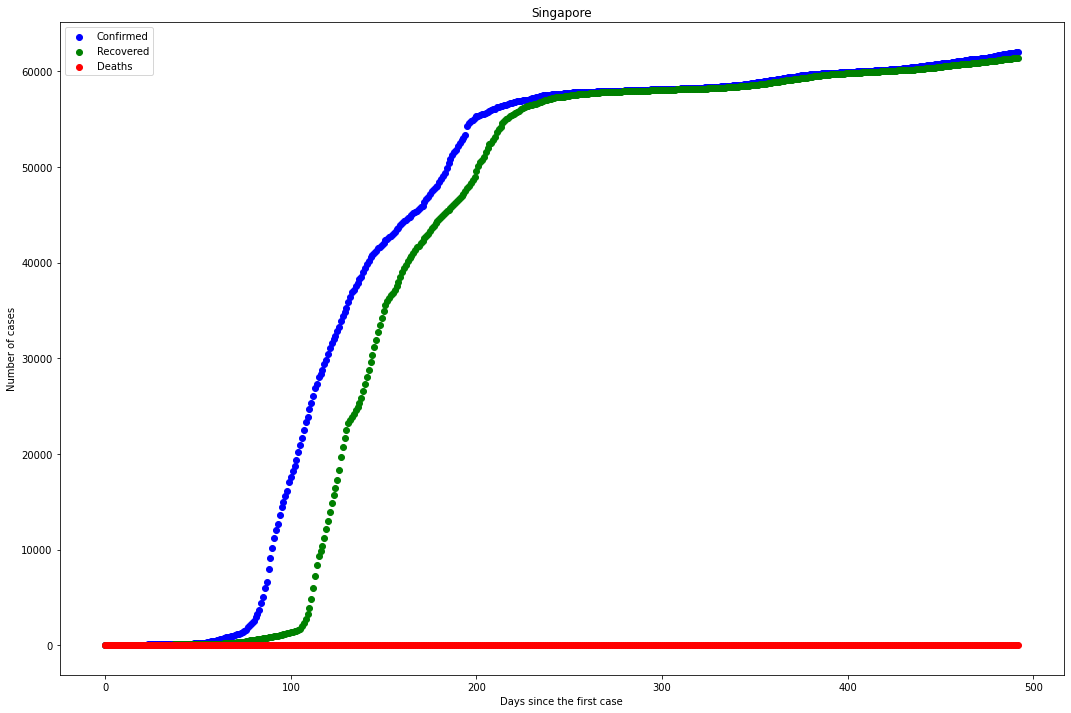

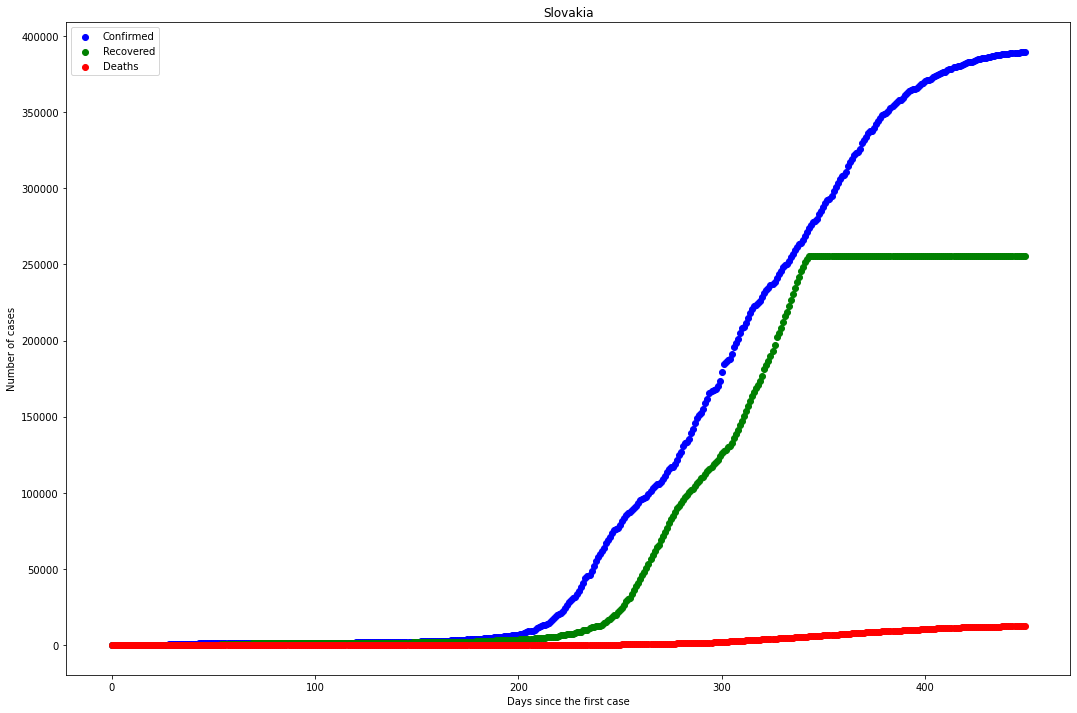

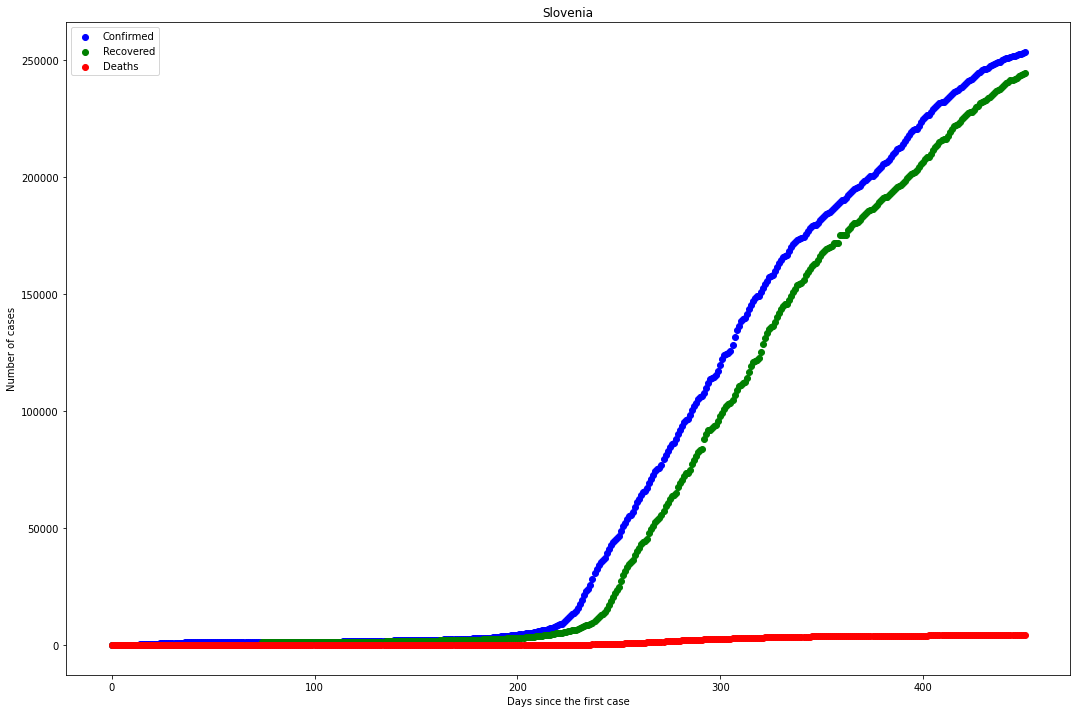

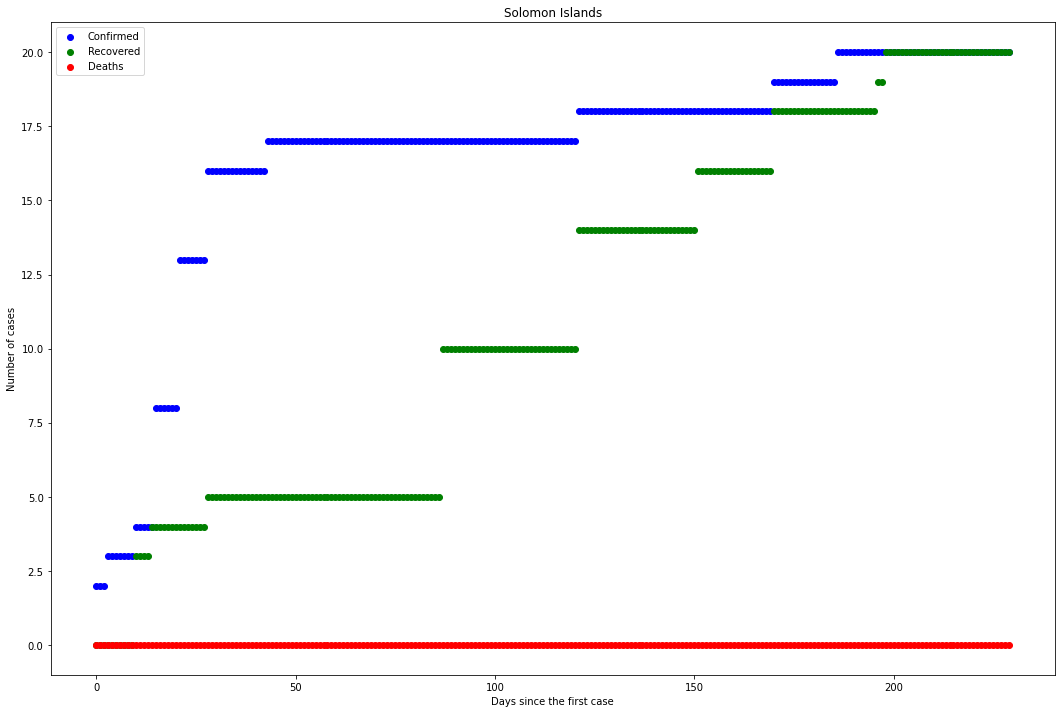

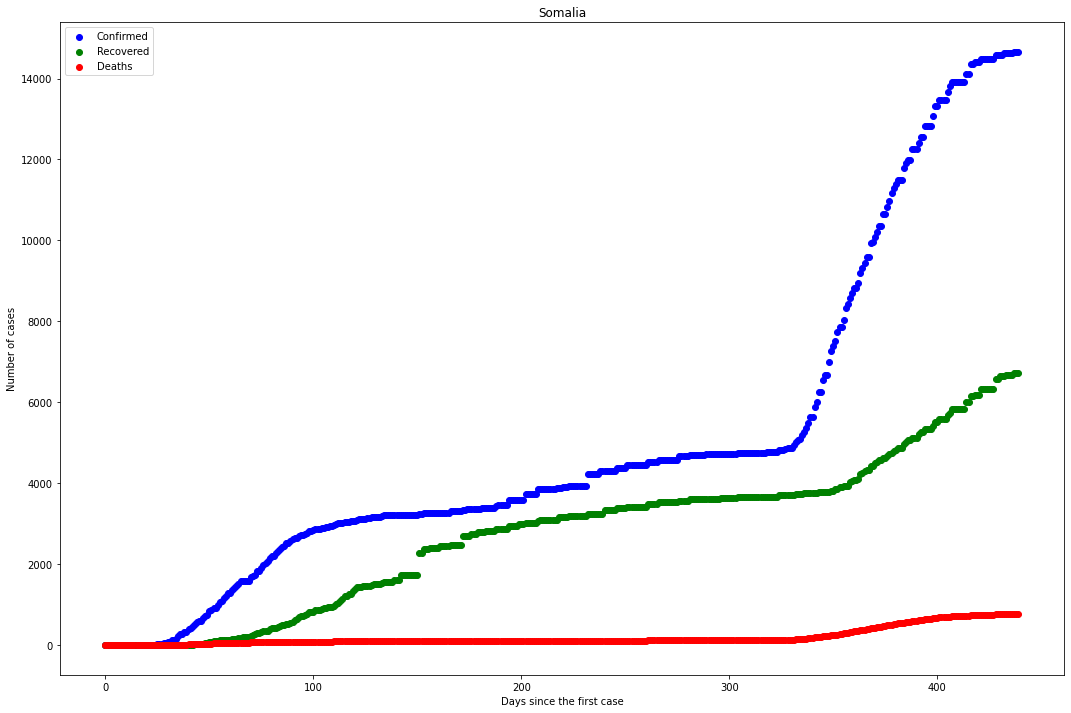

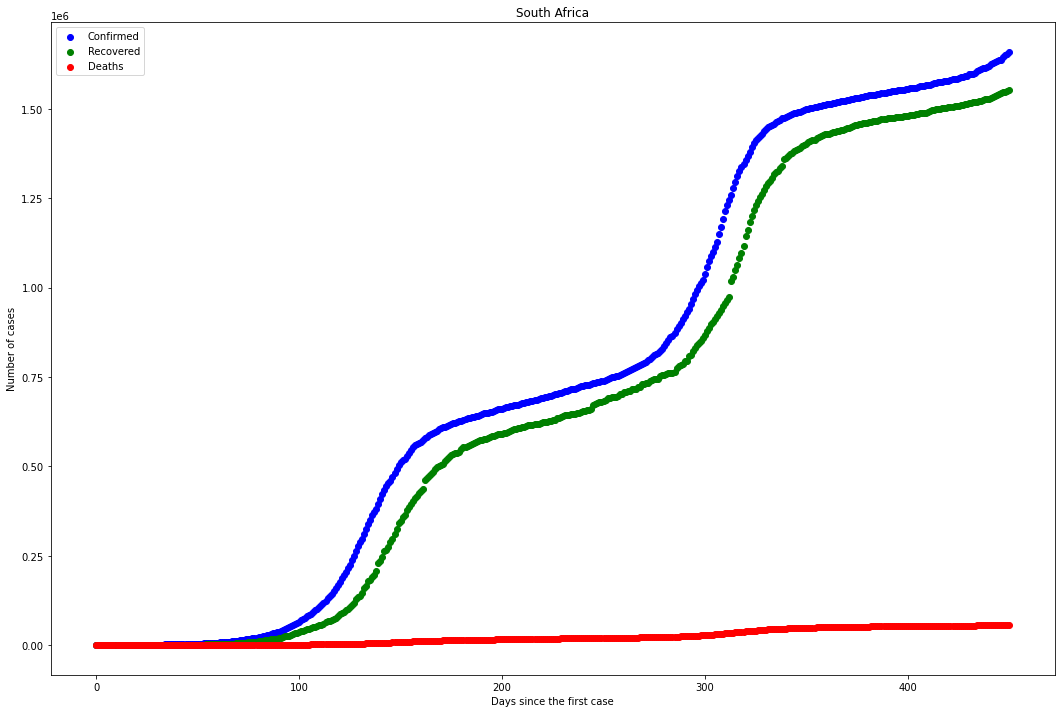

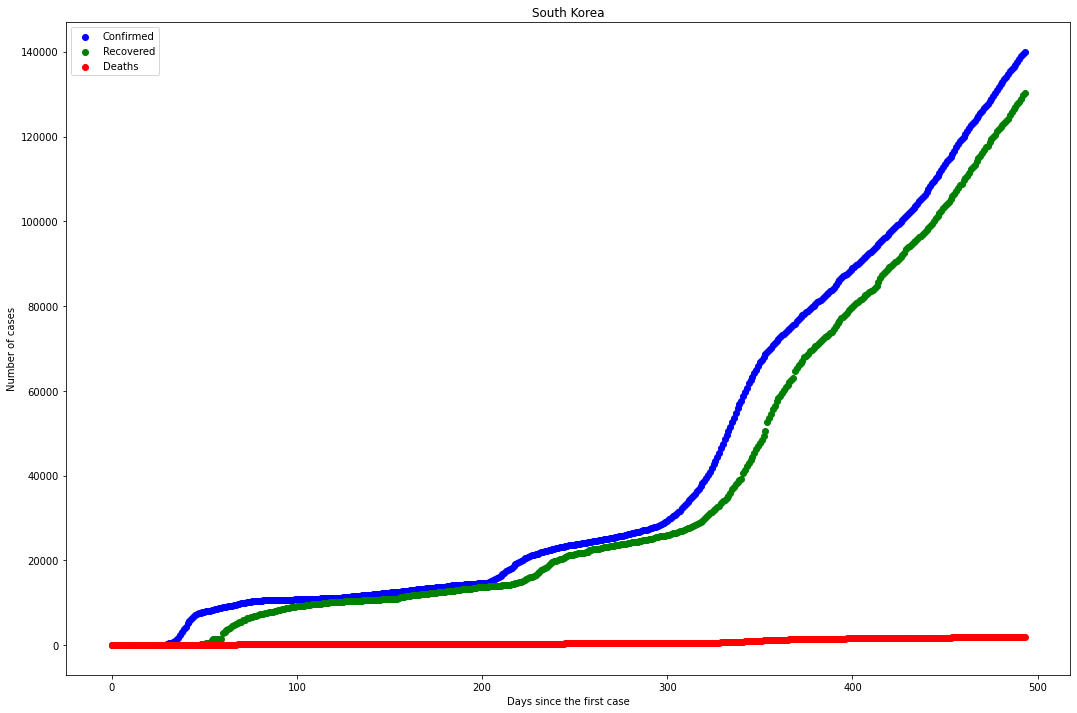

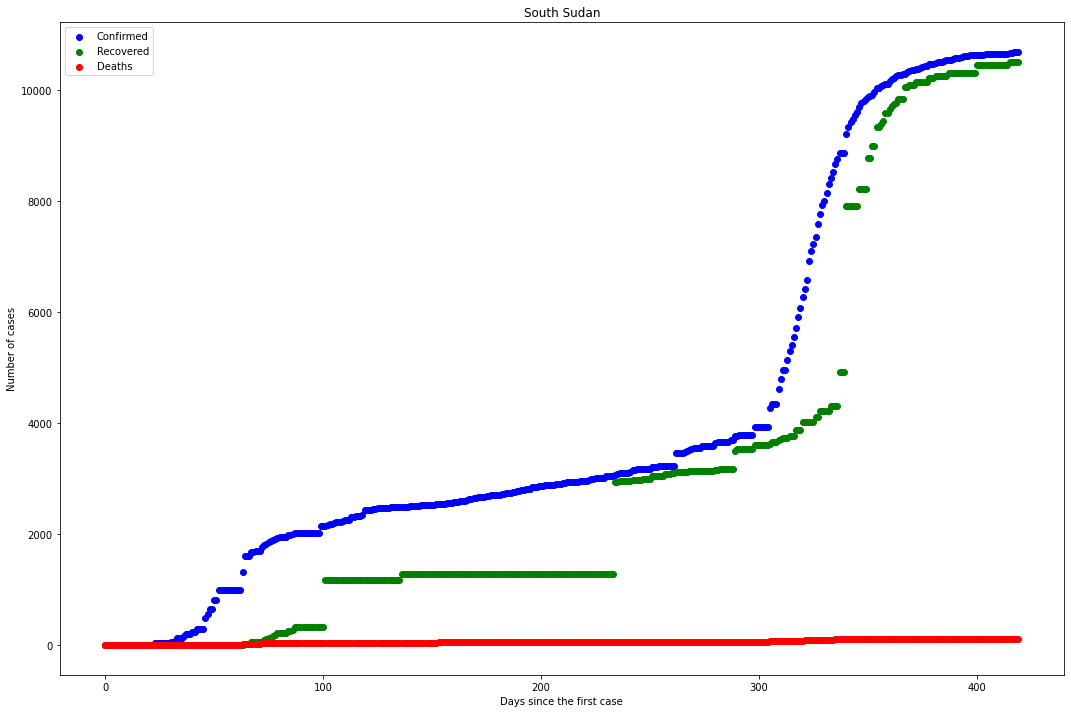

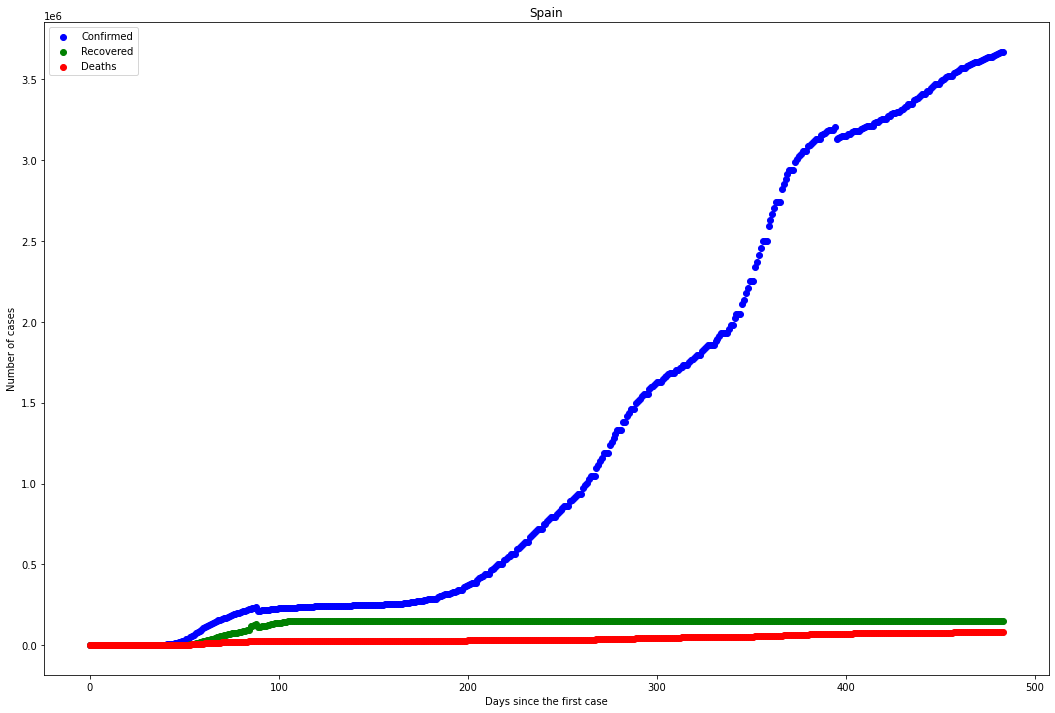

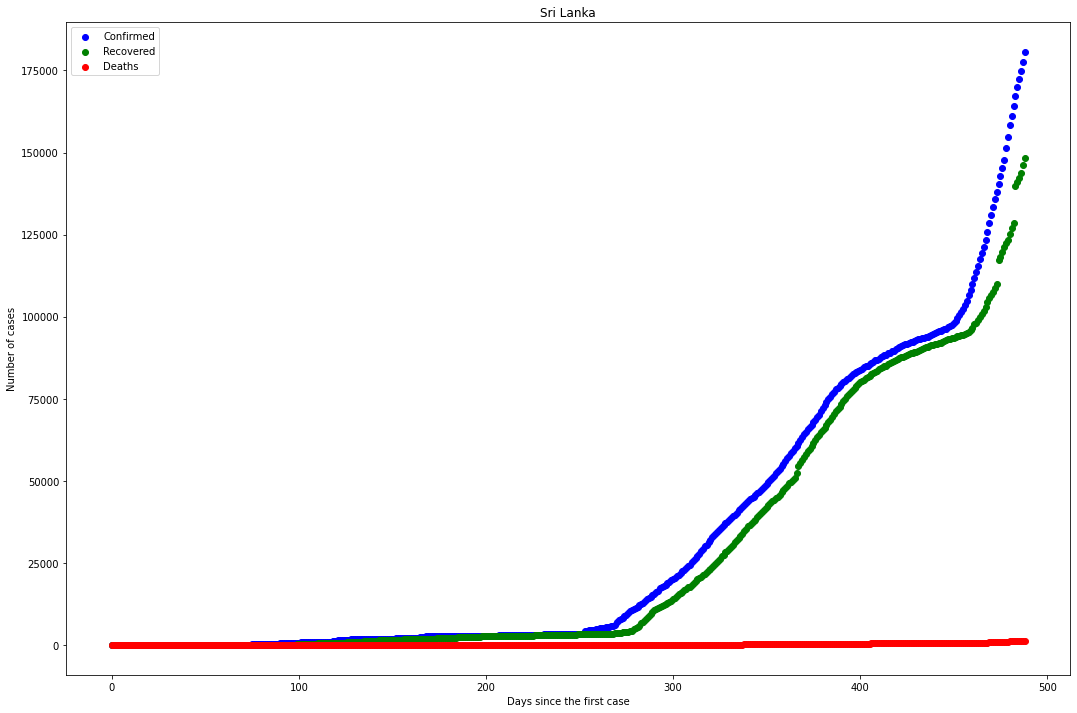

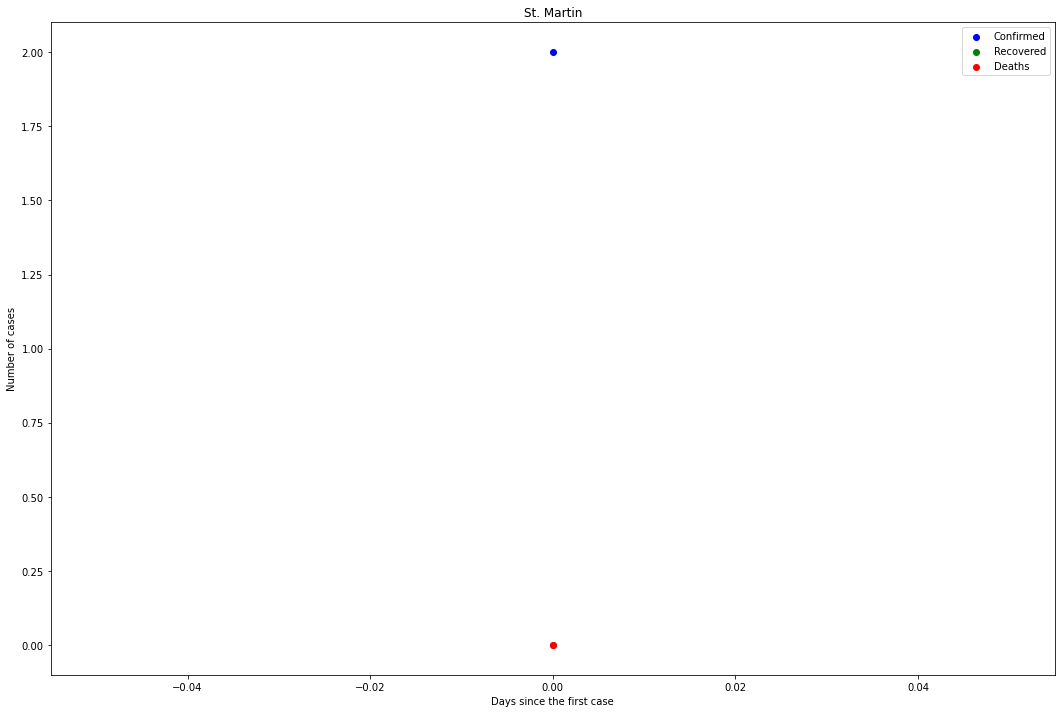

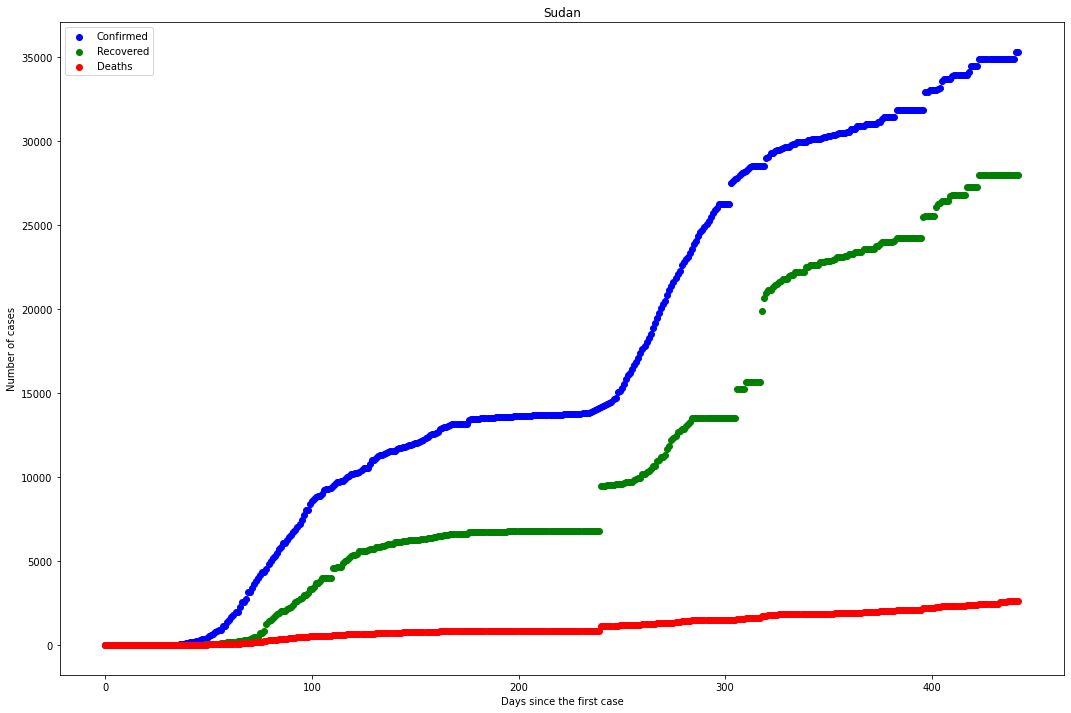

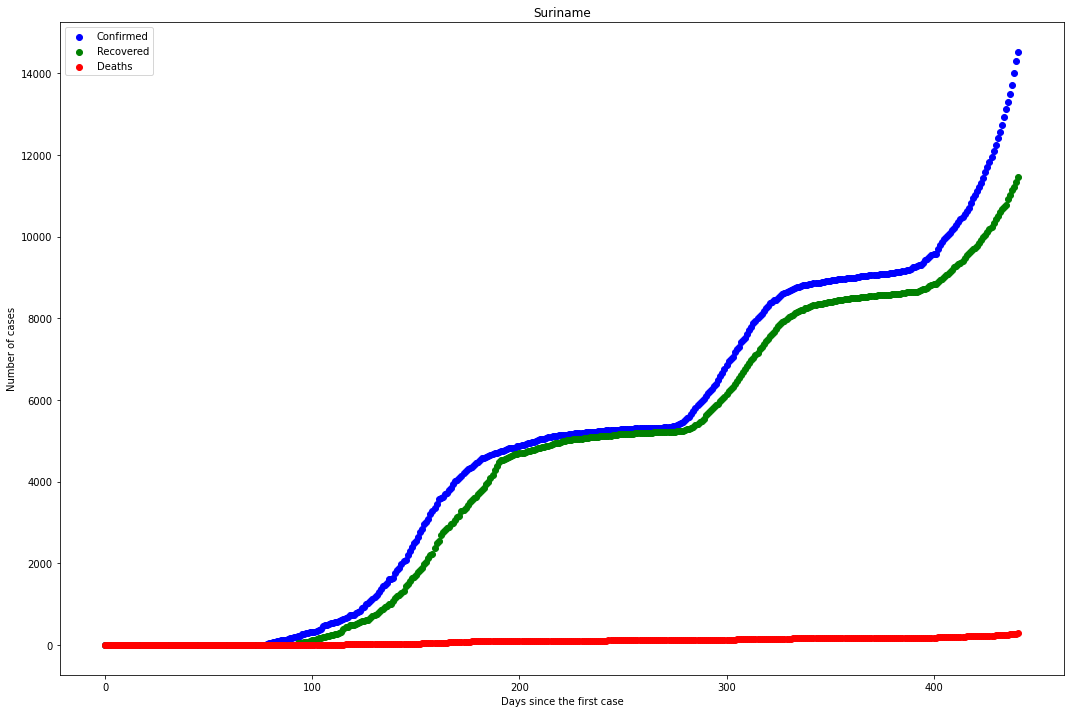

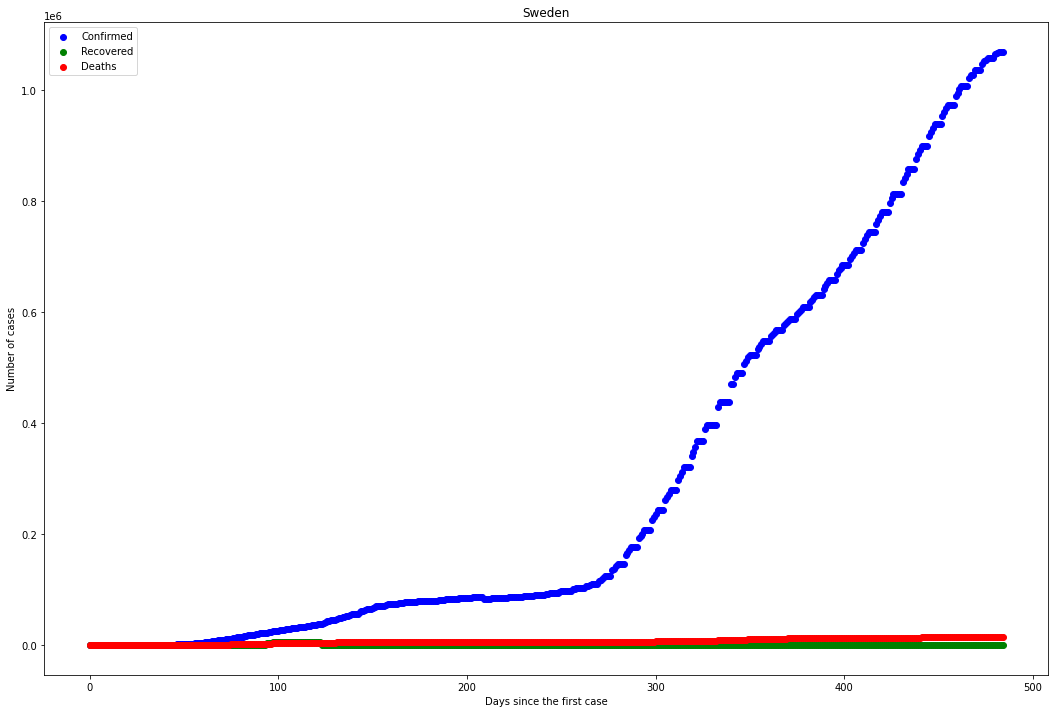

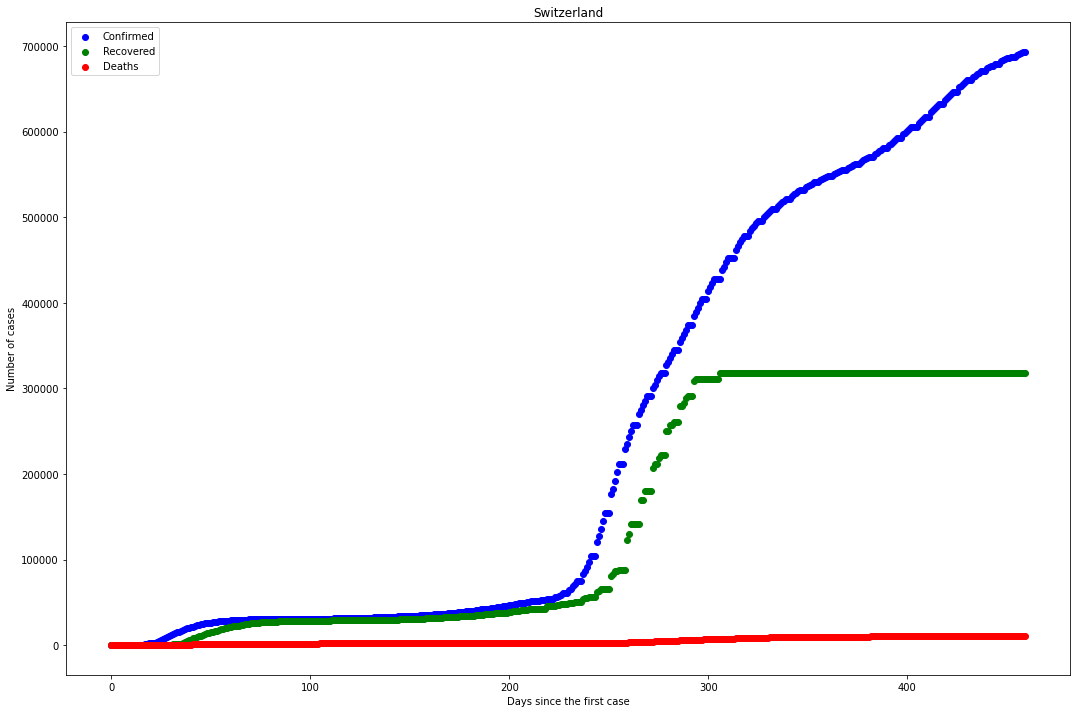

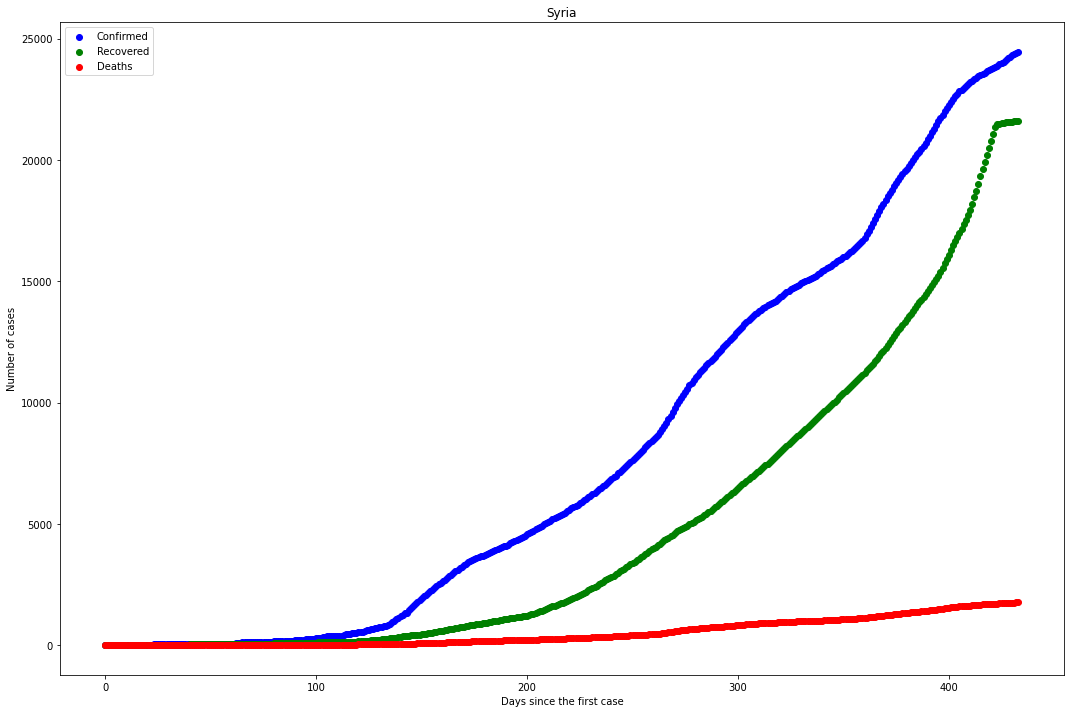

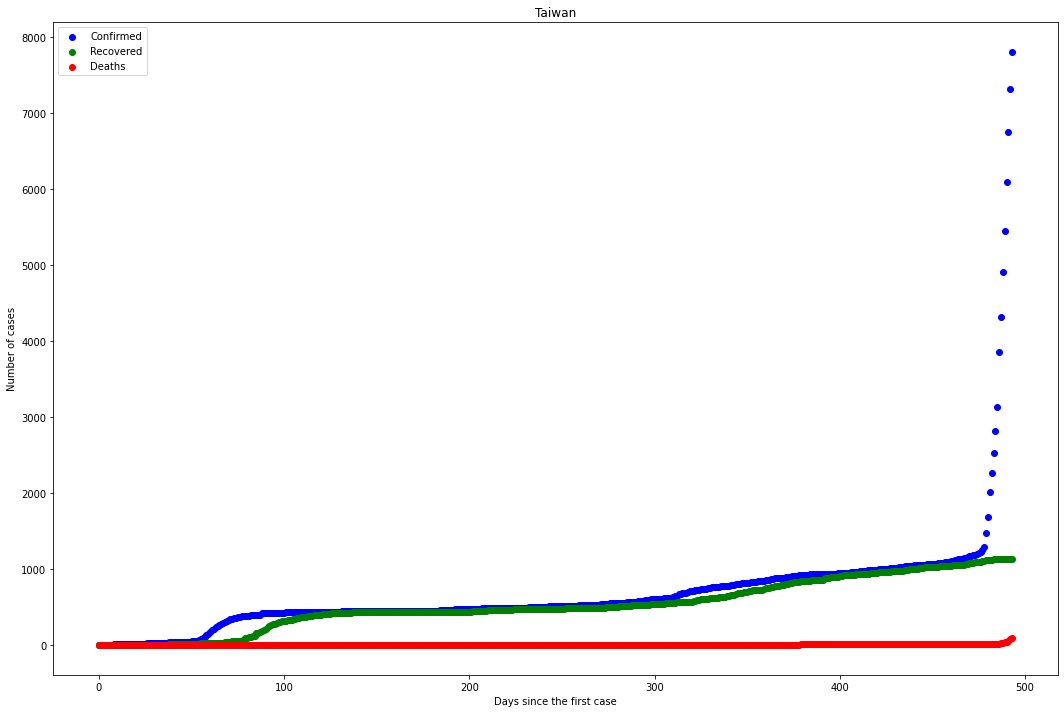

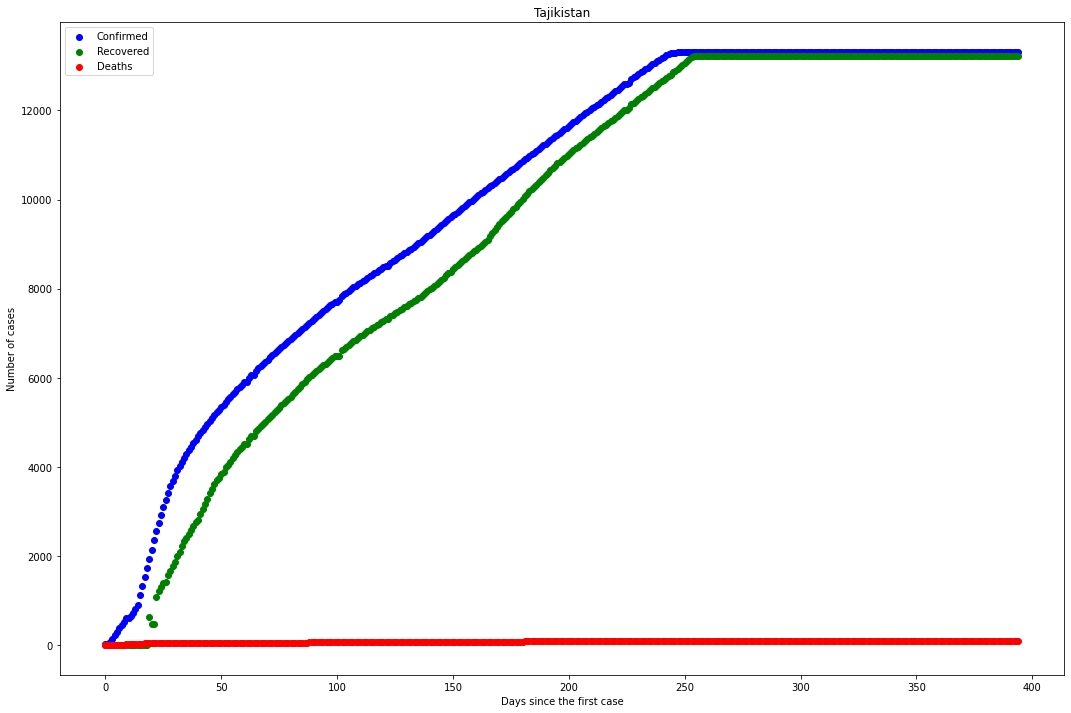

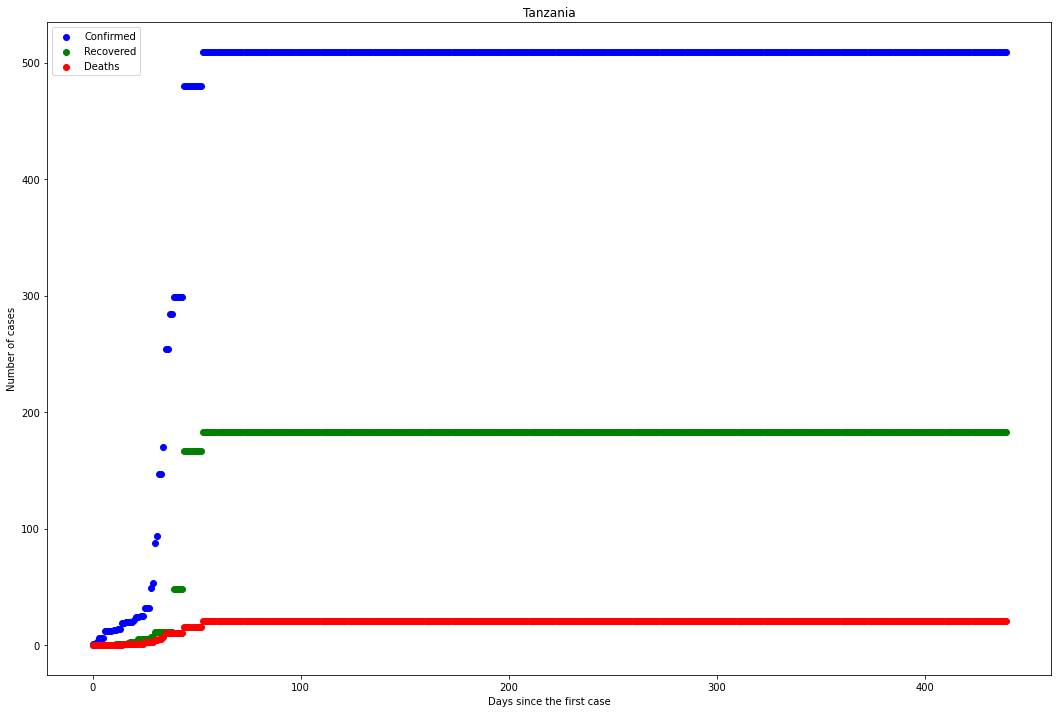

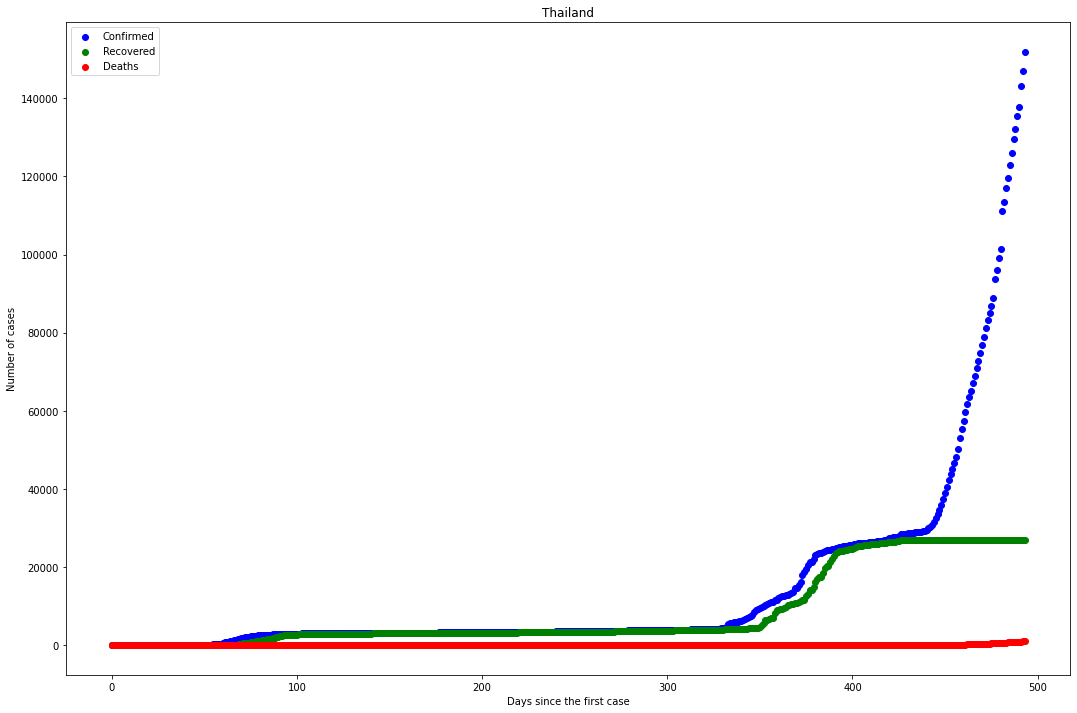

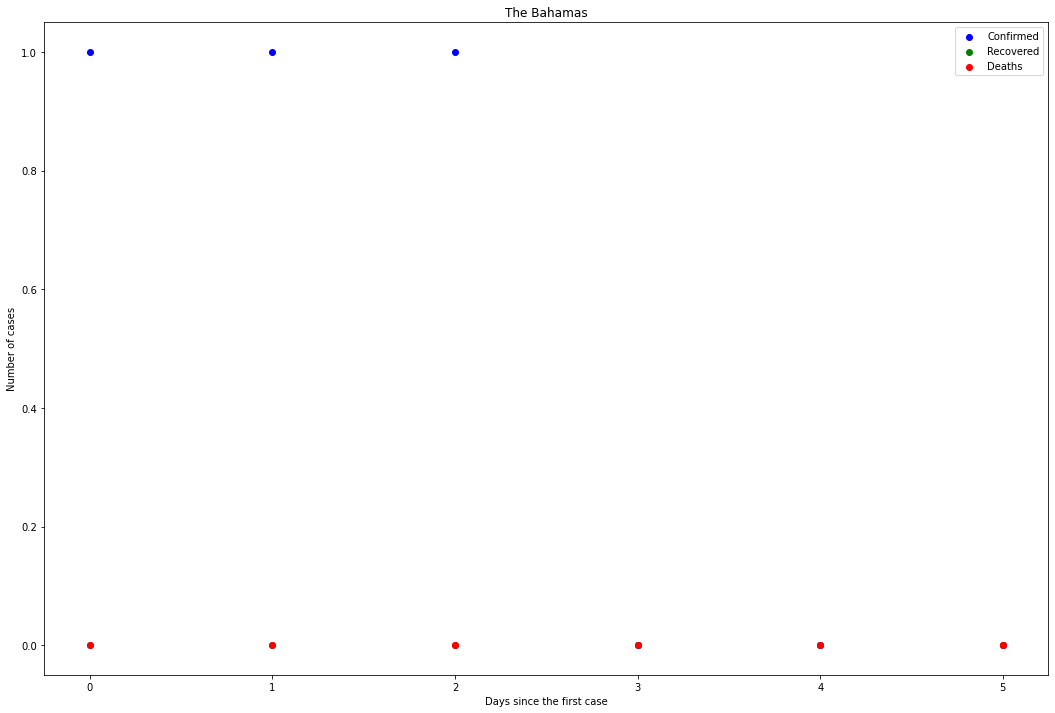

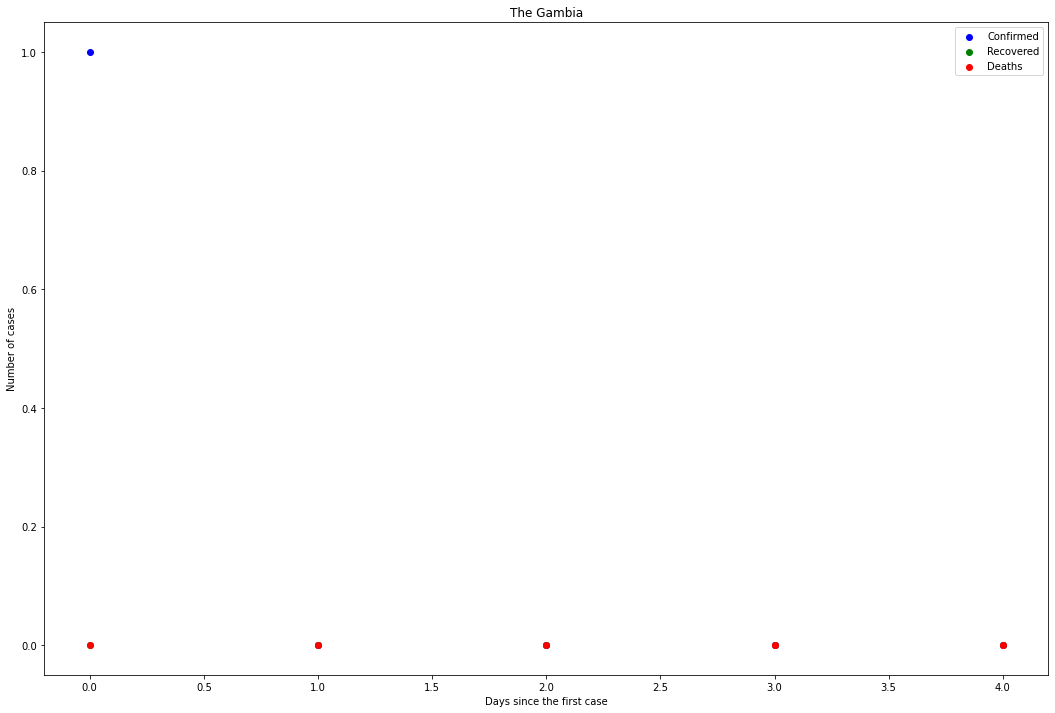

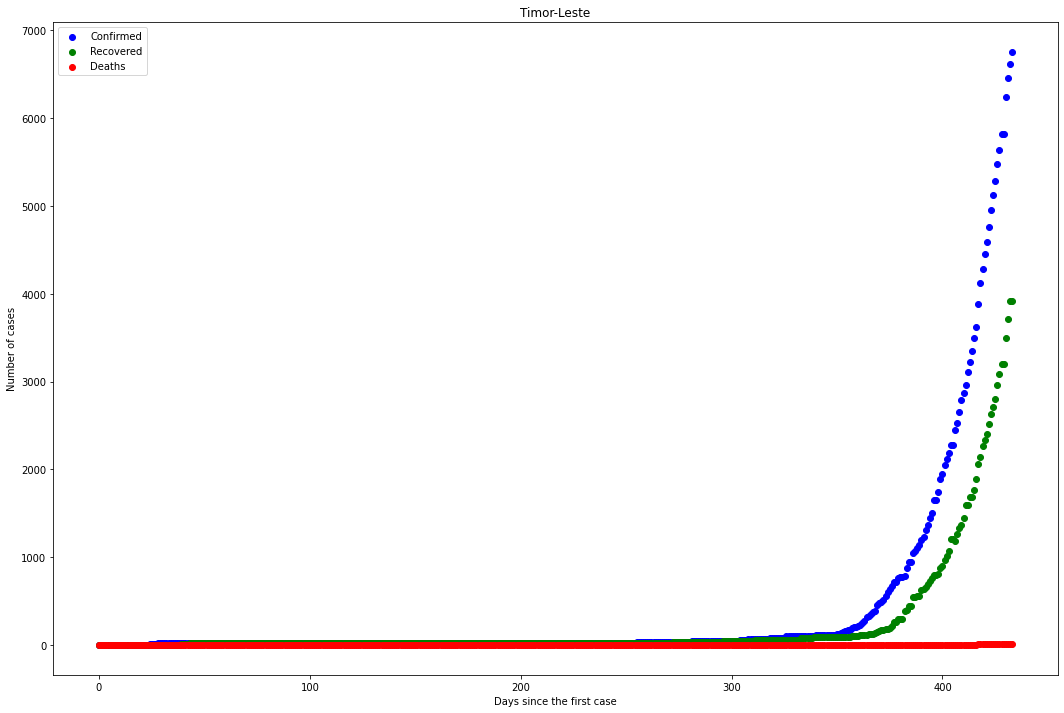

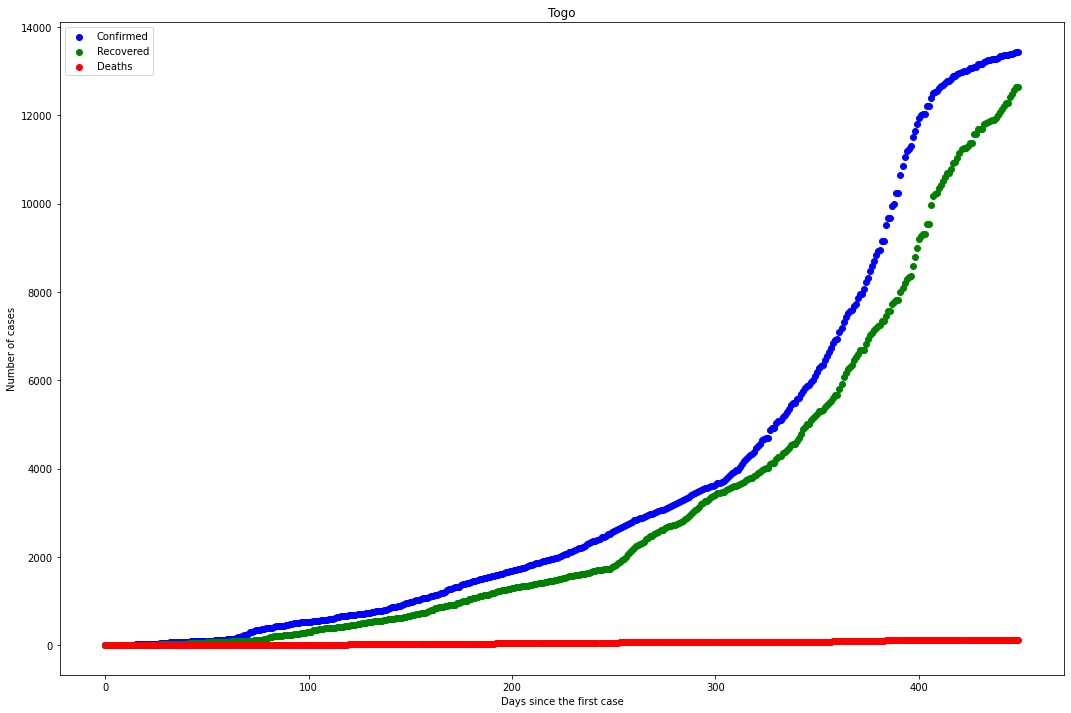

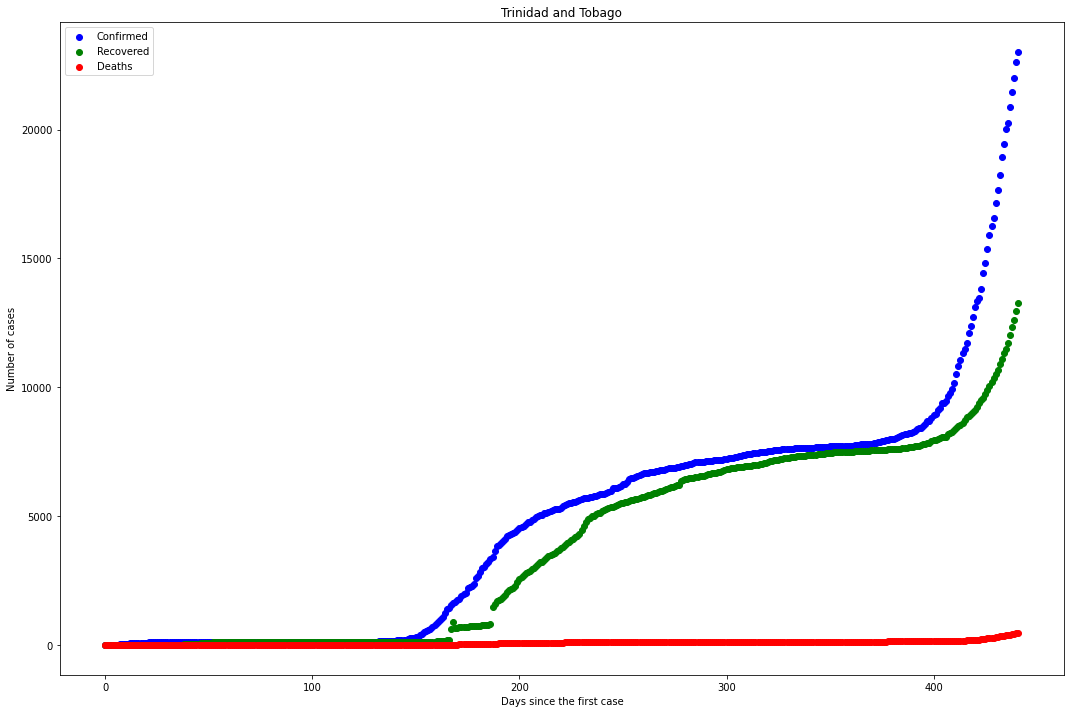

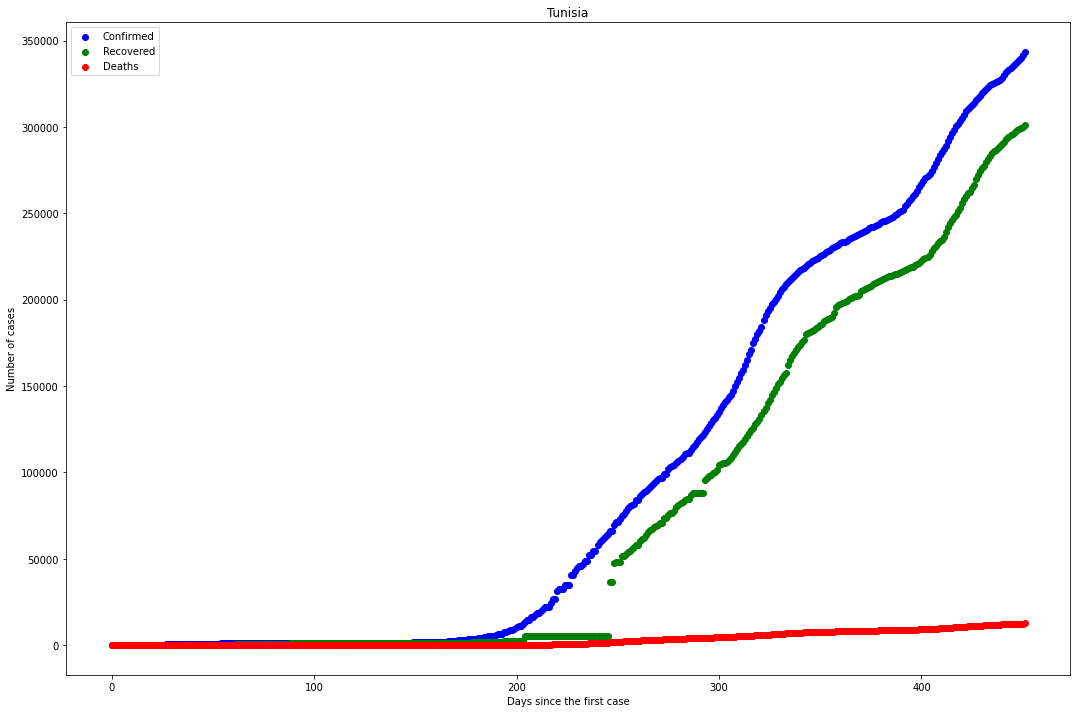

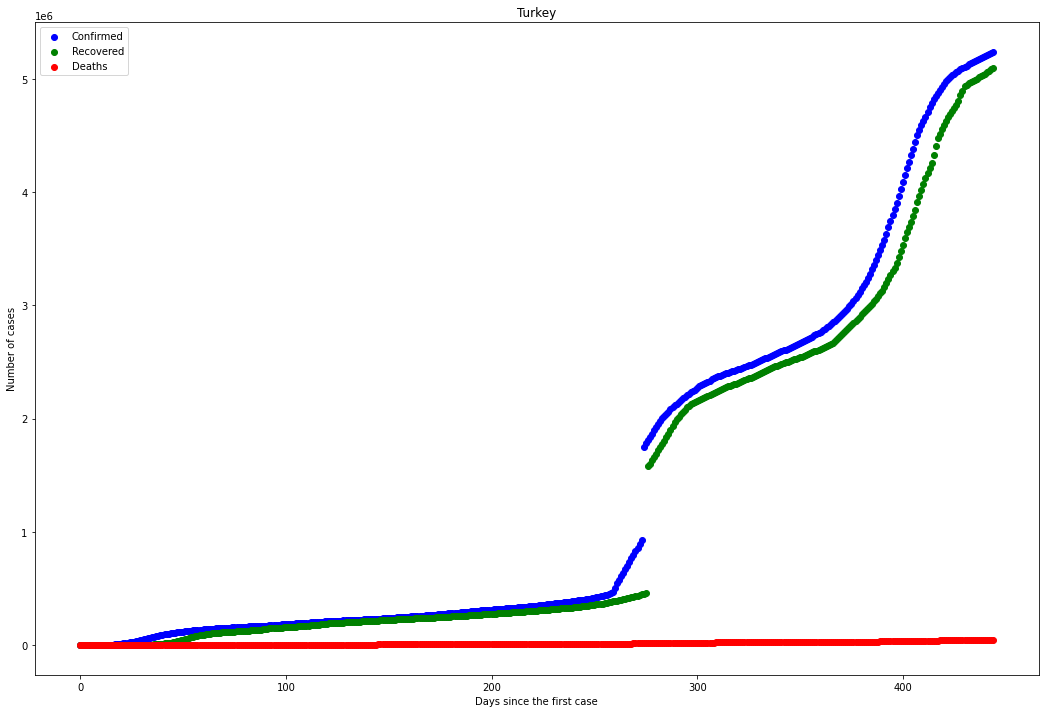

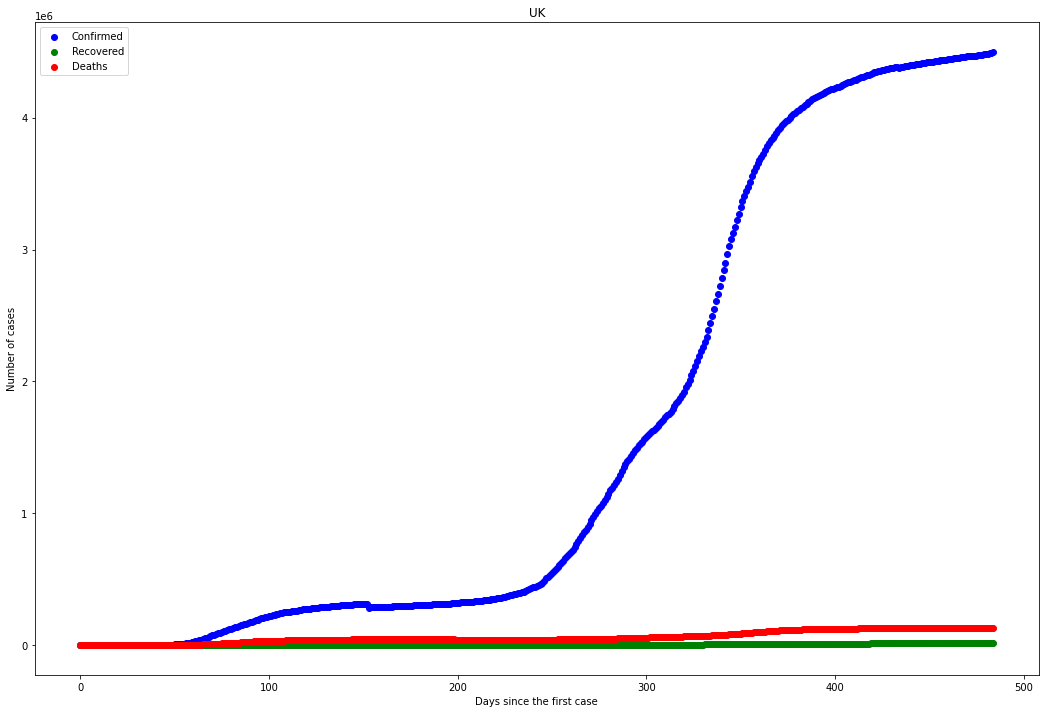

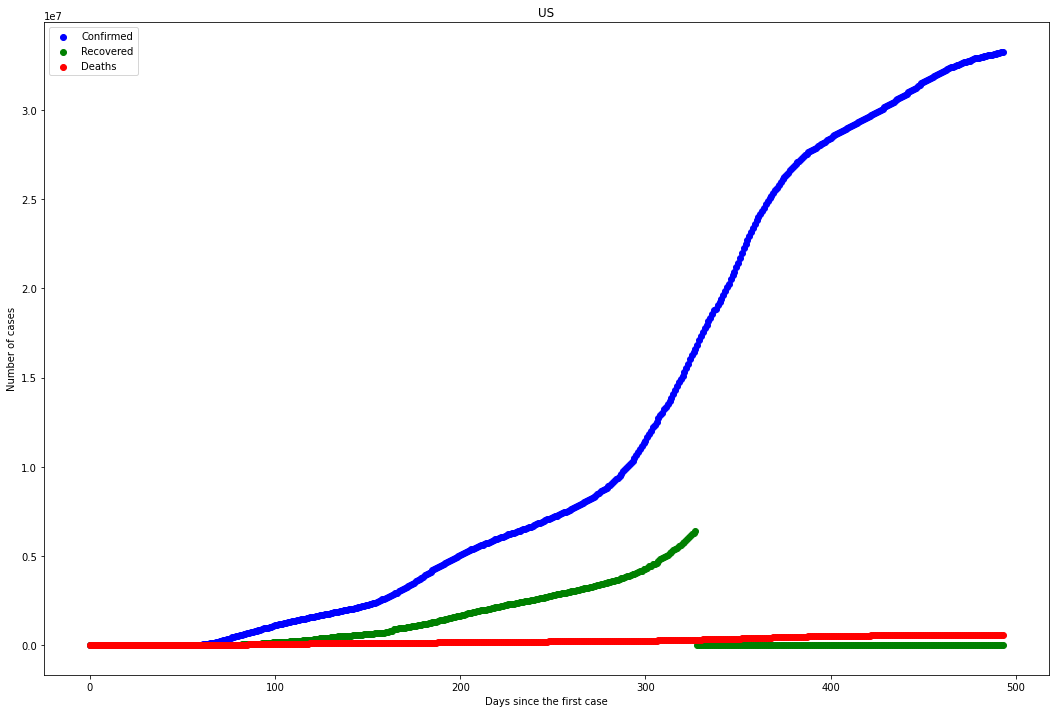

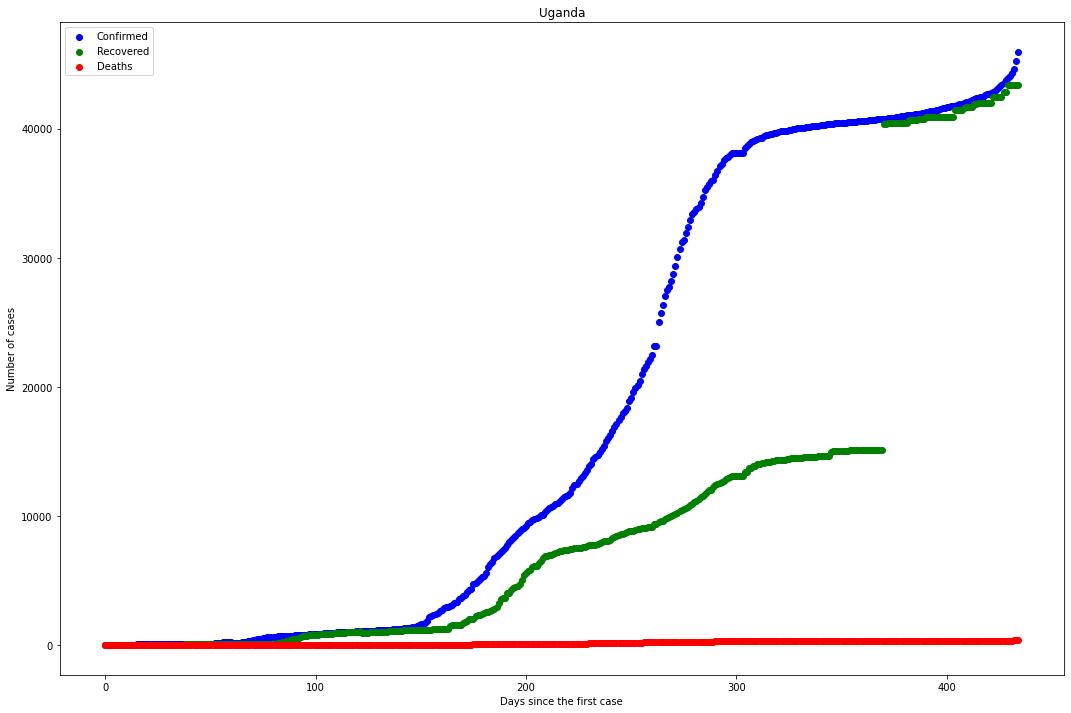

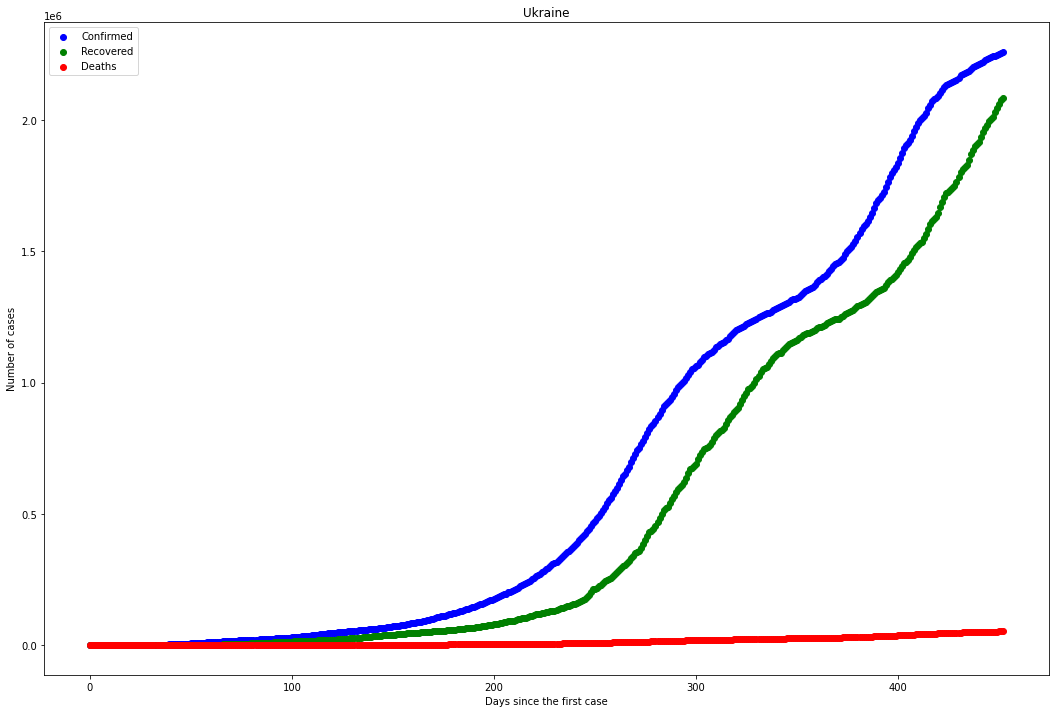

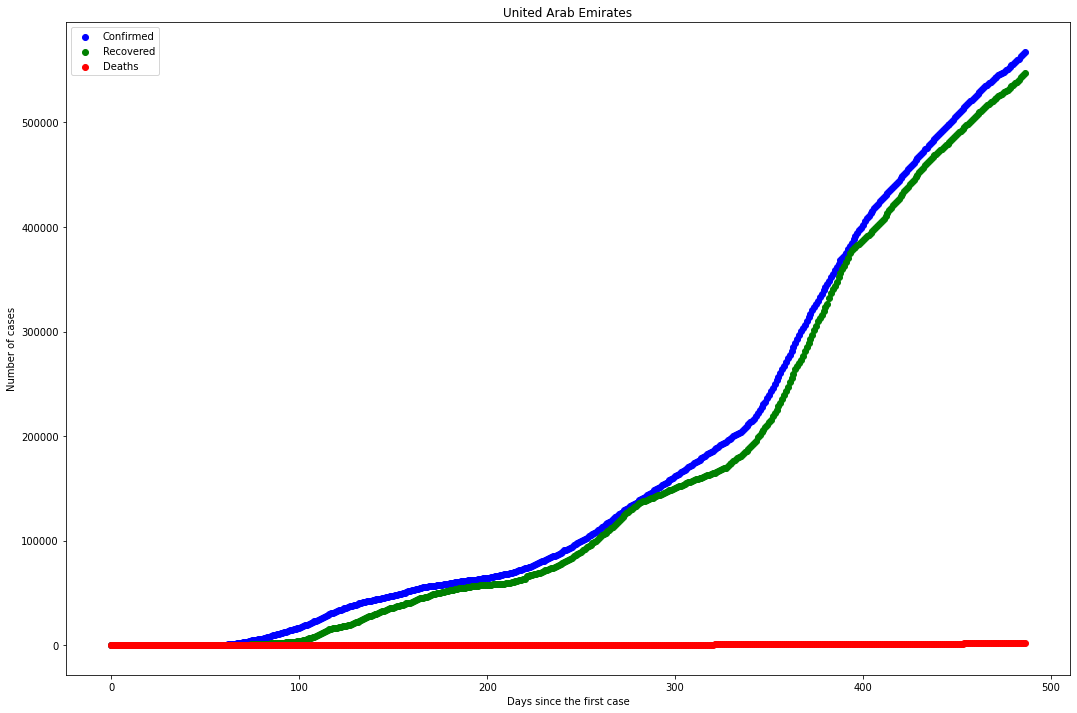

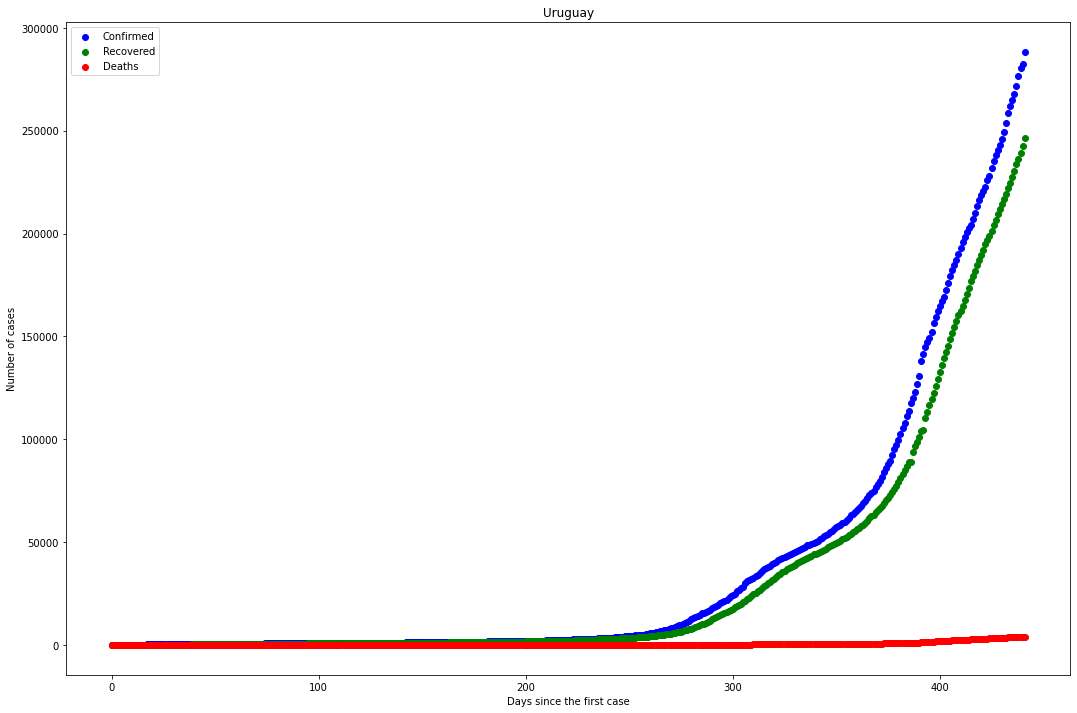

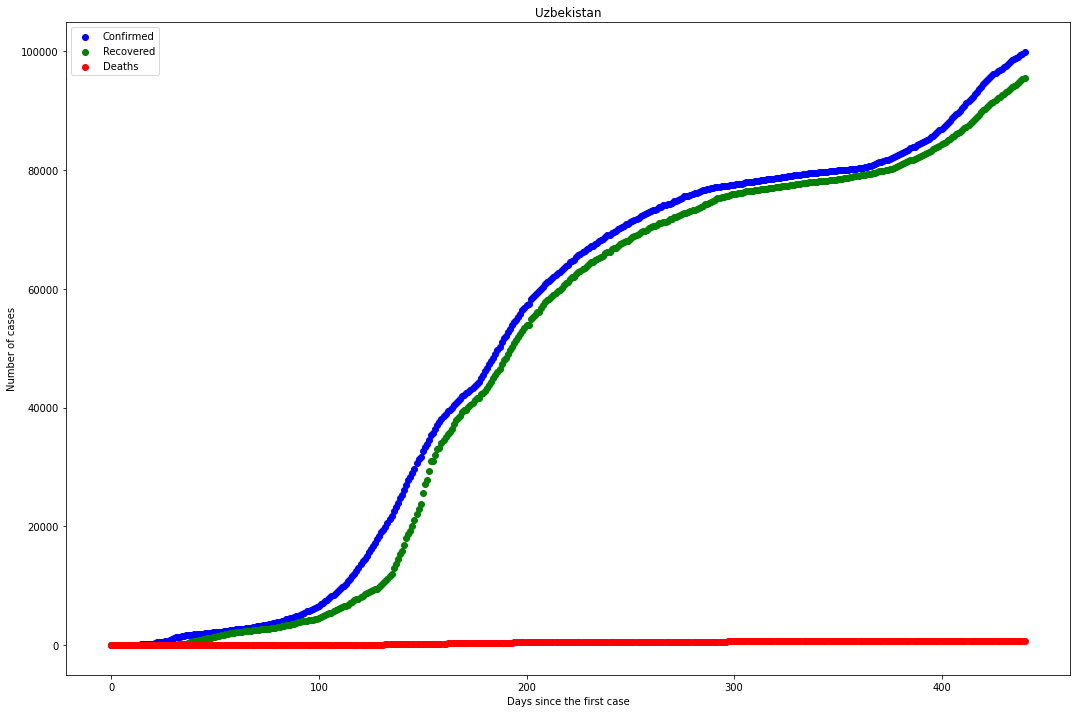

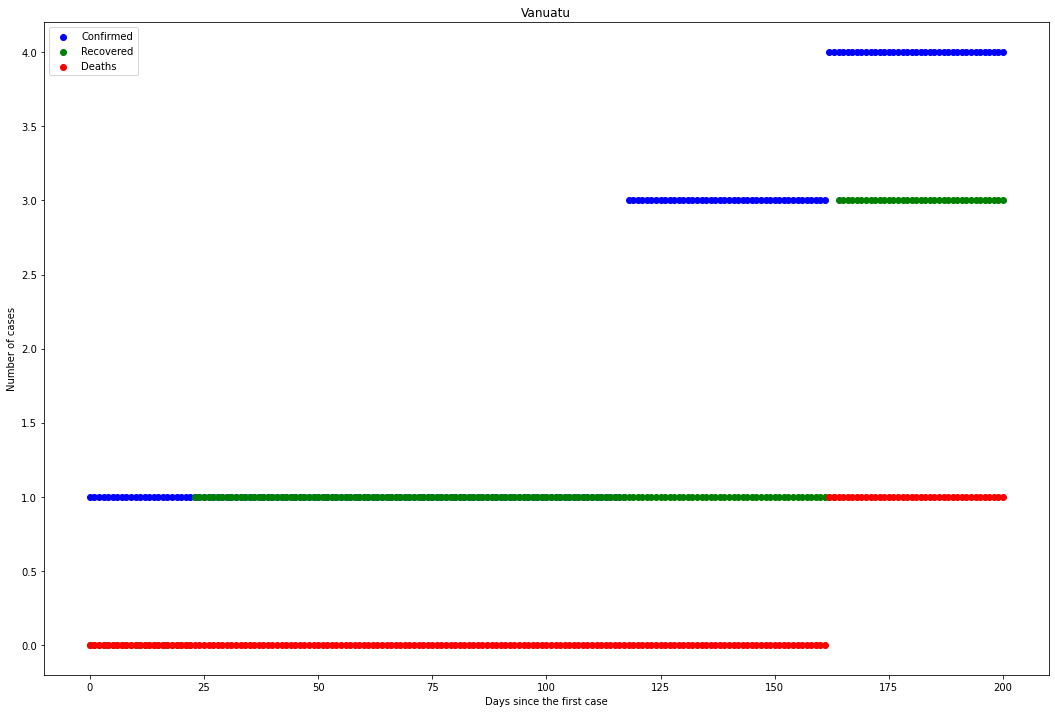

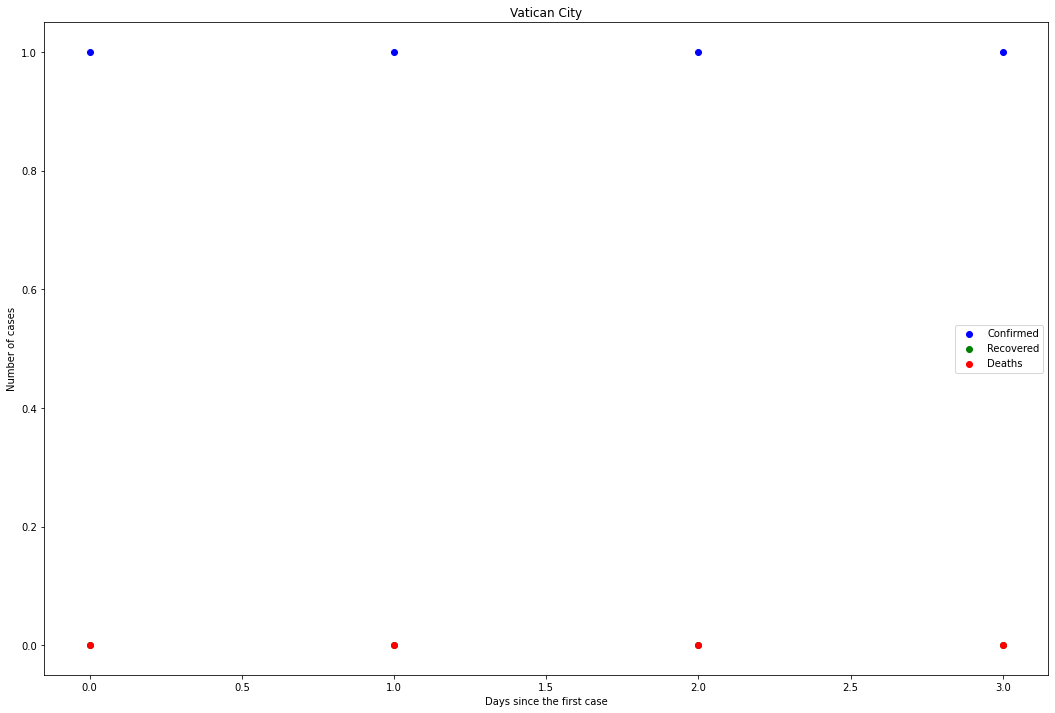

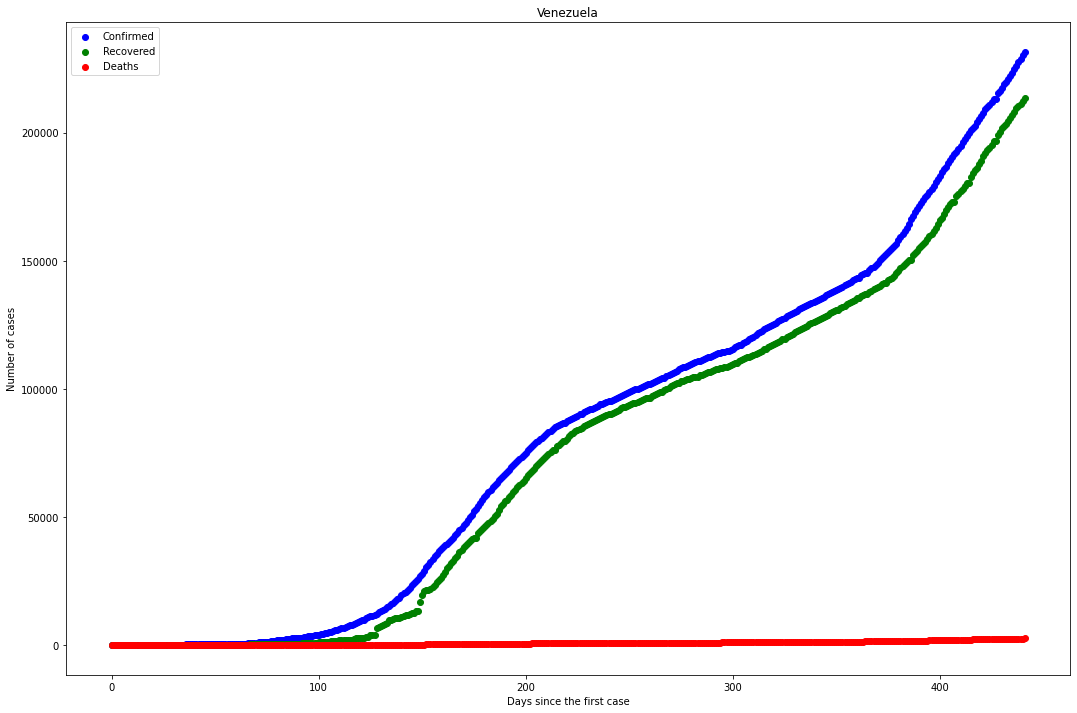

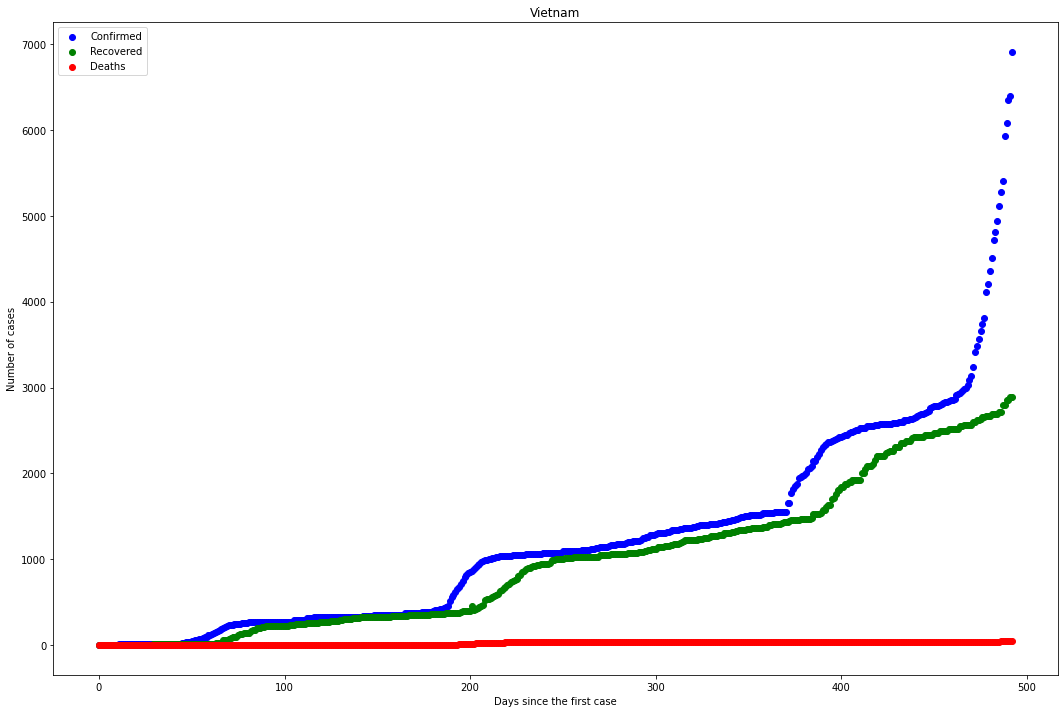

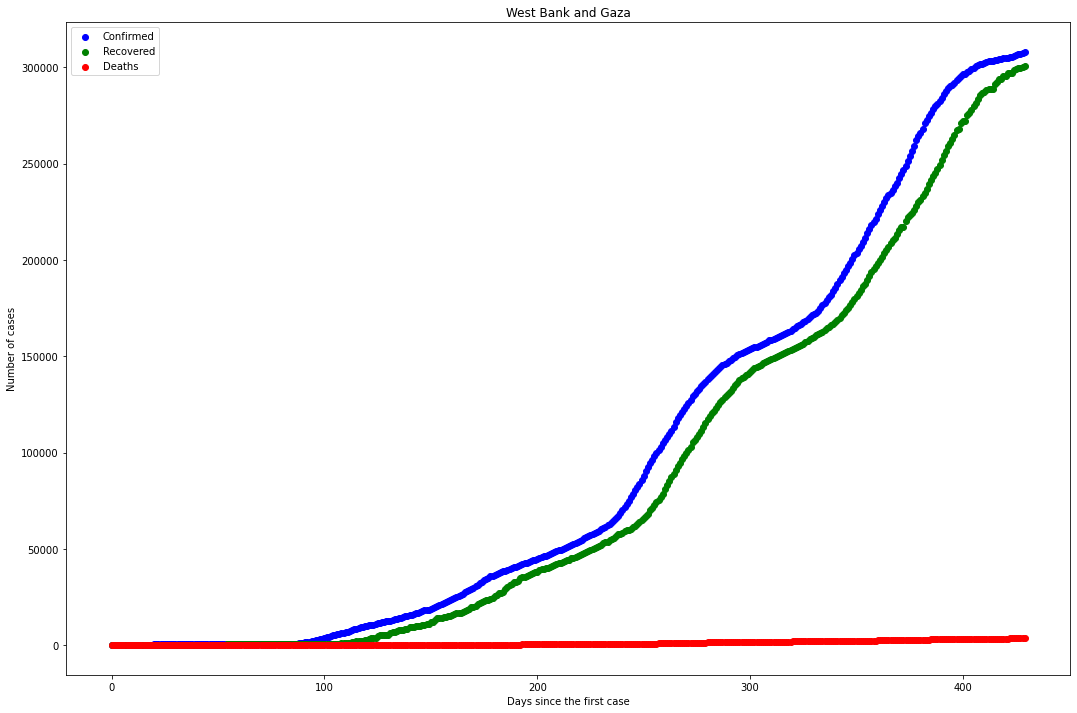

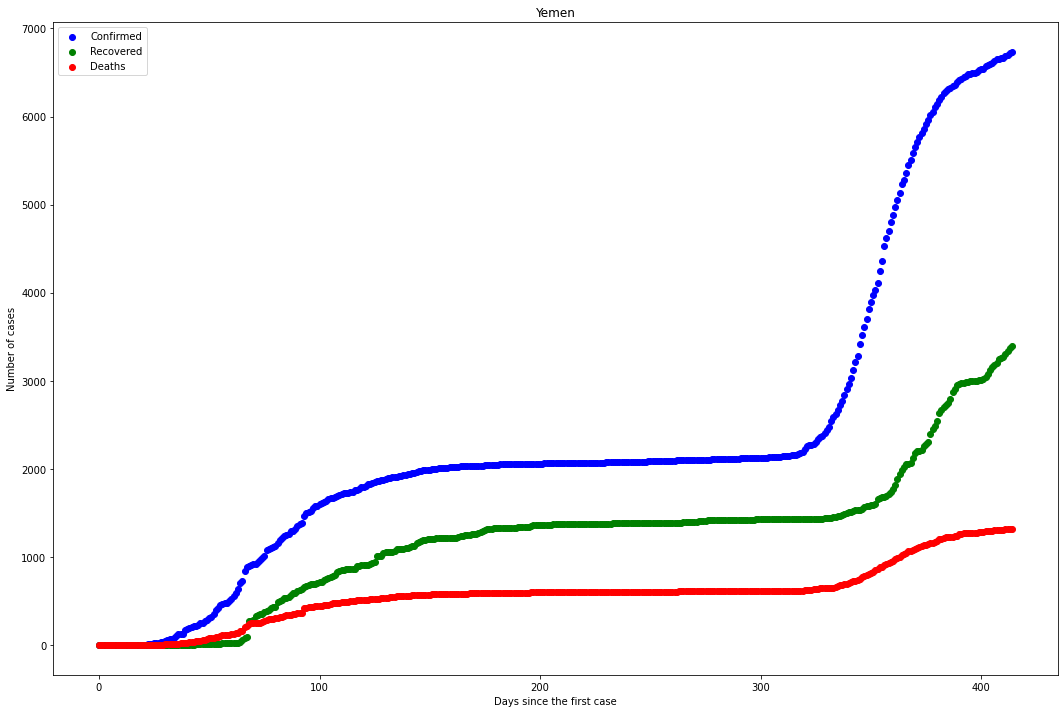

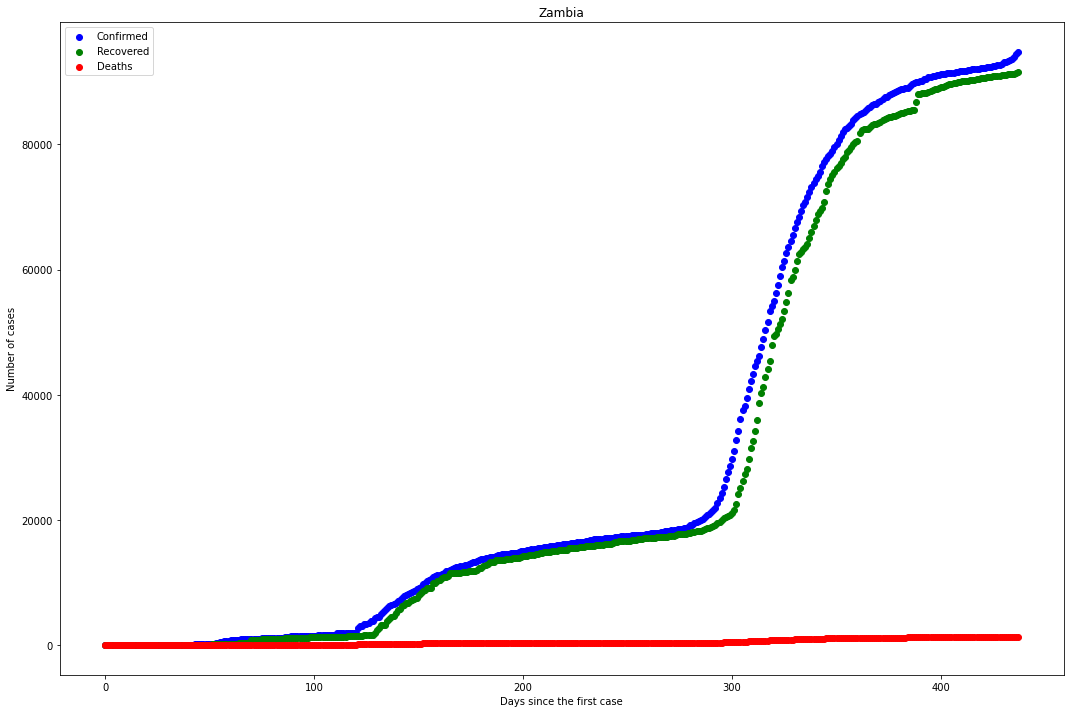

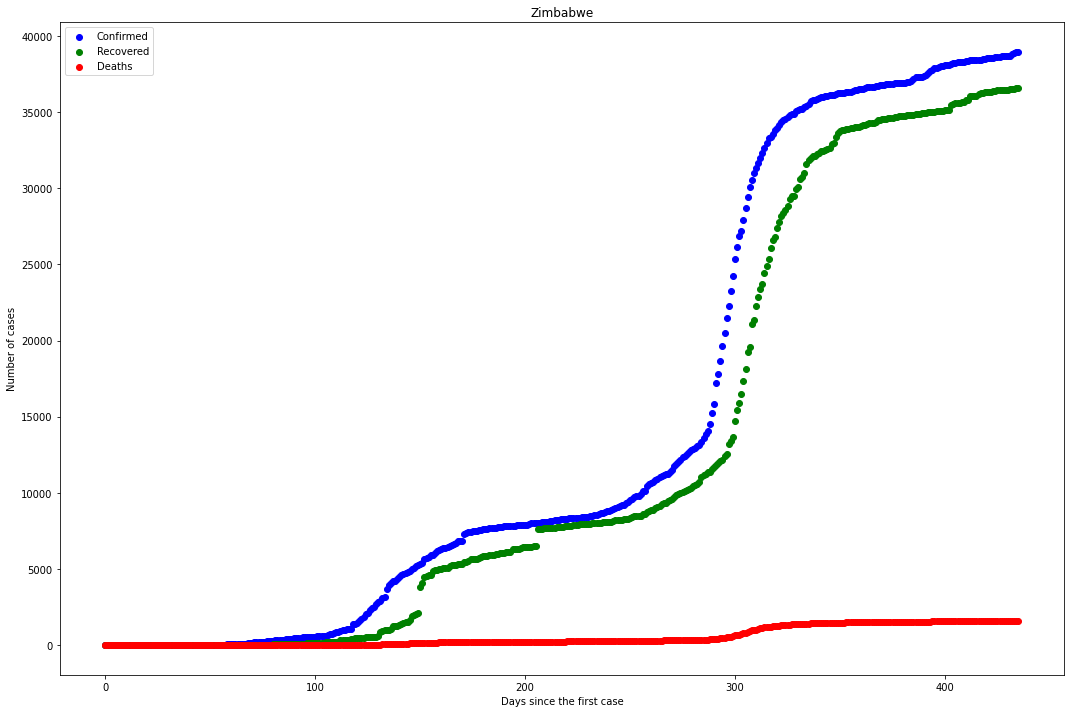

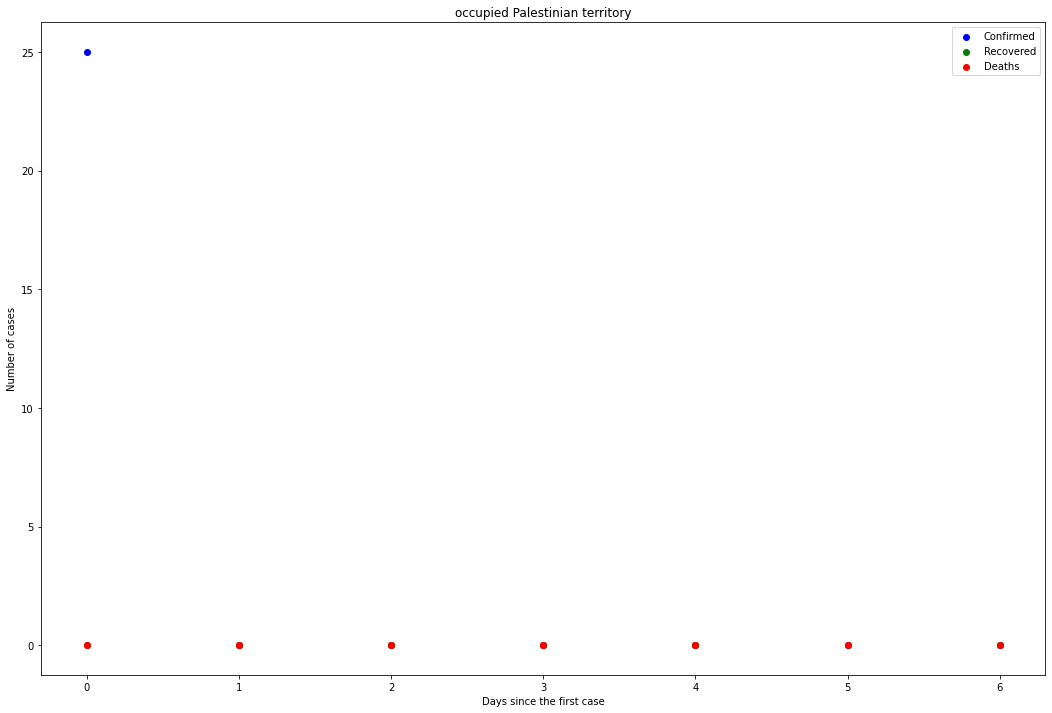

In [17]:
for i in range(0, len(countries)):
  X = df3[df3['Country']==countries[i]].reset_index()
  plt.scatter(np.arange(0,len(X)), X['Confirmed'], color='blue', label='Confirmed')
  plt.scatter(np.arange(0,len(X)), X['Recovered'], color='green', label='Recovered')
  plt.scatter(np.arange(0,len(X)), X['Deaths'], color='red', label='Deaths')
  plt.title(countries[i])
  plt.xlabel('Days since the first case')
  plt.ylabel('Number of cases')
  plt.legend()
  plt.savefig('plots/'+countries[i]+'.png', format='png')
  plt.show()

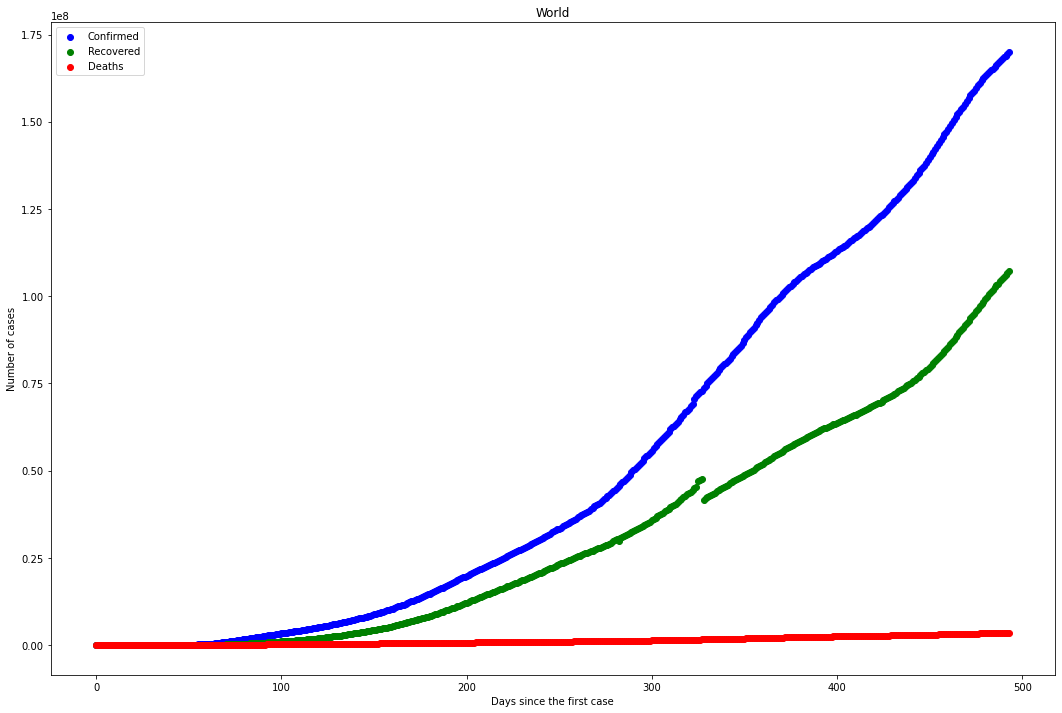

In [18]:
X = df4
plt.scatter(np.arange(0,len(X)), X['Confirmed'], color='blue', label='Confirmed')
plt.scatter(np.arange(0,len(X)), X['Recovered'], color='green', label='Recovered')
plt.scatter(np.arange(0,len(X)), X['Deaths'], color='red', label='Deaths')
plt.title('World')
plt.xlabel('Days since the first case')
plt.ylabel('Number of cases')
plt.legend()
plt.savefig('plots/'+'World.png', format='png')
plt.show()

In [19]:
print('------------THE END------------')

------------THE END------------


In [ ]:
!zip -r plots.zip plots